# **🕵🏻 Agentic RAG with 🦙 Llama 3.2 3B**
  <img src="https://img-cdn.inc.com/image/upload/w_1280,ar_16:9,c_fill,g_auto,q_auto:best/images/panoramic/meta-llama3-inc_539927_dhgoal.webp" width="310"/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://haystack.deepset.ai/images/haystack-ogimage.png" width="350" style="display:inline;">
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<img src="https://upload.wikimedia.org/wikipedia/en/thumb/8/88/DuckDuckGo_logo.svg/800px-DuckDuckGo_logo.svg.png" width="230" style="display:inline;">

In their [Llama 3.2 collection](https://ai.meta.com/blog/llama-3-2-connect-2024-vision-edge-mobile-devices/), Meta released two small yet powerful Language Models.

In this notebook, we'll use the 3B model to build an **Agentic Retrieval Augmented Generation application**.

🎯 Our goal is to create a system that answers questions using a knowledge base focused on the Seven Wonders of the Ancient World. If the retrieved documents don't contain the answer, the application will fall back to web search for additional context.

Stack:
- 🏗️ [Haystack](https://haystack.deepset.ai/): open-source LLM orchestration framework that streamlines the development of your LLM applications.

- 🦙 [Llama-3.2-3B-Instruct](https://huggingface.co/meta-llama/Llama-3.2-3B-Instruct): small and good Language Model.

- 🦆🌐 [DuckDuckGo API Websearch](https://haystack.deepset.ai/integrations/duckduckgo-api-websearch) to search results on the Web.


## Setup

In [1]:
! pip install haystack-ai duckduckgo-api-haystack transformers sentence-transformers datasets gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.1/372.1 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 95.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

## Create our knowledge base

In this section, we download a dataset on the Seven Wonders of the Ancient World, enrich each document with a semantic vector and store the documents in an in-memory database.

To better understand this process, you can explore to the [introductory Haystack tutorial](https://haystack.deepset.ai/tutorials/27_first_rag_pipeline).

In [2]:
content = """
Canadian Environmental Protection Act, 1999
S.C. 1999, c. 33

Assented to 1999-09-14

An Act respecting pollution prevention and the protection of the environment and human health in order to contribute to sustainable development

Declaration
It is hereby declared that the protection of the environment is essential to the well-being of Canadians and that the primary purpose of this Act is to contribute to sustainable development through pollution prevention.

Preamble

Whereas the Government of Canada seeks to achieve sustainable development that is based on an ecologically efficient use of natural, social and economic resources and acknowledges the need to integrate environmental, economic and social factors in the making of all decisions by government and private entities;

Whereas the Government of Canada recognizes that every individual in Canada has a right to a healthy environment as provided under this Act;

Whereas the Government of Canada is committed to implementing pollution prevention as a national goal and as the priority approach to environmental protection;

Whereas the Government of Canada acknowledges the need to control and manage pollutants and wastes if their release into the environment cannot be prevented;

Whereas the Government of Canada recognizes the importance of an ecosystem approach;

Whereas the Government of Canada will continue to demonstrate national leadership in establishing environmental standards, ecosystem objectives and environmental quality guidelines and codes of practice;

Whereas the Government of Canada is committed to implementing the precautionary principle that, where there are threats of serious or irreversible damage, lack of full scientific certainty shall not be used as a reason for postponing cost-effective measures to prevent environmental degradation;

Whereas the Government of Canada recognizes that all governments in Canada have authority that enables them to protect the environment and recognizes that all governments face environmental problems that can benefit from cooperative resolution;

Whereas the Government of Canada recognizes the importance of endeavouring, in cooperation with provinces, territories and aboriginal peoples, to achieve the highest level of environmental quality for all Canadians and ultimately contribute to sustainable development;

Whereas the Government of Canada is committed to implementing the United Nations Declaration on the Rights of Indigenous Peoples, including free, prior and informed consent;

Whereas the Government of Canada recognizes that the risk of toxic substances in the environment is a matter of national concern and that toxic substances, once introduced into the environment, cannot always be contained within geographic boundaries;

Whereas the Government of Canada recognizes the importance of considering vulnerable populations in assessing whether substances are toxic or capable of becoming toxic;

Whereas the Government of Canada recognizes the importance of minimizing the risks posed by exposure to toxic substances and the cumulative effects of toxic substances;

Whereas the Government of Canada recognizes the integral role of science, as well as the role of traditional aboriginal knowledge, in the process of making decisions relating to the protection of the environment and human health and that environmental or health risks and social, economic and technical matters are to be considered in that process;

Whereas the Government of Canada recognizes the role of science and Indigenous knowledge in the process of making decisions related to the protection of the environment and human health, as well as the importance of promoting the development and timely incorporation of scientifically justified alternative methods and strategies in the testing and assessment of substances to replace, reduce or refine the use of vertebrate animals;

Whereas the Government of Canada recognizes the responsibility of users and producers in relation to toxic substances and pollutants and wastes, and has adopted the “polluter pays” principle;

Whereas the Government of Canada is committed to ensuring that its operations and activities on federal and aboriginal lands are carried out in a manner that is consistent with the principles of pollution prevention and the protection of the environment and human health;

Whereas the Government of Canada will endeavour to remove threats to biological diversity through pollution prevention as well as the control and management of the risk of any adverse effects of the use and release of toxic substances, pollutants and wastes;

Whereas the Government of Canada recognizes the importance of encouraging the progressive substitution of substances, processes and technologies with alternatives that are safer for the environment or human health, when they are economically and technically viable;

Whereas the Government of Canada is committed to openness, transparency and accountability in respect of the protection of the environment and human health;

Whereas the Government of Canada recognizes the importance of Canadians having information, including by means of the packaging and labelling of products, regarding the risks posed by toxic substances to the environment or to human health;

Whereas the Government of Canada is committed to implementing a risk-based approach to the assessment and management of chemical substances;

Whereas the Government of Canada recognizes the need to protect the environment, including its biological diversity, and human health, by ensuring the safe and effective use of biotechnology;

And whereas the Government of Canada must be able to fulfil its international obligations in respect of the environment;

Now, therefore, Her Majesty, by and with the advice and consent of the Senate and House of Commons of Canada, enacts as follows:

1999, c. 33, Preamble2023, c. 12, s. 2
Short Title
Marginal note:Short title

1 This Act may be cited as the Canadian Environmental Protection Act, 1999.

Administrative Duties
Marginal note:Duties of the Government of Canada

2 (1) In the administration of this Act, the Government of Canada shall, having regard to the Constitution and laws of Canada and subject to subsection (1.1),

(a) exercise its powers in a manner that

(i) protects the environment and human health, including the health of vulnerable populations,

(ii) applies the precautionary principle, which provides that the lack of full scientific certainty shall not be used as a reason for postponing cost-effective measures to prevent environmental degradation if there are threats of serious or irreversible damage, and

(iii) promotes and reinforces enforceable pollution prevention approaches;

(a.1) take preventive and remedial measures to protect, enhance and restore the environment;

(a.2) protect the right of every individual in Canada to a healthy environment as provided under this Act, subject to any reasonable limits;

(a.3) in relation to paragraph (a.2), uphold principles such as principles of environmental justice — including the avoidance of adverse effects that disproportionately affect vulnerable populations — the principle of non-regression and the principle of intergenerational equity;

(b) take the necessity of protecting the environment into account in making social and economic decisions;

(c) implement an ecosystem approach that considers the unique and fundamental characteristics of ecosystems;

(d) endeavour to act in cooperation with governments to protect the environment;

(e) encourage the participation of the people of Canada in the making of decisions that affect the environment;

(f) facilitate the protection of the environment by the people of Canada;

(g) establish nationally consistent standards of environmental quality;

(h) provide information to the people of Canada on the state of the Canadian environment;

(i) apply knowledge, including traditional aboriginal knowledge, science and technology, to identify and resolve environmental problems;

(j) protect the environment, including its biological diversity, and human health, from the risk of any adverse effects of the use and release of toxic substances, pollutants and wastes;

(j.1) protect the environment, including its biological diversity, and human health, by ensuring the safe and effective use of biotechnology;

(k) endeavour to act expeditiously and diligently to assess whether existing substances or those new to Canada are toxic or capable of becoming toxic and assess the risk that such substances pose to the environment and human life and health;

(k.1) encourage the development and timely incorporation of scientifically justified alternative methods and strategies in the testing and assessment of substances to replace, reduce or refine the use of vertebrate animals;

(l) endeavour to act with regard to the intent of intergovernmental agreements and arrangements entered into for the purpose of achieving the highest level of environmental quality throughout Canada;

(m) ensure, to the extent that is reasonably possible, that all areas of federal regulation for the protection of the environment and human health are addressed in a complementary manner in order to avoid duplication and to provide effective and comprehensive protection;

(n) endeavour to exercise its powers to require the provision of information in a coordinated manner; and

(o) apply and enforce this Act in a fair, predictable and consistent manner.

Marginal note:Considerations

(1.1) The Government of Canada shall consider the following before taking any measure under paragraph (1)(a.1):

(a) the short- and long-term human and ecological benefits arising from the environmental protection measure;

(b) the positive economic impacts arising from the measure, including those cost-savings arising from health, environmental and technological advances and innovation, among others; and

(c) any other benefits accruing from the measure.

Marginal note:Action not limited

(2) Nothing in this section shall be construed so as to prevent the taking of any action to protect the environment or human health for the purposes of this Act.

1999, c. 33, s. 22023, c. 12, s. 3
Previous Version
Interpretation
Marginal note:Definitions

3 (1) The definitions in this subsection apply in this Act.

aboriginal government means a governing body that is established by or under or operating under an agreement between Her Majesty in right of Canada and aboriginal people and that is empowered to enact laws respecting

(a) the protection of the environment; or

(b) for the purposes of Division 5 of Part 7, the registration of vehicles or engines. (gouvernement autochtone)

aboriginal land means

(a) reserves, surrendered lands and any other lands that are set apart for the use and benefit of a band and that are subject to the Indian Act;

(b) land, including any water, that is subject to a comprehensive or specific claim agreement, or a self-government agreement, between the Government of Canada and aboriginal people where title remains with Her Majesty in right of Canada; and

(c) air and all layers of the atmosphere above and the subsurface below land mentioned in paragraph (a) or (b). (terres autochtones)

air pollution means a condition of the air, arising wholly or partly from the presence in the air of any substance, that directly or indirectly

(a) endangers the health, safety or welfare of humans;

(b) interferes with the normal enjoyment of life or property;

(c) endangers the health of animal life;

(d) causes damage to plant life or to property; or

(e) degrades or alters, or forms part of a process of degradation or alteration of, an ecosystem to an extent that is detrimental to its use by humans, animals or plants. (pollution atmosphérique)

analyst means a person or a member of a class of persons designated as an analyst under subsection 217(1). (analyste)

biological diversity means the variability among living organisms from all sources, including, without limiting the generality of the foregoing, terrestrial and marine and other aquatic ecosystems and the ecological complexes of which they form a part and includes the diversity within and between species and of ecosystems. (diversité biologique)

biotechnology means the application of science and engineering in the direct or indirect use of living organisms or parts or products of living organisms in their natural or modified forms. (biotechnologie)

class of substances means any two or more substances that

(a) contain the same portion of chemical structure;

(b) have similar physico-chemical or toxicological properties; or

(c) for the purposes of sections 68, 70 and 71, have similar types of use. (catégorie de substances)

Committee means the National Advisory Committee established under section 6. (comité)

ecosystem means a dynamic complex of plant, animal and micro-organism communities and their non-living environment interacting as a functional unit. (écosystème)

enforcement officer means a person or a member of a class of persons designated as an enforcement officer under section 217. (agent de l’autorité)

environment means the components of the Earth and includes

(a) air, land and water;

(b) all layers of the atmosphere;

(c) all organic and inorganic matter and living organisms; and

(d) the interacting natural systems that include components referred to in paragraphs (a) to (c). (environnement)

environmental emergency has the meaning given that expression in Part 8. (urgence environnementale)

environmental quality includes the health of ecosystems. (qualité de l’environnement)

Environmental Registry means the registry established under section 12. (Registre)

federal land means

(a) land, including any water, that belongs to Her Majesty in right of Canada, or that Her Majesty in right of Canada has the right to dispose of, and the air and all layers of the atmosphere above and the subsurface below that land; and

(b) the following land and areas, namely,

(i) the internal waters of Canada as determined under the Oceans Act, including the seabed and subsoil below and the airspace above those waters, and

(ii) the territorial sea of Canada as determined under the Oceans Act, including the seabed and subsoil below and the air and all layers of the atmosphere above that sea. (territoire domanial)

federal source means

(a) a department of the Government of Canada;

(b) an agency of the Government of Canada or other body established by or under an Act of Parliament that is ultimately accountable through a minister of the Crown in right of Canada to Parliament for the conduct of its affairs;

(c) a Crown corporation as defined in subsection 83(1) of the Financial Administration Act; or

(d) a federal work or undertaking. (source d’origine fédérale)

federal work or undertaking means any work or undertaking that is within the legislative authority of Parliament, including

(a) a work or undertaking operated for or in connection with navigation and shipping, whether inland or maritime, including the operation of ships and transportation by ship;

(b) a railway, canal, telegraph or other work or undertaking connecting one province with another, or extending beyond the limits of a province;

(c) a line of ships connecting a province with any other province, or extending beyond the limits of a province;

(d) a ferry between any province and any other province or between any province and any country other than Canada;

(e) airports, aircraft and commercial air services;

(f) a broadcast undertaking;

(g) a bank or an authorized foreign bank within the meaning of section 2 of the Bank Act;

(h) a work or undertaking that, although wholly situated within a province, is before or after its completion declared by Parliament to be for the general advantage of Canada or for the advantage of two or more provinces; and

(i) a work or undertaking outside the exclusive legislative authority of the legislatures of the provinces. (entreprises fédérales)

fuel means any form of matter that is combusted or oxidized for the generation of energy. (combustible)

government means the government of a province or of a territory or an aboriginal government. (gouvernement)

healthy environment means an environment that is clean, healthy and sustainable. (environnement sain)

Minister means the Minister of the Environment. (ministre)

movement within Canada or transport within Canada means movement or transport between provinces. (mouvement au Canada ou transport au Canada)

pollution prevention means the use of processes, practices, materials, products, substances or energy that avoid or minimize the creation of pollutants and waste and reduce the overall risk to the environment or human health. (prévention de la pollution)

precautionary principle means Principle 15 of the 1992 Rio Declaration on Environment and Development, which provides that the lack of full scientific certainty shall not be used as a reason for postponing cost-effective measures to prevent environmental degradation if there are threats of serious or irreversible damage. (principe de précaution)

prescribed means prescribed by regulations made under this Act. (Version anglaise seulement)

province includes a territory. (province)

release includes discharge, spray, inject, inoculate, abandon, deposit, spill, leak, seep, pour, emit, empty, throw, dump, place and exhaust. (rejet)

sell includes to offer for sale or lease, have in possession for sale or lease or deliver for sale or lease. (vente)

substance means any distinguishable kind of organic or inorganic matter, whether animate or inanimate, and includes

(a) any matter that is capable of being dispersed in the environment or of being transformed in the environment into matter that is capable of being so dispersed or that is capable of causing such transformations in the environment,

(b) any element or free radical,

(c) any combination of elements of a particular molecular identity that occurs in nature or as a result of a chemical reaction, and

(d) complex combinations of different molecules that originate in nature or are the result of chemical reactions but that could not practicably be formed by simply combining individual constituents,

and, except for the purposes of sections 66 to 66.2, 80 to 89 and 104 to 115, includes

(e) any mixture that is a combination of substances and does not itself produce a substance that is different from the substances that were combined,

(f) any manufactured item that is formed into a specific physical shape or design during manufacture and has, for its final use, a function or functions dependent in whole or in part on its shape or design, and

(g) any animate matter that is, or any complex mixtures of different molecules that are, contained in effluents, emissions or wastes that result from any work, undertaking or activity. (substance)

sustainable development means development that meets the needs of the present without compromising the ability of future generations to meet their own needs. (développement durable)

transient reaction intermediate means a substance that is formed and consumed in the course of a chemical reaction. (intermédiaire de réaction)

transit means, except for the purposes of sections 139 and 155, the portion of an international transboundary movement of waste or material referred to in subsection 185(1) through the territory of a country that is neither the country of origin nor the country of destination of the movement. (transit)

undertaking includes a business. (Version anglaise seulement)

vulnerable population means a group of individuals within the Canadian population who, due to greater susceptibility or greater exposure, may be at an increased risk of experiencing adverse health effects from exposure to substances. (population vulnérable)

Marginal note:Meaning of Ministers and either Minister

(2) Where the word Ministers is used in this Act, it refers to both the Minister and the Minister of Health, and where the expression either Minister is used in this Act, it refers to either the Minister or the Minister of Health.

Marginal note:Class of substances

(3) For the purposes of this Act, other than subsection (1), substance includes a class of substances.

1999, c. 28, s. 151, c. 33, s. 32001, c. 34, s. 27(E)2017, c. 26, ss. 21(F), 63(E)2023, c. 12, s. 4
Previous Version
Marginal note:Aboriginal rights

4 For greater certainty, nothing in this Act shall be construed so as to abrogate or derogate from the protection provided for existing aboriginal or treaty rights of the aboriginal peoples of Canada by the recognition and affirmation of those rights in section 35 of the Constitution Act, 1982.

Her Majesty
Marginal note:Binding on Her Majesty

5 This Act is binding on Her Majesty in right of Canada or a province.

PART 1
Administration
Implementation of Right to a Healthy Environment
Marginal note:Implementation framework

5.1 (1) For the purposes of paragraph 2(1)(a.2), the Ministers shall, within two years after the day on which this section comes into force, develop an implementation framework to set out how the right to a healthy environment will be considered in the administration of this Act.

Marginal note:Right to a healthy environment

(1.1) Without limiting the generality of subsection (1), the implementation framework shall set out

(a) the process under subsection 76.1(1) in respect of the protection of the right to a healthy environment.

Marginal note:Content

(2) The implementation framework, in a manner consistent with the purposes of this Act, shall, among other things, elaborate on

(a) the principles to be considered in the administration of this Act, such as principles of environmental justice — including the avoidance of adverse effects that disproportionately affect vulnerable populations — the principle of non-regression and the principle of intergenerational equity, according to which it is important to meet the needs of the present generation without compromising the ability of future generations to meet their own needs;

(b) research, studies or monitoring activities to support the protection of the right to a healthy environment referred to in paragraph 2(1)(a.2);

(c) the relevant factors to be taken into account in interpreting and applying that right and in determining the reasonable limits to which it is subject, including social, health, scientific and economic factors; and

(d) mechanisms to support the protection of that right.

Marginal note:Consultation

(3) In developing the implementation framework, the Ministers shall consult any interested persons.

Marginal note:Publication

(4) The Minister shall publish the implementation framework in the manner that the Minister considers appropriate.

Marginal note:Report

(5) The Minister shall include in the annual report required by section 342 a report on the implementation of the framework.

2023, c. 12, s. 5
Advisory Committees
Marginal note:National Advisory Committee

6 (1) For the purpose of enabling national action to be carried out and taking cooperative action in matters affecting the environment and for the purpose of avoiding duplication in regulatory activity among governments, the Minister shall establish a National Advisory Committee

(a) to advise the Ministers on regulations proposed to be made under subsection 93(1);

(b) to advise the Minister on a cooperative, coordinated intergovernmental approach for the management of toxic substances; and

(c) to advise the Minister on other environmental matters that are of mutual interest to the Government of Canada and other governments and to which this Act relates.

Marginal note:Precautionary principle

(1.1) In giving its advice and recommendations, the Committee shall use the precautionary principle.

Marginal note:Composition of Committee

(2) The Committee shall consist of the following members:

(a) one representative for each of the Ministers;

(b) one representative of the government of each of the provinces; and

(c) subject to subsection (3), not more than six representatives of aboriginal governments, to be selected on the following regional basis,

(i) one representative for all aboriginal governments, except Inuit, in Newfoundland and Labrador, Prince Edward Island, Nova Scotia and New Brunswick,

(ii) one representative for all aboriginal governments, except Inuit, in Quebec,

(iii) one representative for all aboriginal governments, except Inuit, in Ontario,

(iv) one representative for all aboriginal governments, except Inuit, in Manitoba, Saskatchewan, Alberta, the Northwest Territories and Nunavut,

(v) one representative for all aboriginal governments, except Inuit, in British Columbia and Yukon, and

(vi) one representative for all Inuit aboriginal governments.

Marginal note:Provincial representatives

(2.1) The representative of a provincial government shall be selected by that government.

Marginal note:Aboriginal representatives

(2.2) Subject to subsection (3), the representative of aboriginal governments shall be selected by the aboriginal governments he or she represents.

Marginal note:Inuit aboriginal representatives

(2.3) Subject to subsection (3), the representative of Inuit aboriginal governments shall be selected by those governments.

Marginal note:Absence of aboriginal government

(3) Where there is no Inuit aboriginal government or aboriginal government for a region referred to in any of subparagraphs (2)(c)(i) to (v), the representative of the Inuit or of aboriginal people for the region, as the case may be, may be selected in accordance with regulations made under subsection (4).

Marginal note:Regulations

(4) The Minister may make regulations respecting the manner of selecting a representative under subsection (3).

1999, c. 33, s. 62002, c. 7, s. 1242015, c. 3, s. 172
Previous Version
Marginal note:Ministerial advisory committees

7 (1) For the purpose of carrying out their duties under this Act, the Ministers or either Minister may

(a) establish advisory committees to report to the Ministers or either Minister; and

(b) specify the functions that the committees are to perform and the manner in which those functions are to be performed.

Marginal note:Publication of report

(2) The report of a committee established under subsection (1), including its recommendations and reasons, shall be made public.

Marginal note:Report of various committees

8 The Minister shall include in the annual report required by section 342 a report of the activities of the Committee and of any committees established under paragraph 7(1)(a).

Agreements Respecting Administration
Marginal note:Negotiation of agreement

9 (1) The Minister may negotiate an agreement with a government or with an aboriginal people with respect to the administration of this Act.

Marginal note:Publication of negotiated agreements

(2) The Minister shall publish any agreement negotiated under subsection (1) before it is entered into, or give notice of its availability, in the Canada Gazette and in any other manner that the Minister considers appropriate.

Marginal note:Comments or objections

(3) Within 60 days after the publication of an agreement or notice of its availability under subsection (2), any person may file with the Minister comments or a notice of objection.

Marginal note:Publication by Minister of results

(4) After the end of the period of 60 days referred to in subsection (3), the Minister shall publish in the Canada Gazette and in any other manner that the Minister considers appropriate a report or a notice of the availability of a report that summarizes how any comments or notices of objection were dealt with.

Marginal note:Entering into agreements

(5) The Minister may, after publishing a report or notice under subsection (4),

(a) with the approval of the Governor in Council, enter into an agreement with a government or an aboriginal people with respect to the administration of this Act; and

(b) subject to any terms and conditions that the Governor in Council may specify in the approval, agree to amendments of the agreement.

Marginal note:Publication of final agreements

(6) The Minister shall publish any agreement under subsection (5), or give notice of its availability, in the Canada Gazette and in any other manner that the Minister considers appropriate.

Marginal note:Termination

(7) An agreement made under subsection (5) terminates five years after the date on which it comes into force or may be terminated earlier by either party giving the other at least three months notice.

Marginal note:Annual report

(8) The Minister shall include in the annual report required by section 342 a report on the administration of this Act under agreements made under subsection (5).

Marginal note:Action not limited by Agreement

(9) No agreement made under this section shall limit or restrict the carrying out of any action the Minister deems necessary for the administration and enforcement of this Act, including the conduct of inspections or investigations.

Agreements Respecting Equivalent Provisions
Marginal note:Non-application of regulations

10 (1) Except with respect to Her Majesty in right of Canada, the provisions of a regulation made under subsection 93(1), 200(1) or 209(1) or (2) do not apply within the jurisdiction of a government for which there is in force an order, made under subsection (3), declaring that the provisions do not apply within that jurisdiction.

Marginal note:Non-application of regulations

(2) Except with respect to a federal source, the provisions of a regulation made under section 167 or 177 do not apply within the jurisdiction of a government for which there is in force an order, made under subsection (3), declaring that the provisions do not apply within that jurisdiction.

Marginal note:Declaration of equivalent provisions

(3) Subject to subsections (4), (5) and (6), where the Minister and a government agree in writing that there are in force by or under the laws applicable to the jurisdiction of the government

(a) provisions that are equivalent to a regulation made under a provision referred to in subsection (1) or (2), and

(b) provisions that are similar to sections 17 to 20 for the investigation of alleged offences under environmental legislation of that jurisdiction,

the Governor in Council may, on the recommendation of the Minister, make an order declaring that the provisions of the regulation do not apply in an area under the jurisdiction of the government.

Marginal note:Publication of agreements

(4) The Minister shall publish any agreement referred to in subsection (3) before it is entered into, or give notice of its availability, in the Canada Gazette and in any other manner that the Minister considers appropriate.

Marginal note:Comments or objections

(5) Within 60 days after the publication of an agreement or notice of its availability under subsection (4), any person may file with the Minister comments or a notice of objection.

Marginal note:Publication by Minister of results

(6) After the end of the period of 60 days referred to in subsection (5), the Minister shall publish in the Canada Gazette and in any other manner that the Minister considers appropriate a report or a notice of the availability of a report that summarizes how any comments or notices of objection were dealt with.

Marginal note:Publication of final agreements

(7) The Minister shall publish any agreement referred to in subsection (3) after it is entered into, or give notice of its availability, in the Canada Gazette and in any other manner that the Minister considers appropriate.

Marginal note:Termination

(8) An agreement made under subsection (3) terminates five years after the date on which it comes into force or may be terminated earlier by either party giving the other at least three months notice.

Marginal note:Revocation of order

(9) The Governor in Council may, on the recommendation of the Minister, revoke an order made under subsection (3) if the agreement referred to in that subsection terminates or is terminated.

Marginal note:Report to Parliament

(10) The Minister shall include in the annual report required by section 342 a report on the administration of this section.

PART 2
Public Participation
Interpretation
Definition of environmental protection action

11 In this Part, environmental protection action means an action under section 22.

Environmental Registry
Marginal note:Establishment of Environmental Registry

12 The Minister shall establish a registry, to be called the Environmental Registry, for the purpose of facilitating access to documents relating to matters under this Act.

Marginal note:Contents of Environmental Registry

13 (1) The Environmental Registry shall contain notices and other documents published or made publicly available by the Ministers or either Minister under this Act, and shall also include, subject to the Access to Information Act and the Privacy Act,

(a) notices of objection and of any approval granted under this Act;

(b) a copy of every policy and of every proposed regulation or order made under this Act; and

(c) copies of documents submitted to a court by the Minister relating to any environmental protection action.

Marginal note:Form and manner of Environmental Registry

(2) The Minister may determine the form of the Environmental Registry and how it is to be kept, so long as the registry is publicly accessible and searchable and is in electronic form.

1999, c. 33, s. 132023, c. 12, s. 5.1
Previous Version
Marginal note:Protection from civil proceeding or prosecution

14 (1) Despite any other Act of Parliament, no civil or criminal proceedings may be brought against any person mentioned in subsection (2) for the full or partial disclosure in good faith of any notice or other document through the Environmental Registry or any consequences of its disclosure.

Marginal note:Persons protected

(2) The persons against whom the proceedings may not be brought are Her Majesty in right of Canada, the Minister and any person acting on behalf of or under the direction of the Minister.

Rights under Other Parts
Marginal note:Additional rights

15 The rights conferred by this Part are in addition to the right to request, under section 76, that a substance be assessed, the right to file a notice of objection under Parts 1, 7 and 11 and the right to request under Parts 7 and 11 that a board of review be established under section 333.

1999, c. 33, s. 152023, c. 12, s. 6
Previous Version
Voluntary Reports
Marginal note:Voluntary reports

16 (1) Where a person has knowledge of the commission or reasonable likelihood of the commission of an offence under this Act, but is not required to report the matter under this Act, the person may report any information relating to the offence or likely offence to an enforcement officer or any person to whom a report may be made under this Act.

Marginal note:Request for confidentiality

(2) The person making the report may request that their identity, and any information that could reasonably be expected to reveal their identity, not be disclosed.

Marginal note:Requirement for confidentiality

(3) No person shall disclose or cause to be disclosed the identity of a person who makes a request under subsection (2) or any information that could reasonably be expected to reveal their identity unless the person authorizes the disclosure in writing.

Marginal note:Employee protection

(4) Despite any other Act of Parliament, no employer shall dismiss, suspend, demote, discipline, harass or otherwise disadvantage an employee, or deny an employee a benefit of employment, by reason that

(a) the employee has made a report under subsection (1);

(b) the employee, acting in good faith and on the basis of reasonable belief, has refused or stated an intention of refusing to do anything that is an offence under this Act; or

(c) the employee, acting in good faith and on the basis of reasonable belief, has done or stated an intention of doing anything that is required to be done by or under this Act.

Investigation of Offences
Marginal note:Application for investigation by Minister

17 (1) An individual who is resident in Canada and at least 18 years of age may apply to the Minister for an investigation of any offence under this Act that the individual alleges has occurred.

Marginal note:Statement to accompany application

(2) The application shall include a solemn affirmation or declaration

(a) stating the name and address of the applicant;

(b) stating that the applicant is at least 18 years old and a resident of Canada;

(c) stating the nature of the alleged offence and the name of each person alleged to have contravened, or to have done something in contravention of, this Act or the regulations; and

(d) containing a concise statement of the evidence supporting the allegations of the applicant.

Marginal note:Form

(3) The Minister may prescribe the form in which an application under this section is required to be made.

Marginal note:Investigation by Minister

18 The Minister shall acknowledge receipt of the application within 20 days of the receipt and shall investigate all matters that the Minister considers necessary to determine the facts relating to the alleged offence.

Marginal note:Progress reports

19 After acknowledging receipt of the application, the Minister shall report to the applicant every 90 days on the progress of the investigation and the action, if any, that the Minister has taken or proposes to take, and the Minister shall include in the report an estimate of the time required to complete the investigation or to implement the action, but a report is not required if the investigation is discontinued before the end of the 90 days.

Marginal note:Minister may send evidence to Attorney General of Canada

20 At any stage of an investigation, the Minister may send any documents or other evidence to the Attorney General of Canada for consideration of whether an offence has been or is about to be committed under this Act and for any action that the Attorney General may wish to take.

Marginal note:Discontinuation of investigation

21 (1) The Minister may discontinue the investigation if the Minister is of the opinion that

(a) the alleged offence does not require further investigation; or

(b) the investigation does not substantiate the alleged offence.

Marginal note:Report

(2) If the investigation is discontinued, the Minister shall

(a) prepare a report in writing describing the information obtained during the investigation and stating the reasons for its discontinuation; and

(b) send a copy of the report to the applicant and to any person whose conduct was investigated.

A copy of the report sent to a person whose conduct was investigated must not disclose the name or address of the applicant or any other personal information about them.

Environmental Protection Action
Marginal note:Circumstances when an individual may bring an action

22 (1) An individual who has applied for an investigation may bring an environmental protection action if

(a) the Minister failed to conduct an investigation and report within a reasonable time; or

(b) the Minister’s response to the investigation was unreasonable.

Marginal note:Nature of the action

(2) The action may be brought in any court of competent jurisdiction against a person who committed an offence under this Act that

(a) was alleged in the application for the investigation; and

(b) caused significant harm to the environment.

Marginal note:Relief that may be claimed

(3) In the action, the individual may claim any or all of the following:

(a) a declaratory order;

(b) an order, including an interlocutory order, requiring the defendant to refrain from doing anything that, in the opinion of the court, may constitute an offence under this Act;

(c) an order, including an interlocutory order, requiring the defendant to do anything that, in the opinion of the court, may prevent the continuation of an offence under this Act;

(d) an order to the parties to negotiate a plan to correct or mitigate the harm to the environment or to human, animal or plant life or health, and to report to the court on the negotiations within a time set by the court; and

(e) any other appropriate relief, including the costs of the action, but not including damages.

Marginal note:Limitation period of two years

23 (1) An environmental protection action may be brought only within a limitation period of two years beginning when the plaintiff becomes aware of the conduct on which the action is based, or should have become aware of it.

Marginal note:Time during investigation not included

(2) The limitation period does not include any time following the plaintiff’s application for an investigation, but before the plaintiff receives a report under subsection 21(2).

Marginal note:No action for remedial conduct

24 An environmental protection action may not be brought if the alleged conduct

(a) was taken

(i) to correct or mitigate harm or the risk of harm to the environment or to human, animal or plant life or health, or

(ii) to protect national security, support humanitarian relief efforts, participate in multilateral military or peace-keeping activities under the auspices of international organizations or defend a member state of the North Atlantic Treaty Organization; and

(b) was reasonable and consistent with public safety.

Marginal note:Exception

25 An environmental protection action may not be brought against a person if the person was convicted of an offence under this Act, or environmental protection alternative measures within the meaning of Part 10 were used to deal with the person, in respect of the alleged conduct on which the action is based.

Marginal note:Notice of the action

26 (1) The plaintiff in an environmental protection action shall give notice of the action to the Minister no later than 10 days after the document originating the action is first served on a defendant, and the Minister shall give notice of the action in the Environmental Registry as soon as possible after receipt of the plaintiff’s notice.

Marginal note:Notice of other matters

(2) In an environmental protection action,

(a) the court may order any party to the action to give notice to the Minister of any matter relating to the action, within the time specified by the court; and

(b) the Minister shall give notice of that matter in the Environmental Registry as soon as possible after receipt of the party’s notice.

Marginal note:Attorney General to be served

27 (1) A plaintiff shall serve the Attorney General of Canada with a copy of the document originating an environmental protection action within 20 days after first serving the document on a defendant.

Marginal note:Attorney General may participate

(2) The Attorney General of Canada is entitled to participate in the action, either as a party or otherwise. Notice of his or her decision to participate shall be given to the plaintiff and be included in the Environmental Registry within 45 days after the copy of the originating document is served on the Attorney General.

Marginal note:Right of appeal

(3) The Attorney General of Canada is entitled to appeal from a judgment in the action and to make submissions and present evidence in an appeal.

Marginal note:Other participants

28 (1) A court may allow any person to participate in an environmental protection action in order to provide fair and adequate representation of the private and public interests involved.

Marginal note:Manner and terms of participation

(2) The court may determine the manner and terms of the person’s participation, including the payment of costs.

Marginal note:Burden of proof

29 The offence alleged in an environmental protection action and the resulting significant harm are to be proved on a balance of probabilities.

Marginal note:Defences

30 (1) The following defences are available in an environmental protection action:

(a) the defence of due diligence in complying with this Act and the regulations;

(b) the defence that the alleged conduct is authorized by or under an Act of Parliament;

(c) except with respect to Her Majesty in right of Canada or a federal source, the defence that the alleged conduct is authorized by or under a law of a government that is the subject of an order made under subsection 10(3); and

(d) the defence of officially induced mistake of law.

Marginal note:Other defences not excluded

(2) This section does not limit the availability of any other defences.

Marginal note:Undertakings to pay damages

31 In deciding whether to dispense with an undertaking to pay damages caused by an interlocutory order in an environmental protection action, the court may consider any special circumstances, including whether the action is a test case or raises a novel point of law.

Marginal note:Stay or dismissal

32 (1) A court may stay or dismiss an environmental protection action if it is in the public interest to do so.

Marginal note:Factors to be considered

(2) In deciding whether to stay or dismiss the action, the court may consider

(a) environmental, health, safety, economic and social concerns;

(b) whether the issues raised in the action would be better resolved in some other way;

(c) whether the Minister has an adequate plan to correct or mitigate the harm to the environment or human, animal or plant life or health or otherwise to address the issues raised in the action; and

(d) any other relevant matter.

Marginal note:Remedies

33 If a court finds that the plaintiff is entitled to judgment in an environmental protection action, it may grant any relief mentioned in subsection 22(3).

Marginal note:Orders to negotiate plans

34 (1) A court order to negotiate a plan to correct or mitigate the harm to the environment or human, animal or plant life or health may, to the extent that it is reasonable, practicable and ecologically sound, require the plan to provide for

(a) the prevention, reduction or elimination of the harm;

(b) the restoration of the environment;

(c) the restoration of all uses, including enjoyment, of the environment affected by the offence;

(d) the payment of money by the defendant as the court may direct to achieve the plan’s purposes; and

(e) monitoring the implementation of the plan and the progress made in achieving its purposes.

Before making the order, the court must take into account any efforts that the defendant has already made to deal with the harm.

Marginal note:Other orders

(2) The court may also make interlocutory or ancillary orders to ensure that the negotiation of the plan runs smoothly, including orders

(a) for the payment of the costs of negotiation;

(b) requiring the plaintiff or the defendant to prepare a draft of the plan; and

(c) setting a time limit for the negotiations.

Marginal note:Appointment of other person to prepare plan

(3) The court may appoint a person who is not a party to prepare a draft plan if the parties cannot agree on the plan or the court is not satisfied with the plan that they negotiate.

Marginal note:Order to prepare another plan

(4) The court may order the parties to prepare another plan if it is not satisfied with the plan that they negotiate.

Marginal note:Approval and effective date

(5) The court may approve a plan that the parties negotiate or a plan prepared by a person appointed under subsection (3) and the approved plan comes into effect on a day determined by the court.

Marginal note:Restriction on orders to negotiate plans

35 A court may not order the negotiation of a plan to correct or mitigate the harm to the environment or human, animal or plant life or health if it determines that

(a) the harm has already been corrected or mitigated; or

(b) adequate measures to correct or mitigate the harm have already been ordered under this Act or any other law in force in Canada.

Marginal note:Settlement or discontinuance

36 An environmental protection action may be settled or discontinued only with the approval of the court and on terms that it considers appropriate.

Marginal note:Settlements and orders

37 If an environmental protection action results in an order of a court or a settlement approved by a court,

(a) the resolution of any question of fact by the order or settlement is binding on a court in any other environmental protection action in which that question arises; and

(b) no other environmental protection action may be brought with respect to the offence or alleged offence dealt with by the order or settlement.

Marginal note:Costs

38 In deciding whether to award costs in an environmental protection action, the court may consider any special circumstances, including whether the action is a test case or raises a novel point of law.

Action to Prevent or Compensate Loss
Marginal note:Injunction

39 Any person who suffers, or is about to suffer, loss or damage as a result of conduct that contravenes any provision of this Act or the regulations may seek an injunction from a court of competent jurisdiction ordering the person engaging in the conduct

(a) to refrain from doing anything that it appears to the court causes or will cause the loss or damage; or

(b) to do anything that it appears to the court prevents or will prevent the loss or damage.

Marginal note:Civil cause of action

40 Any person who has suffered loss or damage as a result of conduct that contravenes any provision of this Act or the regulations may, in any court of competent jurisdiction, bring an action to recover from the person who engaged in the conduct

(a) an amount equal to the loss or damage proved to have been suffered by the person; and

(b) an amount to compensate for the costs that the person incurs in connection with the matter and proceedings under this section.

Other Matters
Marginal note:Evidence of offence

41 (1) In an action under this Part, the record of proceedings in any court in which a defendant was convicted of an offence under this Act is evidence that the defendant committed the offence.

Marginal note:Certificate evidence of conviction

(2) In the action, evidence that a defendant was convicted of an offence under this Act may be given by a certificate stating with reasonable particularity the conviction and sentence of the defendant.

Marginal note:Signature of certificate

(3) The certificate shall be signed by

(a) the person who made the conviction; or

(b) the clerk of the court in which the conviction was made.

Once it is proved that the defendant is the offender mentioned in the certificate, it is evidence without proof of the signature or the official character of the person appearing to have signed it.

Marginal note:Civil remedies not affected

42 (1) No civil remedy for any conduct is suspended or affected by reason only that the conduct is an offence under this Act.

Marginal note:Remedies not repealed, etc.

(2) Nothing in this Act shall be interpreted so as to repeal, remove or reduce any remedy available to any person under any law in force in Canada.

Marginal note:Damages caused by a ship

(3) No claim for damage caused by a ship may be made under this Act to the extent that a claim for that damage may be made under the Marine Liability Act or the Arctic Waters Pollution Prevention Act.

1999, c. 33, s. 422001, c. 6, s. 112
PART 3
Information Gathering, Objectives, Guidelines and Codes of Practice
Interpretation
Marginal note:Definitions

43 The definitions in this section apply in this Part.

fish has the meaning assigned by section 2 of the Fisheries Act. (poissons)

hormone disrupting substance means a substance having the ability to disrupt the synthesis, secretion, transport, binding, action or elimination of natural hormones in an organism, or its progeny, that are responsible for the maintenance of homeostasis, reproduction, development or behaviour of the organism. (substance hormonoperturbante)

Environmental Data and Research
Marginal note:Monitoring, research and publication

44 (1) The Minister shall

(a) establish, operate and maintain a system for monitoring environmental quality;

(b) conduct research and studies relating to pollution prevention, the nature, transportation, dispersion, effects, control and abatement of pollution and the effects of pollution on environmental quality, and provide advisory and technical services and information related to that research and those studies;

(c) conduct research and studies relating to

(i) environmental contamination arising from disturbances of ecosystems by human activity,

(ii) changes in the normal geochemical cycling of toxic substances that are naturally present in the environment, and

(iii) detection and damage to ecosystems;

(d) collect, process, correlate, interpret, create an inventory of and publish on a periodic basis data on environmental quality in Canada from monitoring systems, research, studies and any other sources;

(e) formulate plans for pollution prevention and the control and abatement of pollution, including plans respecting the prevention of, preparedness for and response to an environmental emergency and for restoring any part of the environment damaged by or during an emergency, and establish, operate and publicize demonstration projects and make them available for demonstration; and

(f) publish, arrange for the publication of or distribute through an information clearing-house

(i) information respecting pollution prevention,

(ii) pertinent information in respect of all aspects of environmental quality, and

(iii) a periodic report on the state of the Canadian environment.

Marginal note:Cooperation and agreements

(2) The Minister may

(a) in establishing a system referred to in paragraph (1)(a), cooperate with governments, foreign governments and aboriginal people and with any person who has established or proposes to establish any such system; and

(b) with the approval of the Governor in Council, enter into agreements for the operation or maintenance of a system referred to in paragraph (1)(a) by the Minister on behalf of any government, aboriginal people or any person or for the operation or maintenance of any such system by the government or any person on behalf of the Minister.

Marginal note:Cooperation with other bodies

(3) The Minister may, in exercising the powers conferred by paragraphs (1)(b) to (e), act in cooperation with any government, foreign government, government department or agency, institution, aboriginal people or any person and may sponsor or assist in any of their research, studies, planning or activities in relation to environmental quality, pollution prevention, environmental emergencies or the control or abatement of pollution.

Marginal note:Protection of right to healthy environment

(3.1) The Ministers shall conduct research, studies or monitoring activities to support the Government of Canada in protecting the right to a healthy environment referred to in paragraph 2(1)(a.2).

Marginal note:Hormone disrupting substances

(4) The Ministers shall conduct research or studies relating to hormone disrupting substances, methods related to their detection, methods to determine their actual or likely short-term or long-term effect on the environment and human health, and preventive, control and abatement measures to deal with those substances to protect the environment and human health.

1999, c. 33, s. 442017, c. 26, s. 22(E)2023, c. 12, s. 7
Previous Version
Marginal note:Role of Minister of Health

45 (1) The Minister of Health shall

(a) conduct research and studies, including biomonitoring surveys, relating to the role of substances in illnesses or in health problems;

(b) collect, process, correlate and publish on a periodic basis data from any research or studies done under paragraph (a); and

(c) distribute available information to inform the public about the effects of substances on human health.

Marginal note:Vulnerable populations

(2) For greater certainty, the research and studies referred to in paragraph (1)(a) may relate to vulnerable populations.

1999, c. 33, s. 452023, c. 12, s. 8
Previous Version
Information Gathering
Marginal note:Notice requiring information

46 (1) The Minister may, for the purpose of conducting research, creating an inventory of data, formulating objectives and codes of practice, issuing guidelines or assessing or reporting on the state of the environment, publish in the Canada Gazette and in any other manner that the Minister considers appropriate a notice requiring any person described in the notice to provide the Minister with any information that may be in the possession of that person or to which the person may reasonably be expected to have access, including information regarding the following:

(a) substances specified in the plan developed under section 73;

(b) substances that have not been determined to be toxic under Part 5 because of the current extent of the environment’s exposure to them, but whose presence in the environment must be monitored if the Minister considers that to be appropriate;

(c) substances, including nutrients, that can be released into water or are present in products like water conditioners and cleaning products;

(d) substances released, or disposed of, at or into the sea;

(e) substances that are toxic under section 64 or that may become toxic;

(e.1) products that contain a substance that is toxic under section 64 or that may become toxic, or products that may release such a substance into the environment;

(f) substances that may cause or contribute to international or interprovincial pollution of fresh water, salt water or the atmosphere;

(g) substances or fuels that may contribute significantly to air pollution;

(h) substances that, if released into Canadian waters, cause or may cause damage to fish or to their habitat;

(i) substances that, if released into areas of Canada where there are migratory birds, endangered species or other wildlife regulated under any other Act of Parliament, are harmful or capable of causing harm to those birds, species or wildlife;

(j) substances that are on the list established under regulations made under subsection 200(1);

(k) the release of substances into the environment at any stage of their life-cycle;

(k.1) activities that may contribute to pollution;

(k.2) hydraulic fracturing;

(k.3) tailings ponds;

(l) pollution prevention; and

(m) use of federal land and of aboriginal land.

Marginal note:Other recipient

(2) The Minister may, in accordance with an agreement signed with a government, require that a person to whom a notice is directed submit the information to the Minister or to that government.

Marginal note:Conditions respecting access to information

(3) An agreement referred to in subsection (2) shall set out conditions respecting access by the Minister or other government to all or part of the information that the person is required to submit and may set out any other conditions respecting the information.

Marginal note:Period of notice and date for compliance

(4) A notice referred to in subsection (1) must indicate the period during which it is in force, which may not exceed three years, and the date or dates within which the person to whom the notice is directed shall comply with the notice.

Marginal note:Compliance with notice

(5) Every person to whom a notice is directed shall comply with the notice.

Marginal note:Extension of time

(6) The Minister may, on request in writing from any person to whom a notice is directed, extend the date or dates within which the person shall comply with the notice.

Marginal note:Manner

(7) The notice must indicate the manner in which the information is to be provided.

Marginal note:Preservation of information

(8) The notice may indicate the period during which, and the location where, the person to whom the notice is directed shall keep copies of the required information, together with any calculations, measurements and other data on which the information is based. The period may not exceed three years from the date the information is required to be submitted to the Minister.

1999, c. 33, s. 462023, c. 12, s. 9
Previous Version
Marginal note:Guidelines

47 (1) The Minister shall issue guidelines respecting the use of the powers provided for by subsection 46(1) and, in issuing those guidelines, the Minister shall take into account any factor that the Minister considers relevant, including

(a) the costs and benefits to the Minister and the person to whom the notice under subsection 46(1) is directed;

(b) the co-ordination of requests for information with other governments, to the extent practicable; and

(c) the manner in which the information collected under subsection 46(1) is to be used.

Marginal note:Consultation

(2) In carrying out the duties under subsection (1), the Minister shall offer to consult with the government of a province and the members of the Committee who are representatives of aboriginal governments and may consult with a government department or agency, aboriginal people, representatives of industry and labour and municipal authorities or with persons interested in the quality of the environment.

Marginal note:Minister may act

(3) At any time after the 60th day following the day on which the Minister offers to consult in accordance with subsection (2), the Minister may act under subsection (1) if the offer to consult is not accepted by the government of a province or members of the Committee who are representatives of aboriginal governments.

1999, c. 33, s. 472017, c. 26, s. 63(E)
Previous Version
Marginal note:National inventory

48 The Minister shall establish a national inventory of releases of pollutants using the information collected under section 46 and any other information to which the Minister has access, and may use any information to which the Minister has access to establish any other inventory of information.

Marginal note:Publication in whole or in part

49 The notice published under subsection 46(1) must indicate whether or not the Minister intends to publish the information and, if so, whether in whole or in part.

Marginal note:Publication of inventory

50 Subject to subsection 53(4), the Minister shall publish the national inventory of releases of pollutants in any manner that the Minister considers appropriate and may publish or give notice of the availability of any other inventory of information established under section 48, in any manner that the Minister considers appropriate.

Marginal note:Request for confidentiality

51 A person who provides information to the Minister under subsection 46(1) may, if the Minister’s intention to publish the information has been indicated under section 49, submit with the information a written request, setting out a reason referred to in section 52, that the information be treated as confidential.

Marginal note:Reasons

52 Despite Part 11, a request under section 51 may only be based on any of the following reasons:

(a) the information constitutes a trade secret;

(b) the disclosure of the information would likely cause material financial loss to, or prejudice to the competitive position of, the person providing the information or on whose behalf it is provided; and

(c) the disclosure of the information would likely interfere with contractual or other negotiations being conducted by the person providing the information or on whose behalf it is provided.

Marginal note:Additional justification

53 (1) The Minister may, after studying the reasons provided under section 52, require the person in question to provide, within 20 days and in writing, additional justification for the request for confidentiality.

Marginal note:Extension of time

(2) The Minister may extend the period mentioned in subsection (1) by up to 10 days if the extension is necessary to permit adequate preparation of the additional justification.

Marginal note:Minister’s decision

(3) In determining whether to accept or reject the request, the Minister shall consider whether the reasons are well-founded and, if they are, the Minister may nevertheless reject the request if

(a) the disclosure is in the interest of the protection of the environment, public health or public safety; and

(b) the public interest in the disclosure outweighs in importance

(i) any material financial loss or prejudice to the competitive position of the person who provided the information or on whose behalf it was provided, and

(ii) any damage to the privacy, reputation or human dignity of any individual that may result from the disclosure.

Marginal note:Acceptance of request

(4) If the Minister accepts the request, the information shall not be published.

Marginal note:Publication

(5) If the Minister rejects the request,

(a) the person has the right to ask the Federal Court to review the matter within 30 days after the person is notified that the request has been rejected or within any further time that the Court may, before the expiry of those 30 days, fix or allow; and

(b) the Minister shall advise the person in question of the Minister’s intention to publish the information and of the person’s right to ask the Federal Court to review the matter.

Marginal note:Applicable provisions

(6) Where a person asks the Federal Court to review the matter under paragraph (5)(a), sections 45, 46 and 47 of the Access to Information Act apply, with any modifications that the circumstances require, in respect of a request for a review under that paragraph as if it were an application made under section 44 of that Act.

Objectives, Guidelines and Codes of Practice
Marginal note:Formulation by the Minister

54 (1) For the purpose of carrying out the Minister’s mandate related to preserving the quality of the environment, the Minister shall issue

(a) environmental quality objectives specifying goals or purposes for pollution prevention or environmental control, including goals or purposes stated in quantitative or qualitative terms;

(b) environmental quality guidelines specifying recommendations in quantitative or qualitative terms to support and maintain particular uses of the environment;

(c) release guidelines recommending limits, including limits expressed as concentrations or quantities, for the release of substances into the environment from works, undertakings or activities; and

(d) codes of practice respecting pollution prevention or specifying procedures, practices or release limits for environmental control relating to works, undertakings and activities during any phase of their development and operation, including the location, design, construction, start-up, closure, dismantling and clean-up phases and any subsequent monitoring activities.

Marginal note:Scope of objectives, etc.

(2) The objectives, guidelines and codes of practice referred to in subsection (1) shall relate to

(a) the environment;

(b) pollution prevention or the recycling, reusing, treating, storing or disposing of substances or reducing the release of substances into the environment;

(c) works, undertakings or activities that affect or may affect the environment; or

(d) the conservation of natural resources and sustainable development.

Marginal note:Consultation

(3) In carrying out the duties under subsection (1), the Minister shall offer to consult with the government of a province and the members of the Committee who are representatives of aboriginal governments and may consult with a government department or agency, aboriginal people, representatives of industry and labour and municipal authorities or with persons interested in the quality of the environment.

Marginal note:Minister may act

(3.1) At any time after the 60th day following the day on which the Minister offers to consult in accordance with subsection (3), the Minister may act under subsection (1) if the offer to consult is not accepted by the government of a province or members of the Committee who are representatives of aboriginal governments.

Marginal note:Publication

(4) The Minister shall publish any objectives, guidelines or codes of practice issued under this section, or give notice of them, in the Canada Gazette and in any other manner that the Minister considers appropriate.

Marginal note:Formulation by the Minister of Health

55 (1) For the purpose of carrying out the mandate of the Minister of Health related to preserving and improving public health under this Act, the Minister of Health shall issue objectives, guidelines and codes of practice with respect to the elements of the environment that may affect the life and health of the people of Canada.

Marginal note:Consultation

(2) In carrying out the duties under subsection (1), the Minister of Health may consult with a government, a government department or agency, aboriginal people, representatives of industry and labour and municipal authorities or with persons interested in the preservation and improvement of public health.

Marginal note:Publication

(3) The Minister of Health shall publish any objectives, guidelines or codes of practice issued under this section, or give notice of them, in the Canada Gazette and in any other manner that the Minister of Health considers appropriate.

PART 4
Pollution Prevention
Pollution Prevention Plans
Marginal note:Requirement for pollution prevention plans

56 (1) The Minister may, at any time, publish in the Canada Gazette and in any other manner that the Minister considers appropriate a notice requiring any person or class of persons described in the notice to prepare and implement a pollution prevention plan in respect of

(a) a substance or group of substances specified on the list of toxic substances in Schedule 1;

(b) a substance or group of substances with respect to which subsection 166(1) or 176(1) applies; or

(c) a product that contains a substance specified on the list of toxic substances in Schedule 1 or that may release such a substance into the environment.

Marginal note:Alternatives

(1.1) The notice may include a requirement that the plan prioritize the identification, development or use of safer or more sustainable alternatives to the substance, group of substances or product.

Marginal note:Contents of notice

(2) The notice may specify

(a) the substance, group of substances or product in relation to which the plan is to be prepared;

(b) the commercial, manufacturing, processing or other activity in relation to which the plan is to be prepared;

(c) the factors to be considered in preparing the plan;

(d) the period within which the plan is to be prepared;

(e) the period within which the plan is to be implemented; and

(f) any administrative matter necessary for the purposes of this Part.

Marginal note:Extension of time

(3) Where the Minister is of the opinion that further time is necessary to prepare or implement the plan, the Minister may extend the period for a person who submits a written request before the expiry of the period referred to in the notice or of any extended period.

Marginal note:Publication of notice of extension

(4) The Minister shall publish in the Environmental Registry and in any other manner that the Minister considers appropriate a notice stating the name of any person for whom an extension is granted, whether the extension is for the preparation or the implementation of the plan, and the duration of the period of the extension.

Marginal note:Application for waiver

(5) On a written request submitted by any person to whom a notice under subsection (1) is directed, the Minister may waive the requirement for that person to consider a factor specified under paragraph (2)(c) where the Minister is of the opinion that it is not reasonable or practicable to consider the factor on the basis of reasons provided in the request.

Marginal note:Progress reports

(6) A notice under subsection (1) may include a requirement that the person to whom the notice is directed file with the Minister, within the periods specified in the notice, written reports on their progress in implementing the plan.

1999, c. 33, s. 562023, c. 12, s. 10
Previous Version
Marginal note:Plan prepared or implemented for another purpose

57 (1) Subject to subsection (2), where a person who is required to prepare or implement a pollution prevention plan under a notice published under section 56 has prepared or implemented a plan in respect of pollution prevention on a voluntary basis or for another government or under another Act of Parliament that meets all or some of the requirements of the notice, the person may use that plan for the purposes of meeting the requirements of this Part and, in that case, the plan shall be considered to be a pollution prevention plan that has been prepared or implemented under this Part.

Marginal note:Where partial requirements met

(2) Where a person uses a plan under subsection (1) that does not meet all of the requirements of the notice, the person shall

(a) amend the plan so that it meets all of those requirements; or

(b) prepare an additional pollution prevention plan that meets the remainder of those requirements.

Marginal note:Declaration of preparation

58 (1) Every person who is required to prepare a pollution prevention plan under section 56 or 291 or under an agreement in respect of environmental protection alternative measures shall file, within 30 days after the end of the period for the preparation of the plan specified in the notice referred to in subsection 56(1) or extended under subsection 56(3), or specified by the court under section 291 or in the agreement, as the case may be, a written declaration to the Minister that the plan has been prepared and is being implemented.

Marginal note:Declaration of implementation

(2) Every person who is required to implement a pollution prevention plan under section 56 or 291 or under an agreement in respect of environmental protection alternative measures shall file, within 30 days after the completion of the implementation of the plan, a written declaration to the Minister that the implementation of the plan has been completed.

Marginal note:Filing of amended declaration

(3) Where a person has filed a declaration under subsection (1) or (2) and the declaration contains information that, at any time after the filing, has become false or misleading, that person shall file an amended declaration to the Minister within 30 days after that time.

Marginal note:Form of declaration

(4) A declaration referred to in subsection (1), (2) or (3) shall be filed in the form and manner and contain the information specified by the Minister.

Marginal note:Requirement to keep plan

59 Every person who is required to prepare a pollution prevention plan under section 56 or 291 or under an agreement in respect of environmental protection alternative measures shall keep a copy of the plan at the place in Canada in relation to which the plan is prepared.

Marginal note:Requirement to submit certain plans

60 (1) The Minister may publish in the Canada Gazette and in any other manner that the Minister considers appropriate a notice requiring any person or class of persons described in the notice who are required to prepare and implement a pollution prevention plan under section 56 to submit, within the period specified by the Minister, the plan or any part of the plan for the purpose of determining and assessing preventive or control actions in respect of a substance, group of substances or product.

Marginal note:Submission of plans required by court or agreement

(2) The Minister may publish in the Canada Gazette and in any other manner that the Minister considers appropriate a notice requiring any person or class of persons described in the notice who are required to prepare and implement a pollution prevention plan under section 291 or under an agreement in respect of environmental protection alternative measures to submit, within the period specified by the Minister, the plan or any part of the plan.

1999, c. 33, s. 602023, c. 12, s. 11
Previous Version
Model Plans and Guidelines
Marginal note:Model plans

61 For the purpose of providing guidance in the preparation of a pollution prevention plan, the Minister may publish in the Canada Gazette or in any other manner that the Minister considers appropriate a model pollution prevention plan or a notice stating where a copy of the plan may be obtained.

Marginal note:Guidelines

62 (1) The Minister shall, with particular consideration of paragraph 2(1)(m), develop guidelines respecting the circumstances in which and the conditions under which pollution prevention planning is appropriate.

Marginal note:Consultation

(2) In carrying out the duties under subsection (1), the Minister shall offer to consult with the government of a province and the members of the Committee who are representatives of aboriginal governments and may consult with a government department or agency, aboriginal people, representatives of industry and labour and municipal authorities or with persons interested in the quality of the environment.

Marginal note:Minister may act

(3) At any time after the 60th day following the day on which the Minister offers to consult in accordance with subsection (2), the Minister may act under subsection (1) if the offer to consult is not accepted by the government of a province or members of the Committee who are representatives of aboriginal governments.

Other Initiatives
Marginal note:Information clearing-house

63 (1) The Minister may, for the purposes of encouraging and facilitating pollution prevention, establish and maintain a national pollution prevention information clearing-house in order to collect, exchange and distribute information relating to pollution prevention.

Marginal note:Recognition program

(2) The Minister may establish a program to publicly recognize significant achievements in the area of pollution prevention.

Marginal note:Cooperation with other bodies

(3) The Minister may, in exercising the powers conferred by subsections (1) and (2), act alone or in cooperation with any government in Canada or government of a foreign state or any of its institutions or any person.

PART 5
Controlling Toxic Substances
Interpretation
Marginal note:Toxic substances

64 For the purposes of this Part and Part 6, except where the expression “inherently toxic” appears, a substance is toxic if it is entering or may enter the environment in a quantity or concentration or under conditions that

(a) have or may have an immediate or long-term harmful effect on the environment or its biological diversity;

(b) constitute or may constitute a danger to the environment on which life depends; or

(c) constitute or may constitute a danger in Canada to human life or health.

65 [Repealed, 2023, c. 12, s. 12]

Previous Version
65.1 [Repealed, 2023, c. 12, s. 12]

Previous Version
General
Marginal note:Domestic Substances List

66 (1) The Minister shall, for the purpose of section 81, maintain a list to be known as the Domestic Substances List and, subject to subsection 66.2(1), the List shall specify all substances that the Minister is satisfied were, between January 1, 1984 and December 31, 1986,

(a) manufactured in or imported into Canada by any person in a quantity of not less than 100 kg in any one calendar year; or

(b) in Canadian commerce or used for commercial manufacturing purposes in Canada.

Marginal note:Non-domestic Substances List

(2) The Minister shall, for the purpose of section 81, maintain a list to be known as the Non-domestic Substances List, and the List shall specify substances, other than

(a) the substances referred to in subsection (1), unless the substance has been deleted from the Domestic Substances List under subsection 66.2(1); and

(b) living organisms within the meaning of Part 6.

Marginal note:Amendment of Lists

(3) Where a substance was not included on the Domestic Substances List and the Minister subsequently learns that, between January 1, 1984 and December 31, 1986, the requirements set out in paragraph (1)(a) or (b) were met in respect of the substance, the Minister shall add the substance to the List and, where necessary, delete it from the Non-domestic Substances List.

Marginal note:Amendment of Lists

(4) Where the Minister includes a substance on the Domestic Substances List and subsequently learns that, between January 1, 1984 and December 31, 1986, the requirements set out in paragraph (1)(a) or (b) were not met in respect of the substance, the Minister shall delete the substance from the List and may add it to the Non-domestic Substances List.

Marginal note:Publication of Lists

(5) The Minister shall publish in the Canada Gazette and in any other manner that the Minister considers appropriate the Domestic Substances List, the Non-domestic Substances List and any amendments to those Lists.

Marginal note:Designation

(6) The Minister may, by order, designate any person or class of persons to exercise the powers and perform the duties and functions set out in this section.

1999, c. 33, s. 662023, c. 12, s. 13
Previous Version
Marginal note:Domestic Substances List — Food and Drugs Act

66.1 (1) The Minister may, for the purpose of section 81, add a substance to the Domestic Substances List if

(a) the substance was included on the version of the Revised In Commerce List that was prepared by the Minister of Health after the end, on November 3, 2019, of acceptance of substance nominations to that List and that is referred to in the Canada Gazette, Part I, Volume 152, Number 44, as the static list;

(b) the substance is not referred to in Annex I to the notice entitled “Removal of substances with no commercial activity from the Revised In Commerce List” published in the Canada Gazette, Part I, Volume 156, Number 8; and

(c) no conditions specified under paragraph 84(1)(a) in respect of the substance are in effect.

If the substance appears on the Non-domestic Substances List, the Minister shall delete it from that List.

Marginal note:Designation

(2) The Minister may, by order, designate any person or class of persons to exercise the powers set out in subsection (1).

2023, c. 12, s. 14
Marginal note:Amendment of Lists

66.2 (1) If the Minister is satisfied that a substance referred to in subsection 66(1) that is specified on the Domestic Substances List — or a substance added to the List under subsection 66.1(1) or 87(1) or (5) — is not being manufactured in Canada, imported into Canada, in Canadian commerce or used for commercial manufacturing purposes in Canada, the Minister may delete the substance from the List and may add it to the Non-domestic Substances List.

Marginal note:Publication — notice of intent

(2) Before deleting a substance from the Domestic Substances List under subsection (1), the Minister shall publish in the Canada Gazette and in any other manner that the Minister considers appropriate a notice indicating the Minister’s intention to delete it from the List.

Marginal note:Comments

(3) Within 60 days after the publication of the notice, any person may file written comments with the Minister.

Marginal note:Designation

(4) The Minister may, by order, designate any person or class of persons to exercise the powers and perform the duties and functions set out in this section.

2023, c. 12, s. 14
Marginal note:Regulation of criteria

67 (1) The Governor in Council may, on the recommendation of the Ministers, make regulations

(a) respecting a property or characteristic of a substance, including persistence, bioaccumulation, carcinogenicity, mutagenicity and reproductive toxicity;

(b) prescribing the substances or groups of substances in respect of which the property or characteristic may be applicable;

(c) prescribing the conditions under which and the circumstances in which the property or characteristic may be applicable;

(d) respecting the conditions, test procedures and laboratory practices to be followed for analysing, testing or measuring the property or characteristic, including conditions, test procedures and laboratory practices to be followed for replacing, reducing or refining the use of vertebrate animals; and

(e) respecting, for the purpose of subsection 77(3), the classification of a substance as a substance that poses the highest risk.

Marginal note:Condition

(2) No regulation that is applicable to a mineral or metal may be made under subsection (1) unless, in the opinion of the Ministers, the natural occurrence, properties and characteristics of that mineral or metal in the environment have been taken into consideration.

1999, c. 33, s. 672001, c. 34, s. 28(F)2023, c. 12, s. 15
Previous Version
Marginal note:Research, investigation and evaluation

68 For the purpose of assessing whether a substance is toxic or is capable of becoming toxic — or for the purpose of assessing whether to control, or the manner in which to control, a substance, a product that contains a substance or a product that may release a substance into the environment — including a substance specified on the list of toxic substances in Schedule 1, either Minister may

(a) collect or generate data and conduct investigations respecting any matter in relation to the substance or product including

(i) whether short-term exposure to the substance causes significant effects,

(ii) the potential of organisms in the environment to be widely exposed to the substance,

(iii) whether organisms are exposed to the substance via multiple pathways,

(iii.1) whether exposure to the substance in combination with exposure to other substances has the potential to cause cumulative effects,

(iii.2) whether there is a vulnerable population or environment in relation to the substance,

(iv) the ability of the substance to cause a reduction in metabolic functions of an organism,

(v) the ability of the substance to cause delayed or latent effects over the lifetime of an organism, including carcinogenic, mutagenic or neurotoxic effects,

(vi) the ability of the substance to cause survival impairment of an organism,

(vi.1) the ability of the substance to disrupt the reproductive system or endocrine system of an organism,

(vii) whether exposure to the substance has the potential to contribute to population failure of a species,

(viii) the ability of the substance to cause transgenerational effects,

(ix) quantities, uses and disposal of the substance,

(x) the manner in which the substance is released into the environment,

(xi) the extent to which the substance can be dispersed and will persist in the environment,

(xii) the existence, development and use of safer or more sustainable alternatives to the substance or product,

(xiii) methods of controlling the presence of the substance in the environment,

(xiv) methods of reducing the quantity of the substance used or produced or the quantities or concentration of the substance released into the environment, and

(xv) the manner in which the public may be provided with information regarding the substance or product, including, in the case of a product, by labelling it;

(b) correlate and evaluate any data collected or generated under paragraph (a) and publish results of any investigations carried out under that paragraph; and

(c) provide information and make recommendations respecting any matter in relation to the substance or product, including measures to control the presence of the substance or product in the environment.

1999, c. 33, s. 682023, c. 12, s. 16
Previous Version
Marginal note:Restriction — vertebrate animals

68.1 (1) The Ministers shall, to the extent practicable, use scientifically justified alternative methods and strategies to replace, reduce or refine the use of vertebrate animals in the generation of data and the conduct of investigations under paragraph 68(a).

Marginal note:Methods and strategies to refine use

(2) For the purposes of subsection (1), methods and strategies to refine the use of vertebrate animals include minimizing pain and distress caused to vertebrate animals used in the generation of data and the conduct of investigations under paragraph 68(a).

2023, c. 12, s. 16.1
Marginal note:Formulation of guidelines by the Ministers

69 (1) Either Minister or both Ministers, as the case may be, may issue guidelines for the purposes of the interpretation and application of the provisions of this Part for which they have responsibility.

Marginal note:Consultation

(2) In exercising the powers under subsection (1), either Minister or both Ministers shall offer to consult with the government of a province and the members of the Committee who are representatives of aboriginal governments and may consult with a government department or agency, aboriginal people, representatives of industry and labour and municipal authorities or with persons interested in assessing and controlling toxic substances.

Marginal note:Saving

(2.1) Nothing in subsection (2) shall prevent either Minister or both Ministers from exercising the powers under subsection (1) at any time after the 60th day following the day on which an offer is made under subsection (2).

Marginal note:Guidelines public

(3) Guidelines issued under this section shall be made available to the public, and the Minister who issued the guidelines shall give notice of them in the Canada Gazette and in any other manner that that Minister considers appropriate.

1999, c. 33, s. 692023, c. 12, s. 17
Previous Version
Information Gathering
Marginal note:Notice to the Minister

70 Where a person

(a) imports, manufactures, transports, processes or distributes a substance for commercial purposes, or

(b) uses a substance in a commercial manufacturing or processing activity,

and obtains information that reasonably supports the conclusion that the substance is toxic or is capable of becoming toxic, the person shall without delay provide the information to the Minister unless the person has actual knowledge that either Minister already has the information.

Marginal note:Notice requiring information, samples or testing

71 (1) The Minister may, for the purpose of assessing whether a substance is toxic or is capable of becoming toxic — or for the purpose of assessing whether to control, or the manner in which to control, a substance, a product that contains a substance or a product that may release a substance into the environment — including a substance specified on the list of toxic substances in Schedule 1,

(a) publish in the Canada Gazette and in any other manner that the Minister considers appropriate a notice requiring any person who is described in the notice and who is or was within the period specified in the notice engaged in any activity involving the substance or product, as the case may be, to notify the Minister that the person is or was during that period engaged in that activity;

(b) publish in the Canada Gazette and in any other manner that the Minister considers appropriate a notice requiring any person who is described in the notice to provide the Minister with any information and samples referred to in subsection (2) that may be in the person’s possession or to which the person may reasonably be expected to have access; and

(c) subject to section 72, send a written notice to any person who is described in the notice and who is or was within the period specified in the notice engaged in any activity involving the importation or manufacturing of the substance or product, as the case may be, requiring the person to conduct toxicological or other tests that the Minister may specify in the notice and submit the results of the tests to the Minister.

Marginal note:Contents of notice under paragraph (1)(b)

(2) A notice published under paragraph (1)(b) may require any information and samples, including

(a) in respect of a substance, available toxicological information, available monitoring information, samples of the substance and information on the quantities, composition, uses and distribution of the substance;

(a.1) in respect of a product that contains a substance or that may release a substance into the environment, information on the quantities, composition, manufacturing, processing, packaging, labelling, uses and distribution of the product;

(b) in respect of a work, undertaking or activity, plans, specifications, studies and information on procedures; and

(c) information on the method used to quantify any information that is provided.

Marginal note:Method and manner — notice under paragraph (1)(b)

(2.1) A notice published under paragraph (1)(b) may specify the method to be used to quantify any information that is to be provided and the manner in which that information and any sample is to be provided.

Marginal note:Contents of notice under paragraph (1)(c)

(2.2) A notice sent under paragraph (1)(c) may, among other things, require the person to provide any information and samples, including

(a) in respect of a substance or of a product that contains a substance or that may release a substance into the environment, toxicological information, monitoring information, test samples and information on the quantities, composition, uses and distribution of the substance or product; and

(b) information on the methods, test procedures and laboratory practices followed for performing any required test and on the conditions under which those tests are conducted.

Marginal note:Method and manner — notice under paragraph (1)(c)

(2.3) The notice sent under paragraph (1)(c) may, among other things, specify

(a) the conditions, methods, test procedures and laboratory practices to be followed for conducting sampling, analyses, measurements, quantification or monitoring as part of any required test;

(a.1) the conditions, methods, test procedures and laboratory practices to be followed to replace, reduce or refine the use of vertebrate animals;

(b) the manner in which the test results are to be submitted;

(c) the method to be used to quantify any information that is to be provided; and

(d) the manner in which that information and any sample is to be provided.

Marginal note:Compliance with notice

(3) Every person to whom a notice referred to in any of paragraphs (1)(a) to (c) is directed or sent shall comply with the notice within the time specified in the notice.

Marginal note:Extension of time

(4) Despite subsection (3), the Minister may, on request in writing from any person to whom a notice referred to in any of paragraphs (1)(a) to (c) is directed or sent, extend the time or times within which the person shall comply with the notice.

1999, c. 33, s. 712001, c. 34, s. 29(F)2023, c. 12, s. 18
Previous Version
Marginal note:Exercise of power under paragraph 71(1)(c)

72 The Minister may not exercise the power under paragraph 71(1)(c) in relation to a substance, a product that contains a substance or a product that may release a substance into the environment unless the Ministers have reason to suspect that the substance is toxic or capable of becoming toxic or it has been determined under this Act that the substance is toxic or capable of becoming toxic.

1999, c. 33, s. 722023, c. 12, s. 19
Previous Version
Substances and Assessments of Substances
Marginal note:Plan — priorities

73 (1) The Ministers shall, within two years after the day on which this section receives royal assent, develop and publish a plan with timelines

(a) that specifies the substances to which the Ministers are satisfied priority should be given in assessing whether they are toxic or capable of becoming toxic;

(b) that specifies the activities or initiatives in relation to assessing, controlling or otherwise managing the risks to the environment or to human health posed by substances that are or will be undertaken under an Act of Parliament for whose administration either Minister is responsible and which the Ministers are of the opinion should be prioritized; and

(c) that specifies activities or initiatives to promote the development and timely incorporation of scientifically justified alternative methods and strategies in the testing and assessment of substances to replace, reduce or refine the use of vertebrate animals.

Marginal note:Consultation and considerations

(2) In developing a proposed plan, and in implementing the plan, the Ministers

(a) may consult with the Committee, a government department or agency, aboriginal people, representatives of industry and labour and municipal authorities or with persons interested in the quality of the environment or the preservation and improvement of public health;

(b) shall consider whether assessing substances by class is more advantageous than assessing them individually, with a view toward avoiding substitutions within the class that may be harmful; and

(c) shall take into account the matters referred to in paragraph 68(a), including the manner in which the public may be provided with information regarding substances or products including, in the case of products, by labelling them.

Marginal note:Publication of proposed plan

(3) The Minister shall publish the proposed plan in the Environmental Registry and shall give notice in the Canada Gazette and in any other manner that the Minister considers appropriate of the proposed plan’s availability.

Marginal note:Comments

(4) Within 60 days after the publication of the notice, any person may file with the Minister written comments on the proposed plan.

Marginal note:Consideration of comments

(5) The Ministers shall take into account the comments and may amend the proposed plan in any manner they consider appropriate based on those comments.

Marginal note:Publication of plan

(6) The Minister shall publish the plan in the Canada Gazette and in any other manner that the Minister considers appropriate.

Marginal note:Review of plan

(7) The Ministers shall review the plan within eight years after it is published and every eight years after that.

Marginal note:Application

(8) If after reviewing the plan the Ministers propose to amend it, subsections (2) to (7) apply to the proposed amended plan.

1999, c. 33, s. 732023, c. 12, s. 19
Previous Version
Marginal note:Report to Parliament

74 The Ministers shall include in the annual report required by section 342 a report on the progress made in assessing the substances specified in the plan developed under section 73 and in respect of any activities or initiatives specified in the plan.

1999, c. 33, s. 742023, c. 12, s. 19
Previous Version
Definition of jurisdiction

75 (1) In this section, jurisdiction means

(a) a government in Canada; or

(b) the government of a foreign state or of a subdivision of a foreign state that is a member of the Organization for Economic Co-operation and Development.

Marginal note:Procedures for exchange of information with other jurisdictions

(2) The Minister shall, to the extent possible, cooperate and develop procedures with jurisdictions, other than the Government of Canada, to exchange information respecting substances that are specifically prohibited or substantially restricted by or under the legislation of those jurisdictions for environmental or health reasons.

Marginal note:Review of decisions of other jurisdictions

(3) Where the Minister is notified in accordance with procedures developed under subsection (2) of a decision to specifically prohibit or substantially restrict any substance by or under the legislation of another jurisdiction for environmental or health reasons, the Ministers shall review the decision in order to determine whether the substance is toxic or capable of becoming toxic, unless the decision relates to a substance the only use of which in Canada is regulated under another Act of Parliament that provides for environmental and health protection.

Marginal note:List of substances capable of becoming toxic

75.1 (1) The Minister shall compile and may amend from time to time a list that specifies substances that the Ministers have reason to suspect are capable of becoming toxic or that have been determined to be capable of becoming toxic.

Marginal note:Additional information

(2) The List may include information regarding a substance specified on the List, including an indication that

(a) the substance is specified on the Domestic Substances List with an indication that subsection 81(3) or 106(3) applies with respect to the substance; or

(b) the Minister has published a notice in the Canada Gazette indicating that subsection 81(4) or 106(4) applies with respect to the substance.

Marginal note:Deletion of item

(3) The Minister shall delete a substance from the List, as well as any information regarding the substance that is specified on the List, if

(a) an order is made under subsection 90(1) adding the substance to the list of toxic substances in Schedule 1; or

(b) the Ministers no longer have reason to suspect that the substance is capable of becoming toxic.

Marginal note:Publication

(4) The Minister shall publish the List and any amendments to it in the Environmental Registry and in any other manner that the Minister considers appropriate.

Marginal note:Statutory Instruments Act

(5) The List is not a statutory instrument as defined in subsection 2(1) of the Statutory Instruments Act.

2023, c. 12, s. 20
Marginal note:Request to assess substance

76 (1) Any person may file in writing with the Minister a request that the Ministers assess a substance to determine whether it is toxic or capable of becoming toxic.

Marginal note:Consideration of request

(2) The Ministers shall consider the request and decide whether to add the substance to the plan developed under section 73 or deny the request.

Marginal note:Notification of decision

(2.1) Within 90 days after the day on which the request is filed, the Minister shall inform the person who filed the request of the decision, how the Ministers intend to deal with it and the reasons for dealing with it in that manner.

Marginal note:Form and manner

(3) A request shall be filed in the form and manner and shall contain the information specified by the Minister.

1999, c. 33, s. 762023, c. 12, s. 20
Previous Version
Marginal note:Weight of evidence and precautionary principle

76.1 (1) The Ministers shall apply a weight of evidence approach and the precautionary principle when they are conducting and interpreting the results of

(a) an assessment conducted under this Part, other than under section 83, in order to determine whether a substance is toxic or capable of becoming toxic; or

(b) a review of a decision of another jurisdiction under subsection 75(3) that, in their opinion, is based on scientific considerations and is relevant to Canada.

Marginal note:Vulnerable population and cumulative effects

(2) When the Ministers are conducting and interpreting the results of an assessment or review referred to in subsection (1), they shall consider available information on any vulnerable population or environment in relation to the substance and on the cumulative effects on human health and the environment that may result from exposure to the substance in combination with exposure to other substances.

1999, c. 33, s. 76.12023, c. 12, s. 20
Previous Version
Marginal note:Publication after assessment or review

77 (1) If the Ministers have conducted an assessment under this Part, other than under section 83, to determine whether a substance is toxic or capable of becoming toxic or a review of a decision of another jurisdiction under subsection 75(3) that, in their opinion, is based on scientific considerations and is relevant to Canada, the Ministers shall publish in the Canada Gazette, and either Minister may publish in any other manner that that Minister considers appropriate,

(a) a statement indicating one of the measures referred to in subsection (2) that the Ministers propose to take and a summary of the scientific considerations on the basis of which the measure is proposed; and

(b) if the measure is one referred to in paragraph (2)(c) or (d) and the Ministers are of the opinion that the substance is regulated by any other Act of Parliament, or a regulation or instrument made under that Act, in a manner that provides sufficient protection to the environment and human health, a statement made jointly by the Minister and the Minister responsible for the administration of that Act identifying the Act, regulation or instrument and indicating the manner in which the substance is regulated by it.

Marginal note:Proposed measures

(2) Subject to subsection (3), for the purposes of subsection (1), the Ministers shall propose one of the following measures:

(a) taking no further action in respect of the substance;

(b) unless the substance is already on the List referred to in section 75.1, adding the substance to that List;

(c) recommending that the substance be added to Part 1 of the list of toxic substances in Schedule 1; or

(d) recommending that the substance be added to Part 2 of the list of toxic substances in Schedule 1.

Marginal note:Mandatory proposal

(3) The Ministers shall propose to take the measure referred to in paragraph (2)(c) if the substance is determined to be toxic and the Ministers are satisfied that

(a) the substance may have a long-term harmful effect on the environment and

(i) is inherently toxic to human beings or non-human organisms, as determined by laboratory or other studies,

(ii) is persistent and bioaccumulative in accordance with the regulations,

(iii) is present in the environment primarily as a result of human activity, and

(iv) is not a naturally occurring radionuclide or a naturally occurring inorganic substance;

(b) the substance may constitute a danger in Canada to human life or health and is, in accordance with the regulations, carcinogenic, mutagenic or toxic for reproduction; or

(c) the substance is, in accordance with the regulations, a substance that poses the highest risk.

(4) [Repealed, 2023, c. 12, s. 21]

Marginal note:Scientific consultation

(5) Any person may, within 60 days after publication of the statement referred to in subsection (1), file with the Minister written comments on the measure the Ministers propose to take and the scientific considerations on the basis of which the measure is proposed.

Marginal note:Publication of final decision

(6) After taking into consideration in an expeditious manner the comments filed under subsection (5), the Ministers shall publish in the Canada Gazette

(a) a summary of the assessment or of the review, as the case may be, referred to in subsection (1);

(b) a statement indicating the measure that the Ministers propose to take; and

(c) if the measure is one referred to in paragraph (2)(c) or (d),

(i) a statement indicating the manner in which a proposed regulation or instrument respecting preventive or control actions in relation to the substance is to be developed under this or any other Act of Parliament, or

(ii) if the Ministers are of the opinion that the substance is regulated by any other Act of Parliament, or a regulation or instrument made under that Act, in a manner that provides sufficient protection to the environment and human health, a statement made jointly by the Minister and the Minister responsible for the administration of that Act identifying the Act, regulation or instrument and indicating the manner in which the substance is regulated by it.

Marginal note:Exemption

(7) If the Ministers publish a statement under paragraph (6)(b) in respect of a substance already specified on the list of toxic substances in Schedule 1, paragraph (6)(c) does not apply.

Marginal note:Delay — publication of final decision

(8) If more than two years have elapsed after the publication of a statement under paragraph (1)(a) without the Ministers having published a statement under paragraph (6)(b), the Minister shall publish in the Environmental Registry a statement made jointly by the Ministers indicating the reasons for the delay and an estimated time frame within which the statement under paragraph (6)(b) is to be published.

Marginal note:Recommendation to Governor in Council

(9) When the Ministers publish a statement under paragraph (6)(b) indicating that the measure that they propose to take is a recommendation that the substance be added to Part 1 or 2 of the list of toxic substances in Schedule 1, the Ministers shall make a recommendation for an order under subsection 90(1), and, if the substance is already specified in the other Part, the Ministers shall make a recommendation for an order under subsection 90(2).

1999, c. 33, s. 772023, c. 12, s. 21
Previous Version
Marginal note:Subsequent regulations or instruments

78 (1) If the Ministers publish a statement under subparagraph 77(6)(c)(i) indicating that more than one proposed regulation or instrument respecting preventive or control actions in relation to a substance is to be developed, the Minister shall, when the first regulation or instrument respecting preventive or control actions in relation to the substance is published under paragraph 92(1)(a) or a statement identifying the first such regulation or instrument is published under paragraph 92(1)(b) or (c), as the case may be, publish in the Environmental Registry and in any other manner that the Minister considers appropriate a statement respecting the development of the subsequent proposed regulations or instruments that specifies, to the extent possible, an estimated time frame within which those proposed regulations or instruments are to be developed.

Marginal note:Amendments to statement

(2) If the Ministers amend the statement respecting the development of the subsequent proposed regulations or instruments, the Minister shall publish that statement as amended and the reasons for the amendment in the Environmental Registry and in any other manner that the Minister considers appropriate.

Marginal note:Progress report

(3) The Minister shall include in the annual report required by section 342 a report on the progress made in developing any subsequent proposed regulations or instruments.

Marginal note:Update on estimated timelines

(4) The report on progress referred to in subsection (3) shall include an update on estimated timelines and reasons for any delay.

1999, c. 33, s. 782023, c. 12, s. 22
Previous Version
79 [Repealed, 2023, c. 12, s. 22]

Previous Version
Substances and Activities New to Canada
Marginal note:Definitions

80 The definitions in this section apply in sections 81 to 89.

significant new activity includes, in respect of a substance, any activity that results in or may result in

(a) the entry or release of the substance into the environment in a quantity or concentration that, in the Ministers’ opinion, is significantly greater than the quantity or concentration of the substance that previously entered or was released into the environment; or

(b) the entry or release of the substance into the environment or the exposure or potential exposure of the environment to the substance in a manner and circumstances that, in the Ministers’ opinion, are significantly different from the manner and circumstances in which the substance previously entered or was released into the environment or of any previous exposure or potential exposure of the environment to the substance. (nouvelle activité)

substance means a substance other than a living organism within the meaning of Part 6. (substance)

Marginal note:Manufacture or import of substances

81 (1) Where a substance is not specified on the Domestic Substances List, no person shall manufacture or import the substance unless

(a) the prescribed information with respect to the substance has been provided by the person to the Minister accompanied by the prescribed fee, on or before the prescribed date; and

(b) the period for assessing the information under section 83 has expired.

(2) [Repealed, 2017, c. 26, s. 23]

Marginal note:Notification of significant new activity in respect of substance on List

(3) Where a substance is specified on the Domestic Substances List with an indication that this subsection applies with respect to the substance, no person shall use, manufacture or import the substance for a significant new activity that is indicated on the List with respect to the substance unless

(a) the person has provided the Minister with the prescribed information, on or before the date that is specified by the Minister or prescribed, accompanied by the prescribed fee; and

(b) the period for assessing the information specified by the Minister or provided under section 83 has expired.

Marginal note:Notification of significant new activity in respect of substance not on List

(4) Where a substance is not specified on the Domestic Substances List and the Minister publishes a notice in the Canada Gazette indicating that this subsection applies with respect to the substance, no person shall use the substance for a significant new activity that is indicated in the notice unless

(a) the person has provided the Minister with the prescribed information, on or before the date that is specified by the Minister or prescribed, accompanied by the prescribed fee; and

(b) the period for assessing the information specified by the Minister or provided under section 83 has expired.

Marginal note:Transfer of rights in respect of substance

(5) Where prescribed information with respect to a substance has been provided under subsection (1), (3) or (4) by a person who subsequently transfers the right or privilege in relation to the substance for which the information was provided, the information is, subject to any conditions that may be prescribed, deemed to have been provided by the transferee of that right or privilege.

Marginal note:Application

(6) Subsections (1), (3) and (4) do not apply to

(a) a substance that is manufactured or imported for a use that is regulated under any other Act of Parliament that provides for notice to be given before the manufacture, import or sale of the substance and for an assessment of whether it is toxic or capable of becoming toxic;

(b) transient reaction intermediates that are not isolated and are not likely to be released into the environment;

(c) impurities, contaminants and partially unreacted materials the formation of which is related to the preparation of a substance;

(d) substances produced when a substance undergoes a chemical reaction that is incidental to the use to which the substance is put or that results from storage or from environmental factors; or

(e) a substance that is manufactured, used or imported in a quantity that does not exceed the maximum quantity prescribed as exempt from this section.

Marginal note:Governor in Council may amend Schedule 2

(7) For the purposes of the administration of this section, the Governor in Council has the exclusive responsibility for determining whether or not the requirements referred to in paragraph (6)(a) are met by or under an Act of Parliament referred to in that paragraph, or regulations made under that Act, and

(a) if the Governor in Council determines that the requirements referred to in paragraph (6)(a) are met by or under an Act of Parliament referred to in that paragraph, or regulations made under that Act, the Governor in Council may by order add to Schedule 2 the name of that Act or those regulations, as the case may be, and the fact that an Act or regulations are listed in Schedule 2 is conclusive proof that the requirements referred to in paragraph (6)(a) are met; and

(b) if the Governor in Council determines that the requirements referred to in paragraph (6)(a) are no longer met by or under an Act of Parliament, or regulations, listed in Schedule 2, the Governor in Council may by order delete from Schedule 2 the name of that Act or those regulations, as the case may be.

Marginal note:Waiver of information requirements

(8) On the request of any person to whom subsection (1), (3) or (4) applies, the Minister may waive any of the requirements to provide information under that subsection if

(a) in the opinion of the Ministers, the information is not needed in order to determine whether the substance is toxic or capable of becoming toxic;

(b) the substance is to be used for a prescribed purpose or manufactured at a location where, in the opinion of the Ministers, the person requesting the waiver is able to contain the substance so as to satisfactorily protect the environment and human health; or

(c) it is not, in the opinion of the Ministers, practicable or feasible to obtain the test data necessary to generate the information.

Marginal note:Publication of notice of waiver

(9) The Minister shall publish in the Canada Gazette a notice stating the name of any person to whom a waiver is granted and the type of information to which it relates.

Marginal note:Compliance with waiver

(10) Where the Minister waives any of the requirements for information under paragraph (8)(b), the person to whom the waiver is granted shall not use, manufacture or import the substance unless it is for the purpose prescribed pursuant to regulations made under paragraph 89(1)(f) or at the location specified in the request for the waiver, as the case may be.

Marginal note:Correction of information

(11) A person who has provided information under this section, including for the purposes of a request for a waiver under subsection (8), or under section 82 or 84 shall notify the Minister of any corrections to the information as soon as possible after learning of them.

Marginal note:Request for information previously waived

(12) Where the Minister is notified of any corrections to information that was provided for the purposes of a request for a waiver under subsection (8), the Minister may, after consideration by the Ministers of the corrections, require the person to whom the waiver was granted to provide the Minister with the information to which the waiver related within the time specified by the Minister.

Marginal note:Application of section 84

(13) Where the Ministers suspect, after considering

(a) any corrections received under subsection (11), or

(b) the information provided under subsection (12),

that a substance is toxic or capable of becoming toxic, the Minister may exercise any of the powers referred to in paragraphs 84(1)(a) to (c).

Marginal note:Notification of excess quantity

(14) Where a person manufactures or imports a substance in accordance with this section in excess of any quantity referred to in paragraph 87(1)(b), the person shall, within 30 days after the quantity is exceeded, notify the Minister that it has been exceeded.

1999, c. 33, s. 812017, c. 26, s. 23
Previous Version
Marginal note:Prohibition of activity

82 (1) Where the Minister has reasonable grounds to believe that a person has used, manufactured or imported a substance in contravention of subsection 81(1), (3) or (4), the Minister may, in writing, require the person to provide the information referred to in that subsection and prohibit any activity involving the substance until the expiry of the period for assessing the information under section 83.

Marginal note:Waiver of information requirements

(2) On the request of any person required under subsection (1) to provide information, the Minister may waive any of the requirements for prescribed information if one of the conditions specified in paragraphs 81(8)(a) to (c) is met and, in that case, subsections 81(9) to (13) apply with respect to the waiver.

(3) [Repealed, 2017, c. 26, s. 24]

1999, c. 33, s. 822017, c. 26, s. 24
Previous Version
Marginal note:Assessment of information

83 (1) Subject to subsection (4), the Ministers shall, within the prescribed assessment period, assess information provided under subsection 81(1), (3) or (4) or paragraph 84(1)(c) or otherwise available to them in respect of a substance in order to determine whether it is toxic or capable of becoming toxic.

Marginal note:Assessment of information

(2) Subject to subsections (3) and (4), the Ministers shall assess information provided under subsection 82(1) or otherwise available to them in respect of a substance in order to determine whether it is toxic or capable of becoming toxic.

Marginal note:Time for assessment

(3) An assessment of information under subsection (2) shall be made following the date on which the information is provided within a period that does not exceed the number of days in the prescribed assessment period.

Marginal note:Extension of assessment period

(4) Where the Ministers are of the opinion that further time is necessary to assess any information, the Minister may, before the expiry of the assessment period referred to in subsection (1) or (3), extend the period for assessing the information, but the extension shall not exceed the number of days in the prescribed assessment period.

Marginal note:Notification of extension

(5) Where the Minister extends the period for assessing information, the Minister shall, before the expiry of the assessment period referred to in subsection (1) or (3), notify the person who provided the information.

Marginal note:Termination of period

(6) The Minister may, before the expiry of the assessment period referred to in subsection (1) or (3), terminate the period for assessing information and, immediately before doing so, shall notify the person who provided the information.

Marginal note:Action to be taken after assessment

84 (1) Where the Ministers have assessed any information under section 83 and they suspect that a substance is toxic or capable of becoming toxic, the Minister may, before the expiry of the period for assessing the information,

(a) permit any person to manufacture or import the substance, subject to any conditions that the Ministers may specify;

(b) prohibit any person from manufacturing or importing the substance; or

(c) request any person to provide any additional information or submit the results of any testing that the Ministers consider necessary for the purpose of assessing whether the substance is toxic or capable of becoming toxic.

Marginal note:Additional information or testing

(2) Where the Minister requests additional information or test results under paragraph (1)(c), the person to whom the request is directed shall not manufacture or import the substance unless

(a) the person provides the additional information or submits the test results; and

(b) the period for assessing information under section 83 has expired or a period of 90 days after the additional information or test results were provided has expired, whichever is later.

Marginal note:Variation of conditions and prohibitions

(3) The Minister may vary or rescind a condition or prohibition specified or imposed under paragraph (1)(a) or (b).

Marginal note:Expiry of prohibition

(4) Any prohibition on the manufacture or importation of a substance imposed under paragraph (1)(b) expires two years after the day on which it is imposed unless, before the expiry of the two years, there is published in the Canada Gazette

(a) a regulation respecting preventive or control actions, in relation to the substance, that is proposed to be made under this Act; or

(b) a statement, identifying a regulation respecting preventive or control actions in relation to the substance that is proposed to be made under any other Act of Parliament,

(i) made jointly by the Minister and the Minister responsible for the administration of the Act of Parliament under which the regulation is to be made, if the Act is not an Act referred to in subparagraph (ii), or

(ii) made by the Minister of Health, if the Act of Parliament is one for whose administration that Minister is responsible.

If such a proposed regulation — or such a statement identifying a proposed regulation — is so published, the prohibition expires on the day on which the regulation comes into force.

Marginal note:Publication of conditions and prohibitions

(5) Where the Minister specifies, imposes, varies or rescinds any condition for or prohibition on the manufacture or importation of a substance, the Minister shall publish in the Canada Gazette a notice setting out the condition or prohibition and the substance in respect of which it applies.

1999, c. 33, s. 842023, c. 12, s. 23
Previous Version
Marginal note:Significant new activity

85 (1) Where the Ministers have assessed any information under section 83 in respect of a substance that is not on the Domestic Substances List and they suspect that a significant new activity in relation to the substance may result in the substance becoming toxic, the Minister may, within 90 days after the expiry of the period for assessing the information, publish in the Canada Gazette, and in any other manner that the Minister considers appropriate, a notice indicating that subsection 81(4) applies with respect to the substance.

Marginal note:Contents of notice

(2) A notice referred to in subsection (1)

(a) shall indicate, by inclusion or exclusion, the significant new activities in relation to the substance with respect to which subsection 81(4) is to apply and, if regulations in respect of those significant new activities are not made under paragraphs 89(1)(c), (d) and (g), specify the information to be provided to the Minister under that subsection, the date on or before which it is to be provided and the period within which it is to be assessed under section 83; and

(b) may specify for the purpose of subsection 86(2) classes of persons who are not required to be notified under subsection 86(1) with respect to the substance.

Marginal note:Classes of persons

(3) The Minister may, by notice published in the Canada Gazette, specify for the purpose of subsection 86(2) classes of persons who are not required to be notified under subsection 86(1) with respect to a substance for which a notice was published under subsection (1), if no such class was specified in that notice.

Marginal note:Subsequent notice

(4) The Minister may, by notice published in the Canada Gazette,

(a) vary the significant new activities in relation to a substance for which a notice has been published under subsection (1) or vary the information to be provided to the Minister under subsection 81(4), the date on or before which that information is to be provided or the period within which it is to be assessed under section 83;

(b) indicate that subsection 81(4) no longer applies with respect to the substance;

(c) vary the classes of persons, if any, that are specified for the purpose of subsection 86(2) in a notice published under subsection (1) or (3); or

(d) indicate that a class of persons is no longer specified for the purpose of subsection 86(2).

1999, c. 33, s. 852023, c. 12, s. 24
Previous Version
Marginal note:Notification of persons required to comply

86 (1) Where a notice is published in the Canada Gazette under subsection 85(1) in respect of a substance, every person who transfers the physical possession or control of the substance shall notify all persons to whom the possession or control is transferred of the obligation to comply with subsection 81(4).

Marginal note:Exception

(2) A person who is within a class of persons that is specified in a notice published under subsection 85(1) or (3) — or, if the class is varied by a notice published under subsection 85(4), within the class as varied — is not required to be notified under subsection (1) with respect to the substance to which the notice relates.

1999, c. 33, s. 862023, c. 12, s. 25
Previous Version
Marginal note:Amendment of Lists

87 (1) The Minister shall add a substance to the Domestic Substances List and, if it appears on the Non-domestic Substances List, delete it from that List, within 120 days after the following conditions are met:

(a) the Minister has been provided with information in respect of the substance under section 81 or 82 and any additional information or test results required under subsection 84(1);

(b) the Ministers are satisfied that the substance has been manufactured in or imported into Canada by the person who provided the information in excess of

(i) 1 000 kg in any calendar year,

(ii) an accumulated total of 5 000 kg, or

(iii) the quantity prescribed for the purposes of this section; and

(c) the period for assessing the information under section 83 has expired; and

(d) no conditions specified under paragraph 84(1)(a) in respect of the substance remain in effect.

Marginal note:Amendment of Lists

(2) Where the Minister adds a substance to the Domestic Substances List and subsequently learns that the substance was not manufactured or imported as described in subsection (1), the Minister shall delete the substance from the Domestic Substances List, and if it has been deleted from the Non-domestic Substances List, the Minister shall add it to that List.

Marginal note:Significant new activity

(3) If a substance is on the Domestic Substances List or is to be added to the List under subsection (1) or 66.1(1), the Minister may amend the List to indicate that subsection 81(3) applies with respect to the substance.

Marginal note:Contents of amendment

(4) An amendment referred to in subsection (3)

(a) shall indicate, by inclusion or exclusion, the significant new activities in relation to the substance with respect to which subsection 81(3) is to apply and, if regulations in respect of those significant new activities are not made under paragraphs 89(1)(c), (d) and (g), specify the information to be provided to the Minister under that subsection, the date on or before which it is to be provided and the period within which it is to be assessed under section 83; and

(b) may specify for the purpose of subsection 87.1(2) classes of persons who are not required to be notified under subsection 87.1(1) with respect to the substance.

Marginal note:Subsequent amendment

(4.1) The Minister may amend the Domestic Substances List in respect of a substance with respect to which subsection 81(3) applies

(a) to vary the significant new activities in relation to the substance or vary the information to be provided to the Minister under subsection 81(3), the date on or before which that information is to be provided or the period within which it is to be assessed under section 83;

(b) to indicate that subsection 81(3) no longer applies;

(c) to specify classes of persons for the purpose of subsection 87.1(2), if no such classes are specified with respect to the substance;

(d) to vary the classes of persons, if any, that are specified for the purpose of subsection 87.1(2); or

(e) to delete any class of persons that is specified for the purpose of subsection 87.1(2).

Marginal note:Amendments of Lists

(5) Despite subsection (1), the Minister shall add a substance to the Domestic Substances List and, if it appears on the Non-Domestic Substances List, delete it from that List, within 120 days after the following conditions are met:

(a) the Minister has been provided with any information in respect of the substance under subsections 81(1) to (13) or section 82, any additional information or test results required under subsection 84(1), and any other prescribed information;

(b) the period for assessing the information under section 83 has expired; and

(c) no conditions specified under paragraph 84(1)(a) in respect of the substance remain in effect.

1999, c. 33, s. 872023, c. 12, s. 26
Previous Version
Marginal note:Notification of persons required to comply

87.1 (1) If a substance is specified on the Domestic Substances List with an indication that subsection 81(3) applies with respect to the substance, every person who transfers the physical possession or control of the substance shall notify all persons to whom the possession or control is transferred of the obligation to comply with that subsection.

Marginal note:Exception

(2) A person is not required to be notified under subsection (1) with respect to a substance if they are within a class of persons that is specified on the Domestic Substances List in respect of the substance for the purpose of this subsection.

2023, c. 12, s. 27
Marginal note:Publication of masked name

88 Where the publication under this Part of the explicit chemical or biological name of a substance would result in the release of confidential business information in contravention of section 314, the substance shall be identified by a name determined in the prescribed manner.

Marginal note:Regulations

89 (1) The Governor in Council may, on the recommendation of the Ministers, make regulations

(a) respecting substances or establishing groups of substances for the purposes of the provision of information under section 81 or 82, including groups of inanimate biotechnology products, polymers, research and development substances and substances manufactured only for export;

(b) prescribing maximum exempt quantities for the purpose of paragraph 81(6)(e);

(c) respecting the information to be provided to the Minister under subsection 81(1), (3) or (4) or section 82;

(d) prescribing dates on or before which information shall be provided under subsection 81(1), (3) or (4);

(e) respecting the maintenance of books and records for the administration of any regulation made under this section;

(f) prescribing the purpose for which a substance must be used so as to permit the waiver of information requirements under subsection 81(8);

(g) prescribing periods within which the Ministers shall assess information under subsection 83(1);

(h) respecting the conditions, test procedures and laboratory practices to be followed in developing test data on a substance in order to comply with the information requirements of section 81 or 82 or requests for information under paragraph 84(1)(c);

(i) prescribing quantities for the purpose of section 87;

(i.1) prescribing information that shall be provided to the Minister under subsection 87(5);

(j) prescribing the manner of determining a name for a substance for the purpose of section 88; and

(k) generally for carrying out the purposes and provisions of sections 66 to 66.2 and 80 to 88.

Marginal note:Prescribed assessment period

(2) For the purposes of sections 81 and 83, where no assessment period is prescribed or specified with respect to a substance, the prescribed assessment period is 90 days after the Minister is provided with the prescribed information.

Marginal note:Prescription of quantities

(3) Regulations made under paragraph (1)(b) or (i) may prescribe quantities in respect of a substance in terms of

(a) whether or not the substance is on the Non-domestic Substances List or is a member of a group of substances established by regulations made under paragraph (1)(a); or

(b) the purposes for which the substance is manufactured or imported.

Marginal note:Prescription of information and assessment periods

(4) Regulations made under paragraph (1)(c), (d) or (g) may prescribe information, dates or periods in respect of a substance in terms of

(a) whether or not the substance is on the Non-domestic Substances List or is a member of a group of substances established by regulations made under paragraph (1)(a);

(b) the purposes for which the substance is manufactured or imported; or

(c) the quantity in which the substance is manufactured or imported.

1999, c. 33, s. 892017, c. 26, s. 252023, c. 12, s. 28
Previous Version
Regulation of Toxic Substances
Marginal note:Addition to list of toxic substances

90 (1) Subject to subsection (3), the Governor in Council may, if satisfied that a substance is toxic, on the recommendation of the Ministers, make an order adding the substance to Part 1 or 2 of the list of toxic substances in Schedule 1.

Marginal note:Priorities

(1.1) In developing a proposed regulation or instrument respecting preventive or control actions, including actions that lead to the use of safer or more sustainable alternatives for the environment or human health, in relation to a substance specified on the list of toxic substances in Schedule 1, the Ministers shall give priority to pollution prevention actions and, in particular, in the case of a substance specified in Part 1 of the list of toxic substances in that Schedule, to the total, partial or conditional prohibition of activities in relation to the substance or of releases of the substance into the environment.

Marginal note:Consideration of factors

(1.2) For the purposes of subsection (1.1), the Ministers shall, in respect of a substance specified in Part 1 of the list of toxic substances in Schedule 1, consider whether the activity or release can be undertaken in a manner that minimizes or eliminates any harmful effect on the environment or human health and whether there are feasible alternatives to the substance.

Marginal note:Deletion from the list of toxic substances

(2) Subject to subsection (3), the Governor in Council may, if satisfied that the inclusion of a substance specified in Part 1 or 2 of the list of toxic substances in Schedule 1 is no longer necessary, on the recommendation of the Ministers, make an order deleting the substance from that Part and repealing the regulations made under section 93 with respect to the substance.

Marginal note:Order subject to conditions

(3) Where a board of review is established under section 333 in relation to a substance, no order may be made under subsection (1) or (2) in relation to the substance until the board’s report is received by the Ministers.

1999, c. 33, s. 902023, c. 12, s. 29
Previous Version
Marginal note:Publication of proposed preventive or control actions

91 (1) Subject to subsections (2), (6) and (7), within two years after the publication of the Ministers’ statement under paragraph 77(6)(b) indicating that the measure that they propose to take, as confirmed or amended, in respect of a substance is a recommendation that the substance be added to Part 1 or 2 of the list of toxic substances in Schedule 1,

(a) the Minister shall publish in the Canada Gazette

(i) a regulation or instrument respecting preventive or control actions, in relation to the substance, that is proposed to be made under this Act, other than an instrument that may be made only by the Minister of Health, or

(ii) a statement — identifying a regulation or instrument respecting preventive or control actions, in relation to the substance, that is proposed to be made under any other Act of Parliament other than an Act for whose administration the Minister of Health is responsible — made jointly by the Minister and the Minister responsible for the administration of the Act under which the regulation or instrument is to be made; or

(b) the Minister of Health shall publish in the Canada Gazette

(i) an instrument respecting preventive or control actions, in relation to the substance, that is proposed to be made by that Minister under this Act, or

(ii) a statement identifying a regulation or instrument respecting preventive or control actions in relation to the substance that is proposed to be made under any other Act of Parliament for whose administration that Minister is responsible.

Marginal note:Exceptions

(2) Subsection (1) does not apply in respect of

(a) a substance specified in Part 1 or 2 of the list of toxic substances in Schedule 1 in relation to which the measure the Ministers propose to take, as confirmed or amended, is a recommendation that the substance be added to the other Part; or

(b) a substance in relation to which a statement has been published under subparagraph 77(6)(c)(ii).

(3) [Repealed, 2023, c. 12, s. 30]

(4) [Repealed, 2023, c. 12, s. 30]

(5) [Repealed, 2023, c. 12, s. 30]

Marginal note:Publication of subsequent proposals

(6) Any proposed regulation or instrument respecting preventive or control actions in relation to a substance that is made after the publication of a proposed regulation or instrument published within the period of two years referred to in subsection (1) shall be published in the Canada Gazette.

Marginal note:Suspension of time where board of review

(7) Where a board of review is established under section 333, the period of two years referred to in subsection (1) is suspended from the establishment of the board and does not recommence until the board’s report is received by the Ministers.

1999, c. 33, s. 912017, c. 26, s. 63(E)2023, c. 12, s. 30
Previous Version
Marginal note:Publication of preventive or control actions

92 (1) Subject to subsection (2), within 18 months after the day on which a proposed regulation or instrument is published under subparagraph 91(1)(a)(i) or (b)(i) or subsection 91(6) or a statement identifying a proposed regulation or instrument is published under subparagraph 91(1)(a)(ii) or (b)(ii), unless a material substantive change is required to be made to that proposed regulation or instrument,

(a) a regulation or instrument respecting preventive or control actions in relation to a substance shall be made under this Act and published in the Canada Gazette;

(b) the Minister shall publish in the Canada Gazette a statement — identifying a regulation or instrument respecting preventive or control actions in relation to a substance that was made under any other Act of Parliament — made jointly by the Minister and the Minister responsible for the administration of the Act under which the regulation or instrument is made; or

(c) the Minister of Health shall publish in the Canada Gazette a statement identifying a regulation or instrument respecting preventive or control actions in relation to a substance that was made under any other Act of Parliament for whose administration that Minister is responsible.

Marginal note:Suspension of time where board of review

(2) Where a board of review is established under section 333 in relation to a substance, the period of 18 months referred to in subsection (1) is suspended from the establishment of the board and does not recommence until the board has submitted its report to the Minister under subsection 340(1).

1999, c. 33, s. 922023, c. 12, s. 31
Previous Version
92.1 [Repealed, 2023, c. 12, s. 32]

Previous Version
Marginal note:Regulations

93 (1) Subject to subsections (3) and (4), the Governor in Council may, on the recommendation of the Ministers, make regulations with respect to a substance specified on the list of toxic substances in Schedule 1, including regulations providing for, or imposing requirements respecting,

(a) the quantity or concentration of the substance that may be released into the environment either alone or in combination with any other substance from any source or type of source;

(b) the places or areas where the substance may be released;

(c) the commercial, manufacturing or processing activity in the course of which the substance may be released;

(d) the manner in which and conditions under which the substance may be released into the environment, either alone or in combination with any other substance;

(e) the quantity of the substance that may be manufactured, processed, used, offered for sale or sold in Canada;

(f) the purposes for which the substance, a product that contains the substance or a product that may release the substance into the environment may be imported, exported, manufactured, processed, used, offered for sale or sold;

(g) the manner in which and conditions under which the substance, a product that contains the substance or a product that may release the substance into the environment may be imported, exported, manufactured, processed or used;

(h) the quantities or concentrations in which the substance may be used;

(i) the quantities or concentrations of the substance that may be imported or exported;

(j) the countries from or to which the substance may be imported or exported;

(k) the conditions under which, the manner in which and the purposes for which the substance may be imported or exported;

(l) the total, partial or conditional prohibition of the manufacture, use, processing, sale, offering for sale, import or export of the substance, a product that contains the substance or a product that may release the substance into the environment;

(m) the total, partial or conditional prohibition of the manufacture, import or export of a product that is intended to contain the substance;

(n) the quantity or concentration of the substance that may be contained in any product manufactured, imported, exported, offered for sale or sold in Canada, or that any such product may release into the environment;

(o) the manner in which, conditions under which and the purposes for which the substance, a product that contains the substance or a product that may release the substance into the environment may be advertised or offered for sale;

(p) the manner in which and conditions under which the substance, a product that contains the substance or a product that may release the substance into the environment may be stored, displayed, handled, transported or offered for transport;

(q) the packaging and labelling of the substance, a product that contains the substance or a product that may release the substance into the environment;

(r) the manner, conditions, places and method of disposal of the substance, a product that contains the substance or a product that may release the substance into the environment, including standards for the construction, maintenance and inspection of disposal sites;

(s) the submission to the Minister, on request or at any prescribed times, of information relating to the substance, a product that contains the substance or a product that may release the substance into the environment;

(t) the maintenance of books and records for the administration of any regulation made under this section;

(u) the conduct of sampling, analyses, tests, measurements or monitoring of the substance, a product that contains the substance or a product that may release the substance into the environment and the submission of the results to the Minister;

(v) the submission of samples to the Minister of the substance, a product that contains the substance or a product that may release the substance into the environment;

(w) the conditions, test procedures and laboratory practices to be followed for conducting sampling, analyses, tests, measurements or monitoring of the substance, a product that contains the substance or a product that may release the substance into the environment;

(x) the circumstances or conditions under which the Minister may, for the proper administration of this Act, modify

(i) any requirement for sampling, analyses, tests, measurements or monitoring, or

(ii) the conditions, test procedures and laboratory practices for conducting any required sampling, analyses, tests, measurements or monitoring; and

(y) any other matter that by this Part is to be defined or prescribed or that is necessary to carry out the purposes of this Part.

Definition of sell

(2) In this section, sell includes, in respect of a substance, the transfer of the physical possession or control of the substance.

Marginal note:Advice by Committee

(3) Before a regulation is made under subsection (1), the Minister shall give the Committee an opportunity to advise the Ministers.

Marginal note:Substances regulated under other Acts of Parliament

(4) The Governor in Council shall not make a regulation under subsection (1) in respect of a substance if, in the opinion of the Governor in Council, the regulation regulates an aspect of the substance that is regulated by or under any other Act of Parliament in a manner that provides, in the opinion of the Governor in Council, sufficient protection to the environment and human health.

Marginal note:Powers of Minister

(5) Regulations made under this section may authorize the Minister, in the circumstances and subject to the conditions and limits that may be specified in the regulations, to issue, amend, suspend and revoke permits and other authorizations in relation to any matter that is the subject of the regulations and to set their terms and conditions.

Marginal note:Statutory Instruments Act

(6) A permit or other authorization issued under regulations made under this section is not a statutory instrument as defined in subsection 2(1) of the Statutory Instruments Act.

1999, c. 33, s. 932023, c. 12, s. 33
Previous Version
Marginal note:Interim orders

94 (1) The Minister may make an interim order in respect of a substance and the order may contain any provision that may be contained in a regulation made under subsection 93(1) if

(a) the substance

(i) is not specified on the list of toxic substances in Schedule 1 and the Ministers believe that it is toxic or capable of becoming toxic, or

(ii) is specified on that list and the Ministers believe that it is not adequately regulated; and

(b) the Ministers believe that immediate action is required to deal with a significant danger to the environment or to human life or health.

Marginal note:Effect of order

(2) Subject to subsection (3), an interim order has effect

(a) from the time it is made; and

(b) as if it were a regulation made under section 93.

Marginal note:Approval of Governor in Council

(3) An interim order ceases to have effect unless it is approved by the Governor in Council within 14 days after it is made.

Marginal note:Consultation

(4) The Governor in Council shall not approve an interim order unless the Minister has

(a) within 24 hours after making the order, offered to consult with all affected governments to determine whether they are prepared to take sufficient action to deal with the significant danger; and

(b) consulted with other ministers of the Crown in right of Canada to determine whether any action can be taken under any other Act of Parliament to deal with the significant danger.

Marginal note:Recommendation of regulations

(5) Where the Governor in Council approves an interim order, the Ministers shall, within 90 days after the approval, publish in the Canada Gazette a statement indicating whether the Ministers intend to recommend to the Governor in Council

(a) that a regulation having the same effect as the order be made under section 93; and

(b) if the order was made in respect of a substance that was not specified on the list of toxic substances in Schedule 1, that the substance be added to Part 1 or 2 of that list under section 90.

Marginal note:Contravention of unpublished order

(6) No person shall be convicted of an offence consisting of a contravention of an interim order that, at the time of the alleged contravention, had not been published in the Canada Gazette unless it is proved that, at the date of the alleged contravention, that person had been notified of the interim order.

Marginal note:Cessation of effect

(7) Subject to subsection (3), an interim order ceases to have effect on the earliest of

(a) the day it is repealed,

(b) the day a regulation referred to in subsection (5) is made, and

(c) two years after the order is made.

1999, c. 33, s. 942023, c. 12, s. 34
Previous Version
Release of Toxic Substances
Marginal note:Report and remedial measures

95 (1) If there occurs or is a likelihood of a release into the environment of a substance specified on the list of toxic substances in Schedule 1 in contravention of a regulation made under section 93 or an order made under section 94, any person described in subsection (2) shall, as soon as possible in the circumstances,

(a) subject to subsection (4) and any regulations made under paragraph 97(b), notify an enforcement officer or any other person designated pursuant to the regulations and provide a written report on the matter to the enforcement officer or other person;

(b) take all reasonable measures consistent with the protection of the environment and public safety to prevent the release or, if it cannot be prevented, to remedy any dangerous condition or reduce or mitigate any danger to the environment or to human life or health that results from the release of the substance or may reasonably be expected to result if the substance is released; and

(c) make a reasonable effort to notify any member of the public who may be adversely affected by the release or likely release.

Marginal note:Application

(2) Subsection (1) applies to any person who

(a) owns or has the charge, management or control of a substance immediately before its release or its likely release into the environment; or

(b) causes or contributes to the release or increases the likelihood of the release.

Marginal note:Report by property owner

(3) If there occurs a release of a substance as described in subsection (1), any person, other than a person described in subsection (2), whose property is affected by the release and who knows that it is a substance specified on the list of toxic substances in Schedule 1 shall, as soon as possible in the circumstances and subject to subsection (4), report the matter to an enforcement officer or to any person that is designated by regulation.

Marginal note:Report to provincial official

(4) Where there are in force, by or under the laws of a province or an aboriginal government, provisions that the Governor in Council, by regulation, declares to be adequate for dealing with a release described in subsection (1), a report required by paragraph (1)(a) or subsection (3) shall be made to a person designated by those provisions.

Marginal note:Intervention by enforcement officer

(5) Where any person fails to take any measures required under subsection (1), an enforcement officer may take those measures, cause them to be taken or direct any person referred to in subsection (2) to take them.

Marginal note:Limitation on power of direction

(6) A direction of an enforcement officer under subsection (5) that is inconsistent with a requirement imposed by or under any other Act of Parliament is void to the extent of the inconsistency.

Marginal note:Access to property

(7) Any enforcement officer or other person authorized or required to take any measures under subsection (1) or (5) may enter and have access to any place or property and may do any reasonable things that may be necessary in the circumstances.

Marginal note:Personal liability

(8) Any person, other than a person described in subsection (2), who provides assistance or advice in taking the measures required by subsection (1) or who takes any measures authorized under subsection (5) is not personally liable either civilly or criminally in respect of any act or omission in the course of providing assistance or advice or taking any measures under those subsections unless it is established that the person acted in bad faith.

1999, c. 33, s. 952023, c. 12, s. 35
Previous Version
Marginal note:Voluntary report

96 (1) If a person has knowledge of the occurrence or likelihood of a release into the environment of a substance specified on the list of toxic substances in Schedule 1, but the person is not required to report the matter under this Act, the person may report any information relating to the release or likely release to an enforcement officer or to any person to whom a report may be made under section 95.

Marginal note:Request for confidentiality

(2) A person making a report under subsection (1) may request that the person’s identity and any information that could reasonably reveal the identity not be released.

Marginal note:Requirement for confidentiality

(3) Where a person makes a request under subsection (2), no person shall release or cause to be released the identity of the person making the request or any information that could reasonably be expected to reveal their identity unless the person making the request authorizes the release in writing.

Marginal note:Employee protection

(4) Despite any other Act of Parliament, no employer shall dismiss, suspend, demote, discipline, harass or otherwise disadvantage an employee, or deny an employee a benefit of employment, by reason that

(a) the employee has made a report under subsection (1);

(b) the employee, acting in good faith and on the basis of reasonable belief, has refused or stated an intention of refusing to do anything that is an offence under this Act; or

(c) the employee, acting in good faith and on the basis of reasonable belief, has done or stated an intention of doing anything that is required to be done by or under this Act.

1999, c. 33, s. 962023, c. 12, s. 36
Previous Version
Marginal note:Regulations

97 The Governor in Council may make regulations

(a) designating persons for the purposes of paragraph 95(1)(a) and subsection 95(3) and prescribing the form of the report to be made under those provisions and the information to be contained in it;

(b) respecting the notification and reporting of a release;

(c) declaring provisions to be adequate for the purpose of subsection 95(4); and

(d) generally for carrying out the purposes and provisions of sections 95 and 96.

Marginal note:Recovery of reasonable costs and expenses by Her Majesty

98 (1) Her Majesty in right of Canada may recover the costs and expenses of and incidental to taking any measures under subsection 95(5) from

(a) any person referred to in paragraph 95(2)(a); and

(b) any person referred to in paragraph 95(2)(b) to the extent that that person knowingly or negligently caused or contributed to the release.

Marginal note:Reasonably incurred

(2) The costs and expenses referred to in subsection (1) shall only be recovered to the extent that they can be established to have been reasonably incurred in the circumstances.

Marginal note:Joint and several liability

(3) Subject to subsection (4), the persons referred to in subsection (1) are jointly and severally liable or solidarily liable for the costs and expenses referred to in that subsection.

Marginal note:Limitation

(4) A person referred to in paragraph 95(2)(b) shall not be held liable under subsection (3) to an extent greater than the extent to which the person knowingly or negligently caused or contributed to the release.

Marginal note:Procedure

(5) A claim under this section may be sued for and recovered by Her Majesty in right of Canada with costs in proceedings brought or taken therefor in the name of Her Majesty in right of Canada in any court of competent jurisdiction.

Marginal note:Recourse or indemnity

(6) This section does not limit or restrict any right of recourse or indemnity that a person may have against any other person.

Marginal note:Limitation period

(7) Where events giving rise to a claim under this section occur, no proceedings in respect of the claim may be instituted after five years from the date on which the events occur or become evident to the Minister, whichever is later.

Marginal note:Minister’s certificate

(8) A document purporting to have been issued by the Minister certifying the day on which the events giving rise to a claim under this section came to the knowledge of the Minister shall be received in evidence and, in the absence of any evidence to the contrary, the document shall be considered as proof of that fact without proof of the signature or of the official character of the person appearing to have signed the document and without further proof.

Marginal note:Remedial measures

99 If, in respect of a substance, a product that contains a substance or a product that may release a substance into the environment, there is a contravention of this Part or any regulation made under this Part, the Minister may, in writing,

(a) direct any manufacturer, processor, importer, retailer or distributor of the substance or product to take any or all of the following measures:

(i) give public notice in a manner directed by the Minister of any danger to the environment or to human life or health posed by the substance or product,

(ii) mail a notice as described in subparagraph (i) to every manufacturer, processor, distributor or retailer of the substance or product, or

(iii) mail a notice as described in subparagraph (i) to every person to whom the substance or product is known to have been delivered or sold; and

(b) direct any manufacturer, processor, distributor, importer or retailer of the substance or product to take any or all of the following measures:

(i) replace the substance or product with one that does not pose a danger to the environment or to human life or health,

(ii) accept the return of the substance or product from the purchaser and refund the purchase price, or

(iii) any other measures for the protection of the environment or of human life or health.

1999, c. 33, s. 992023, c. 12, s. 37
Previous Version
Export of Substances
Marginal note:Export Control List

100 The Ministers may, by order,

(a) add to Part 1 of the Export Control List in Schedule 3 any substance the use of which is prohibited in Canada by or under an Act of Parliament, and delete any substance from that Part;

(b) add to Part 2 of the Export Control List in Schedule 3 any substance that is subject to an international agreement that requires notification or requires the consent of the country of destination before the substance is exported from Canada, and delete any substance from that Part; and

(c) add to Part 3 of the Export Control List in Schedule 3 any substance the use of which is restricted in Canada by or under an Act of Parliament, and delete any substance from that Part.

Marginal note:Notice to Minister

101 (1) Subject to subsection (4), no person shall export a substance specified in the Export Control List in Schedule 3 unless the person provides prior notice of the proposed export to the Minister in accordance with the regulations made under subsection 102(1).

Marginal note:Restrictions on export

(2) Subject to subsection (4), no person shall export a substance specified in Part 1 of the Export Control List in Schedule 3 unless the export of the substance

(a) is for the purpose of destroying the substance or complying with a direction under subparagraph 99(b)(iii); and

(b) is done in accordance with any regulations made under subsection 102(1).

Marginal note:Restrictions on export

(3) Subject to subsection (4), no person shall export a substance specified in Part 2 or 3 of the Export Control List in Schedule 3 unless the export of the substance is done in accordance with any regulations made under subsection 102(1).

Marginal note:Total prohibition on export

(4) No person shall export a substance specified in the Export Control List in Schedule 3 if the export of the substance is prohibited by a regulation made under subsection 102(2).

Marginal note:Regulations respecting exports

102 (1) The Governor in Council may, on the recommendation of the Ministers, make regulations in relation to substances specified in the Export Control List in Schedule 3

(a) respecting the information that must be given to the Minister regarding an export of such a substance, the time when or period within which the information must be given, and the manner in which it must be given;

(b) respecting the information that must accompany an export of such a substance and the manner in which it must accompany the substance;

(c) respecting conditions under which a person may export such a substance;

(d) respecting the information that must be kept by a person who exports such a substance and the manner in which, the period for which and the place where the information must be kept; and

(e) generally for carrying out the purposes of section 101.

Marginal note:Regulations prohibiting exports

(2) The Governor in Council may, on the recommendation of the Ministers, make regulations prohibiting the export of a substance specified in the Export Control List in Schedule 3.

Marginal note:Publication of exports

103 If a person exports a substance specified in the Export Control List in Schedule 3, the Minister shall publish in the Environmental Registry the name or specifications of the substance, the name of the exporter and the name of the country of destination.

PART 6
Animate Products of Biotechnology
Marginal note:Definitions

104 The definitions in this section apply in this Part.

living organism means a substance that is an animate product of biotechnology. (organisme vivant)

significant new activity includes, in respect of a living organism, any activity that results or may result in

(a) the entry or release of the living organism into the environment in a quantity or concentration that, in the Ministers’ opinion, is significantly greater than the quantity or concentration of the living organism that previously entered or was released into the environment; or

(b) the entry or release of the living organism into the environment or the exposure or potential exposure of the environment to the living organism in a manner and circumstances that, in the Ministers’ opinion, are significantly different from the manner and circumstances in which the living organism previously entered or was released into the environment or of any previous exposure or potential exposure of the environment to the living organism. (nouvelle activité)

Marginal note:Adding living organisms to Domestic Substances List

105 (1) The Minister shall, for the purpose of section 106, add to the Domestic Substances List maintained under section 66 any living organism if the Minister is satisfied that, between January 1, 1984 and December 31, 1986, the living organism

(a) was manufactured in or imported into Canada by any person; and

(b) entered or was released into the environment without being subject to conditions under this or any other Act of Parliament or of the legislature of a province.

Marginal note:Amendment of List

(2) Where the Minister includes a living organism on the Domestic Substances List and subsequently learns that, between January 1, 1984 and December 31, 1986, the requirements set out in paragraphs (1)(a) and (b) were not met, the Minister shall delete the substance from the List.

Marginal note:Publication of List

(3) The Minister shall publish in the Canada Gazette the Domestic Substances List and any amendment to the List.

Marginal note:Designation

(4) The Minister may, by order, designate any person or class of persons to exercise the powers and perform the duties and functions set out in this section.

1999, c. 33, s. 1052023, c. 12, s. 38
Previous Version
Marginal note:Domestic Substances List — Food and Drugs Act

105.1 (1) The Minister may, for the purpose of section 106, add a living organism to the Domestic Substances List if

(a) the living organism was included on the version of the Revised In Commerce List that was prepared by the Minister of Health after the end, on November 3, 2019, of acceptance of substance nominations to that List and that is referred to in the Canada Gazette, Part I, Volume 152, Number 44, as the static list; and

(b) no conditions specified under paragraph 109(1)(a) in respect of the living organism are in effect.

Marginal note:Designation

(2) The Minister may, by order, designate any person or class of persons to exercise the power set out in subsection (1).

2023, c. 12, s. 39
Marginal note:Amendment of List

105.2 (1) If the Minister is satisfied that a living organism added to the Domestic Substances List under subsection 105(1), 105.1(1) or 112(1) is not being manufactured in Canada or imported into Canada the Minister may delete the living organism from the List.

Marginal note:Publication — notice of intent

(2) Before deleting a living organism from the Domestic Substances List under subsection (1), the Minister shall publish in the Canada Gazette and in any other manner that the Minister considers appropriate a notice indicating the Minister’s intention to delete it from the List.

Marginal note:Comments

(3) Within 60 days after the publication of the notice, any person may file written comments with the Minister.

Marginal note:Designation

(4) The Minister may, by order, designate any person or class of persons to exercise the powers and perform the duties and functions set out in this section.

2023, c. 12, s. 39
Marginal note:Manufacture or import of living organisms

106 (1) Where a living organism is not specified on the Domestic Substances List, no person shall manufacture or import the living organism unless

(a) the prescribed information with respect to the living organism, accompanied by the prescribed fee, has been provided by that person to the Minister on or before the prescribed date; and

(b) the period for assessing the information under section 108 has expired.

(2) [Repealed, 2017, c. 26, s. 26]

Marginal note:Notification of significant new activity in respect of living organism on List

(3) Where a living organism is specified on the Domestic Substances List with an indication that this subsection applies with respect to the living organism, no person shall use, manufacture or import the living organism for a significant new activity that is indicated on the List with respect to the living organism unless

(a) the person has provided the Minister with the prescribed information, on or before the date that is specified by the Minister or prescribed, accompanied by the prescribed fee; and

(b) the period for assessing the information specified by the Minister or provided under section 108 has expired.

Marginal note:Notification of significant new activity in respect of living organism not on List

(4) Where a living organism is not specified on the Domestic Substances List and the Minister publishes a notice in the Canada Gazette indicating that this subsection applies with respect to the living organism, no person shall use the living organism for a significant new activity that is indicated in the notice unless

(a) the person has provided the Minister with the prescribed information, on or before the date that is specified by the Minister or prescribed, accompanied by the prescribed fee; and

(b) the period for assessing the information specified by the Minister or provided under section 108 has expired.

Marginal note:Transfer of rights in respect of substance

(5) Where prescribed information with respect to a substance has been provided under subsection (1), (3) or (4) by a person who subsequently transfers the right or privilege in relation to the substance for which the information was provided, the information is, subject to any conditions that may be prescribed, deemed to have been provided by the transferee of that right or privilege.

Marginal note:Application

(6) Subsections (1), (3) and (4) do not apply to

(a) a living organism that is manufactured or imported for a use that is regulated under any other Act of Parliament that provides for notice to be given before the manufacture, import or sale of the living organism and for an assessment of whether it is toxic or capable of becoming toxic;

(b) a living organism that is manufactured, used or imported under the conditions and in the circumstances prescribed as exempt from this section; or

(c) impurities and contaminants related to the preparation of a living organism.

Marginal note:Governor in Council may amend Schedule 4

(7) For the purposes of the administration of this section, the Governor in Council has the exclusive responsibility for determining whether or not the requirements referred to in paragraph (6)(a) are met by or under an Act of Parliament referred to in that paragraph, or regulations made under that Act, and

(a) if the Governor in Council determines that the requirements referred to in paragraph (6)(a) are met by or under an Act of Parliament referred to in that paragraph, or regulations made under that Act, the Governor in Council may by order add to Schedule 4 the name of that Act or those regulations, as the case may be, and the fact that an Act or regulations are listed in Schedule 4 is conclusive proof that the requirements referred to in paragraph (6)(a) are met; and

(b) if the Governor in Council determines that the requirements referred to in paragraph (6)(a) are no longer met by or under an Act of Parliament, or regulations, listed in Schedule 4, the Governor in Council may by order delete from Schedule 4 the name of that Act or those regulations, as the case may be.

Marginal note:Waiver of information requirements

(8) On the request of any person to whom subsection (1), (3) or (4) applies, the Minister may waive any of the requirements to provide information under that subsection if

(a) in the opinion of the Ministers, the information is not needed in order to determine whether the living organism is toxic or capable of becoming toxic;

(b) a living organism is to be used for a prescribed purpose or manufactured at a location where, in the opinion of the Ministers, the person requesting the waiver is able to contain the living organism so as to satisfactorily protect the environment and human health; or

(c) it is not, in the opinion of the Ministers, practicable or feasible to obtain the test data necessary to generate the information.

Marginal note:Publication of notice of waiver

(9) The Minister shall, as soon as possible in the circumstances, publish in the Canada Gazette a notice stating the name of any person to whom a waiver is granted and the type of information to which it relates.

Marginal note:Compliance with waiver

(10) Where the Minister waives any of the requirements for information under paragraph (8)(b), the person to whom the waiver is granted shall not use, manufacture or import the living organism unless it is for the purpose prescribed by regulations made under paragraph 114(1)(f) or at the location specified in the request for the waiver, as the case may be.

Marginal note:Correction of information

(11) A person who has provided information under this section, including for the purposes of a request for a waiver under subsection (8), or under section 107 or 109 shall notify the Minister of any corrections to the information as soon as possible after learning of them.

Marginal note:Request for information previously waived

(12) Where the Minister is notified of any corrections to information that was provided for the purposes of a request for a waiver under subsection (8), the Minister may, after consideration by the Ministers of those corrections, require the person to whom the waiver was granted to provide the Minister with the information to which the waiver related within the time specified by the Minister.

Marginal note:Application of section 109

(13) Where the Ministers suspect, after considering

(a) any corrections received under subsection (11), or

(b) the information provided under subsection (12),

that a living organism is toxic or capable of becoming toxic, the Minister may exercise any of the powers referred to in paragraphs 109(1)(a) to (c).

1999, c. 33, s. 1062017, c. 26, s. 262023, c. 12, s. 39.01
Previous Version
Marginal note:Prohibition of activity

107 (1) Where the Minister has reasonable grounds to believe that a person has used, manufactured or imported a living organism in contravention of subsection 106(1), (3) or (4), the Minister may, in writing, require the person to provide the information referred to in that subsection and prohibit any activity involving the living organism until the expiry of the period for assessing the information under section 108.

Marginal note:Waiver of information requirements

(2) On the request of any person required under subsection (1) to provide information, the Minister may waive any of the requirements for prescribed information if one of the conditions specified in paragraphs 106(8)(a) to (c) is met and, in that case, subsections 106(9) to (13) apply with respect to the waiver.

(3) [Repealed, 2017, c. 26, s. 27]

1999, c. 33, s. 1072017, c. 26, s. 27
Previous Version
Marginal note:Assessment of information

108 (1) Subject to subsection (4), the Ministers shall, within the prescribed assessment period, assess information provided under subsection 106(1), (3) or (4) or paragraph 109(1)(c) or otherwise available to them in respect of a living organism in order to determine whether it is toxic or capable of becoming toxic.

Marginal note:Assessment of information

(2) Subject to subsections (3) and (4), the Ministers shall assess information provided under subsection 107(1) or otherwise available to them in respect of a living organism in order to determine whether it is toxic or capable of becoming toxic.

Marginal note:Time for assessment

(3) An assessment of information under subsection (2) shall be made following the date on which the information is provided within a period that does not exceed the number of days in the prescribed assessment period.

Marginal note:Extension of assessment period

(4) Where the Ministers are of the opinion that further time is necessary to assess any information, the Minister may, before the expiry of the assessment period referred to in subsection (1) or (3), extend the period for assessing the information, but the extension shall not exceed the number of days in the prescribed assessment period.

Marginal note:Notification of extension

(5) Where the Minister extends the period for assessing information, the Minister shall, before the expiry of the assessment period referred to in subsection (1) or (3), notify the person who provided the information.

Marginal note:Termination of period

(6) The Minister may, before the expiry of the assessment period referred to in subsection (1) or (3), terminate the period for assessing information and, immediately before doing so, shall notify the person who provided the information.

Marginal note:Consultation

108.1 (1) If the information that the Ministers assess under subsection 108(1) or (2) is in respect of a vertebrate animal or a prescribed living organism or group of living organisms, the Ministers shall consult any interested persons before the expiry of the period for assessing that information.

Marginal note:Notice

(2) Before undertaking consultations, the Minister shall publish a notice of consultation in any manner that the Minister considers appropriate.

2023, c. 12, s. 39.1
Marginal note:Action to be taken after assessment

109 (1) Where the Ministers have assessed any information under section 108 and they suspect that a living organism is toxic or capable of becoming toxic, the Minister may, before the expiry of the period for assessing the information,

(a) permit any person to manufacture or import the living organism, subject to any conditions that the Ministers may specify;

(b) prohibit any person from manufacturing or importing the living organism; or

(c) request any person to provide any additional information or submit the results of any testing that the Ministers consider necessary for the purpose of assessing whether the living organism is toxic or capable of becoming toxic.

Marginal note:Additional information or testing

(2) Where the Minister requests additional information or test results under paragraph (1)(c), the person to whom the request is directed shall not manufacture or import the living organism unless

(a) the person provides the additional information or submits the test results; and

(b) the period for assessing information under section 108 has expired or a period of 120 days after the additional information or test results were provided has expired, whichever is later.

Marginal note:Variation of conditions and prohibitions

(3) The Minister may vary or rescind a condition or prohibition specified or imposed under paragraph (1)(a) or (b).

Marginal note:Expiry of prohibition

(4) Any prohibition on the manufacture or import of a living organism imposed under paragraph (1)(b) expires two years after the day on which it is imposed unless, before the expiry of the two years, there is published in the Canada Gazette

(a) a regulation respecting preventive or control actions, in relation to the living organism, that is proposed to be made under this Act; or

(b) a statement, identifying a regulation respecting preventive or control actions in relation to the living organism that is proposed to be made under any other Act of Parliament,

(i) made jointly by the Minister and the Minister responsible for the administration of the Act of Parliament under which the regulation is to be made, if the Act is not an Act referred to in subparagraph (ii), or

(ii) made by the Minister of Health, if the Act of Parliament is one for whose administration that Minister is responsible.

If such a proposed regulation — or such a statement identifying a proposed regulation — is so published, the prohibition expires on the day on which the regulation comes into force.

Marginal note:Publication of conditions and prohibitions

(5) Where the Minister specifies, imposes, varies or rescinds any condition for or prohibition on the manufacture or import of a living organism, the Minister shall publish in the Canada Gazette a notice setting out the condition or prohibition and the living organism in respect of which it applies.

1999, c. 33, s. 1092023, c. 12, s. 40
Previous Version
Marginal note:Significant new activity

110 (1) Where the Ministers have assessed any information under section 108 in respect of a living organism that is not on the Domestic Substances List and they suspect that a significant new activity in relation to that living organism may result in the living organism becoming toxic, the Minister may, within 90 days after the expiry of the period for assessing the information, publish in the Canada Gazette and in any other manner that the Minister considers appropriate a notice indicating that subsection 106(4) applies with respect to the living organism.

Marginal note:Contents of notice

(2) A notice referred to in subsection (1)

(a) shall indicate, by inclusion or exclusion, the significant new activities in relation to the living organism with respect to which subsection 106(4) is to apply and, if regulations in respect of those significant new activities are not made under paragraphs 114(1)(c), (d) and (g), specify the information to be provided to the Minister under that subsection, the date on or before which it is to be provided and the period within which it is to be assessed under section 108; and

(b) may specify for the purpose of subsection 111(2) classes of persons who are not required to be notified under subsection 111(1) with respect to the living organism.

Marginal note:Classes of persons

(3) The Minister may, by notice published in the Canada Gazette, specify for the purpose of subsection 111(2) classes of persons who are not required to be notified under subsection 111(1) with respect to a living organism for which a notice was published under subsection (1), if no such class was specified in that notice.

Marginal note:Subsequent notice

(4) The Minister may, by notice published in the Canada Gazette,

(a) vary the significant new activities in relation to a living organism for which a notice has been published under subsection (1) or vary the information to be provided to the Minister under subsection 106(4), the date on or before which that information is to be provided or the period within which it is to be assessed under section 108;

(b) indicate that subsection 106(4) no longer applies with respect to that living organism;

(c) vary the classes of persons, if any, that are specified for the purpose of subsection 111(2) in a notice published under subsection (1) or (3); or

(d) indicate that a class of persons is no longer specified for the purpose of subsection 111(2).

1999, c. 33, s. 1102023, c. 12, s. 41
Previous Version
Marginal note:Notification of persons required to comply

111 (1) Where a notice is published in the Canada Gazette under subsection 110(1) in respect of a living organism, every person who transfers the physical possession or control of the living organism shall notify all persons to whom the possession or control is transferred of the obligation to comply with subsection 106(4).

Marginal note:Exception

(2) A person who is within a class of persons that is specified in a notice published under subsection 110(1) or (3) — or, if the class is varied by a notice published under subsection 110(4), within the class as varied — is not required to be notified under subsection (1) with respect to the living organism to which the notice relates.

1999, c. 33, s. 1112023, c. 12, s. 42
Previous Version
Marginal note:Amendment of List

112 (1) The Minister shall add a living organism to the Domestic Substances List within 120 days after the following conditions are met:

(a) the Minister has been provided with information in respect of the living organism under section 106 or 107 and any additional information or test results required under subsection 109(1);

(b) the Ministers are satisfied that the living organism has been manufactured in or imported into Canada by the person who provided the information prescribed for the purpose of this paragraph;

(c) the period for assessing the information under section 108 has expired; and

(d) no conditions specified under paragraph 109(1)(a) in respect of the living organism remain in effect.

Marginal note:Amendment of List

(2) Where the Minister adds a living organism to the Domestic Substances List and subsequently learns that the living organism was not manufactured or imported as described in subsection (1), the Minister shall delete the living organism from the List.

Marginal note:Significant new activity

(3) If a living organism is on the Domestic Substances List or is to be added to the List under subsection (1) or 105.1(1), the Minister may amend the List to indicate that subsection 106(3) applies with respect to the living organism.

Marginal note:Contents of amendment

(4) An amendment referred to in subsection (3)

(a) shall indicate, by inclusion or exclusion, the significant new activities in relation to the living organism with respect to which subsection 106(3) is to apply and, if regulations in respect of those significant new activities are not made under paragraphs 114(1)(c), (d) and (g), specify the information to be provided to the Minister under that subsection, the date on or before which it is to be provided and the period within which it is to be assessed under section 108; and

(b) may specify for the purpose of subsection 112.1(2) classes of persons who are not required to be notified under subsection 112.1(1) with respect to the living organism.

Marginal note:Subsequent amendment

(5) The Minister may amend the Domestic Substances List in respect of a living organism with respect to which subsection 106(3) applies

(a) to vary the significant new activities in relation to the living organism or vary the information to be provided to the Minister under subsection 106(3), the date on or before which that information is to be provided or the period within which it is to be assessed under section 108;

(b) to indicate that subsection 106(3) no longer applies;

(c) to specify classes of persons for the purpose of subsection 112.1(2), if no such classes are specified with respect to the living organism;

(d) to vary the classes of persons, if any, that are specified for the purpose of subsection 112.1(2); or

(e) to delete any class of persons that is specified for the purpose of subsection 112.1(2).

1999, c. 33, s. 1122023, c. 12, s. 43
Previous Version
Marginal note:Notification of persons required to comply

112.1 (1) If a living organism is specified on the Domestic Substances List with an indication that subsection 106(3) applies with respect to the living organism, every person who transfers the physical possession or control of the living organism shall notify all persons to whom the possession or control is transferred of the obligation to comply with that subsection.

Marginal note:Exception

(2) A person is not required to be notified under subsection (1) with respect to a living organism if they are within a class of persons that is specified on the Domestic Substances List in respect of the living organism for the purpose of this subsection.

2023, c. 12, s. 44
Marginal note:Publication of masked name

113 Where the publication under this Part of the explicit biological name of a living organism would result in the release of confidential business information in contravention of section 314, the living organism shall be identified by a name determined in the prescribed manner.

Marginal note:Regulations

114 (1) The Governor in Council may, on the recommendation of the Ministers, make regulations

(a) respecting living organisms or establishing groups of living organisms for the purposes of the provision of information under section 106 or 107, including those that are exotic or indigenous, research and development living organisms and living organisms manufactured only for export, and designating ecozones or groups of ecozones;

(b) prescribing conditions and circumstances for the purpose of paragraph 106(6)(b);

(c) respecting the information that shall be provided to the Minister under subsection 106(1), (3) or (4) or section 107 and the form and manner in which it is to be provided;

(d) prescribing dates on or before which information shall be provided under subsection 106(1), (3) or (4);

(e) respecting the maintenance of books and records for the administration of any regulation made under this section;

(f) prescribing the purpose for which a living organism must be used so as to permit the waiver of information requirements under subsection 106(8);

(g) prescribing periods within which the Ministers shall assess information under subsection 108(1);

(g.1) prescribing a living organism or group of living organisms for the purpose of subsection 108.1(1);

(h) respecting the conditions, test procedures and laboratory practices to be followed in developing test data on a living organism in order to comply with the information requirements of section 106 or 107 or requests for information under paragraph 109(1)(c);

(i) prescribing information for the purpose of paragraph 112(1)(b);

(j) prescribing the manner of determining a name for a living organism for the purpose of section 113; and

(k) generally for carrying out the purposes and provisions of this Part.

Marginal note:Prescribed assessment period

(2) For the purposes of sections 106 and 108, where no assessment period is prescribed or specified with respect to a living organism, the prescribed assessment period is 120 days after the Minister is provided with the prescribed information.

Marginal note:Prescription of conditions and circumstances

(3) Regulations made under paragraph (1)(b) may prescribe conditions and circumstances in respect of a living organism in terms of

(a) whether or not the living organism is a member of a group of living organisms established by regulations made under paragraph (1)(a); or

(b) the purposes for which the living organism is manufactured or imported.

Marginal note:Prescription of information and assessment periods

(4) Regulations made under paragraph (1)(c), (d) or (g) may prescribe information, dates or periods in respect of a living organism in terms of

(a) whether or not the living organism is a member of a group of living organisms established by regulations made under paragraph (1)(a);

(b) the purposes for which the living organism is manufactured or imported; or

(c) the conditions under which and the circumstances in which the living organism is manufactured or imported.

1999, c. 33, s. 1142017, c. 26, s. 282023, c. 12, s. 44.1
Previous Version
Marginal note:Other regulations

115 (1) Subject to subsection (2), the Governor in Council may, on the recommendation of the Ministers, make regulations

(a) for the purposes of implementing an international agreement,

(i) respecting living organisms, whether or not they are on the Domestic Substances List, and

(ii) respecting the safety of the environment or human health, including the safe transfer, handling and uses of any living organism that is moved across a boundary; and

(b) respecting the effective and safe use of living organisms in pollution prevention.

Marginal note:Living organisms regulated under other Acts of Parliament

(2) The Governor in Council shall not make a regulation under subsection (1) in respect of any living organism if the regulation regulates an aspect of the living organism that is regulated by or under any other Act of Parliament in a manner that provides, in the opinion of the Governor in Council, sufficient protection to the environment and human health.

1999, c. 33, s. 1152017, c. 26, s. 63(E)
Previous Version
PART 7
Controlling Pollution and Managing Wastes
DIVISION 1
Nutrients
Marginal note:Definitions

116 The definitions in this section apply in this Division and in Part 10.

cleaning product means a phosphate compound or other substance that is intended to be used for cleaning purposes, and includes laundry detergents, dish-washing compounds, metal cleaners, de-greasing compounds and household, commercial and industrial cleaners. (produit de nettoyage)

nutrient means a substance or combination of substances that, if released in any waters, provides nourishment that promotes the growth of aquatic vegetation. (substance nutritive)

water conditioner means a substance that is intended to be used to treat water, and includes water-softening chemicals, anti-scale chemicals and corrosion inhibiters. (conditionneur d’eau)

Marginal note:Prohibition

117 No person shall manufacture for use or sale in Canada or import a cleaning product or water conditioner that contains a prescribed nutrient in a concentration greater than the permissible concentration prescribed for that product or conditioner.

1999, c. 33, s. 1172016, c. 9, s. 30(E)
Previous Version
Marginal note:Regulations

118 (1) The Governor in Council may, on the recommendation of the Minister, make regulations for the purpose of preventing or reducing the growth of aquatic vegetation that is caused by the release of nutrients in waters and that can interfere with the functioning of an ecosystem or degrade or alter, or form part of a process of degrading or altering, an ecosystem to an extent that is detrimental to its use by humans, animals or plants, including regulations

(a) prescribing nutrients;

(b) prescribing the permissible concentration of a prescribed nutrient in a cleaning product or water conditioner;

(c) respecting the conditions, test procedures and laboratory practices to be followed for analysing, testing, measuring or monitoring a nutrient, cleaning product or water conditioner; and

(d) requiring persons who manufacture for use or sale in Canada or import a cleaning product or water conditioner

(i) to maintain books and records for the proper administration of this Division and the regulations,

(ii) to submit samples of the cleaning product or water conditioner to the Minister, and

(iii) to submit to either Minister information regarding cleaning products, water conditioners and their ingredients.

Marginal note:Exemption

(1.1) The Governor in Council may, on the recommendation of the Minister, make regulations exempting a cleaning product or water conditioner from the application of section 117.

Marginal note:Class of cleaning product or water conditioner

(1.2) Regulations made under subsection (1) or (1.1) may distinguish among classes of cleaning products or water conditioners that they may establish on the basis of any factor, including

(a) the physical or chemical properties of the cleaning products or water conditioners; or

(b) the conditions under which, the purposes for which or the manner or place in which the cleaning products or water conditioners are intended to be used.

Marginal note:Nutrients regulated under other Acts of Parliament

(2) The Governor in Council shall not make a regulation under subsection (1) in respect of a nutrient to the extent that the nutrient, or a product in which the nutrient is contained, is, in the opinion of the Governor in Council, regulated by or under any other Act of Parliament in a manner that provides, in the opinion of the Governor in Council, sufficient protection to the environment.

1999, c. 33, s. 1182016, c. 9, s. 31
Previous Version
Marginal note:Remedial measures

119 (1) Where there is a contravention of section 117 or the regulations, the Minister may, in writing, direct a manufacturer or importer of a nutrient, cleaning product or water conditioner to take any or all of the following measures in the manner and within the period directed by the Minister:

(a) give public notice of the contravention and of any danger to the environment or to human life or health posed by the nutrient, cleaning product or water conditioner;

(b) mail a notice as described in paragraph (a) to manufacturers, processors, distributors or retailers of the nutrient, cleaning product or water conditioner;

(c) mail a notice as described in paragraph (a) to persons to whom the nutrient, cleaning product or water conditioner is known to have been delivered or sold;

(d) replace the nutrient, cleaning product or water conditioner with one that meets the applicable requirements;

(e) accept the return of the nutrient, cleaning product or water conditioner from the purchaser and refund the purchase price;

(f) take other measures for the protection of the environment or human life or health; and

(g) report to the Minister on the steps taken in satisfaction of any direction under paragraphs (a) to (f).

Marginal note:Intervention of Minister

(2) If a person fails to take any measures required under paragraph (1)(a), (b), (c) or (f), the Minister may take those measures or cause them to be taken.

Marginal note:Recovery of costs

(3) Her Majesty in right of Canada may recover the costs and expenses of and incidental to taking any measures under subsection (2) from the person referred to in that subsection.

DIVISION 2
Protection of the Marine Environment from Land-based Sources of Pollution
Marginal note:Definitions

120 The definitions in this section apply in this Division.

land-based sources means point and diffuse sources on land from which substances or energy reach the sea by water, through the air or directly from the coast. It includes any sources under the sea bed made accessible from land by tunnel, pipeline or other means. (sources telluriques)

marine pollution means the introduction by humans, directly or indirectly, of substances or energy into the sea that results, or is likely to result, in

(a) hazards to human health;

(b) harm to living resources or marine ecosystems;

(c) damage to amenities; or

(d) interference with other legitimate uses of the sea. (pollution des mers)

Marginal note:Objectives, guidelines and codes of practice

121 (1) The Minister may, after consultation with any other affected minister, issue environmental objectives, release guidelines and codes of practice to prevent and reduce marine pollution from land-based sources.

Marginal note:Consultation and conferences

(2) To carry out the functions set out in subsection (1), the Minister

(a) shall offer to consult with the government of a province and the members of the Committee who are representatives of aboriginal governments and may consult with any government department or agency or any person interested in the protection of the sea;

(b) may organize conferences relating to the prevention or reduction of marine pollution from land-based sources; and

(c) may meet with the representatives of international organizations and agencies and other countries to examine the rules, standards, practices and procedures recommended under the United Nations Convention on the Law of the Sea, signed by Canada on October 7, 1982.

Marginal note:Minister may act

(3) At any time after the 60th day following the day on which the Minister offers to consult in accordance with paragraph (2)(a), the Minister may act under subsection (1) if the offer to consult is not accepted by the government of a province or members of the Committee who are representatives of aboriginal governments.

DIVISION 3
Disposal at Sea
Interpretation
Marginal note:Definitions

122 (1) The definitions in this subsection apply in this Division and in Part 10.

aircraft means a machine that is used or designed for navigation in the air, but does not include an air cushion vehicle. (aéronef)

Canadian aircraft means an aircraft that is registered under an Act of Parliament. (aéronef canadien)

Canadian permit means a permit that is issued under subsection 127(1) or 128(2). (permis canadien)

Canadian ship means a ship that is registered under an Act of Parliament. (navire canadien)

condition means, in respect of a permit, any term or condition of the permit. (Version anglaise seulement)

contracting party means a state that is a contracting party to the Convention or the Protocol. (partie contractante)

Convention means the Convention on the Prevention of Marine Pollution by Dumping of Wastes and Other Matter signed by Canada on December 29, 1972, as amended from time to time. (Convention)

disposal means

(a) the disposal of a substance at sea from a ship, an aircraft, a platform or another structure,

(b) the disposal of dredged material into the sea from any source not mentioned in paragraph (a),

(c) the storage on the seabed, in the subsoil of the seabed or on the ice in any area of the sea of a substance that comes from a ship, an aircraft, a platform or another structure,

(d) the deposit of a substance on the ice in an area of the sea,

(e) the disposal at sea of a ship or aircraft,

(f) the disposal or abandonment at sea of a platform or another structure, and

(g) any other act or omission that constitutes a disposal under regulations made under paragraph 135(3)(c),

but does not include

(h) a disposal of a substance that is incidental to or derived from the normal operations of a ship, an aircraft, a platform or another structure or of any equipment on a ship, an aircraft, a platform or another structure, other than the disposal of substances from a ship, an aircraft, a platform or another structure operated for the purpose of disposing of such substances at sea,

(i) the placement of a substance for a purpose other than its mere disposal if the placement is not contrary to the purposes of this Division and the aims of the Convention or the Protocol,

(j) the abandonment of any matter, such as a cable, pipeline or research device, placed on the seabed or in the subsoil of the seabed for a purpose other than its mere disposal, or

(k) a discharge or storage directly arising from, or directly related to, the exploration for, exploitation of and associated off-shore processing of seabed mineral resources. (immersion)

incineration means the combustion of a substance on board a ship, a platform or another structure at sea for the purpose of its thermal destruction. (incinération)

master means the person in command or charge of a ship, but does not include a licensed pilot, within the meaning of section 1.1 of the Pilotage Act. (capitaine)

owner, in relation to any ship, aircraft, platform or other structure, includes the person who has the possession or use, by law or contract, of the ship, aircraft, platform or other structure. (propriétaire)

Protocol means the 1996 Protocol to the Convention on the Prevention of Marine Pollution by Dumping of Wastes and Other Matter, 1972, as amended from time to time. (Protocole)

ship includes a vessel, boat or craft designed, used or capable of being used solely or partly for marine navigation, without regard to its method or lack of propulsion, and includes an air cushion vehicle. (navire)

structure means a structure that is made by a person. (Version anglaise seulement)

waste or other matter means waste or other matter listed in Schedule 5. (déchets ou autres matières)

Definition of sea

(2) In this Division and in Part 10, sea means

(a) the territorial sea of Canada;

(b) the internal waters of Canada, excluding all the rivers, lakes and other fresh waters in Canada and the St. Lawrence River as far seaward as the straight lines drawn

(i) from Cap-des-Rosiers to the western-most point of Anticosti Island, and

(ii) from Anticosti Island to the north shore of the St. Lawrence River along the meridian of longitude sixty-three degrees west;

(c) any exclusive economic zone that may be created by Canada;

(d) the arctic waters within the meaning of section 2 of the Arctic Waters Pollution Prevention Act;

(e) an area of the sea adjacent to the areas referred to in paragraphs (a) to (d) that is specified under paragraph 135(1)(g);

(f) an area of the sea under the jurisdiction of a foreign state, other than its internal waters; and

(g) an area of the sea, other than the internal waters of a foreign state, not included in the areas of the sea referred to in paragraphs (a) to (f).

1999, c. 33, s. 1222005, c. 23, ss. 18, 49
Previous Version
Purpose
Marginal note:Purpose

122.1 The purpose of this Division is to protect the marine environment, particularly by implementing the Convention and the Protocol.

2005, c. 23, s. 19
Prohibitions
Marginal note:Imports for disposal in waters under Canadian jurisdiction

123 (1) No person or ship shall import a substance for disposal in an area of the sea referred to in any of paragraphs 122(2)(a) to (e).

Marginal note:Export for disposal in waters under foreign jurisdiction

(2) No person or ship shall export a substance for disposal in an area of the sea under the jurisdiction of a foreign state or in its internal waters.

1999, c. 33, s. 1232005, c. 23, s. 20
Previous Version
Marginal note:Loading in Canada for disposal at sea

124 (1) No person shall, in Canada, load a substance onto any ship, aircraft, platform or other structure for the purpose of disposal in an area of the sea referred to in any of paragraphs 122(2)(a) to (e) and (g) unless

(a) the substance is waste or other matter; and

(b) the loading is done in accordance with a Canadian permit.

Marginal note:Loading in Canada for disposal at sea

(1.1) No ship shall, in Canada, load a substance onto itself for the purpose of disposal in an area of the sea referred to in any of paragraphs 122(2)(a) to (e) and (g) unless

(a) the substance is waste or other matter; and

(b) the loading is done in accordance with a Canadian permit.

Marginal note:Responsibility of master and pilot in Canada

(2) The master of a ship or pilot in command of an aircraft shall not permit a substance to be loaded onto their ship or aircraft in Canada for the purpose of disposal in an area of the sea referred to in any of paragraphs 122(2)(a) to (e) and (g) unless

(a) the substance is waste or other matter; and

(b) the loading is done in accordance with a Canadian permit.

Marginal note:Responsibility of master and pilot outside Canada

(3) The master of a Canadian ship or pilot in command of a Canadian aircraft shall not permit a substance to be loaded onto their ship or aircraft outside Canada for the purpose of disposal at sea.

Marginal note:Exception

(4) Subsection (3) does not apply where

(a) the substance is waste or other matter;

(b) the disposal occurs in an area of the sea referred to in paragraph 122(2)(g) or in an area of the sea that is under the jurisdiction of the foreign state where the substance is loaded;

(c) if the disposal occurs in an area of the sea referred to in paragraph 122(2)(g) and the loading occurs in the territory of a foreign state that is a contracting party, the loading and disposal are done in accordance with a permit issued under the Convention or the Protocol by that state;

(d) if the disposal occurs in an area of the sea referred to in paragraph 122(2)(g) and the loading occurs in the territory of a foreign state that is not a contracting party, the loading and disposal are done in accordance with a Canadian permit;

(e) if the disposal occurs in an area of the sea under the jurisdiction of a foreign state that is a contracting party, the loading and disposal are done in accordance with a permit issued under the Convention or the Protocol by that state; and

(f) if the disposal occurs in an area of the sea under the jurisdiction of a foreign state that is not a contracting party, the loading is done in accordance with a Canadian permit and the disposal is authorized by that state.

1999, c. 33, s. 1242005, c. 23, s. 21
Previous Version
Marginal note:Disposal in waters under Canadian jurisdiction

125 (1) No person or ship shall dispose of a substance in an area of the sea referred to in any of paragraphs 122(2)(a) to (e) unless

(a) the substance is waste or other matter; and

(b) the disposal is done in accordance with a Canadian permit.

Marginal note:Disposal from Canadian ship, etc., in waters that are not under the jurisdiction of any state

(2) No person shall dispose of a substance from a Canadian ship, a Canadian aircraft or a Canadian platform or other structure in an area of the sea referred to in paragraph 122(2)(g) unless

(a) the substance is waste or other matter; and

(b) the disposal is done in accordance with a Canadian permit or, if the substance was loaded in the territory of a state that is a contracting party, a permit issued under the Convention or the Protocol by that state.

Marginal note:Disposal by Canadian ship in waters that are not under the jurisdiction of any state

(2.1) No Canadian ship shall dispose of a substance in an area of the sea referred to in paragraph 122(2)(g) unless

(a) the substance is waste or other matter; and

(b) the disposal is done in accordance with a Canadian permit or, if the substance was loaded in the territory of a state that is a contracting party, a permit issued under the Convention or the Protocol by that state.

Marginal note:Disposal from Canadian ship, etc., in waters under foreign jurisdiction

(3) No person shall dispose of a substance from a Canadian ship, a Canadian aircraft or a Canadian platform or other structure in an area of the sea referred to in paragraph 122(2)(f) unless

(a) the substance is waste or other matter;

(b) the substance was loaded in the foreign state that has jurisdiction over that area;

(c) if the foreign state is a contracting party, the disposal is done in accordance with a permit issued under the Convention or the Protocol by that contracting party; and

(d) if the foreign state is not a contracting party, that state has authorized the disposal and it is done in accordance with a Canadian permit.

Marginal note:Disposal by Canadian ship in waters under foreign jurisdiction

(3.1) No Canadian ship shall dispose of a substance in an area of the sea referred to in paragraph 122(2)(f) unless

(a) the substance is waste or other matter;

(b) the substance was loaded in the foreign state that has jurisdiction over that area;

(c) if the foreign state is a contracting party, the disposal is done in accordance with a permit issued under the Convention or the Protocol by that contracting party; and

(d) if the foreign state is not a contracting party, that state has authorized the disposal and it is done in accordance with a Canadian permit.

Marginal note:Disposal of Canadian ship, etc., in waters that are not under the jurisdiction of any state

(4) No person shall dispose of a Canadian ship, a Canadian aircraft or a Canadian platform or other structure in an area of the sea referred to in paragraph 122(2)(g) unless the disposal is done in accordance with a Canadian permit.

Marginal note:Disposal of Canadian ship etc., in waters under foreign jurisdiction

(5) No person shall dispose of a Canadian ship, a Canadian aircraft or a Canadian platform or other structure in an area of the sea referred to in paragraph 122(2)(f) unless

(a) if the foreign state that has jurisdiction over that area is a contracting party, the disposal is done in accordance with a permit issued under the Convention or the Protocol by that contracting party; and

(b) if the foreign state that has jurisdiction over that area is not a contracting party, that state has authorized the disposal and it is done in accordance with a Canadian permit.

Marginal note:Exception

(6) This section does not apply in respect of any disposal that is authorized under the Canada Shipping Act, 2001.

1999, c. 33, s. 1252005, c. 23, ss. 22, 50
Previous Version
Marginal note:Incineration

126 (1) No person shall incinerate a substance on board a ship, a platform or another structure in an area of the sea referred to in any of paragraphs 122(2)(a) to (e) unless

(a) the substance is waste generated on board the ship, platform or other structure during normal operations; or

(b) the incineration is done in accordance with a permit issued under subsection 128(2).

Marginal note:Incineration by ship

(1.1) No ship shall incinerate a substance on board the ship in an area of the sea referred to in any of paragraphs 122(2)(a) to (e) unless

(a) the substance is waste generated on board the ship during normal operations; or

(b) the incineration is done in accordance with a permit issued under subsection 128(2).

Marginal note:Incineration in waters under foreign jurisdiction, etc.

(2) No person shall incinerate a substance on board a Canadian ship or a Canadian platform or other structure in an area of the sea referred to in paragraph 122(2)(f) or (g) unless

(a) the substance is waste generated on board the Canadian ship or the Canadian platform or other structure during normal operations; or

(b) the incineration is done in accordance with a permit issued under subsection 128(2).

Marginal note:Incineration by Canadian ship in waters under foreign jurisdiction

(3) No Canadian ship shall, in an area of the sea referred to in paragraph 122(2)(f) or (g), incinerate a substance on board the ship unless

(a) the substance is waste generated on board the ship during normal operations; or

(b) the incineration is done in accordance with a permit issued under subsection 128(2).

1999, c. 33, s. 1262005, c. 23, s. 23
Previous Version
Permits
Marginal note:Permit

127 (1) The Minister may, on application, issue a permit authorizing the loading for disposal and disposal of waste or other matter and, subject to the regulations, renew it no more than four times.

Marginal note:Application

(2) The application must

(a) be in the prescribed form;

(b) contain the information that may be prescribed or that may be required by the Minister for the purpose of complying with Schedule 6;

(c) be accompanied by the prescribed fees; and

(d) be accompanied by evidence that notice of the application was published in a newspaper circulating in the vicinity of the loading or disposal described in the application or in any other publication specified by the Minister.

Marginal note:Factors for consideration

(3) Before issuing a permit under subsection (1) or renewing it, the Minister shall comply with Schedule 6 and shall take into account any factors that the Minister considers necessary.

1999, c. 33, s. 1272012, c. 19, s. 157
Previous Version
Marginal note:Exception

128 (1) Paragraphs 125(1)(a), (2)(a), (2.1)(a), (3)(a) and (3.1)(a) do not apply if a permit is issued under this section.

Marginal note:Permits for emergency disposal

(2) The Minister may, on application, issue a permit to dispose of or incinerate a substance if the Minister is of the opinion that

(a) the disposal or incineration of a certain quantity of the substance is necessary to avert an emergency that poses an unacceptable risk relating to the environment or to human health; and

(b) there is no other feasible solution.

Marginal note:Application

(3) An application for a permit must

(a) be in the prescribed form;

(b) contain the information that may be prescribed or that may be required by the Minister for the purpose of complying with Schedule 6;

(c) be accompanied by the prescribed fees; and

(d) subject to subsection (4), be accompanied by evidence that notice of the application was published in a newspaper circulating in the vicinity of the loading, disposal or incineration described in the application or in any other publication specified by the Minister.

Marginal note:Publication

(4) The Minister may permit the publication referred to in paragraph (3)(d) to be made at any time after the application is made.

Marginal note:Consultation

(5) The Minister shall

(a) offer to consult with any foreign state that is likely to be affected by the disposal or incineration and with the International Maritime Organization; and

(b) endeavour to follow any recommendations that are received from the International Maritime Organization.

Marginal note:Notice

(6) The Minister shall inform the International Maritime Organization of any action taken under this section.

1999, c. 33, s. 1282005, c. 23, s. 24
Previous Version
Marginal note:Conditions of permit

129 (1) A Canadian permit shall contain any conditions that the Minister considers necessary for the protection of marine life, any legitimate uses of the sea or human life, including conditions relating to the following:

(a) the nature and quantity of the substance for loading, disposal or incineration;

(b) the method and frequency of the disposal or incineration authorized including, if necessary, the date or dates on which disposal or incineration is authorized;

(c) the manner of loading and stowing the substance authorized for disposal or incineration;

(d) the site at which disposal or incineration may take place;

(e) the route to be followed by the ship or aircraft transporting the substance to the disposal or incineration site;

(f) any special precautions to be taken respecting the loading, transporting, disposal or incineration of the substance; and

(g) the monitoring of the disposal, the incineration and the disposal site to determine the effects of the disposal on the environment and human life.

Marginal note:Duration of permit

(2) A Canadian permit shall specify that it is valid for a particular date or dates or for a particular period that shall not exceed one year. For greater certainty, this subsection applies to each renewal of a permit issued under subsection 127(1).

Marginal note:Powers to suspend, revoke or vary permit

(3) The Minister may suspend or revoke a Canadian permit or vary its conditions where, having regard to Schedule 6 or the establishment of, or any report of, a board of review under section 333, the Minister considers it advisable to do so.

1999, c. 33, s. 1292012, c. 19, s. 158
Previous Version
Exception for Safety Reasons
Marginal note:Exception

130 (1) Despite the other provisions of this Division, a person may dispose of a substance if

(a) it is necessary to avert a danger to human life or to a ship, an aircraft, a platform or another structure at sea in situations caused by stress of weather or in any other case that constitutes a danger to human life or a threat to a ship, an aircraft, a platform or another structure at sea;

(b) the disposal appears to be the only way of averting the danger or threat; and

(c) it is probable that the damage caused by the disposal would be less than would otherwise occur.

Marginal note:Danger to be minimized

(2) Any disposal under subsection (1) shall be carried out in a manner that minimizes, as far as possible, danger to human life and damage to the marine environment.

Marginal note:Negligence not a defence

(3) Subsection (1) does not apply if the danger was caused or contributed to by the person’s negligent act or omission.

Marginal note:Duty to report

(4) If disposal takes place under subsection (1), the master of the ship, the pilot in command of the aircraft or the person in charge of the platform or other structure shall report the disposal without delay to an enforcement officer or any other person whom the Governor in Council may, by order, designate, at the location and in the manner that may be prescribed, and the report shall contain any information that may be prescribed.

1999, c. 33, s. 1302005, c. 23, s. 25(E)
Previous Version
Marginal note:Fisheries Act not applicable

131 If a person disposes of a substance in accordance with the conditions of a Canadian permit or section 130, subsection 36(3) of the Fisheries Act is not applicable.

Site Monitoring
Marginal note:Monitoring of sites

132 The Minister shall monitor sites selected by the Minister that are used for disposal or incineration at sea.

Publication
Marginal note:Publication

133 (1) When issuing a Canadian permit or varying any of its conditions or renewing a permit issued under subsection 127(1), the Minister shall publish the text of the permit, the varied condition or the renewed permit, as the case may be, in the Environmental Registry.

Marginal note:Publication before disposal or loading

(2) Publication under subsection (1) shall be made

(a) in the case of a permit issued under subsection 128(2), as soon as possible after the permit is issued; and

(b) in every other case, at least seven days before the effective date of the permit, the variation of its conditions or its renewal.

1999, c. 33, s. 1332012, c. 19, s. 159
Previous Version
Notice of Objection
Marginal note:Notice of objection

134 (1) Any person may file with the Minister a notice of objection requesting that a board of review be established under section 333 and stating the reasons for the objection, if the Minister

(a) issues or refuses a Canadian permit;

(a.1) renews or refuses to renew a permit issued under subsection 127(1); or

(b) suspends or revokes a Canadian permit or varies its conditions, otherwise than in accordance with the recommendations of a report of a board of review established under section 333 in respect of the permit.

Marginal note:Time for filing notice of objection

(2) The notice of objection shall be filed within seven days after

(a) the date the text of the Canadian permit or the permit renewed under subsection 127(1), as the case may be, is published in the Environmental Registry; or

(b) the date the person receives a notice from the Minister that the Canadian permit has been refused, suspended or revoked, that its conditions have been varied or that the renewal of a permit issued under subsection 127(1) has been refused.

1999, c. 33, s. 1342012, c. 19, s. 160
Previous Version
Regulations
Marginal note:Regulations

135 (1) The Governor in Council may, on the recommendation of the Minister, make regulations for carrying out the purposes and provisions of this Division and Schedule 6, including regulations

(a) for carrying out and giving effect to the provisions of the Convention or the Protocol;

(b) defining the expression Canadian platform or other structure;

(b.1) respecting time limits for issuing permits under subsection 127(1) or for refusing to issue them, specifying the circumstances under which any of those time limits do not apply and authorizing the Minister to extend any of those time limits or to decide that a time limit does not apply when the Minister considers that it is appropriate to do so;

(b.2) respecting the renewal of permits under subsection 127(1), including regulations respecting time limits for renewing them or for refusing to renew them, specifying the circumstances under which any of those time limits do not apply and authorizing the Minister to extend any of those time limits or to decide that a time limit does not apply when the Minister considers that it is appropriate to do so;

(c) respecting the report referred to in subsection 130(4);

(d) respecting the conduct of sampling, analyses, tests, measurements or monitoring;

(e) respecting the conditions, test procedures and laboratory practices to be followed for sampling, analysing, testing, measuring or monitoring;

(f) respecting the monitoring of disposal sites;

(g) specifying, for the purpose of paragraph 122(2)(e), areas of the sea adjacent to areas referred to in any of paragraphs 122(2)(a) to (d);

(h) limiting the quantity or concentration of a substance contained in waste or other matter for disposal; and

(i) prescribing any other thing that by this Division is to be prescribed.

Marginal note:Amendments to Schedules 5 and 6

(2) The Governor in Council may, on the recommendation of the Minister, by order, amend Schedules 5 and 6.

Marginal note:Regulations

(3) The Minister may make regulations

(a) prescribing the form of an application for a Canadian permit or for the renewal of a permit issued under subsection 127(1);

(b) specifying the information required to be contained in or to accompany an application referred to in paragraph (a);

(c) specifying acts or omissions that constitute a disposal for the purposes of paragraph (g) of the definition disposal in subsection 122(1);

(d) specifying, for the purposes of paragraph (h) of the definition disposal in subsection 122(1), the operations that are deemed to be, or deemed not to be, the normal operations of a ship, an aircraft, a platform or another structure or of any equipment on a ship, an aircraft, a platform or another structure;

(e) specifying, for the purposes of subsections 125(1) to (3.1), disposals that are deemed to be, or deemed not to be, disposals of substances referred to in paragraph (h) of the definition disposal in subsection 122(1), which specifications may refer, among other things, to any quantity or concentration of any substance or to any place or area; and

(f) specifying, for the purposes of section 126, the operations that are deemed to be, or deemed not to be, normal operations of ships, including Canadian ships.

1999, c. 33, s. 1352005, c. 23, s. 262012, c. 19, s. 161
Previous Version
Costs and Expenses of the Crown
Marginal note:Costs and expenses recoverable

136 If the Minister directs an action to be taken by or on behalf of Her Majesty in right of Canada to remedy a condition or mitigate damage resulting from an offence under this Act that arises out of this Division, the costs and expenses of and incidental to taking that action, to the extent that they can be established to have been reasonably incurred in the circumstances, are recoverable by Her Majesty in right of Canada from the person or ship that committed the offence with costs in proceedings brought or taken therefor in the name of Her Majesty in any court of competent jurisdiction.

1999, c. 33, s. 1362005, c. 23, s. 27(E)
Previous Version
Service of Documents
Marginal note:Manner of service

137 Except where otherwise provided by any rules of the Federal Court that are applicable to proceedings arising out of this Division, any document that, for the purposes of any such proceedings, is to be served on a person may be served

(a) in any case, by delivering a copy of the document personally to the person to be served or, if the person cannot be found, by leaving a copy at their latest known address;

(b) if the document is to be served on the master of a ship or on any other person employed on a ship and service cannot reasonably be effected in the manner provided in paragraph (a), by leaving a copy of the document for the master or other person on board the ship with the person who is, or appears to be, in command or charge of the ship;

(c) if the document is to be served on the pilot in command of an aircraft and service cannot reasonably be effected in the manner provided in paragraph (a), by leaving a copy of the document with the person who is, or appears to be, in charge of the aircraft; and

(d) if the document is to be served on a person in their capacity as owner or master of a ship or owner or pilot in command of an aircraft and service cannot reasonably be effected in the manner provided in paragraph (a) and the ship or aircraft is within an area of the sea referred to in any of paragraphs 122(2)(a) to (e) or in Canada, by leaving a copy of the document with any agent of the owner residing in Canada or, where no such agent is known or can be found, by affixing a copy of it to a prominent part of the ship or aircraft.

DIVISION 4
Fuels
Interpretation
Marginal note:Definitions

138 The definitions in this section apply in this Division.

engine means a device that transforms one form of energy into another. (moteur)

national fuels mark means a mark established by regulation for use in respect of fuels. (marque nationale)

General Requirements for Fuels
Marginal note:Prohibition

139 (1) No person shall produce, import or sell a fuel that does not meet the prescribed requirements.

Marginal note:Exceptions

(2) A person does not contravene subsection (1) if

(a) the fuel is in transit through Canada, from a place outside Canada to another place outside Canada, and there is written evidence establishing that the fuel is in transit;

(b) subject to the regulations, the fuel is produced or sold for export and there is written evidence establishing that the fuel will be exported;

(c) subject to the regulations, the fuel is being produced or imported and there is written evidence establishing that the fuel will meet the requirements of subsection (1) before the fuel is used or sold;

(d) subject to the regulations, the fuel is being imported in a fuel tank that supplies the engine of a conveyance that is used for transportation by water, land or air; or

(e) that person is exempted from the application of that subsection by a regulation made under subsection 140(3).

1999, c. 33, s. 1392008, c. 31, s. 1
Previous Version
Marginal note:Regulations

140 (1) The Governor in Council may, on the recommendation of the Minister, make regulations for carrying out the purposes of section 139 and may make regulations respecting

(a) the concentrations or quantities of an element, component or additive in a fuel;

(b) the physical or chemical properties of a fuel;

(c) the characteristics of a fuel, based on a formula related to the fuel’s properties or conditions of use;

(c.1) the blending of fuels;

(d) the transfer and handling of a fuel;

(e) the keeping of books and records by persons who produce, sell or import fuel or blend fuels;

(f) the auditing of the books and records and the submission of audit reports and copies of the books and records;

(g) the submission by persons who produce, sell or import fuel or blend fuels of information regarding

(i) the fuel and any element, component or additive contained in the fuel,

(ii) any physical or chemical property of the fuel or any substance intended for use as an additive to the fuel,

(iii) the adverse effects from the use of the fuel, or any additive contained in the fuel, on the environment, on human life or health, on combustion technology and on emission control equipment, and

(iv) the techniques that may be used to detect and measure elements, components, additives and physical and chemical properties;

(h) the conduct of sampling, analyses, tests, measurements or monitoring of fuels and additives and the submission of the results;

(i) the submission of samples of fuels and additives;

(j) the conditions, test procedures and laboratory practices to be followed for conducting sampling, analyses, tests, measurements or monitoring; and

(k) the submission of reports on the quantity of fuel produced, imported or sold for export.

Marginal note:Significant contribution

(2) The Governor in Council may make a regulation under any of paragraphs (1)(a) to (d) if the Governor in Council is of the opinion that the regulation could make a significant contribution to the prevention of, or reduction in, air pollution resulting from

(a) directly or indirectly, the fuel or any of its components; or

(b) the fuel’s effect on the operation, performance or introduction of combustion or other engine technology or emission control equipment.

Marginal note:Exemption

(3) The Governor in Council may, on the recommendation of the Minister, make regulations exempting from the application of subsection 139(1) any producer or importer in respect of any fuel that they produce or import in quantities of less than 400 m3 per year.

Marginal note:Consultation

(4) Before recommending a regulation to the Governor in Council under subsection (1), the Minister shall offer to consult with the government of a province and the members of the Committee who are representatives of aboriginal governments and may consult with a government department or agency, aboriginal people, representatives of industry and labour and municipal authorities or with persons interested in the quality of the environment.

Marginal note:Minister may act

(5) At any time after the 60th day following the day on which the Minister offers to consult in accordance with subsection (4), the Minister may recommend a regulation to the Governor in Council under subsection (1) if the offer to consult is not accepted by the government of a province or members of the Committee who are representatives of aboriginal governments.

Marginal note:Review

(6) Within one year after this subsection comes into force and every two years thereafter, a comprehensive review of the environmental and economic aspects of biofuel production in Canada should be undertaken by such committee of the Senate, of the House of Commons or of both Houses of Parliament as may be designated or established by the Senate or the House of Commons, or by both Houses of Parliament, as the case may be, for that purpose.

Marginal note:Report

(7) The committee referred to in subsection (6) should, within one year after a review is undertaken pursuant to that subsection, submit a report on the review to Parliament, including a statement of any recommendations that the committee makes in respect of biofuel production in Canada.

1999, c. 33, s. 1402008, c. 31, s. 2
Previous Version
National Fuels Marks
Marginal note:Nature of mark

141 (1) The national fuels marks are national trademarks.

Marginal note:Property rights

(2) The exclusive property in and, except as otherwise provided in this Division, the right to the use of the national fuels marks are hereby vested in Her Majesty in right of Canada.

1999, c. 33, s. 1412014, c. 20, s. 366(E)
Previous Version
Marginal note:Prohibition

142 (1) No person shall use a national fuels mark except in accordance with this Division and the regulations.

Marginal note:Confusing marks

(2) No person shall use any other mark in such a manner that it is likely to be mistaken for a national fuels mark.

Marginal note:Requirements for use

143 A person may use a national fuels mark in respect of a prescribed fuel if

(a) the use is authorized by the Minister;

(b) the fuel conforms to the requirements for that fuel provided for by regulations made under section 145 and any requirements that are applicable to that fuel and that may be provided for by regulations made under subsection 93(1) or 140(1);

(c) evidence of such conformity has been obtained and produced in accordance with the regulations; and

(d) prescribed information relating to the fuel has been submitted to the Minister in the prescribed manner.

Marginal note:Cross-boundary shipments

144 (1) No person shall import, or transport within Canada, a prescribed fuel if the requirements set out in paragraphs 143(b) to (d) are not met.

Marginal note:Exceptions

(2) Except as otherwise provided by the regulations, subsection (1) does not apply if

(a) the requirements are met before the fuel is used or sold; or

(b) the fuel is being used in a fuel tank that supplies the engine of a conveyance that is used for transportation by water, land or air.

Marginal note:Regulations

145 (1) The Governor in Council may, on the recommendation of the Minister, make regulations for carrying out the purposes and provisions of sections 141 to 144 and 147, including regulations

(a) establishing the national fuels marks;

(b) determining the fuels for which a national fuels mark may be used;

(c) respecting any condition or requirement that must be met for a national fuels mark to be used if, in the opinion of the Governor in Council, regulations respecting that condition or requirement may not be made under section 140;

(d) respecting the conditions and procedures for obtaining authorization to use a national fuels mark;

(e) respecting the information or other evidence necessary under sections 143 and 144; and

(f) prescribing or providing for anything that by sections 141 to 144 and 147 is to be prescribed or provided for by the regulations.

Marginal note:Consultation

(2) Before recommending a regulation to the Governor in Council under subsection (1), the Minister shall offer to consult with the government of a province and the members of the Committee who are representatives of aboriginal governments and may consult with a government department or agency, aboriginal people, representatives of industry and labour and municipal authorities or with persons interested in the quality of the environment.

Marginal note:Minister may act

(3) At any time after the 60th day following the day on which the Minister offers to consult in accordance with subsection (2), the Minister may recommend a regulation to the Governor in Council under subsection (1) if the offer to consult is not accepted by the government of a province or members of the Committee who are representatives of aboriginal governments.

146 [Repealed, 2008, c. 31, s. 3]

Previous Version
Temporary Waivers
Marginal note:Temporary waiver

147 The Minister may, in prescribed circumstances, grant a temporary waiver from any of the requirements of a regulation made under section 140 or 145 on any conditions and for any period that may be determined by the Minister.

Remedial Measures
Marginal note:Remedial measures

148 (1) If, in respect of a fuel, there is a contravention of this Division or a regulation made under this Division, the Minister may, in writing, direct a producer, processor, importer, retailer or distributor of the fuel to take any or all of the following measures in a manner and within the period directed by the Minister:

(a) give public notice of the relevant characteristics of the fuel and of any danger to the environment or to human life or health that might be posed by the fuel;

(b) mail a notice as described in paragraph (a) to producers, processors, importers, retailers or distributors of the fuel;

(c) mail a notice as described in paragraph (a) to persons to whom the fuel is known to have been delivered or sold;

(d) replace the fuel with fuel that meets the applicable requirements;

(e) accept the return of the fuel from the purchaser and refund the purchase price;

(f) take other measures to mitigate the effect of the contravention on the environment or on human life or health; and

(g) report to the Minister on the steps taken in satisfaction of any direction under paragraphs (a) to (f).

Marginal note:Intervention of Minister

(2) If a person fails to take any measures required under paragraph (1)(a), (b), (c) or (f), the Minister may take those measures or cause them to be taken.

Marginal note:Recovery of costs

(3) Her Majesty in right of Canada may recover the costs and expenses of and incidental to taking any measures under subsection (2) from the person referred to in that subsection.

DIVISION 5
Vehicle, Engine and Equipment Emissions
Interpretation
Marginal note:Definitions

149 The definitions in this section apply in this Division and in Part 10 as it relates to the enforcement of this Division.

company means a person who

(a) is engaged in the business of manufacturing vehicles, engines or equipment in Canada;

(b) is engaged in the business of selling to other persons, for the purpose of resale by those persons, vehicles, engines or equipment obtained directly from a person described in paragraph (a) or the agent of such a person; or

(c) imports any vehicle, engine or equipment into Canada for the purpose of sale. (entreprise)

engine means any prescribed internal combustion engine, but does not include

(a) an engine designed to propel an aircraft as defined in subsection 3(1) of the Aeronautics Act;

(b) an engine designed to propel rolling stock as defined in section 6 of the Canada Transportation Act; or

(c) a marine compression-ignition engine that is rated at 37 kW or more and is designed to propel a vessel. (moteur)

equipment means any prescribed equipment that is designed for use in or on a vehicle or engine. (équipement)

manufacture includes any process of assembling or altering any vehicle, engine or equipment before its sale to the first retail purchaser. (fabrication ou construction)

national emissions mark means a mark established by regulation for use in respect of emissions from vehicles, engines or equipment. (marque nationale)

standard means a standard that governs the design, construction, functioning or marking of vehicles, engines or equipment for the purpose of controlling or monitoring their emissions. (norme)

vehicle means any prescribed self-propelled vehicle, but does not include

(a) an aircraft as defined in subsection 3(1) of the Aeronautics Act;

(b) rolling stock as defined in section 6 of the Canada Transportation Act; or

(c) a vessel that is fitted, for the purpose of propulsion, with a marine compression-ignition engine that is rated at 37 kW or more. (véhicule)

vessel means a boat, ship or craft designed, used or capable of being used solely or partly for navigation in, on, through or immediately above water. (bâtiment)

1999, c. 33, s. 1492001, c. 26, s. 331
National Emissions Marks
Marginal note:Nature of marks

150 (1) The national emissions marks are national trademarks.

Marginal note:Property rights

(2) The exclusive property in and, except as otherwise provided in this Division, the right to use a national emissions mark are hereby vested in Her Majesty in right of Canada.

Marginal note:Prohibition

(3) No person shall use a national emissions mark except in accordance with this Division and the regulations.

Marginal note:Confusing marks

(4) No person shall use any other mark in such a manner that it is likely to be mistaken for a national emissions mark.

1999, c. 33, s. 1502014, c. 20, s. 366(E)
Previous Version
Marginal note:Use of marks

151 A company authorized by the Minister may, subject to this Division and the regulations, apply a national emissions mark to vehicles, engines or equipment.

Marginal note:Transportation within Canada

152 No company shall transport within Canada a prescribed vehicle, engine or equipment that does not have a national emissions mark applied to it.

Vehicle, Engine and Equipment Standards
Marginal note:Compliance by companies

153 (1) No company shall apply a national emissions mark to any vehicle, engine or equipment, sell any vehicle, engine or equipment to which a national emissions mark has been applied or import any vehicle, engine or equipment unless

(a) the vehicle, engine or equipment conforms to the standards prescribed for vehicles, engines or equipment of its class at the time its main assembly or manufacture was completed;

(b) evidence of such conformity has been obtained and produced in the prescribed form and manner or, if the regulations so provide, in a form and manner satisfactory to the Minister;

(c) prescribed information relating to standards for emissions from the vehicle, engine or equipment has been submitted to the Minister in the prescribed manner;

(d) information is marked on the vehicle, engine or equipment in accordance with the regulations;

(e) if required by the regulations, prescribed documentation or accessories accompany the vehicle, engine or equipment;

(f) prescribed information relating to the operation or use of the vehicle, engine or equipment is disseminated in the prescribed form and manner;

(g) records are maintained and furnished in the prescribed form and manner in relation to the design, manufacture, testing and field performance of the vehicle, engine or equipment, for the purpose of

(i) enabling an enforcement officer to determine whether the vehicle, engine or equipment conforms to all prescribed standards applicable to it, and

(ii) facilitating the identification and analysis of defects referred to in subsection 157(1); and

(h) in the case of engines and equipment, the company maintains a registration system in the prescribed form and manner.

Marginal note:Exception

(2) Except as otherwise provided by the regulations, subsection (1) does not apply with respect to the application of a national emissions mark or an importation referred to in that subsection if the requirements under that subsection are met before the vehicle, engine or equipment leaves the possession or control of the company and, in the case of a vehicle, before the vehicle is presented for registration under the laws of a province or an aboriginal government.

Marginal note:Certification by foreign agency

(3) Any vehicle, engine or equipment is deemed to conform to a prescribed standard if

(a) the regulations provide that an enactment of a foreign government corresponds to that standard; and

(b) a prescribed agency of that government has certified that the vehicle, engine or equipment conforms to the enactment as applied by the agency, unless the Minister determines otherwise.

Marginal note:Compliance on importation

154 No person shall import any vehicle, engine or equipment of a prescribed class unless the requirements of paragraphs 153(1)(a), (b), (d) and (e) are met in respect of the vehicle, engine or equipment.

Marginal note:Exceptions for certain importations

155 (1) Sections 153 and 154 do not apply in respect of the importation of any vehicle, engine or equipment if

(a) the person importing the vehicle, engine or equipment makes a declaration in the prescribed form and manner that the vehicle, engine or equipment will be used in Canada solely for purposes of exhibition, demonstration, evaluation or testing and will remain in Canada for not longer than one year or any other period that the Minister specifies;

(b) the vehicle, engine or equipment is in transit through Canada, from a place outside Canada, to another place outside Canada and is accompanied by written evidence establishing that the vehicle, engine or equipment will not be sold or used in Canada; or

(c) the vehicle, engine or equipment is being imported exclusively for use by a visitor to Canada or by a person passing through Canada to another country.

Marginal note:Vehicle from United States or Mexico

(2) Sections 153 and 154 do not apply in respect of the importation of a vehicle that has been sold at the retail level in the United States, or that is a prescribed vehicle from Mexico, if the vehicle satisfies the conditions specified in the regulations, if any, and if the person importing it makes a declaration in the prescribed form and manner that,

(a) within the prescribed period, the applicable requirements of those sections will be met and, if required by the regulations, the vehicle will be inspected in accordance with them; and

(b) before the vehicle is presented for licensing under the laws of a province or an aboriginal government, the vehicle will be certified, in accordance with the regulations, as conforming to the applicable requirements of those sections.

Marginal note:Change in standard since manufacture

(3) Sections 153 and 154 do not apply in respect of the importation of any vehicle, engine or equipment that does not conform to a standard prescribed for its class at the time of its main assembly or manufacture if, at the time of its importation, that standard is no longer in effect and

(a) the vehicle, engine or equipment conforms to the corresponding standard prescribed for its class at that time; or

(b) there is no corresponding standard at that time.

Marginal note:Imported vehicle or engine

(4) A vehicle or engine that is imported and for which there is no prescribed standard must conform to the standard prescribed for the class of equivalent vehicles or engines before presentation for registration under the laws of a province or an aboriginal government.

Marginal note:Declarations binding

(5) No person who makes a declaration referred to in paragraph (1)(a) or subsection (2), or provides evidence referred to in paragraph (1)(b), in respect of any vehicle, engine or equipment shall use or dispose of the vehicle, engine or equipment in a manner contrary to the terms of that declaration or evidence.

Marginal note:Record keeping

(6) Every person who makes a declaration referred to in paragraph (1)(a) or subsection (2), or provides evidence referred to in paragraph (1)(b), in respect of any vehicle, engine or equipment shall keep a record of the use or disposition of the vehicle, engine or equipment in accordance with the regulations.

1999, c. 33, s. 1552011, c. 1, s. 4
Previous Version
Vehicle or Engine Exemptions
Marginal note:Exemption from standards

156 (1) On application by a company in the prescribed form, supported by prescribed technical and financial information, the Governor in Council may, by order, grant an exemption for a specified period, subject to any conditions specified in the order, for any model of vehicle or engine manufactured or imported by the company from conformity with any prescribed standard applicable to that model if conformity with that standard would, in the opinion of the Governor in Council,

(a) create substantial financial hardship for the company;

(b) impede the development of new features for safety, emission monitoring or emission control that are equivalent to or superior to those that conform to prescribed standards; or

(c) impede the development of new kinds of vehicles, engines or vehicle or engine systems or components.

Marginal note:Period and extent of exemption

(2) An exemption for a model may be granted for a period not exceeding

(a) three years, if paragraph (1)(a) applies; or

(b) two years, in respect of a stated number of units of that model not exceeding 1,000 units, if paragraph (1)(b) or (c) applies.

Marginal note:Conditions for granting exemption

(3) An exemption may not be granted for a model if the exemption would substantially diminish the control of emissions from it or if the company applying for the exemption has not provided evidence that satisfies the Governor in Council that it has attempted in good faith to bring the model into conformity with all applicable prescribed standards.

Marginal note:Further conditions

(4) An exemption for substantial financial hardship may not be granted under paragraph (1)(a) if

(a) the world production of vehicles or engines manufactured by the company, or by the manufacturer of the model that is the subject of the application, exceeded 10,000 vehicles or engines in the 12-month period beginning two years before the beginning of the exemption period; or

(b) the total number of vehicles or engines manufactured for, or imported into, the Canadian market by the company exceeded 1,000 vehicles or engines in that 12-month period.

Marginal note:Renewal of exemption

(5) On the expiry of the exemption period, a new exemption may be granted in accordance with this section.

Notice of Defects
Marginal note:Obligation to give notice

157 (1) A company that manufactures, sells or imports any vehicle, engine or equipment of a class for which standards are prescribed shall, on becoming aware of a defect in the design, construction or functioning of the vehicle, engine or equipment that affects or is likely to affect its compliance with a prescribed standard, cause notice of the defect to be given in the prescribed manner to

(a) the Minister;

(b) each person who has obtained such a vehicle, engine or equipment from the company; and

(c) each current owner of such a vehicle, engine or equipment.

Marginal note:Determining owners

(2) Current owners are to be determined for the purpose of subsection (1)

(a) from a warranty issued by the company with respect to the functioning of the vehicle, engine or equipment that has, to its knowledge, been given, sold or transferred to the current owner;

(b) in the case of a vehicle, from registration records of a government; or

(c) in the case of an engine or equipment, from a registration system referred to in paragraph 153(1)(h).

Marginal note:If notice previously given

(3) A company is not required to cause notice to be given of a defect of which notice has already been given under this section or under section 10 of the Motor Vehicle Safety Act.

Marginal note:Publication of notice

(4) If the Minister is satisfied that the name of the current owner of the vehicle, engine or equipment cannot reasonably be determined by a company in accordance with subsection (2), the Minister may

(a) order the company to give notice of the defect by publication in the prescribed form for a period of five consecutive days in two major daily newspapers in each of the following six regions, namely, the Atlantic provinces, Quebec, Ontario, the Prairie provinces, British Columbia and the Territories, or by dissemination in an alternative medium for any period that the Minister determines; or

(b) order that the current owner need not be notified.

Marginal note:Contents of notice

(5) A notice required to be given under subsections (1) and (4) shall contain, in the form and to the extent prescribed, a description of the defect, an evaluation of the pollution risk arising from it and directions for correcting it.

Marginal note:Particulars to responsible authorities

(6) On receiving a notice under subsection (1), the Minister shall forward full particulars of the notice to the person responsible for vehicle or engine administration in each government.

Marginal note:Follow-up reports

(7) Every company that causes notice to be given under subsection (1) shall submit an initial report and subsequent regular reports respecting the defect and its correction in accordance with the regulations.

Marginal note:Frequency of reports

(8) Unless the Minister directs otherwise, the reports referred to in subsection (7) shall be submitted for a period of two years after the day on which notice was given under subsection (1).

Research and Testing
Marginal note:Powers of Minister

158 The Minister may

(a) conduct any research, studies and evaluations that the Minister considers necessary for the administration and enforcement of this Division;

(b) undertake research and development programs for the study of the effect of vehicles, engines or equipment or emissions on air pollution, energy conservation and the environment and for the promotion of measures to control that effect;

(c) establish and operate facilities for the testing of vehicles, engines or equipment and components, and acquire test equipment for that purpose;

(d) make the facilities referred to in paragraph (c) and all related material, parts and services available to any person; and

(e) publish or otherwise disseminate information relating to the activities of the Minister under this section.

Marginal note:Emission control tests

159 (1) At the request of the Minister and subject to payment by the Minister of the cost of transportation and of rental at a prescribed rate based on capital value, a company shall make available for testing any vehicle, engine, equipment or component that

(a) was used in tests conducted by or for the company in order to establish information submitted to the Minister under paragraph 153(1)(c); or

(b) for the purpose of that testing, is equivalent to a vehicle, an engine, equipment or a component referred to in paragraph (a).

Marginal note:Testing by Minister

(2) The Minister may examine and dismantle any vehicle, engine, equipment or component made available under subsection (1) and conduct all necessary tests to verify the accuracy of tests referred to in paragraph (1)(a).

Marginal note:Detention of vehicles or engines

(3) The Minister may not detain any vehicle, engine, equipment or component for more than 90 days after completion of the tests conducted under subsection (2) unless, before that time, proceedings have been instituted in respect of an offence related to the vehicle, engine, equipment or component, in which case it may be detained until the proceedings are concluded.

1999, c. 33, s. 1592009, c. 14, s. 52
Previous Version
Regulations
Marginal note:Regulations

160 (1) The Governor in Council may, on the recommendation of the Minister, make regulations for carrying out the purposes and provisions of this Division, including regulations

(a) respecting emissions and prescribing standards in relation to emissions;

(b) establishing the national emissions marks;

(c) respecting the conditions that must be met for a national emissions mark to be used in relation to vehicles, engines or equipment or a class of vehicles, engines or equipment;

(d) respecting the manner of applying national emissions marks;

(e) prescribing the period for which records referred to in paragraph 153(1)(g) or a registration system referred to in paragraph 153(1)(h) shall be retained;

(f) respecting exemptions from sections 153 and 154;

(g) respecting the information to be submitted under section 153;

(g.1) respecting inspection and certification referred to in subsection 155(2) and, in particular, designating any person who is authorized to inspect or certify vehicles; and

(h) prescribing or providing for anything that by this Division is to be prescribed or provided for by the regulations.

Marginal note:Progressive application

(2) Regulations prescribing a standard may be made applicable in respect of a specified proportion of vehicles, engines or equipment of a class before they are made applicable in respect of all vehicles, engines or equipment of that class.

1999, c. 33, s. 1602011, c. 1, s. 5
Previous Version
Definition of technical standards document

161 (1) In this section, technical standards document means a document, published in the prescribed manner by authority of the Minister, that reproduces in the official languages of Canada an enactment of a foreign government with any adaptations of form and reference that will facilitate the incorporation of the enactment under this section.

Marginal note:Incorporation of document

(2) For greater certainty, regulations made under this Division may incorporate by reference a technical standards document as it reads on a prescribed day or as it is amended from time to time following the incorporation by reference, and may extend, qualify or exclude the application of any provision of the document so incorporated.

Marginal note:Publication

(3) No person is required to comply with a provision of a technical standards document incorporated by the regulations until six months after the publication of the provision in the prescribed manner, if the person continues to comply with the provision for which that provision is substituted.

Marginal note:Document not a regulation

(4) A technical standards document is not a regulation for the purposes of the Statutory Instruments Act.

Marginal note:Emission credits

162 (1) Regulations that prescribe standards in relation to emissions may provide for a system of credits based on the following principles:

(a) a company may establish that vehicles, engines or equipment conform to those standards by applying credits against emissions of the vehicles, engines or equipment in the prescribed manner and within prescribed limits;

(b) credits may be obtained by a company in the prescribed manner

(i) by reference to emissions of the vehicles, engines or equipment that more than meet the requirements of those standards, or

(ii) by the payment of an amount to the Receiver General determined at a prescribed rate in relation to emissions of the vehicle, engine or equipment; and

(c) credits obtained by reference to emissions may be transferred to or from a company in the prescribed manner.

Marginal note:Deemed conformity to standard

(2) Regulations referred to in subsection (1) may provide that any vehicle, engine or equipment is deemed to conform to a standard if the application of those regulations to all vehicles, engines or equipment of its class sold in Canada and the United States would result in that vehicle, engine or equipment so conforming.

Marginal note:Emission report

(3) Every company shall submit to the Minister, in the prescribed form and manner and at the prescribed time, a report setting out, with respect to a prescribed period, an account of any emission credits obtained or applied by the company and a description of each of the following vehicles, engines or pieces of equipment for which credits were obtained or applied:

(a) vehicles, engines and equipment to which the company applied a national emissions mark during that period, other than those that were exported;

(b) vehicles, engines and equipment bearing a national emissions mark that were sold by the company in Canada during that period; and

(c) vehicles, engines and equipment that were imported by the company during that period for the purpose of sale in Canada.

Marginal note:Contents of report

(4) If credits applied under this section were obtained on the basis of emissions from vehicles, engines or equipment not referred to in paragraph (3)(a), (b) or (c), the report submitted in respect of the application of those credits shall include a description of those vehicles, engines or equipment.

Marginal note:Interim order

163 (1) If an enactment of a foreign government corresponds to the regulations made under this Division and that enactment is amended by that government or its operation is affected by a decision of a foreign court, the Minister may issue an interim order suspending or modifying the operation of the regulations to the extent that they are inconsistent with the enactment as amended or given effect.

Marginal note:Effective date of order

(2) An interim order has effect from the time it is made.

Marginal note:Approval of Governor in Council

(3) An interim order ceases to have effect 14 days after it is made unless it is approved by the Governor in Council within that period.

Marginal note:Contravention of regulation modified by an unpublished order

(4) No person shall be convicted of an offence consisting of a contravention of a regulation to the extent that it is modified or suspended by an interim order that, at the time of the alleged contravention, had not been published in the Canada Gazette unless it is proved that, at the time of the alleged contravention, the person had been notified of the interim order.

Marginal note:Cessation of effect

(5) Subject to subsection (3), an interim order ceases to have effect on the earliest of

(a) the day it is repealed,

(b) the day the regulation is amended or repealed to give effect to the order, and

(c) one year after the order is made.

Evidence
Marginal note:Evidence

164 In a prosecution under this Act, evidence that any vehicle, engine or equipment bore a name or mark purporting to be the name or mark of a company engaged in the business of manufacturing, importing or selling vehicles, engines or equipment is, in the absence of evidence to the contrary, proof that the vehicle, engine or equipment was manufactured, imported or sold, as the case may be, by the company.

Marginal note:Evidence

165 In a prosecution under this Act, evidence that any vehicle, engine or equipment bearing a national emissions mark was manufactured by a company is, in the absence of evidence to the contrary, proof that the national emissions mark was applied by the company.

DIVISION 6
International Air Pollution
Marginal note:Determination of international air pollution

166 (1) Subject to subsection (4), the Minister shall act under subsections (2) and (3) only if the Ministers have reason to believe that a substance released from a source in Canada into the air creates, or may reasonably be anticipated to contribute to

(a) air pollution in a country other than Canada; or

(b) air pollution that violates, or is likely to violate, an international agreement binding on Canada in relation to the prevention, control or correction of pollution.

Marginal note:Consultation with other governments

(2) If the source referred to in subsection (1) is not a federal source, the Minister shall

(a) consult with the government responsible for the area in which the source is situated to determine whether that government can prevent, control or correct the air pollution under its laws; and

(b) if the government referred to in paragraph (a) can prevent, control or correct the air pollution, offer it an opportunity to do so.

Marginal note:Ministerial action

(3) If the source referred to in subsection (1) is a federal source or if the government referred to in paragraph (2)(a) cannot prevent, control or correct the air pollution under its laws or does not do so, the Minister shall take at least one of the following courses of action:

(a) on approval by the Governor in Council, publish a notice under subsection 56(1); or

(b) recommend regulations to the Governor in Council for the purpose of preventing, controlling or correcting the air pollution.

Marginal note:Reciprocity with other country

(4) If the air pollution referred to in paragraph (1)(a) is in a country where Canada does not have substantially the same rights with respect to the prevention, control or correction of air pollution as that country has under this Division, the Minister shall decide whether to act under subsections (2) and (3) or to take no action at all.

Marginal note:Other factors

(5) When recommending regulations under paragraph (3)(b), the Minister shall take into account comments made under subsection 168(2), notices of objection filed under subsection 332(2) and any report of a board of review submitted under subsection 340(1).

Marginal note:Regulations

167 The Governor in Council may, on the recommendation of the Minister, make regulations with respect to a substance released from a source in Canada into the air that creates, or may reasonably be anticipated to contribute to air pollution referred to in subsection 166(1) for the purpose of preventing, controlling or correcting the air pollution, including regulations respecting

(a) the quantity or concentration of the substance that may be released into the air;

(b) the manner in which and conditions under which the substance may be released into the air, either alone or in combination with any other substance;

(c) the maintenance of books and records for the administration of any regulation made under this section;

(d) the conduct of sampling, analyses, tests, measurements or monitoring of the substance and the submission of the results to the Minister; and

(e) the conditions, test procedures and laboratory practices to be followed for conducting sampling, analyses, tests, measurements or monitoring of the substance.

Marginal note:Notice to other country

168 (1) The Minister shall advise the government of any country that would be affected by or benefit from the regulation before it is published under subsection 332(1).

Marginal note:Comments

(2) Within 60 days after the publication of a proposed regulation under subsection 332(1), any person, including a representative of the government of any country that would be affected by or benefit from it, may file with the Minister written comments on the proposed regulation.

Marginal note:Notice to other governments

(3) At the end of the period of 60 days referred to in subsection (2), the Minister

(a) shall advise each government referred to in paragraph 166(2)(a) of any notice of objection filed under subsection 332(2); and

(b) shall publish in the Canada Gazette, and may publish in any other manner that the Minister considers appropriate, a report or a notice of the availability of a report that summarizes how any written comments filed under subsection (2) or a notice of objection filed under subsection 332(2) were dealt with.

Marginal note:Report and remedial measures

169 (1) Where there occurs or there is a likelihood of a release into the air of a substance in contravention of a regulation made under section 167, any person described in subsection (2) shall, as soon as possible in the circumstances,

(a) subject to subsection (4) and the regulations, notify an enforcement officer or any other person designated pursuant to the regulations and provide a written report on the matter to the enforcement officer or other person;

(b) take all reasonable measures consistent with the protection of the environment and public safety to prevent the release or, if it cannot be prevented, to remedy any dangerous condition or reduce or mitigate any danger to the environment or to human life or health that results from the release of the substance or may reasonably be expected to result if the substance is released; and

(c) make a reasonable effort to notify any member of the public who may be adversely affected by the release or likely release.

Marginal note:Application

(2) Subsection (1) applies to any person who

(a) owns or has charge of a substance immediately before its release or its likely release into the air; or

(b) causes or contributes to the release or increases the likelihood of the release.

Marginal note:Report by property owner

(3) Where there occurs a release of a substance as described in subsection (1), any person, other than a person described in subsection (2), whose property is affected by the release shall, as soon as possible in the circumstances and subject to subsection (4), report the matter to an enforcement officer or to any person that is designated by regulation.

Marginal note:Report to official

(4) Where there are in force, by or under the laws of a province or an aboriginal government, provisions that the Governor in Council, by regulation, declares to be adequate for dealing with a release described in subsection (1), a report required by paragraph (1)(a) or subsection (3) shall be made to a person designated by those provisions.

Marginal note:Intervention by enforcement officer

(5) Where a person fails to take any measures required under subsection (1), an enforcement officer may take those measures, cause them to be taken or direct any person referred to in subsection (2) to take them.

Marginal note:Limitation on power of direction

(6) Any direction of an enforcement officer under subsection (5) that is inconsistent with a requirement imposed by or under any other Act of Parliament is void to the extent of the inconsistency.

Marginal note:Access to property

(7) Any enforcement officer or other person authorized or required to take any measures under subsection (1) or (5) may enter and have access to any place or property and may do any reasonable things that may be necessary in the circumstances.

Marginal note:Immunity

(8) Any person, other than a person described in subsection (2), who provides assistance or advice in taking the measures required by subsection (1) or who takes any measures authorized under subsection (5) is not personally liable either civilly or criminally in respect of any act or omission in the course of providing assistance or advice or taking any measures under those subsections unless it is established that the person acted in bad faith.

Marginal note:Recovery of reasonable costs and expenses by Her Majesty

170 (1) Her Majesty in right of Canada may recover the costs and expenses of and incidental to taking any measures under subsection 169(5) from

(a) any person referred to in paragraph 169(2)(a); and

(b) any person referred to in paragraph 169(2)(b) to the extent of the person’s negligence in causing or contributing to the release.

Marginal note:Only if reasonably incurred

(2) The costs and expenses referred to in subsection (1) shall only be recovered to the extent that they can be established to have been reasonably incurred in the circumstances.

Marginal note:Liability

(3) Subject to subsection (4), the persons referred to in subsection (1) are jointly and severally liable or solidarily liable for the costs and expenses referred to in that subsection.

Marginal note:Limitation

(4) A person referred to in paragraph 169(2)(b) shall not be held liable under subsection (3) to an extent greater than the extent of the person’s negligence in causing or contributing to the release.

Marginal note:Procedure

(5) A claim under this section may be sued for and recovered by Her Majesty in right of Canada with costs in proceedings brought or taken therefor in the name of Her Majesty in right of Canada in any court of competent jurisdiction.

Marginal note:Recourse or indemnity

(6) This section does not limit or restrict any right of recourse or indemnity that a person may have against any other person.

Marginal note:Limitation period

(7) Where events giving rise to a claim under this section occur, no proceedings in respect of the claim may be instituted after five years from the date on which the events occur or become evident to the Minister, whichever is later.

Marginal note:Minister’s certificate

(8) A document purporting to have been issued by the Minister certifying the day on which the events giving rise to a claim under this section came to the knowledge of the Minister shall be received in evidence and, in the absence of any evidence to the contrary, the document shall be considered as proof of that fact without proof of the signature or of the official character of the person appearing to have signed the document and without further proof.

Marginal note:Prohibition

171 No person shall carry on a work, undertaking or activity that results in the release of a substance in contravention of a regulation made under section 167.

Marginal note:Plans and specifications

172 (1) If a person carries on or proposes to carry on a work, undertaking or activity that results or may result in the release of a substance that creates, or may reasonably be anticipated to create, air pollution, the person shall, at the request of the Minister for the purposes of this Division and within the time that the Minister may specify, provide the Minister with plans, specifications, studies, procedures, schedules, analyses, samples or other information relating to the work, undertaking or activity and with analyses, samples, evaluations, studies, mitigation methodologies or other information relating to the substance.

Marginal note:Obtaining information from government

(2) Before making a request to a person under subsection (1), the Minister shall try to obtain, within a reasonable time, the samples or information from the government responsible for the area in which the person is situated.

Marginal note:Interim order

173 (1) The Minister may make an interim order that contains any provision that may be contained in a regulation under section 167 if the Minister believes

(a) that the substance or source referred to in subsection 166(1) is not adequately regulated; and

(b) that immediate action is required to deal with a significant danger to the environment or to human life or health.

Marginal note:Effective date of order

(2) An interim order has effect from the time it is made.

Marginal note:Approval of Governor in Council

(3) An interim order ceases to have effect 14 days after it is made unless it is approved by the Governor in Council within that period.

Marginal note:Consultation

(4) The Governor in Council shall not approve an interim order unless the Minister has

(a) within 24 hours after making the order, offered to consult with all affected governments to determine whether they are prepared to take sufficient action to deal with the significant danger; and

(b) consulted with other ministers of the Crown in right of Canada to determine whether any action can be taken under any other Act of Parliament to deal with the significant danger.

Marginal note:Ministerial action

(5) Where the Governor in Council approves an interim order, the Minister shall, within 90 days after the approval, take measures to comply with section 166 in order to address the significant danger that gave rise to the interim order.

Marginal note:Contravention of unpublished order

(6) No person shall be convicted of an offence consisting of a contravention of an interim order that, at the time of the alleged contravention, had not been published in the Canada Gazette unless it is proved that, at the time of the alleged contravention, the person had been notified of the interim order.

Marginal note:Cessation of effect

(7) Subject to subsection (3), an interim order ceases to have effect on the earliest of

(a) the day it is repealed,

(b) the day a regulation is made in accordance with subsection (5), and

(c) two years after the order is made.

Marginal note:Repeal of interim order

(8) No action is required to be taken under subsection (5) if the interim order is repealed.

Marginal note:Report to Parliament

174 The Minister shall include in the annual report required by section 342 a report on the administration of this Division.

DIVISION 7
International Water Pollution
Definition of water pollution

175 In this Division, water pollution means a condition of water, arising wholly or partly from the presence in water of any substance, that directly or indirectly

(a) endangers the health, safety or welfare of humans;

(b) interferes with the normal enjoyment of life or property;

(c) endangers the health of animal life;

(d) causes damage to plant life or to property; or

(e) degrades or alters, or forms part of a process of degrading or alterating, an ecosystem to an extent that is detrimental to its use by humans, animals or plants.

Marginal note:Determination of international water pollution

176 (1) Subject to subsection (4), the Minister shall act under subsections (2) and (3) only if the Ministers have reason to believe that a substance released from a source in Canada into water creates, or may reasonably be anticipated to create,

(a) water pollution in a country other than Canada; or

(b) water pollution that violates, or is likely to violate, an international agreement binding on Canada in relation to the prevention, control or correction of pollution.

Marginal note:Consultation with other governments

(2) If the source referred to in subsection (1) is a not a federal source, the Minister shall

(a) consult with the government responsible for the area in which the source is situated to determine whether that government can prevent, control or correct the water pollution under its laws; and

(b) if the government referred to in paragraph (a) can prevent, control or correct the water pollution, offer it an opportunity to do so.

Marginal note:Ministerial action

(3) If the source referred to in subsection (1) is a federal source, or if the government referred to in paragraph (2)(a) cannot prevent, control or correct the water pollution under its laws or does not do so, the Minister shall take at least one of the following courses of action:

(a) on approval by the Governor in Council, publish a notice under subsection 56(1); or

(b) recommend regulations to the Governor in Council for the purpose of preventing, controlling or correcting the water pollution.

Marginal note:Reciprocity with other country

(4) If the water pollution referred to in paragraph (1)(a) is in a country where Canada does not have substantially the same rights with respect to the prevention, control or correction of water pollution as that country has under this Division, the Minister shall decide whether to act under subsections (2) and (3).

Marginal note:Other factors

(5) When recommending regulations under paragraph (3)(b), the Minister shall take into account comments made under subsection 178(2), notices of objection filed under subsection 332(2) and any report of a board of review submitted under subsection 340(1).

Marginal note:Regulations

177 The Governor in Council may, on the recommendation of the Minister, make regulations with respect to a substance released from a source in Canada into water that creates, or may reasonably be anticipated to create, water pollution referred to in subsection 176(1) for the purpose of preventing, controlling or correcting the water pollution, including regulations respecting

(a) the quantity or concentration of the substance that may be released into water;

(b) the manner in which and conditions under which the substance may be released into water, either alone or in combination with any other substance;

(c) the maintenance of books and records for the administration of any regulation made under this section;

(d) the conduct of sampling, analyses, tests, measurements or monitoring of the substance and the submission of the results to the Minister; and

(e) the conditions, test procedures and laboratory practices to be followed for conducting sampling, analyses, tests, measurements or monitoring of the substance.

Marginal note:Notice to other country

178 (1) The Minister shall advise the government of any country that would be affected by or benefit from the regulation before it is published under subsection 332(1).

Marginal note:Comments

(2) Within 60 days after the publication of a proposed regulation under subsection 332(1), any person, including a representative of the government of any country that would be affected by or benefit from it, may file with the Minister written comments on the proposed regulation.

Marginal note:Notice to other governments

(3) At the end of the period of 60 days referred to in subsection (2), the Minister

(a) shall advise each government referred to in paragraph 176(2)(a) of any notice of objection filed under subsection 332(2); and

(b) shall publish in the Canada Gazette, and may publish in any other manner that the Minister considers appropriate, a report or a notice of the availability of a report that summarizes how any written comments filed under subsection (2) or a notice of objection filed under subsection 332(2) were dealt with.

Marginal note:Report and remedial measures

179 (1) Where there occurs or there is a likelihood of a release into waters of a substance in contravention of a regulation made under section 177, any person described in subsection (2) shall, as soon as possible in the circumstances,

(a) subject to subsection (4) and the regulations, notify an enforcement officer or any other person designated pursuant to the regulations and provide a written report on the matter to the enforcement officer or other person;

(b) take all reasonable measures consistent with the protection of the environment and public safety to prevent the release or, if it cannot be prevented, to remedy any dangerous condition or reduce or mitigate any danger to the environment or to human life or health that results from the release of the substance or may reasonably be expected to result if the substance is released; and

(c) make a reasonable effort to notify any member of the public who may be adversely affected by the release or likely release.

Marginal note:Application

(2) Subsection (1) applies to any person who

(a) owns or has charge of a substance immediately before its release or its likely release into water; or

(b) causes or contributes to the release or increases the likelihood of the release.

Marginal note:Report by property owner

(3) Where there occurs a release of a substance as described in subsection (1), any person, other than a person described in subsection (2), whose property is affected by the release shall, as soon as possible in the circumstances and subject to subsection (4), report the matter to an enforcement officer or to any person that is designated by regulation.

Marginal note:Report to official

(4) Where there are in force, by or under the laws of a province or an aboriginal government, provisions that the Governor in Council, by regulation, declares to be adequate for dealing with a release described in subsection (1), a report required by paragraph (1)(a) or subsection (3) shall be made to a person designated by those provisions.

Marginal note:Intervention by enforcement officer

(5) Where any person fails to take any measures required under subsection (1), an enforcement officer may take those measures, cause them to be taken or direct any person referred to in subsection (2) to take them.

Marginal note:Limitation on power of direction

(6) Any direction of an enforcement officer under subsection (5) that is inconsistent with a requirement imposed by or under any other Act of Parliament is void to the extent of the inconsistency.

Marginal note:Access to property

(7) Any enforcement officer or other person authorized or required to take any measures under subsection (1) or (5) may enter and have access to any place or property and may do any reasonable things that may be necessary in the circumstances.

Marginal note:Immunity

(8) Any person, other than a person described in subsection (2), who provides assistance or advice in taking the measures required by subsection (1) or who takes any measures authorized under subsection (5) is not personally liable either civilly or criminally in respect of any act or omission in the course of providing assistance or advice or taking any measures under those subsections unless it is established that the person acted in bad faith.

Marginal note:Recovery of reasonable costs and expenses by Her Majesty

180 (1) Her Majesty in right of Canada may recover the costs and expenses of and incidental to taking any measures under subsection 179(5) from

(a) any person referred to in paragraph 179(2)(a); and

(b) any person referred to in paragraph 179(2)(b) to the extent of the person’s negligence in causing or contributing to the release.

Marginal note:Only if reasonably incurred

(2) The costs and expenses referred to in subsection (1) shall only be recovered to the extent that they can be established to have been reasonably incurred in the circumstances.

Marginal note:Liability

(3) Subject to subsection (4), the persons referred to in subsection (1) are jointly and severally liable or solidarily liable for the costs and expenses referred to in that subsection.

Marginal note:Limitation

(4) A person referred to in paragraph 179(2)(b) shall not be held liable under subsection (3) to an extent greater than the extent of the person’s negligence in causing or contributing to the release.

Marginal note:Procedure

(5) A claim under this section may be sued for and recovered by Her Majesty in right of Canada with costs in proceedings brought or taken therefor in the name of Her Majesty in right of Canada in any court of competent jurisdiction.

Marginal note:Recourse or indemnity

(6) This section does not limit or restrict any right of recourse or indemnity that a person may have against any other person.

Marginal note:Limitation period

(7) Where events giving rise to a claim under this section occur, no proceedings in respect of the claim may be instituted after five years from the date on which the events occur or become evident to the Minister, whichever is later.

Marginal note:Minister’s certificate

(8) A document purporting to have been issued by the Minister certifying the day on which the events giving rise to a claim under this section came to the knowledge of the Minister shall be received in evidence and, in the absence of any evidence to the contrary, the document shall be considered as proof of that fact without proof of the signature or of the official character of the person appearing to have signed the document and without further proof.

Marginal note:Prohibition

181 No person shall carry on a work, undertaking or activity that results in the release of a substance in contravention of a regulation made under section 177.

Marginal note:Plans and specifications

182 (1) If a person carries on or proposes to carry on a work, undertaking or activity that results or may result in the release of a substance that creates, or may reasonably be anticipated to create, water pollution, the person shall, at the request of the Minister for the purposes of this Division and within the time that the Minister may specify, provide the Minister with plans, specifications, studies, procedures, schedules, analyses, samples or other information relating to the work, undertaking or activity and with analyses, samples, evaluations, studies, mitigation methodologies or other information relating to the substance.

Marginal note:Obtaining information from government

(2) Before making a request to a person under subsection (1), the Minister shall try to obtain, within a reasonable time, the samples or information from the government responsible for the area in which the person is situated.

Marginal note:Interim order

183 (1) The Minister may make an interim order that contains any provision that may be contained in a regulation under section 177 if the Minister believes

(a) that the substance or source referred to in subsection 176(1) is not adequately regulated; and

(b) that immediate action is required to deal with a significant danger to the environment or to human life or health.

Marginal note:Effective date of order

(2) An interim order has effect from the time it is made.

Marginal note:Approval of Governor in Council

(3) An interim order ceases to have effect 14 days after it is made unless it is approved by the Governor in Council within that period.

Marginal note:Consultation

(4) The Governor in Council shall not approve an interim order unless the Minister has

(a) within 24 hours after making the order, offered to consult with all affected governments to determine whether they are prepared to take sufficient action to deal with the significant danger; and

(b) consulted with other ministers of the Crown in right of Canada to determine whether any action can be taken under any other Act of Parliament to deal with the significant danger.

Marginal note:Ministerial action

(5) Where the Governor in Council approves an interim order, the Minister shall, within 90 days after the approval, take measures to comply with section 176 in order to address the significant danger that gave rise to the interim order.

Marginal note:Contravention of unpublished order

(6) No person shall be convicted of an offence consisting of a contravention of an interim order that, at the time of the alleged contravention, had not been published in the Canada Gazette unless it is proved that, at the time of the alleged contravention, the person had been notified of the interim order.

Marginal note:Cessation of effect

(7) Subject to subsection (3), an interim order ceases to have effect on the earliest of

(a) the day it is repealed,

(b) the day a regulation is made in accordance with subsection (5), and

(c) two years after the order is made.

Marginal note:Revocation of interim order

(8) No action is required to be taken under subsection (5) if the interim order is repealed.

Marginal note:Report to Parliament

184 The Minister shall include in the annual report required by section 342 a report on the administration of this Division.

DIVISION 8
Control of Movement of Hazardous Waste and Hazardous Recyclable Material and of Prescribed Non-hazardous Waste for Final Disposal
Marginal note:Import, export and transit

185 (1) No person shall import, export or convey in transit a hazardous waste or hazardous recyclable material, or prescribed non-hazardous waste for final disposal, except

(a) after notifying the Minister and paying the prescribed fee;

(b) after receiving from the Minister whichever one of the following permits is applicable:

(i) an import permit or export permit that, except in the case of a permit issued under subsection (4), states that the authorities of the country of destination and, if applicable, of the country of transit have authorized the movement, and that the authorities of the jurisdiction of destination have authorized the final disposal or recycling of the waste or material, or

(ii) a transit permit that states that the Minister has authorized the movement; and

(c) in accordance with the prescribed conditions.

Marginal note:Refusal to issue permit

(2) If the Minister is of the opinion that the waste or material will not be managed in a manner that will protect the environment and human health against the adverse effects that may result from that waste or material, the Minister may refuse, in accordance with the criteria set out in the regulations, to issue a permit even if the relevant authorities have given their authorization.

Marginal note:Consultation with governments

(3) Before refusing under subsection (2) to issue a permit to import, the Minister shall consult with the government of the jurisdiction of destination.

Marginal note:Special circumstances to issue permits

(4) Where the Minister is of the opinion that the waste or material will be managed in a manner that will protect the environment and human health against the adverse effects that may result from that waste or material, the Minister may issue a permit if the relevant authorities inform the Minister that they lack the legal authority to authorize the movement, final disposal or recycling but are not opposed to it.

Marginal note:Prohibitions — import, export and transit

186 (1) For the purpose of implementing international agreements respecting the environment, the Minister may, with the approval of the Governor in Council and taking into account Canada’s international obligations, prohibit, completely or partially and under any conditions that may be prescribed, the import, export or transit of waste or material referred to in subsection 185(1).

Marginal note:Prohibition of abandonment

(2) No person shall abandon any waste or material referred to in subsection 185(1) in the course of import, export or transit.

Marginal note:Publication

187 After the Minister receives a notification of the proposed import, export or transit of a waste or material referred to in paragraph 185(1)(a), the Minister shall publish in the Canada Gazette, or in any other manner that the Minister considers appropriate, the name or specifications of the waste or material and

(a) in the case of a proposed import, the name of the jurisdiction of origin and the name of the importer;

(b) in the case of a proposed export, the name of the jurisdiction of destination and the name of the exporter; and

(c) in the case of a proposed transit, the names of the jurisdictions of origin and of destination and the name of the conveyor.

Marginal note:Reduction of export for final disposal

188 (1) For the purpose of reducing or phasing out the export of hazardous waste or prescribed non-hazardous waste for final disposal, the Minister may require an exporter, or a class of exporters, of hazardous waste to

(a) submit to the Minister, at the same time as the notification referred to in paragraph 185(1)(a) and at any other prescribed time, a plan in accordance with the regulations; and

(b) implement that plan.

Marginal note:Declaration of implementation

(2) Every person who is required to implement a plan under paragraph (1)(b) shall file with the Minister, within 30 days after the completion of each stage of the plan, a written declaration that the implementation has been completed.

Marginal note:Sanction

(3) The Minister may refuse to issue a permit to an exporter who does not comply with subsection (1) or (2).

Marginal note:Movement within Canada

189 (1) No person shall undertake movement within Canada of hazardous waste or hazardous recyclable material otherwise than in accordance with this Division and the regulations and unless the person pays the prescribed fee.

Marginal note:Publication

(2) The Minister shall publish in the Canada Gazette, or in any other manner that the Minister considers appropriate, information derived from documents received under regulations made for the purpose of this section.

Marginal note:Permits based on equivalent environmental safety level

190 (1) The Minister may issue a permit authorizing, subject to conditions fixed by the Minister, any activity to be conducted in a manner that does not comply with this Division if the Minister is satisfied that

(a) the manner in which the activity will be conducted provides a level of environmental safety at least equivalent to that provided by compliance with this Division; and

(b) in the case of the importation, exportation or transit of a waste or material referred to in subsection 185(1), the activity is consistent with international environmental agreements binding on Canada.

Marginal note:Scope of permit

(2) The permit may authorize the activity in terms of the persons who may conduct the activity and in terms of the waste and material that it may involve.

Marginal note:Revocation of permit

(3) The Minister may revoke the permit if

(a) the Minister is of the opinion that paragraph (1)(a) or (b) no longer applies;

(b) the regulations have been amended and address the activity authorized by the permit; or

(c) the permit holder does not comply with the conditions of the permit.

Marginal note:Publication

(4) The Minister shall publish in the Canada Gazette, or in any other manner that the Minister considers appropriate, a copy of each permit issued under this section.

Marginal note:Regulations

191 The Governor in Council may, on the recommendation of the Minister, make regulations generally for carrying out the purposes and provisions of this Division, including regulations

(a) defining, for the purposes of this Division and Part 10, words and expressions used in this Division, and providing criteria, testing protocols and standards in relation to those definitions;

(b) respecting the notification referred to in paragraph 185(1)(a) and the procedure for applying for a permit under this Division;

(c) establishing criteria for the purpose of subsection 185(2) that take into account obligations arising from international agreements to which Canada is a party;

(d) for establishing a classification system for waste and material;

(e) respecting information and documents to be provided to the Minister;

(f) respecting conditions governing the import, export, transit and movement within Canada of waste and material;

(g) respecting plans referred to in subsection 188(1), taking into account

(i) the benefit of using the nearest appropriate disposal facility, and

(ii) changes in the quantity of goods the production of which generates hazardous waste to be disposed of by an exporter or class of exporters; and

(h) prescribing anything that by this Division is to be prescribed.

Marginal note:Forms

192 The Minister may establish forms for the purposes of this Division.

PART 8
Environmental Matters Related to Emergencies
Marginal note:Definitions

193 The definitions in this section apply in this Part.

environmental emergency means

(a) an uncontrolled, unplanned or accidental release, or release in contravention of regulations or interim orders made under this Part, of a substance into the environment; or

(b) the reasonable likelihood of such a release into the environment. (urgence environnementale)

substance means, except in sections 199 and 200.1, a substance on a list of substances established under regulations or interim orders made under this Part. (substance)

1999, c. 33, s. 1932004, c. 15, s. 26
Previous Version
Marginal note:Application

194 For the purposes of this Part, any power, duty or function conferred or imposed under this Part may only be exercised or performed in relation to those aspects of an environmental emergency that

(a) have or may have an immediate or long-term harmful effect on the environment;

(b) constitute or may constitute a danger to the environment on which human life depends; or

(c) constitute or may constitute a danger in Canada to human life or health.

Marginal note:Research

195 Despite subsection 36(3) of the Fisheries Act, subsection 123(1) and regulations made under paragraphs 93(1)(a), (b), (c) and (d) and 209(2)(a), (b), (c) and (d), the Minister may

(a) examine and conduct research, including tests, respecting the causes, circumstances and effects of and remedial measures for an environmental emergency; and

(b) conduct and publicize demonstration projects.

Marginal note:Guidelines and codes of practice

196 The Minister may issue guidelines and codes of practice respecting the prevention of, preparedness for and response to an environmental emergency and for restoring any part of the environment damaged by or during an emergency.

Marginal note:Consultation

197 (1) In carrying out the responsibilities conferred by section 196, the Minister shall offer to consult with the government of a province and the members of the Committee who are representatives of aboriginal governments and may consult with a government department or agency, aboriginal people, representatives of industry and labour and municipal authorities or with persons interested in the quality of the environment or environmental emergencies.

Marginal note:Minister may act

(2) At any time after the 60th day following the day on which the Minister offers to consult in accordance with subsection (1), the Minister may act under section 196 if the offer to consult is not accepted by the government of a province or members of the Committee who are representatives of aboriginal governments.

Marginal note:Publication of guidelines and codes of practice

198 The Minister shall publish in the Canada Gazette, or in any other manner that the Minister considers appropriate, guidelines and codes of practice issued under section 196 or a notice stating where copies of those documents may be obtained.

Marginal note:Requirements for environmental emergency plans

199 (1) The Minister may at any time publish in the Canada Gazette, and in any other manner that the Minister considers appropriate, a notice requiring any person or class of persons described in the notice to prepare and implement an environmental emergency plan respecting the prevention of, preparedness for, response to or recovery from an environmental emergency in respect of

(a) a substance or group of substances specified in Part 1 or 2 of the list of toxic substances in Schedule 1; or

(b) a substance or group of substances in relation to which there has been published in the Canada Gazette

(i) a statement of the Ministers under paragraph 77(6)(b) indicating that the measure that they propose to take, as confirmed or amended, is a recommendation that the substance be added to Part 1 or 2 of the list of toxic substances in Schedule 1, or

(ii) a copy of an order proposed to be made under subsection 90(1).

Marginal note:Contents of notice

(2) The notice shall specify

(a) the substance or group of substances in relation to which the plan is to be prepared;

(b) the period within which the plan is to be prepared;

(c) the period within which the plan is to be implemented; and

(d) any other matter that the Minister considers necessary.

Marginal note:Extension of time

(3) Where the Minister is of the opinion that further time is necessary to prepare or implement the plan, the Minister may extend the period for a person who submits a written request before the expiry of the period referred to in the notice or of any extended period.

Marginal note:Plan prepared or implemented for another purpose

(4) Subject to subsection (5), where a person who is required to prepare or implement an environmental emergency plan under a notice published under this section has prepared or implemented a plan in respect of environmental emergencies on a voluntary basis or for another government or under another Act of Parliament that meets all or some of the requirements of the notice, the person may use that plan for the purposes of meeting the requirements of this Part and, in that case, the plan shall be considered to be an environmental emergency plan that has been prepared or implemented under this Part.

Marginal note:Where partial requirements met

(5) Where a person uses a plan under subsection (4) that does not meet all of the requirements of the notice, the person shall

(a) amend the plan so that it meets all of those requirements; or

(b) prepare an additional environmental emergency plan that meets the remainder of those requirements.

Marginal note:Application of provisions re declarations and keeping plans

(6) Sections 58 and 59 apply to environmental emergency plans, with any modifications that the circumstances require, as if any reference to a pollution prevention plan were read as a reference to an environmental emergency plan.

Marginal note:Submission of plans

(7) The Minister may publish in the Canada Gazette, and in any other manner that the Minister considers appropriate, a notice requiring any person or class of persons described in the notice who are required to prepare or implement an environmental emergency plan under subsection (1) or section 291 or under an agreement in respect of environmental protection alternative measures to submit, within the period specified by the Minister, the plan or any part of the plan.

1999, c. 33, s. 1992023, c. 12, s. 45
Previous Version
Marginal note:Regulations

200 (1) The Governor in Council may, on the recommendation of the Minister and after the Committee is given an opportunity to provide its advice to the Minister under section 6, make regulations

(a) establishing a list of substances that, if they enter the environment as a result of an environmental emergency,

(i) have or may have an immediate or long-term harmful effect on the environment or its biological diversity,

(ii) constitute or may constitute a danger to the environment on which human life depends, or

(iii) constitute or may constitute a danger in Canada to human life or health;

(b) prescribing, in respect of a substance on the list established under paragraph (a), a minimum quantity;

(c) respecting the identification of the places in Canada where a substance referred to in paragraph (a), in any quantity or in the quantity prescribed for that substance under paragraph (b), is located and requiring notification to the Minister of those places;

(d) respecting the prevention of, preparedness for, response to and recovery from an environmental emergency in respect of a substance;

(e) respecting the notification and reporting of an environmental emergency;

(f) respecting the notification and reporting of the measures taken

(i) to prevent the environmental emergency, or

(ii) to repair, reduce or mitigate any negative effects on the environment or human life or health that result from the environmental emergency or that may reasonably be expected to result from it;

(g) respecting the implementation of international agreements entered into by Canada in relation to environmental emergencies; and

(h) respecting any other matter necessary for the purposes of this Part.

Marginal note:Environmental emergencies regulated under other Acts of Parliament

(2) The Governor in Council shall not make a regulation under subsection (1) in respect of a matter if, by order, the Governor in Council states that it is of the opinion that

(a) the matter is regulated by or under any other Act of Parliament that contains provisions that are similar in effect to sections 194 to 205; and

(b) that Act or any regulation made under that Act provides sufficient protection to human health and the environment or its biological diversity.

Marginal note:Interim orders

200.1 (1) The Minister may make an interim order, in respect of a substance, that contains any provision that may be contained in a regulation made under this Part, if

(a) the substance

(i) is not on the list established under regulations made under this Part and the Ministers believe that, if it enters the environment as a result of an environmental emergency,

(A) it would have or may have an immediate or long-term harmful effect on the environment or its biological diversity,

(B) it would constitute or may constitute a danger to the environment on which human life depends, or

(C) it would constitute or may constitute a danger in Canada to human life or health, or

(ii) is on that list and the Ministers believe that it is not adequately regulated; and

(b) the Ministers believe that immediate action is required to deal with a significant danger to the environment or to human life or health.

Marginal note:Effect of order

(2) Subject to subsection (3), an interim order has effect

(a) from the time it is made; and

(b) as if it were a regulation made under this Part.

Marginal note:Approval of Governor in Council

(3) An interim order ceases to have effect unless it is approved by the Governor in Council within 14 days after it is made.

Marginal note:Consultation

(4) The Governor in Council shall not approve an interim order unless the Minister has

(a) within 24 hours after making the order, offered to consult with all affected governments to determine whether they are prepared to take sufficient action to deal with the significant danger; and

(b) consulted with other ministers of the Crown in right of Canada to determine whether any action can be taken under any other Act of Parliament to deal with the significant danger.

Marginal note:Recommendation of regulations

(5) If the Governor in Council approves an interim order, the Minister shall, within 90 days after the approval, publish in the Canada Gazette a statement indicating whether the Minister intends to recommend to the Governor in Council

(a) that a regulation having the same effect as the order be made under this Part; and

(b) if the order was made in respect of a substance that was not on the list established under regulations made under this Part, that the substance be added to that list.

Marginal note:Contravention of unpublished order

(6) No person shall be convicted of an offence consisting of a contravention of an interim order that, at the time of the alleged contravention, had not been published in the Canada Gazette unless it is proved that, at the time of the alleged contravention, the person had been notified of the interim order or reasonable steps had been taken to bring the purport of the interim order to the notice of those persons likely to be affected by it.

Marginal note:Cessation of effect

(7) Subject to subsection (3), an interim order ceases to have effect on the earliest of

(a) the day it is repealed,

(b) the day a regulation referred to in subsection (5) is made, and

(c) two years after the order is made.

Marginal note:Tabling of order

(8) A copy of each interim order must be tabled in each House of Parliament within 15 days after it is made.

Marginal note:House not sitting

(9) In order to comply with subsection (8), the interim order may be sent to the Clerk of the House if the House is not sitting.

2004, c. 15, s. 27
Marginal note:Remedial measures

201 (1) Subject to any regulations made under subsection 200(1) or any interim orders made under section 200.1, if there occurs an environmental emergency in respect of a substance on a list established under the regulations or interim orders, any person described in subsection (2) shall, as soon as possible in the circumstances,

(a) notify an enforcement officer or any other person designated by regulation or interim order and provide a written report on the environmental emergency to the enforcement officer or other person;

(b) take all reasonable emergency measures consistent with the protection of the environment and public safety

(i) to prevent the environmental emergency, or

(ii) to repair, reduce or mitigate any negative effects on the environment or human life or health that result from the environmental emergency or that may reasonably be expected to result from it; and

(c) make a reasonable effort to notify any member of the public who may be adversely affected by the environmental emergency.

Marginal note:Application

(2) Subsection (1) applies to any person who

(a) owns or has the charge, management or control of a substance immediately before the environmental emergency; or

(b) causes or contributes to the environmental emergency.

Marginal note:Report by other persons

(3) A person, other than a person described in subsection (2), shall, as soon as possible in the circumstances, report an environmental emergency to an enforcement officer or to a person designated by regulation or interim order if their property is affected by the environmental emergency.

Marginal note:Intervention by enforcement officer

(4) Where any person fails to take any measures required under subsection (1), an enforcement officer may take those measures, cause them to be taken or direct any person referred to in subsection (2) to take them.

Marginal note:Limitation on power of direction

(5) Any direction of an enforcement officer under subsection (4) that is inconsistent with a requirement imposed by or under any other Act of Parliament is void to the extent of the inconsistency.

Marginal note:Access to property

(6) Any enforcement officer or other person authorized or required to take any measures under subsection (1) or (4) may enter and have access to any place or property and may do anything reasonable that may be necessary in the circumstances.

Marginal note:Personal liability

(7) Any person, other than a person described in subsection (2), who provides assistance or advice in taking the measures required by subsection (1) or who takes any measures authorized under subsection (4) is not personally liable either civilly or criminally in respect of any act or omission in the course of providing assistance or advice or taking any measures under those subsections unless it is established that the person acted in bad faith.

1999, c. 33, s. 2012004, c. 15, s. 28
Previous Version
Marginal note:Voluntary report

202 (1) If a person knows about an environmental emergency but the person is not required to report the matter under this Act, the person may report any information about the environmental emergency to an enforcement officer or to a person designated by regulation or interim order.

Marginal note:Request for confidentiality

(2) The person making the report may request that their identity and any information that could reasonably reveal their identity not be released.

Marginal note:Requirement of confidentiality

(3) No person shall disclose, or have disclosed, the identity of the person making the request or any information that could reasonably be expected to reveal their identity unless the person making the request authorizes the disclosure in writing.

Marginal note:Employee protection

(4) Despite any other Act of Parliament, no employer shall dismiss, suspend, demote, discipline, harass or otherwise disadvantage an employee, or deny an employee a benefit of employment, by reason that

(a) the employee has made a report under subsection (1);

(b) the employee, acting in good faith and on the basis of reasonable belief, has refused or stated an intention of refusing to do anything that is an offence under this Act; or

(c) the employee, acting in good faith and on the basis of reasonable belief, has done or stated an intention of doing anything that is required to be done by or under this Act.

1999, c. 33, s. 2022004, c. 15, s. 29
Previous Version
Marginal note:Recovery of costs and expenses

203 (1) Her Majesty in right of Canada may recover the costs and expenses of and incidental to taking any measures under subsection 201(4) from

(a) any person referred to in paragraph 201(2)(a); and

(b) any person referred to in paragraph 201(2)(b) to the extent of their negligence or wilful conduct in causing or contributing to the environmental emergency.

Marginal note:Reasonably incurred

(2) The costs and expenses referred to in subsection (1) shall only be recovered to the extent that they can be established to have been reasonably incurred in the circumstances.

Marginal note:Liability

(3) Subject to subsection (4), the persons referred to in subsection (1) are jointly and severally liable or solidarily liable for the costs and expenses referred to in that subsection.

Marginal note:Limitation

(4) A person referred to in paragraph 201(2)(b) shall not be held liable under subsection (3) to an extent greater than the extent of their negligence or wilful conduct in causing or contributing to the environmental emergency.

Marginal note:Procedure

(5) A claim under this section may be sued for and recovered by Her Majesty in right of Canada with costs in proceedings brought or taken therefor in the name of Her Majesty in right of Canada in any court of competent jurisdiction.

Marginal note:Recourse or indemnity

(6) This section does not limit or restrict any right of recourse or indemnity that a person may have against any other person.

Marginal note:Limitation period

(7) Where events giving rise to a claim under this section occur, no proceedings in respect of the claim may be instituted after five years from the date on which the events occur or become evident to the Minister, whichever is later.

Marginal note:Minister’s certificate

(8) A document purporting to have been issued by the Minister certifying the day on which the events giving rise to a claim under this section came to the knowledge of the Minister shall be received in evidence and, in the absence of any evidence to the contrary, the document shall be considered as proof of that fact without proof of the signature or of the official character of the person appearing to have signed the document and without further proof.

Marginal note:National notification and reporting system

204 (1) The Minister may establish, in cooperation with the governments of the provinces and aboriginal governments and government departments or agencies, a national system for the notification and reporting of environmental emergencies.

Marginal note:Copies

(2) Subject to section 314, any person may have access to and a copy of any information contained in the national system established under subsection (1).

Marginal note:Liability of owner of substance

205 (1) Subject to this Part, the person who owns or has the charge, management or control of a substance immediately before an environmental emergency is liable

(a) for restoring any part of the environment damaged by or during the emergency;

(b) for costs and expenses incurred by a public department within the meaning of the Criminal Code or other public authority in Canada in respect of measures taken to prevent, repair, remedy or minimize the damage to the environment resulting from the emergency, including measures taken in anticipation of the environmental emergency, to the extent that the measures taken and the costs and expenses are reasonable, and for any loss or damage caused by such measures; and

(c) for costs and expenses incurred by the Minister in respect of measures taken to prevent, repair, remedy or minimize the environmental emergency to the extent that the measures taken and the costs and expenses are reasonable, and for any loss or damage caused by such measures.

Definition of public authority in Canada

(2) In subsection (1), public authority in Canada means Her Majesty in right of a province, an aboriginal government or any other body designated by the Governor in Council for the purposes of that subsection as a public authority in Canada.

Marginal note:Strict liability subject to certain defences

(3) The person’s liability under subsection (1) does not depend on proof of fault or negligence, but the owner is not liable under that subsection if the owner establishes that the environmental emergency

(a) resulted from an act of war, hostilities or insurrection or from a natural phenomenon of an exceptional, inevitable and irresistible character;

(b) was wholly caused by an act or omission of a third party with intent to cause damage; or

(c) was wholly caused by the negligence or other wrongful act of government, public department or public authority.

Marginal note:Reduced liability

(4) Where the person who is liable under subsection (1) establishes that the environmental emergency resulted wholly or partially from

(a) an act or omission done by the person who suffered the damage with intent to cause damage, or

(b) the negligence or wilful conduct of that person,

the liability of the person referred to in subsection (1) to that other person is reduced or nullified in proportion to the degree to which the environmental emergency resulted from the factors mentioned in paragraphs (a) and (b).

Marginal note:Person’s rights against third parties preserved

(5) Nothing in this Part shall be construed as limiting or restricting any right of recourse that the person who is liable under subsection (1) may have against any other person.

Marginal note:Person’s own claim for costs and expenses

(6) Costs and expenses incurred by the person referred to in subsection (1) in respect of measures voluntarily taken to prevent, repair, remedy or minimize damage from the environmental emergency, including measures taken in anticipation of an environmental emergency, to the extent that the measures taken and the costs and expenses are reasonable, rank equally with other claims against any security given by that person in respect of that person’s liability under this section.

PART 9
Government Operations and Federal and Aboriginal Land
Interpretation
Definition of regulations

206 In this Part, regulations means regulations made under this Part.

Application
Marginal note:Application to Government, etc.

207 (1) This Part applies to

(a) departments, boards and agencies of the Government of Canada;

(b) federal works and undertakings;

(c) aboriginal land, federal land, persons on that land and other persons in so far as their activities involve that land; and

(d) Crown corporations, as defined in subsection 83(1) of the Financial Administration Act.

Marginal note:Yukon

(1.1) This Part does not apply to public real property under the administration and control of the Commissioner of Yukon pursuant to the Yukon Act.

Marginal note:Limitation

(2) This Part does not restrict any of the following powers in so far as they may be exercised in relation to air and all layers of the atmosphere above federal land or aboriginal land:

(a) powers under the Aeronautics Act or a provision of any other Act of Parliament relating to aeronautics or air transportation; or

(b) powers under the National Defence Act or a provision of any other Act of Parliament relating to national defence and security.

1999, c. 33, s. 2072002, c. 7, s. 125
Previous Version
Objectives, Guidelines and Codes of Practice
Marginal note:Minister shall establish

208 (1) The Minister shall establish objectives, guidelines and codes of practice for the purpose of carrying out the Minister’s duties and functions under this Part related to the quality of the environment.

Marginal note:Consultation

(2) In establishing an objective, a guideline or a code of practice under subsection (1), the Minister

(a) shall offer to consult with the government of a territory if the objective, guideline or code of practice applies to that territory, and with the members of the Committee who are representatives of aboriginal governments if it applies to aboriginal land over which an aboriginal government has jurisdiction; and

(b) may consult with a department, board or agency of the Government of Canada, or a Crown corporation as defined in subsection 83(1) of the Financial Administration Act.

Marginal note:Minister may act

(3) At any time after the 60th day following the day on which the Minister offers to consult in accordance with paragraph (2)(a), the Minister may act under subsection (1) if the offer to consult is not accepted by the government of a territory or members of the Committee who are representatives of aboriginal governments.

Regulations
Marginal note:Regulations for the protection of the environment

209 (1) The Governor in Council may, on the recommendation of the Minister, make regulations for the protection of the environment, including regulations respecting

(a) the establishment of environmental management systems;

(b) pollution prevention and pollution prevention plans;

(c) environmental emergencies, releases of substances and likely releases, including their prevention, preparedness for them, reporting them, both as soon as possible in the circumstances and in detail at a later stage, and the measures to be taken to respond to them and to correct damage to the environment;

(d) the designation of persons for the purposes of paragraph 212(1)(a) and subsections 212(3) and 213(1) and prescribing the form of the report to be made under those provisions and the information to be contained in it;

(e) the circumstances in which a report is not required under paragraph 212(1)(a);

(f) any substance; and

(g) any other matter necessary to carry out the purposes of this Part.

Marginal note:Content of the regulations

(2) Regulations with respect to any substance may provide for, or impose requirements respecting,

(a) the quantity or concentration of any substance that may be released into the environment either alone or in combination with any other substance from any source or type of source;

(b) the places or areas where the substance may be released;

(c) the commercial, manufacturing, processing or other activity in the course of which the substance may be released;

(d) the manner in which and the conditions under which the substance may be released into the environment, either alone or in combination with any other substance;

(e) the quantity of the substance that may be manufactured, processed, used, offered for sale or sold in Canada;

(f) the purposes for which the substance, a product that contains the substance or a product that may release the substance into the environment may be imported, exported, manufactured, processed, used, offered for sale or sold;

(g) the manner in which and the conditions under which the substance, a product that contains the substance or a product that may release the substance into the environment may be imported, exported, manufactured, processed or used;

(h) the quantities or concentrations in which the substance may be used;

(i) the quantities or concentrations of the substance that may be imported or exported;

(j) the countries from or to which the substance may be imported or exported;

(k) the conditions under which, the manner in which and the purposes for which the substance may be imported or exported;

(l) the total, partial or conditional prohibition of the manufacture, use, processing, sale, offering for sale, import or export of the substance, a product that contains the substance or a product that may release the substance into the environment and the total, partial or conditional prohibition of the manufacture, import or export of a product that is intended to contain the substance;

(m) the quantity or concentration of the substance that may be contained in any product manufactured, imported, exported, sold or offered for sale in Canada, or that any such product may release into the environment;

(n) the manner in which, the conditions under which and the purposes for which the substance, a product that contains the substance or a product that may release the substance into the environment may be advertised or offered for sale;

(o) the manner in which and the conditions under which the substance, a product that contains the substance or a product that may release the substance into the environment may be stored, displayed, handled, transported or offered for transport;

(p) the packaging and labelling of the substance, a product that contains the substance or a product that may release the substance into the environment;

(q) the manner, conditions, places and method of disposal or recycling of the substance, a product that contains the substance or a product that may release the substance into the environment, including standards for the construction, maintenance and inspection of disposal or recycling sites;

(r) the submission to the Minister, on request or at any times that are prescribed, of information relating to the substance, a product that contains the substance or a product that may release the substance into the environment;

(s) the maintenance of books and records for the administration of any regulation made under this section;

(t) the conduct of sampling, analyses, tests, measurements or monitoring of the substance, a product that contains the substance or a product that may release the substance into the environment and the submission of the results to the Minister;

(u) the submission to the Minister of samples of the substance, a product that contains the substance or a product that may release the substance into the environment;

(v) the conditions, test procedures and laboratory practices to be followed for conducting sampling, analyses, tests, measurements or monitoring of the substance, a product that contains the substance or a product that may release the substance into the environment;

(w) the circumstances or conditions under which the Minister may, for the proper administration of this Act, modify

(i) any requirement for sampling, analyses, tests, measurements or monitoring, or

(ii) conditions, test procedures and laboratory practices for conducting any required sampling, analyses, tests, measurements or monitoring; and

(x) the decommissioning and decontamination of storage, handling, transportation, disposal and recycling sites for the substance.

Marginal note:Consultation

(3) Before recommending to the Governor in Council a regulation under this section, the Minister

(a) shall offer to consult with the government of a territory if the regulation applies to that territory, and with the members of the Committee who are representatives of aboriginal governments if it applies to aboriginal land over which an aboriginal government has jurisdiction; and

(b) may consult with a department, board or agency of the Government of Canada, or a Crown corporation as defined in subsection 83(1) of the Financial Administration Act.

Marginal note:Minister may act

(4) At any time after the 60th day following the day on which the Minister offers to consult in accordance with paragraph (3)(a), the Minister may recommend a regulation to the Governor in Council under this section if the offer to consult is not accepted by the government of a territory or members of the Committee who are representatives of aboriginal governments.

Marginal note:Powers of Minister

(5) Regulations made under this section may authorize the Minister, in the circumstances and subject to the conditions and limits that may be specified in the regulations, to issue, amend, suspend and revoke permits and other authorizations in relation to any matter that is the subject of the regulations and to set their terms and conditions.

Marginal note:Statutory Instruments Act

(6) A permit or other authorization issued under regulations made under this section is not a statutory instrument as defined in subsection 2(1) of the Statutory Instruments Act.

1999, c. 33, s. 2092017, c. 26, s. 63(E)2023, c. 12, s. 46
Previous Version
Marginal note:Non-application of regulations

210 Where the Governor in Council is of the opinion that provisions of any other Part of this Act or any other Act of Parliament, or regulations made under them,

(a) are in force in respect of an aspect of the protection of the environment,

(b) apply to a federal work or undertaking, federal land or aboriginal land, and

(c) provide sufficient protection to the environment and human health,

the Governor in Council may make an order stating that opinion and, if such an order is made, regulations made under this Part relating to the same aspect do not apply to the federal work or undertaking, the federal land or the aboriginal land.

Information about Works and Activities
Marginal note:Minister may require information

211 (1) For the purpose of making regulations, the Minister may require information from any person who carries on, or proposes to carry on, a federal work or undertaking or an activity on federal land or aboriginal land.

Marginal note:Kind of information

(2) The required information shall be information that will enable the Minister to determine any environmental effects that the work, undertaking or activity may have, and it may include

(a) plans, specifications, studies, procedures, schedules, analyses, samples or other information relating to the work, undertaking or activity; and

(b) analyses, samples, evaluations, studies or other information relating to the environment that is or is likely to be affected by the work, undertaking or activity.

Release of Substances
Marginal note:Report and remedial measures

212 (1) If a substance is released into the environment in contravention of a regulation, or if there is a likelihood of such a release, a person described in subsection (2) shall, as soon as possible in the circumstances,

(a) subject to the regulations, notify an enforcement officer or any other person designated pursuant to the regulations and provide a written report on the matter to the enforcement officer or other person;

(b) take all reasonable measures consistent with the protection of the environment and public safety to prevent or eliminate any dangerous condition or minimize any danger to the environment or to human life or health that results from the release or may reasonably be expected to result if the substance is released; and

(c) make a reasonable effort to notify any members of the public who may be adversely affected by the release or likely release.

Marginal note:Application of subsection (1)

(2) Subsection (1) applies to any person who

(a) owns or has the charge, management or control of the substance immediately before its release or its likely release into the environment; or

(b) causes or contributes to the release or increases the likelihood of the release.

Marginal note:Report by other persons

(3) A person, other than a person described in subsection (2), shall, as soon as possible in the circumstances, report a release of a substance to an enforcement officer or to a person designated by the regulations if their property is affected by the release and they know that the substance has been released in contravention of a regulation.

Marginal note:Intervention by enforcement officer

(4) Where measures required by subsection (1) are not taken, an enforcement officer may take them, have them taken or direct a person described in subsection (2) to take them.

Marginal note:Limitation on direction

(5) If the direction to the person described in subsection (2) is inconsistent with a requirement imposed by or under any other Act of Parliament, it is void to the extent of the inconsistency.

Marginal note:Access to property

(6) An enforcement officer or other person authorized or required to take measures under subsection (1) or (4) may, for the purpose of taking those measures, enter and have access to any place or property and may do anything reasonable that may be necessary in the circumstances.

Marginal note:Personal liability

(7) A person who provides assistance or advice in taking the measures required by subsection (1), or who takes any measures authorized under subsection (4), is not personally liable either civilly or criminally for any act or omission in the course of providing assistance or advice or taking any measures under those subsections, unless it is established that the person acted in bad faith.

Marginal note:Voluntary report

213 (1) If a person knows about a release or likely release of a substance into the environment in contravention of a regulation but the person is not required to report the matter under this Act, the person may report any information about the release or likely release to an enforcement officer or to a person designated by the regulations.

Marginal note:Request for confidentiality

(2) The person making the report may request that their identity and any information that could reasonably reveal their identity not be released.

Marginal note:Requirement of confidentiality

(3) No person shall disclose, or have disclosed, the identity of the person making the request or any information that could reasonably be expected to reveal their identity unless the person making the request authorizes the disclosure in writing.

Marginal note:Employee protection

(4) Despite any other Act of Parliament, no employer shall dismiss, suspend, demote, discipline, harass or otherwise disadvantage an employee, or deny an employee a benefit of employment, by reason that

(a) the employee has made a report under subsection (1);

(b) the employee, acting in good faith and on the basis of reasonable belief, has refused or stated an intention of refusing to do anything that is an offence under this Act; or

(c) the employee, acting in good faith and on the basis of reasonable belief, has done or stated an intention of doing anything that is required to be done by or under this Act.

Marginal note:Recovery of costs and expenses

214 (1) The costs and expenses related to taking any measures under subsection 212(4) may be recovered by Her Majesty in right of Canada from

(a) any person referred to in paragraph 212(2)(a); and

(b) any person referred to in paragraph 212(2)(b) to the extent of their negligence or wilful conduct in causing or contributing to the release.

Marginal note:Reasonably incurred

(2) The costs and expenses may only be recovered to the extent that they have been reasonably incurred in the circumstances.

Marginal note:Liability

(3) Persons from whom the costs and expenses may be recovered are jointly and severally liable or solidarily liable for them. However, a person mentioned in paragraph 212(2)(b) is not liable to an extent greater than the extent of their negligence or wilful conduct in causing or contributing to the release.

Marginal note:Recourse or indemnity

(4) This section does not limit or restrict any right of recourse or indemnity that a person may have against any other person.

Marginal note:Court and costs

215 (1) A claim under section 214 may be recovered with costs in any court of competent jurisdiction.

Marginal note:Limitation period

(2) Where events giving rise to the claim occur, no proceedings in respect of the claim may be instituted more than five years after the date on which the events occur or the Minister becomes aware of them, whichever is later.

Marginal note:Minister’s certificate

(3) A document purporting to have been issued by the Minister certifying the day on which the events giving rise to a claim under section 214 came to the knowledge of the Minister shall be received in evidence and, in the absence of any evidence to the contrary, the document shall be considered as proof of that fact without proof of the signature or of the official character of the person appearing to have signed the document and without further proof.

PART 10
Enforcement
Interpretation
Marginal note:Definitions

216 The definitions in this section apply in this Part.

conveyance includes any vehicle, ship or aircraft. (moyen de transport)

foreign national has the same meaning as in subsection 2(1) of the Immigration and Refugee Protection Act. (étranger)

place includes any platform anchored at sea, shipping container or conveyance. (lieu)

substance includes hazardous wastes, hazardous recyclable material or non-hazardous waste, as those expressions are defined by regulations made under section 191, and waste or other matter listed in Schedule 5. (substance)

1999, c. 33, s. 2162005, c. 23, s. 28
Previous Version
Definition of ship that is not a Canadian ship

216.1 (1) For the purpose of subsections 217(6), 218(16) and (17) and 220(5.1) and section 275.1, a ship that is not a Canadian ship does not include a ship that

(a) that is not registered, listed or licensed under the Canada Shipping Act, 2001 or under the laws of another state but is owned by one or more persons each of whom is

(i) a Canadian citizen,

(ii) in the case of a vessel that is not required to be registered, listed or licensed under that Act, a person who is resident and domiciled in Canada, or

(iii) a corporation incorporated under the laws of Canada or a province, that has its principal place of business in Canada; or

(b) that is not registered, listed or licensed under the Canada Shipping Act, 2001 but is owned or operated by Her Majesty in right of Canada.

Definition of committed in the course of enforcement of this Act

(2) For the purpose of subsections 217(4) and 271.1(2), sections 275.1 and 278.1 and subsections 279(1) and (3), committed in the course of enforcement of this Act means committed by or against a person who is engaged in carrying out duties or functions, or exercising a power, under this Act or a person acting under their direction and control.

2005, c. 23, ss. 29, 51
Previous Version
Designation of Enforcement Officers and Analysts
Marginal note:Designation

217 (1) The Minister may designate as enforcement officers or analysts for the purposes of this Act, or any provision of this Act,

(a) persons or classes of persons who, in the Minister’s opinion, are qualified to be so designated; and

(b) with the approval of a government, persons or classes of persons employed by the government in the administration of a law respecting the protection of the environment.

Marginal note:Production of certificate of designation

(2) Every enforcement officer or analyst shall be furnished with a certificate of designation as an enforcement officer or analyst, as the case may be, and on entering any place under section 218 or 220, as the case may be, shall, if so requested, produce the certificate to the person in charge of the place.

Marginal note:Powers of enforcement officers

(3) For the purposes of this Act and the regulations, enforcement officers have all the powers of a peace officer, but the Minister may specify limits on those powers when designating any person or class of persons.

Marginal note:Powers in exclusive economic zone

(4) Every power — including arrest, entry, search and seizure — that may be exercised in Canada in respect of an offence under this Act or the Criminal Code may, in respect of an offence arising out of a contravention of Division 3 of Part 7 or of any regulation made under that Division, or in respect of an offence under the Criminal Code that is committed in the course of enforcement of this Act, be exercised in an area of the sea referred to in paragraph 122(2)(c) if the offence was committed in that area of the sea.

Marginal note:Exercising powers in cases of hot pursuit

(5) The powers referred to in subsection (4) may be exercised in an area of the sea referred to in paragraph 122(2)(g) if hot pursuit has been commenced in Canada or in an area of the sea referred to in any of paragraphs 122(2)(a) to (e) and (g).

Marginal note:When consent of Attorney General of Canada required

(6) The powers referred to in subsection (4) may not be exercised under that subsection or subsection (5) in relation to a ship that is not a Canadian ship, or to a foreign national who is on board such a ship, without the consent of the Attorney General of Canada.

1999, c. 33, s. 2172005, c. 23, s. 30
Previous Version
Marginal note:Immunity

217.1 Enforcement officers and analysts are not personally liable for anything they do or omit to do in good faith while carrying out duties or exercising powers under this Act, including any failure to exercise a discretionary authority.

2009, c. 14, s. 53
Inspection
Marginal note:Inspection

218 (1) Subject to subsection (2), for the purposes of this Act and the regulations, an enforcement officer may, at any reasonable time, enter and inspect any place if the enforcement officer has reasonable grounds to believe that

(a) there can be found in the place a substance with respect to which this Act applies, a product that contains such a substance or a product that may release such a substance into the environment;

(b) fuels to which this Act applies are being or have been produced or blended, or can be found, in the place;

(c) a cleaning product or water conditioner, as defined in section 116, is being or has been produced or can be found in the place;

(d) regulations made under section 209 apply to or in respect of the place;

(e) the place is a source in respect of which regulations have been made under section 167 or 177 or a place in respect of which regulations have been made under section 200;

(f) a substance is being loaded for the purpose of disposal at sea or is being disposed of at sea;

(g) any vehicle, engine or equipment of a class for which standards for emissions have been prescribed that is owned by or is on the premises of a company or a consignee of imported vehicles or engines or imported equipment can be found in the place;

(h) any component to be used in the manufacture of a vehicle, engine or equipment for which standards for emissions have been prescribed can be found in the place;

(i) any record in relation to the design, manufacture, testing and field performance of a vehicle, engine or equipment in so far as it relates to emissions can be found in the place; or

(j) any books, records, electronic data or other documents relevant to the administration of this Act can be found in the place.

Marginal note:Private dwelling-place

(2) An enforcement officer may not enter a private dwelling-place or any part of a place that is designed to be used and is being used as a permanent or temporary private dwelling-place except

(a) with the consent of the occupant of the place; or

(b) under the authority of a warrant issued under subsection (3).

Marginal note:Warrant for inspection of dwelling-place

(3) Where on ex parte application a justice is satisfied by information on oath that

(a) the conditions for entry described in subsection (1) exist in relation to a private dwelling-place,

(b) entry to the dwelling-place is necessary for any purpose relating to the administration of this Act, and

(c) entry to the dwelling-place has been refused or there are reasonable grounds for believing that entry will be refused,

the justice may issue a warrant authorizing the enforcement officer named in it to conduct an inspection of the dwelling-place subject to any conditions that may be specified in the warrant, and authorizing any other person named therein to accompany the enforcement officer and exercise any power specified in the warrant.

Marginal note:Warrants for inspection of non-dwellings

(4) Where on ex parte application a justice is satisfied by information on oath that

(a) the conditions for entry described in subsection (1) exist in relation to a place other than a private dwelling-place,

(b) entry to that place is necessary for any purpose relating to the administration of this Act,

(c) entry to that place has been refused, the enforcement officer was not able to enter without the use of force or the place was abandoned, and

(d) subject to subsection (5), all reasonable attempts were made to notify the owner, operator or person in charge of the place,

the justice may issue a warrant authorizing the enforcement officer named in it to conduct an inspection of the place, subject to any conditions that may be specified in the warrant, and authorizing any other person named therein to accompany the enforcement officer and exercise any power specified in the warrant.

Marginal note:Waiving notice

(5) The justice may waive the requirement to give notice referred to in subsection (4) where the justice is satisfied that attempts to give the notice would be unsuccessful because the owner, operator or person in charge is absent from the jurisdiction of the justice or that it is not in the public interest to give the notice.

Marginal note:Use of force

(6) In executing a warrant issued under subsection (3) or (4), an enforcement officer shall not use force unless the use of force has been specifically authorized in the warrant.

Marginal note:Stopping and detaining conveyances

(7) For the purposes of this Act and the regulations, an enforcement officer may, at any reasonable time, direct that any conveyance be stopped — or be moved by the route and in the manner that the officer may specify, to a place specified by the officer where an inspection can be carried out — and the officer may, for a reasonable time, detain any conveyance, platform or other structure.

Marginal note:Moving and detaining shipping containers

(7.1) For the purposes of this Act and the regulations, an enforcement officer may, at any reasonable time, direct that any shipping container be moved to a place specified by the officer and the officer may, for a reasonable time, detain the container.

Marginal note:Powers in relation to ships, etc.

(8) Subject to subsection (2), for the purposes of this Act and the regulations, an enforcement officer may, at any reasonable time,

(a) board any ship, platform or other structure in an area of the sea referred to in any of paragraphs 122(2)(a) to (e), or any aircraft in Canada, if the enforcement officer believes on reasonable grounds that the ship, platform or other structure or aircraft has on board a substance to be disposed of at sea; and

(b) travel on any ship, aircraft, platform or other structure that is loaded with a substance to be disposed of at sea.

Marginal note:Enforcement officer and analyst to receive accommodation

(9) An enforcement officer who travels on a ship, aircraft, platform or other structure under paragraph (8)(b), and any analyst who accompanies the enforcement officer, shall be carried free of charge to and from the disposal site, and the person in command of the ship or aircraft or in charge of the platform or structure shall provide the enforcement officer and analyst with suitable accommodation and food free of charge.

Marginal note:Powers of enforcement officer

(10) In carrying out an inspection of a place under this section, an enforcement officer may, for the purposes of this Act,

(a) examine any substance, product, fuel, cleaning product or water conditioner referred to in subsection (1) or any other thing relevant to the administration of this Act that is found in the place;

(b) open and examine any receptacle or package found that the enforcement officer believes on reasonable grounds contains any substance, product, air contaminant, fuel, cleaning product or water conditioner, engine, equipment or component;

(c) examine any books, records, electronic data or other documents that the enforcement officer believes on reasonable grounds contain any information relevant to the administration of this Act and make copies of them or take extracts from them;

(d) take samples of anything relevant to the administration of this Act; and

(e) conduct any tests or take any measurements.

Marginal note:Disposition of samples

(11) An enforcement officer may dispose a sample taken under paragraph (10)(d) in any manner that the enforcement officer considers appropriate.

Marginal note:Analysts

(12) An analyst may, for the purposes of this Act, accompany an enforcement officer who is carrying out an inspection of a place under this section and the analyst may, when so accompanying an enforcement officer, enter the place and exercise any of the powers described in subsections (8) and (10).

Marginal note:Operation of computer system and copying equipment

(13) In carrying out an inspection of a place under this section, an enforcement officer may

(a) use or cause to be used any computer system at the place to examine any data contained in or available to the computer system;

(b) reproduce any record or cause it to be reproduced from the data in the form of a printout or other intelligible output;

(c) take a printout or other output for examination or copying; and

(d) use or cause to be used any copying equipment at the place to make copies of the record.

Marginal note:Duty of person in possession or control

(14) Every person who is in possession or control of a place being inspected under this section shall permit the enforcement officer to do anything referred to in subsection (13).

Marginal note:Inspections in exclusive economic zone

(15) For the purpose of verifying compliance with Division 3 of Part 7 and regulations made under that Division, subsections (1) to (14) also apply in respect of a place in an area of the sea referred to in paragraph 122(2)(c).

Marginal note:Consent of Minister required

(16) The consent of the Minister is required for the exercise in an area of the sea referred to in paragraph 122(2)(c) of any power under this section in relation to a ship that is not a Canadian ship.

Marginal note:Consent of Attorney General not required

(17) For greater certainty, the consent of the Attorney General of Canada is not required for the exercise of any power under this section in relation to a ship that is not a Canadian ship.

1999, c. 33, s. 2182005, c. 23, s. 312008, c. 31, s. 42009, c. 14, s. 542023, c. 12, s. 47
Previous Version
Marginal note:Production of documents and samples

219 (1) The Minister may, for the purposes of this Act and the regulations, by registered letter or by a demand served personally, require any person to produce at a place specified by the Minister anything referred to in paragraph 218(10)(c) or any samples referred to in paragraph 218(10)(d) within any reasonable time and in any reasonable manner that may be stipulated therein.

Marginal note:Compliance

(2) Any person who is required to produce anything under subsection (1) shall, despite any other law to the contrary, do so as required.

Search
Marginal note:Authority to issue warrant for search and seizure

220 (1) Where on ex parte application a justice is satisfied by information on oath that there are reasonable grounds to believe that there is in any place

(a) anything by means of or in relation to which any provision of this Act or the regulations has been contravened, or

(b) anything that there are reasonable grounds to believe will afford evidence with respect to the commission of an offence under this Act,

the justice may issue a warrant authorizing an enforcement officer, or authorizing any other person named in the warrant, to enter and search the place and to seize anything referred to in paragraph (a) or (b) subject to any conditions that may be specified in the warrant.

Marginal note:Warrant for seizure of ships, etc.

(2) If on ex parte application a justice is satisfied by information on oath that there are reasonable grounds to believe that an offence under this Act has been committed by an owner of any ship, aircraft, platform or other structure, the justice may issue a warrant authorizing an enforcement officer, or authorizing any other person named in the warrant, to seize the ship, aircraft, platform or structure anywhere in Canada and, in the case of a ship, platform or structure, within Canadian waters.

Marginal note:Search and seizure

(3) A person authorized by a warrant issued under subsection (1) or (2) may

(a) at any reasonable time enter and search a place referred to in the warrant;

(b) seize and detain anything referred to in the warrant; and

(c) exercise the powers described in subsection 218(10) or (13).

Marginal note:Where warrant not necessary

(4) An enforcement officer may exercise the powers described in subsection (3) without a warrant if the conditions for obtaining the warrant exist but by reason of exigent circumstances it would not be practical to obtain the warrant.

Marginal note:Exigent circumstances

(5) For greater certainty, exigent circumstances include circumstances in which the delay necessary to obtain a warrant under subsection (1) or (2) would result in danger to human life or the environment or the loss or destruction of evidence.

Marginal note:Exception in relation to ships that are not Canadian ships

(5.1) Despite subsection (4), an enforcement officer may exercise the powers described in subsection (3) without a warrant in relation to a ship that is not a Canadian ship if

(a) the conditions for obtaining the warrant exist but by reason of exigent circumstances it would not be practical to obtain the warrant; and

(b) the Attorney General of Canada has consented to the exercise of the powers without a warrant.

Marginal note:Operation of computer system and copying equipment

(6) A person authorized under this section to search a place may

(a) use or cause to be used any computer system at the place to search any data contained in or available to the computer system;

(b) reproduce any record or cause it to be reproduced from the data in the form of a printout or other intelligible output;

(c) seize any printout or other output for examination or copying; and

(d) use or cause to be used any copying equipment at the place to make copies of the record.

Marginal note:Duty of person in possession or control

(7) Every person who is in possession or control of a place in respect of which a search is carried out under this section shall permit the person carrying out the search to do anything referred to in subsection (6).

Marginal note:Accommodation

(8) A person who is exercising powers described in subsection (3) on a ship, an aircraft, a platform or other structure shall be carried free of charge, and the person in command of the ship or aircraft or in charge of the platform or other structure shall provide the person exercising those powers with suitable accommodation and food free of charge.

1999, c. 33, s. 2202005, c. 23, s. 322009, c. 14, s. 55
Previous Version
Marginal note:Custody

221 (1) Any thing seized under section 220 shall be delivered into the custody of any person that the Minister directs.

Marginal note:Discharge of cargo

(2) Where a thing seized under section 220 has cargo on board, the cargo may be discharged, under the supervision of

(a) the enforcement officer or other person by whom the thing was seized, or

(b) the person into whose custody the thing was delivered in accordance with subsection (1),

at the place in Canada that is capable of receiving the cargo and that is nearest to the place of seizure, or at any other place that is satisfactory to the enforcement officer or other person supervising the discharge of the cargo.

Marginal note:Sale of perishable cargo

(3) Where a thing seized under section 220 has cargo on board that is perishable,

(a) the enforcement officer or other person by whom the thing was seized, or

(b) the person into whose custody the thing was delivered in accordance with subsection (1)

may sell the cargo or the portion of it that is perishable, as the case may be, and the proceeds of the sale shall be paid to the Receiver General or shall be deposited in a bank to the credit of the Receiver General.

Marginal note:Order for delivery of cargo

(4) The owner of any cargo of anything seized under section 220 may apply to the Federal Court for an order requiring any person who has custody of the cargo or the proceeds of any sale thereof to deliver the cargo or the proceeds of sale to the owner, and the Court may make such an order where it is satisfied that the applicant is the owner of the cargo to which the application relates.

Marginal note:Redelivery on deposit of security

222 (1) Where a thing has been seized under section 220, the Federal Court may, with the consent of the Minister, order redelivery of the thing or delivery of the proceeds realized from a sale of any perishable cargo under subsection 221(3) to the person from whom the thing was seized if security in the form of a bond in an amount and form satisfactory to the Minister is given to the Minister.

Marginal note:Seized ship, etc., to be returned unless proceedings instituted

(2) Anything referred to in subsection (1) that has been seized under section 220, or any security given to the Minister under subsection (1), shall be returned or paid to the person from whom the thing was seized within 30 days after the seizure unless, before the expiry of those 30 days, proceedings are instituted in respect of an offence under this Act alleged to have been committed by the owner of the thing.

1999, c. 33, s. 2222009, c. 14, s. 56
Previous Version
Arrest Without Warrant
Marginal note:Arrest without warrant

222.1 An enforcement officer may arrest without warrant a person or ship that the enforcement officer believes, on reasonable grounds, has committed an offence against this Act or the regulations, or that the enforcement officer finds committing or about to commit an offence against this Act or the regulations.

2005, c. 23, s. 33
Detention
Marginal note:Seizure

223 (1) Whenever, during the course of an inspection or a search, an enforcement officer has reasonable grounds to believe that a provision of this Act or the regulations has been contravened, the enforcement officer may seize and detain anything

(a) by means of or in relation to which the enforcement officer reasonably believes the contravention occurred; or

(b) that the enforcement officer reasonably believes will afford evidence of the contravention.

Marginal note:Limitation

(2) An enforcement officer shall not seize anything under subsection (1) unless the thing is required as evidence or for purposes of analysis or the enforcement officer is of the opinion that the seizure is necessary in the public interest.

Marginal note:Notice of contravention

(3) An enforcement officer who has seized and detained a thing under subsection (1) shall, as soon as is practicable, advise the person in whose possession it was at the time of the seizure of the provision of this Act or the regulations that the enforcement officer believes has been contravened.

Marginal note:Detention and release

(4) Anything seized under subsection (1) or section 220, other than a ship, aircraft, platform or other structure, shall not be detained

(a) after the owner of the thing or the person in whose possession it was at the time of the seizure applies to the enforcement officer or to the Minister for its release and the enforcement officer or the Minister is satisfied that it is not necessary in the public interest to continue to detain the thing or that it is not required as evidence or for purposes of analysis; or

(b) after the expiry of 90 days after the day of seizure, unless before that time

(i) the thing has been forfeited under section 229,

(ii) proceedings have been instituted in respect of the contravention in relation to which the thing was seized, in which case it may be detained until the proceedings are finally concluded, or

(iii) the Minister has served or made reasonable efforts to serve notice of an application for an order extending the time during which the thing may be detained in accordance with section 224.

Marginal note:Storage of seized thing

(5) A thing seized by an enforcement officer under subsection (1) or section 220, other than a ship, aircraft, platform or other structure, shall be kept or stored in the place where it was seized except if

(a) in the opinion of the enforcement officer,

(i) it is not in the public interest to do so, or

(ii) the thing seized, or a sample of it, is required as evidence and removal and storage of the thing seized is necessary to ensure that the thing or sample will be available as evidence in any related proceedings, or

(b) the person in whose possession it was at the time of the seizure or the person entitled to possession of the place requests the enforcement officer to have it removed to some other place,

in which case it may be removed to and stored in any other place at the direction of or with the concurrence of an enforcement officer and at the expense of the person who requested that it be so removed.

Marginal note:Interference with seized thing

(6) Unless authorized by an enforcement officer, no person shall remove, alter or interfere in any way with anything seized and detained by an enforcement officer under subsection (1) or section 220, but an enforcement officer shall, at the request of the person from whom it was seized, allow that person or any person authorized by that person to examine it and, where practicable, furnish a sample or copy of it to that person.

Marginal note:Application to extend period of detention

224 (1) Where proceedings have not been instituted in respect of the contravention in relation to which a thing was seized under section 220 or subsection 223(1), the Minister may, before the expiry of 90 days after the day of the seizure and on serving prior notice in accordance with subsection (2) on the owner of the thing or on the person who at the time of the seizure was in possession of it, apply to a provincial court judge, as defined in section 2 of the Criminal Code, within whose territorial jurisdiction the seizure was made for an order extending the time during which it may be detained.

Marginal note:Notice

(2) A notice shall be served by personal service at least five clear days before the day on which the application is to be made to the provincial court judge or by registered mail at least seven clear days before that day and shall specify

(a) the provincial court in which the application is to be made;

(b) the place where and the time when the application is to be heard;

(c) the thing seized in respect of which the application is to be made; and

(d) the grounds on which the Minister intends to rely to show why there should be an extension of the time during which the thing seized may be detained.

Marginal note:Order of extension granted

(3) Where, on the hearing of an application made under subsection (1), the judge is satisfied that the thing seized should continue to be detained, the judge shall order

(a) that the thing be detained for any additional period and on any conditions relating to the detention for that additional period that the judge considers proper; and

(b) on the expiry of the additional period, that the thing be restored to the person from whom it was seized or to any other person entitled to its possession unless, before the expiry of the additional period, an event referred to in subparagraph 223(4)(b)(i), (ii) or (iii) has occurred.

Marginal note:Order of extension refused

(4) Where, on the hearing of an application made under subsection (1), the judge is not satisfied that the thing seized should continue to be detained, the judge shall order that, on the expiry of 90 days after the day of the seizure, it be restored to the person from whom it was seized or to any other person entitled to its possession unless, before the expiry of the 90 days, an event referred to in subparagraph 223(4)(b)(i) or (ii) has occurred.

Detention of Ships
Marginal note:Detention of ships

225 (1) If an enforcement officer has reasonable grounds to believe that the owner or master of a ship has committed an offence under this Act and that a ship was used in connection with the commission of the offence, the enforcement officer may make a detention order in respect of the ship.

Marginal note:Order in writing

(2) A detention order made under subsection (1) shall be in writing and be addressed to all persons at any port in Canada where the ship to which the order relates is or will be who are empowered to give a clearance in respect of the ship.

Marginal note:Service of detention order

(3) A detention order made under subsection (1) in respect of a ship shall be served

(a) by delivering the order to the master of the ship; or

(b) if service cannot reasonably be effected in the manner provided for in paragraph (a), by leaving the order with the person being or appearing to be in command or charge of the ship or, if there is no such person, by placing the order on a conspicuous part of the ship.

Marginal note:Foreign state to be notified

(3.1) If a ship in respect of which a detention order is made under subsection (1) is registered in a foreign state, that state is to be notified that the order was made.

Marginal note:Duty of owner or master of ship

(4) Where notice of a detention order made under subsection (1) has been served on the master of the ship, the owner or master of the ship shall not give an order for the ship to go into an area of the sea referred to in paragraph 122(2)(f) or (g) during the term of the detention order.

Marginal note:Duty of persons empowered to give clearance

(5) Subject to subsection (6), no person to whom a detention order made under subsection (1) is addressed shall, after notice of the order is received by the person, give clearance in respect of the ship to which the order relates.

Marginal note:When clearance given

(6) A person to whom a detention order made under subsection (1) is addressed and who has received notice of the order may give clearance in respect of the ship to which the order relates where

(a) the owner or master of the ship

(i) has not, within 30 days after the order was made, been charged with the offence that gave rise to the making of the order, or

(ii) has, within 30 days after the order was made, been charged with that offence and appears in Canada to answer to the charge;

(b) if the alleged offence involves the contravention of Division 3 of Part 7 or of any regulation made under that Division, Her Majesty in right of Canada is given security, in a form determined by the Attorney General of Canada, for payment of the maximum fine that might be imposed as a result of a conviction of the person or ship charged with that offence and of costs related to proceedings in connection with the charge or charges, or payment of any lesser amount that is approved by the Attorney General of Canada;

(b.1) if the alleged offence involves the contravention of this Act or the regulations, other than a contravention referred to in paragraph (b), Her Majesty in right of Canada is given security for payment of the maximum fine that might be imposed as a result of a conviction of the person charged with that offence and of costs related to proceedings in connection with the charge, or payment of any lesser amount that is approved by the Minister or a person designated by the Minister for the purpose; or

(c) proceedings in respect of the alleged offence that gave rise to the making of the detention order are discontinued.

1999, c. 33, s. 2252005, c. 23, s. 342009, c. 14, s. 57
Previous Version
Direction of Ships
Marginal note:Power to direct ship

225.1 (1) An enforcement officer may direct a ship that is in an area of the sea referred to in any of paragraphs 122(2)(a) to (d) and (g) to proceed, by the route and in the manner that the enforcement officer may specify, to any place specified by the enforcement officer if the enforcement officer has reasonable grounds to believe that

(a) the ship is committing, has committed or is about to commit in an area of the sea referred to in any of paragraphs 122(2)(a) to (d) an offence arising out of a contravention of Division 3 of Part 7 or of any regulation made under that Division; or

(b) a person on board the ship is committing, has committed or is about to commit such an offence in such an area and the ship was, is being or is about to be used in connection with the commission of the offence.

Marginal note:Power to direct ship

(2) If a ship is in an area of the sea referred to in paragraph 122(2)(f), an enforcement officer may, with the consent of the foreign state that has jurisdiction in that area, direct the ship to proceed, by the route and in the manner that the enforcement officer may specify, to any place specified by the enforcement officer if the enforcement officer has reasonable grounds to believe that

(a) the ship is committing, has committed or is about to commit in an area of the sea referred to in any of paragraphs 122(2)(a) to (d) an offence arising out of a contravention of Division 3 of Part 7 or of any regulation made under that Division; or

(b) a person on board the ship is committing, has committed or is about to commit such an offence in such an area and the ship was, is being or is about to be used in connection with the commission of the offence.

2005, c. 23, s. 35
Assistance to Enforcement Officers and Analysts
Marginal note:Right of passage

226 While carrying out powers, duties or functions under this Act, enforcement officers and analysts, and any persons accompanying them, may enter on and pass through or over private property without being liable for doing so and without any person having the right to object to that use of the property.

1999, c. 33, s. 2262009, c. 14, s. 58
Previous Version
Marginal note:Assistance

227 The owner or the person in charge of a place entered by an enforcement officer or analyst under section 218 or 220, and every person found in the place, shall

(a) give the enforcement officer or analyst all reasonable assistance to enable them to carry out duties and functions under this Act; and

(b) provide the enforcement officer or analyst with any information with respect to the administration of this Act and the regulations that the enforcement officer or analyst may reasonably require.

Marginal note:Obstruction

228 While an enforcement officer or analyst is exercising powers or carrying out duties and functions under this Act, no person shall

(a) knowingly make any false or misleading statement, either orally or in writing, to them; or

(b) otherwise obstruct or hinder them.

Liability for Costs
Marginal note:Liability for costs

228.1 If a thing is seized under this Act, the person who owned the thing at the time it was seized, the person who had charge or control of the thing immediately before it was seized and the person who possessed it immediately before it was seized are jointly and severally, or solidarily, liable for all the costs of seizure, detention, maintenance and forfeiture, including any destruction or disposal costs, incurred by Her Majesty in right of Canada in relation to the thing in excess of any proceeds of its disposition, if any.

2009, c. 14, s. 59
Forfeiture
Marginal note:Forfeiture on consent

229 (1) Where an enforcement officer has seized a thing under section 220 or subsection 223(1) and the owner or person who was in lawful possession of it at the time of the seizure consents in writing at the request of the enforcement officer to its forfeiture, it is thereupon forfeited to Her Majesty in right of Canada.

Marginal note:Disposal or destruction

(2) The Minister may dispose of or destroy anything forfeited under subsection (1) and, if the Minister so directs, the costs of the disposal or destruction shall be paid by the owner or the person who was in lawful possession of it at the time it was seized.

Marginal note:Forfeiture by order of court

230 (1) Subject to sections 231 and 232, where a person is convicted of an offence under this Act and anything seized under section 220 or subsection 223(1) is then being detained,

(a) the thing is, on the conviction and in addition to any punishment imposed for the offence, forfeited to Her Majesty in right of Canada, if the court so directs, in which case

(i) the Minister may dispose of or destroy the thing, and

(ii) the costs of the forfeiture and disposal or destruction shall be paid by the offender; or

(b) the thing shall, on the expiry of the time for taking an appeal from the conviction or on the final conclusion of the proceedings, as the case may be, be restored to the person from whom it was seized or to any other person entitled to its possession on any conditions that may be imposed by order of the court and that, in the opinion of the court, are necessary to avoid the commission of a further offence under this Act.

Marginal note:Things deemed not to have been seized

(2) For the purpose of subsection (1), anything released from detention under paragraph 223(4)(a) or (b) is deemed not to have been seized under section 220 or subsection 223(1).

Marginal note:Court may order forfeiture

231 If the owner of any ship, aircraft, platform or other structure has been convicted of an offence under this Act, the convicting court may, if the ship, aircraft, platform or structure was seized under section 220 or subsection 223(1), in addition to any other penalty imposed, order that the ship, aircraft, platform or structure, or any security given under subsection 222(1), be forfeited, and on the making of such an order the ship, aircraft, platform, structure or security is forfeited to Her Majesty in right of Canada.

1999, c. 33, s. 2312009, c. 14, s. 60
Previous Version
Marginal note:Disposal of forfeited ship, aircraft, etc.

232 (1) Where proceedings referred to in subsection 222(2) are instituted within the time provided in that subsection and, at the final conclusion of those proceedings, any ship, aircraft, platform or other structure or any security given under subsection 222(1) is ordered to be forfeited, it may be disposed of as the Governor in Council directs.

Marginal note:Return of seized ship, etc., where no forfeiture ordered

(2) Where anything has been seized under section 220 and proceedings referred to in subsection 222(2) are instituted, but the thing is not, at the final conclusion of the proceedings, ordered to be forfeited, it shall be returned, the proceeds of any sale of the cargo under subsection 221(3) shall be paid or any security given to the Minister under subsection 222(1) shall be returned to the person from whom the thing was seized.

Marginal note:Exception

(3) Where, at the conclusion of proceedings referred to in subsection (1), the person from whom the thing was seized is convicted of an offence arising out of a contravention of this Part, the thing and any cargo or the proceeds or security may be retained until the fine is paid or the thing and any cargo may be sold under execution in satisfaction of the fine, or the proceeds realized from the sale of the cargo or the security or any part thereof may be applied in payment of the fine.

Marginal note:Application by person claiming interest

233 (1) Where anything has been ordered to be forfeited under this Act, any person, other than a person who was a party to the proceedings that resulted in the order, who claims an interest in the thing as owner, mortgagee, lien holder or holder of any other claim under Canadian law may, within 30 days after the thing is ordered to be forfeited, apply by notice in writing to the Federal Court for an order under subsection (5).

Marginal note:Date of hearing

(2) The Federal Court shall fix a day for the hearing of an application made under subsection (1).

Marginal note:Notice

(3) An applicant for an order under subsection (5) shall, at least 30 days before the day fixed under subsection (2) for the hearing of the application, serve a notice of the application and of the hearing on the Minister and on all other persons claiming an interest in the thing that is the subject-matter of the application as owner, mortgagee, lien holder or holder of any other claim under Canadian law of whom the applicant has knowledge.

Marginal note:Notice of intervention

(4) Each person, other than the Minister, who is served with a notice under subsection (3) and who intends to appear at the hearing of the application to which the notice relates shall, at least 10 days before the day fixed for the hearing, file a notice of intervention in the Registry of the Federal Court and serve a copy of the notice on the Minister and on the applicant.

Marginal note:Order declaring nature and extent of interests

(5) Where, on the hearing of an application under this section, the Federal Court is satisfied that the applicant, or the intervenors, if any, or any of them,

(a) is innocent of any complicity in any conduct that caused the thing to be subject to forfeiture and of any collusion in relation to any such conduct, and

(b) exercised all reasonable care in respect of the persons permitted to obtain possession and use of the thing so as to be satisfied that it was not likely to be used contrary to the provisions of this Act or, in the case of a mortgagee or lien holder, other than the holder of a maritime lien or statutory right in rem, that the applicant or intervenor exercised such care with respect to the mortgagor or the lien giver,

those of the applicant and the intervenors in respect of whom the Court is so satisfied are entitled to an order declaring that their interests are not affected by the forfeiture and declaring the nature and extent of each of their interests and the priorities among them.

Marginal note:Additional order

(6) Where an order is made under subsection (5), the Court may, in addition, order that the thing to which the interests relate be delivered to one or more of the persons found to have an interest in it or that an amount equal to the value of each of the interests so declared be paid to the persons found to have those interests.

Environmental Protection Compliance Orders
Definition of order

234 For the purposes of sections 235 to 271, order means an environmental protection compliance order issued under section 235.

Marginal note:Order

235 (1) Whenever, during the course of an inspection or a search, an enforcement officer has reasonable grounds to believe that any provision of this Act or the regulations has been contravened in the circumstances described in subsection (2) by a person who is continuing the commission of the offence, or that any of those provisions are likely to be contravened in the circumstances described in that subsection, the enforcement officer may issue an environmental protection compliance order directing any person described in subsection (3) to take any of the measures referred to in subsection (4) and, if applicable, subsection (5) that are reasonable in the circumstances and consistent with the protection of the environment and public safety, in order to cease or refrain from committing the alleged contravention.

Marginal note:Circumstances

(2) For the purposes of subsection (1), the circumstances in which the alleged contravention has been or will be committed are as follows, namely,

(a) the exportation, importation, manufacture, transportation, processing or distribution of a substance, a product that contains a substance or a product that may release a substance into the environment;

(b) the possession, storage, use, sale, offering for sale, advertisement or disposal of a substance, a product that contains a substance or a product that may release a substance into the environment;

(c) the use, in a commercial manufacturing or processing activity, of a substance, a product that contains a substance or a product that may release a substance into the environment; or

(d) an act or omission in relation to or in the absence of a notice, permit, approval, licence, certificate, allowance or other authorization or a term or condition thereof.

Marginal note:Application

(3) Subsection (1) applies to any person who

(a) owns or has the charge, management or control of

(i) the substance — or any product that contains the substance or that may release the substance into the environment — to which the alleged contravention relates, or

(ii) the property on which the substance or product is located;

(b) causes or contributes to the alleged contravention; or

(c) any person who is likely to cause or contribute to the alleged contravention.

Marginal note:Specific measures

(4) For the purposes of subsection (1), an order in relation to an alleged contravention of any provision of this Act or the regulations may specify that the person to whom the order is directed take one or more of the following measures:

(a) refrain from doing anything in contravention of this Act or the regulations, or do anything to comply with this Act or the regulations;

(b) stop or shut down any activity, work, undertaking or thing for a specified period;

(c) cease the operation of any activity or any part of a work, undertaking or thing until the enforcement officer is satisfied that the activity, work, undertaking or thing will be operated in accordance with this Act and the regulations;

(d) move any conveyance to another location including, in the case of a ship, move the ship into port or, in the case of an aircraft, land the aircraft;

(e) unload or re-load the contents of any conveyance; and

(f) take any other measure that the enforcement officer considers necessary to facilitate compliance with the order — or to restore the components of the environment damaged by the alleged contravention or to protect the components of the environment put at risk by the alleged contravention — including

(i) maintaining records on any relevant matter,

(ii) reporting periodically to the enforcement officer, and

(iii) submitting to the enforcement officer any information, proposal or plan specified by the enforcement officer setting out any action to be taken by the person with respect to the subject-matter of the order.

Marginal note:Additional measures for certain alleged offences

(5) For the purposes of subsection (1), an order in relation to an alleged contravention of section 124 or 125 or any regulations made under section 135 may specify that the person to whom the order is directed, whether that person is not a permit holder or is contravening a condition of a permit, take any of the following measures, in addition to any of the measures referred to in subsection (4):

(a) cease dumping or cease loading a substance; or

(b) refrain from disposing of any ship, aircraft, platform or structure.

Marginal note:Contents of order

(6) Subject to section 236, an order must be made in writing and must set out

(a) the names of the persons to whom the order is directed;

(b) the provision of this Act or the regulations that is alleged to have been or that is likely to be contravened;

(c) the relevant facts surrounding the alleged contravention;

(d) the measures to be taken;

(e) the time or the day when each measure is to begin or the period during which it is to be carried out;

(f) subject to subsection (7), the duration of the order;

(g) a statement that a request for a review may be made to the Chief Review Officer; and

(h) the period within which a request for a review may be made.

Marginal note:Duration of order

(7) An order may not be in force for a period of more than 180 days.

Marginal note:Failing to file report

(8) For the purposes of subsection (1), a person who commits an offence by failing to file a report required by this Act or the regulations is deemed to be continuing the commission of the offence each day that the report is not filed.

Marginal note:Statutory Instruments Act

(9) An order is not a statutory instrument for the purposes of the Statutory Instruments Act.

1999, c. 33, s. 2352009, c. 14, s. 612023, c. 12, s. 48
Previous Version
Marginal note:Exigent circumstances

236 (1) In the case of exigent circumstances, an order may be given orally on the condition that it is followed, within seven days, by a written order issued in accordance with section 235.

Definition of exigent circumstances

(2) For greater certainty, exigent circumstances includes circumstances in which the delay necessary to issue a written order that meets the requirements of subsection 235(6) would result in danger to human life or the environment.

1999, c. 33, s. 2362009, c. 14, s. 62(E)
Previous Version
Marginal note:Notice of intent

237 (1) Except in exigent circumstances, the enforcement officer shall, wherever practicable, before issuing an order,

(a) provide an oral or a written notice of the intent of the enforcement officer to issue the order to every person who will be subject to the order; and

(b) allow a reasonable opportunity in the circumstances for every such person to make oral representations.

Marginal note:Contents of notice of intent

(2) A notice of intent to issue an order shall include

(a) a statement of the purpose of the notice;

(b) a reference to the statutory authority under which the order will be issued; and

(c) a statement that the party notified may make oral representations to the enforcement officer within the period stated in the notice.

1999, c. 33, s. 2372009, c. 14, s. 63(E)
Previous Version
Marginal note:Compliance with the order

238 (1) A person to whom an order is directed shall, immediately on receipt of the order or a copy of it or on being directed by an enforcement officer under an order given orally under section 236, comply with the order.

Marginal note:No bar to proceedings

(2) The issuance of or compliance with an order in respect of a person’s alleged contravention of this Act or the regulations is not a bar to any proceedings against the person under this or any other Act in relation to the alleged contravention.

1999, c. 33, s. 2382009, c. 14, s. 64
Previous Version
Marginal note:Intervention by enforcement officer

239 (1) If any person to whom an order is directed fails to take any measures specified in the order, an enforcement officer may take the measures or cause them to be taken.

Marginal note:Access to property

(2) An enforcement officer or other person authorized or required to take measures under subsection (1) may enter and have access to any place or property and may do any reasonable things that may be necessary in the circumstances.

Marginal note:Personal liability

(3) Any person, other than a person described in subsection 235(3), who provides assistance or advice in taking the measures specified in an order or who takes any measures authorized or required by an enforcement officer under subsection (1) is not personally liable either civilly or criminally in respect of any act or omission in the course of providing assistance or advice or taking any measures under that subsection unless it is established that the person acted in bad faith.

1999, c. 33, s. 2392009, c. 14, s. 65
Previous Version
Marginal note:Recovery of reasonable costs and expenses by Her Majesty

240 (1) Her Majesty in right of Canada may recover the costs and expenses of and incidental to taking any measures under subsection 239(1) from

(a) any person referred to in paragraph 235(3)(a); and

(b) any person referred to in paragraph 235(3)(b) to the extent of the person’s negligence in causing or contributing to the alleged contravention.

Marginal note:Reasonably incurred

(2) The costs and expenses referred to in subsection (1) shall only be recovered to the extent that they can be established to have been reasonably incurred in the circumstances.

Marginal note:Liability

(3) The persons referred to in subsection (1) are jointly and severally, or solidarily, liable for the costs and expenses referred to in that subsection.

Marginal note:Limitation

(4) A person referred to in paragraph 235(3)(b) shall not be held liable under subsection (3) to an extent greater than the extent of their negligence in causing or contributing to the alleged contravention.

Marginal note:Procedure

(5) A claim under this section may be sued for and recovered by Her Majesty in right of Canada with costs in proceedings brought or taken therefor in the name of Her Majesty in right of Canada in any court of competent jurisdiction.

Marginal note:Recourse or indemnity

(6) This section does not limit or restrict any right of recourse or indemnity that a person may have against any other person.

Marginal note:Limitation period

(7) Where events giving rise to a claim under this section occur, no proceedings in respect of the claim may be instituted after five years from the date on which the events occur or become evident to the Minister, whichever is later.

Marginal note:Minister’s certificate

(8) A document purporting to have been issued by the Minister certifying the day on which the events giving rise to a claim under this section came to the knowledge of the Minister shall be received in evidence and, in the absence of any evidence to the contrary, the document shall be considered as proof of that fact without proof of the signature or of the official character of the person appearing to have signed the document and without further proof.

1999, c. 33, s. 2402009, c. 14, s. 66
Previous Version
Marginal note:Variation or cancellation of order

241 (1) At any time before a notice requesting a review of an order is received by the Chief Review Officer, the enforcement officer may, after giving reasonable notice,

(a) amend or suspend a term or condition of the order, or add a term or condition to, or delete a term or condition from, the order;

(b) cancel the order;

(c) correct a clerical error in the order; or

(d) extend the duration of the order for a period of not more than 180 days less the number of days that have passed since the day on which the order was received by the person who is subject to the order.

Marginal note:Notice of intent

(2) Except in exigent circumstances, the enforcement officer shall, wherever practicable, before exercising a power under paragraph (1)(a) or (d),

(a) provide an oral or a written notice of the intent of the enforcement officer to do so to every person who will be subject to the order; and

(b) allow a reasonable opportunity in the circumstances for the person to make oral representations.

Marginal note:Contents of notice of intent

(3) A notice of intent to exercise a power under paragraph (1)(a) shall include

(a) a statement of the purpose of the notice;

(b) a reference to the statutory authority under which the power will be exercised; and

(c) a statement that the party notified may make oral representations to the enforcement officer within the period stated in the notice.

Marginal note:Limitations on exercise of enforcement officer’s powers

(4) An enforcement officer shall not exercise any of the powers referred to in paragraph (1)(a), (b) or (d) if doing so would result in

(a) impairment or serious risk of impairment of the quality of the environment for any use that can be made of it;

(b) injury or damage or serious risk of injury or damage to any property or to any plant or animal life; or

(c) danger to the health or safety of any person.

1999, c. 33, s. 2412009, c. 14, s. 67
Previous Version
Marginal note:Regulations

242 The Minister may make regulations

(a) prescribing the form of reporting to enforcement officers under subparagraph 235(4)(f)(ii) and specifying the information required to be contained in or to accompany the report; and

(b) of either particular or general application, respecting representations made to enforcement officers under subsection 237(1) or 241(2).

Review Officers
Marginal note:Roster of review officers

243 The Minister shall establish and maintain a roster of review officers.

Marginal note:Chief Review Officer

244 (1) The Minister shall appoint one of the review officers as the Chief Review Officer to perform the functions of the Chief Review Officer as and when required.

Marginal note:Functions of Chief Review Officer

(2) The Chief Review Officer shall

(a) perform administrative functions related to the work of review officers, including assigning review officers to conduct review hearings; and

(b) in certain cases, conduct review hearings.

Marginal note:Absence, etc., of Chief Review Officer

(3) If the Chief Review Officer is absent or unable to act or if the office is vacant, any other review officer that is designated by the Minister shall perform the functions of the Chief Review Officer.

Marginal note:Term of members

245 (1) Review officers shall be appointed to hold office during good behaviour for a term of not more than three years, but may be removed by the Minister at any time for cause.

Marginal note:Re-appointment

(2) A review officer may be re-appointed.

Marginal note:Publication in Canada Gazette

246 The Minister shall publish the roster of review officers in the Canada Gazette.

Marginal note:Knowledge

247 A person is not eligible to be appointed as a review officer unless the person is knowledgeable about the conservation and protection of the Canadian environment, environmental and human health, administrative law as it relates to environmental regulation or traditional aboriginal ecological knowledge.

1999, c. 33, s. 2472009, c. 14, s. 68
Previous Version
Marginal note:Other employment

248 Review officers shall not accept or hold any office or employment inconsistent with their functions under this Act.

Marginal note:Remuneration and fees

249 (1) The Chief Review Officer shall be paid such remuneration as is fixed by the Governor in Council, and each other review officer is entitled to be paid such fees for that other review officer’s services as are fixed by the Governor in Council.

Marginal note:Expenses

(2) Review officers are entitled to be paid

(a) reasonable travel and other expenses incurred by them in the course of their duties under this Act while absent from their ordinary place of work; and

(b) any other reasonable expenses incurred by them in the course of their duties under this Act.

Marginal note:Acting after expiry of term

250 If a person who is engaged as a review officer in respect of any matter ceases to be a review officer before rendering a decision in respect of the matter, the person may, with the authorization of the Chief Review Officer, continue, during a period of not more than 180 days, to act as a review officer in respect of the matter.

Marginal note:Secretary and other staff

251 The Minister may, at the request of the Chief Review Officer, make available to review officers any staff and other assistance that are necessary for the proper conduct of the business of review officers.

Marginal note:Government services and facilities

252 In performing their functions a review officer shall, where appropriate, make use of the services and facilities of departments, boards and agencies of the Government of Canada.

Marginal note:Immunity

253 No criminal or civil proceedings lie against a review officer for anything done or omitted to be done in good faith in performing any functions of a review officer under this Act.

Marginal note:Crown not relieved

254 Section 253 does not, by reason of section 10 of the Crown Liability and Proceedings Act, relieve the Crown of liability in respect of a tort or extracontractual civil liability to which the Crown would otherwise be subject.

Marginal note:Liability

255 Review officers are servants of Her Majesty in right of Canada for the purposes of the law of tort or of extracontractual civil liability.

Reviews
Marginal note:Request for review

256 (1) Any person to whom an order is directed may, by notice in writing given to the Chief Review Officer within 30 days after receipt by the person of a copy of the written order or after the oral order is given, make a request to the Chief Review Officer for a review of the order.

Marginal note:Extension of period for request

(2) The Chief Review Officer may extend the period within which a request for a review may be made where, in the Chief Review Officer’s opinion, it is in the public interest to do so.

Marginal note:Review

257 On receipt of a request made under subsection 256(1), the Chief Review Officer shall conduct a review of the order, including a hearing, or cause a review and hearing of the order to be conducted by a review officer, or by a panel of three review officers, assigned by the Chief Review Officer. The Chief Review Officer may be a member of that panel.

1999, c. 33, s. 2572009, c. 14, s. 69
Previous Version
Marginal note:No automatic stay on appeal

258 (1) Subject to subsection (2), the request for a review by a review officer does not suspend the operation of an order.

Marginal note:Suspension on application

(2) A review officer may, on application made by a person subject to the order before the beginning of the hearing, suspend the operation of the order if the review officer considers it appropriate in the circumstances and, in that case, impose on all the persons subject to the order conditions that are reasonable in the circumstances and consistent with the protection of the environment and public safety.

Marginal note:Suspension of 180 day period

(3) Where the operation of an order is suspended under subsection (2), the period for which the order is issued is suspended until the review is completed.

Marginal note:Right to appear

259 All parties to the review, including the Minister, may appear in person or may be represented by counsel or by an agent.

Marginal note:Powers

260 (1) A review officer may summon any person to appear as a witness before the review officer and may order the witness to

(a) give evidence orally or in writing; and

(b) produce any documents and things that the review officer considers necessary or desirable for the purpose of performing any of the review officer’s functions.

Marginal note:Fees for witnesses

(2) A witness who is served with a summons under subsection (1) is entitled to receive the fees and allowances to which persons who are summoned to appear as witnesses before the Federal Court are entitled.

Marginal note:Enforcement of summonses and orders

261 Any summons to a witness issued or order made under subsection 260(1) by a review officer may be made a summons to a witness or an order of the Federal Court or of the superior court of a province and is enforceable in the same manner as a summons to a witness or an order of that court.

Marginal note:Procedure

262 To make a summons issued or an order made under subsection 260(1) by a review officer a summons or an order of the Federal Court or of the superior court of a province, the usual practice and procedure of the court in such matters may be followed, or a certified copy of the summons or order may be filed with the registrar of the court and the summons or order thereupon becomes a summons or an order of the court.

Marginal note:Powers of review officer

263 The review officer, after reviewing the order and after giving all persons who are subject to the order, and the Minister, reasonable notice orally or in writing of a hearing and allowing a reasonable opportunity in the circumstances for those persons and the Minister to make oral representations, may

(a) confirm or cancel the order;

(b) amend or suspend a term or condition of the order, or add a term or condition to, or delete a term or condition from, the order; or

(c) extend the duration of the order for a period of not more than 180 days less the number of days that have passed since the day on which the order was received by the person who is subject to the order, not counting the days during which the order was suspended under subsection 258(3).

Marginal note:Variation or cancellation of review officer’s decision

264 At any time before a notice of appeal to the Federal Court is filed in relation to an order, the review officer may, on the review officer’s own motion, after giving reasonable notice orally or in writing and allowing a reasonable opportunity in the circumstances for the person subject to the order to make oral representations, modify the decision of the review officer in respect of the order and exercise any of the powers of the review officer under section 263 in respect of the order.

Marginal note:Limitations on exercise of review officer’s powers

265 A review officer shall not exercise any of the powers referred to in section 263 if doing so would result in

(a) impairment or serious risk of impairment of the quality of the environment for any use that can be made of it;

(b) injury or damage or serious risk of injury or damage to any property or to any plant or animal life; or

(c) danger to the health or safety of any person.

Marginal note:Decision

266 The review officer or the panel, as the case may be, shall, within 15 days after the completion of the review of an order, render a decision, with written reasons, and provide all persons to whom the order was directed and the Minister with a copy of the decision and the reasons.

1999, c. 33, s. 2662009, c. 14, s. 70
Previous Version
Marginal note:Rules

267 (1) The Chief Review Officer may make rules

(a) governing the practice and procedure in respect of the review of orders;

(b) generally, for the work of review officers; and

(c) for preventing trade secrets and information described in section 20 of the Access to Information Act from being disclosed or made public as a result of their being used as evidence before a review officer, including rules providing for hearings or parts of hearings to be held in public or private.

Marginal note:Rules for other Acts

(2) The Chief Review Officer may make rules under subsection (1) with respect to the review of orders made under any Act of Parliament that provides for the review of those orders in accordance with sections 257 to 271 of this Act.

1999, c. 33, s. 2672009, c. 14, s. 71
Previous Version
Marginal note:Orders and notices

268 Every order or varied order under section 263 or 264 or a copy of one and every notice under those sections shall be provided to the Minister and every person to whom the original order is directed and, where applicable, all other persons to whom the amended order is directed, in accordance with Part 11.

Federal Court
Marginal note:Appeal to Federal Court

269 The Minister or any person to whom an order, as confirmed or varied by a review officer under section 263, is directed may, by filing a written notice of appeal within 30 days after the written reasons are provided by the review officer under section 266, appeal to the Federal Court — Trial Division from the decision of the review officer.

Marginal note:Standing on appeal to Federal Court

270 The Minister or the person to whom the order is directed, as the case may be, has the right, on an appeal to the Federal Court made under section 269, to be heard on all questions of fact and law.

Marginal note:Order not suspended

271 The filing of a notice of appeal under section 269 does not suspend the operation of an order, as confirmed or varied by a review officer.

Acts Committed Outside Canada
Marginal note:Offences under this Act deemed committed in Canada

271.1 (1) An act or omission that is an offence arising out of a contravention of Division 3 of Part 7 or of any regulation made under that Division is deemed to have been committed in Canada if it is committed

(a) in an area of the sea referred to in paragraph 122(2)(c); or

(b) in an area of the sea referred to in paragraph 122(2)(g) in the course of hot pursuit that commenced while a ship was in an area of the sea referred to in any paragraphs 122(2)(a) to (e).

Marginal note:Offences under the Criminal Code deemed committed in Canada

(2) An act or omission that is committed in the course of enforcement of this Act and that would be an offence under the Criminal Code if it were committed in Canada, is deemed to have been committed in Canada if it is committed

(a) in an area of the sea referred to in paragraph 122(2)(c); or

(b) in an area of the sea referred to in paragraph 122(2)(g) in the course of hot pursuit that commenced while a ship was in an area of the sea referred to in any paragraphs 122(2)(a) to (e).

2005, c. 23, s. 36
Offences and Punishment
Marginal note:Offence — persons

272 (1) Every person commits an offence who

(a) contravenes subsection 16(3) or (4), any of subsections 81(1), (3), (4), (10), (11) and (14), 84(2) and 96(3) and (4), section 101, any of subsections 106(1), (3), (4), (10) and (11) and 109(2), section 117 or 123, any of subsections 124(1), (2) and (3), 125(1), (2), (3), (4) and (5), 126(1) and (2) and 139(1), section 142 or 144, subsection 150(3) or (4), section 152, subsection 153(1), section 154, subsection 155(5), section 171 or 181, subsection 185(1), 186(2), 189(1), 202(3) or (4) or 213(3) or (4), paragraph 228(a) or subsection 238(1);

(b) fails to comply with an obligation set out in section 70, 86, 87.1, 95, 111 or 112.1 or subsection 169(1), 172(1), 179(1), 182(1), 201(1) or 212(1);

(c) contravenes a prohibition imposed under subsection 82(1), paragraph 84(1)(b), subsection 107(1), paragraph 109(1)(b) or subsection 186(1) or 225(4);

(d) contravenes a condition of a permission granted under paragraph 84(1)(a) or 109(1)(a) or under regulations made under section 93 or 209;

(e) contravenes an interim order made under subsection 94(1), 173(1), 183(1) or 200.1(1);

(f) fails to comply with a direction given under section 99, 119 or 148;

(g) knowingly contravenes paragraph 228(b);

(h) contravenes any provision of the regulations designated by regulations made under section 286.1 for the purpose of this paragraph;

(i) contravenes an agreement as defined in section 295;

(j) contravenes an order, direction or decision of a court made under this Act;

(k) knowingly, with respect to any matter related to this Act or the regulations, provides any person with any false or misleading information, results or samples; or

(l) knowingly, with respect to any matter related to this Act or the regulations, files a document that contains false or misleading information.

Marginal note:Penalty — individuals

(2) Every individual who commits an offence under subsection (1) is liable,

(a) on conviction on indictment,

(i) for a first offence, to a fine of not less than $15,000 and not more than $1,000,000 or to imprisonment for a term of not more than three years, or to both, and

(ii) for a second or subsequent offence, to a fine of not less than $30,000 and not more than $2,000,000 or to imprisonment for a term of not more than three years, or to both; or

(b) on summary conviction,

(i) for a first offence, to a fine of not less than $5,000 and not more than $300,000 or to imprisonment for a term of not more than six months, or to both, and

(ii) for a second or subsequent offence, to a fine of not less than $10,000 and not more than $600,000 or to imprisonment for a term of not more than six months, or to both.

Marginal note:Penalty — other persons

(3) Every person, other than an individual or a corporation referred to in subsection (4), that commits an offence under subsection (1) is liable,

(a) on conviction on indictment,

(i) for a first offence, to a fine of not less than $500,000 and not more than $6,000,000, and

(ii) for a second or subsequent offence, to a fine of not less than $1,000,000 and not more than $12,000,000; or

(b) on summary conviction,

(i) for a first offence, to a fine of not less than $100,000 and not more than $4,000,000, and

(ii) for a second or subsequent offence, to a fine of not less than $200,000 and not more than $8,000,000.

Marginal note:Penalty — small revenue corporations

(4) Every corporation that commits an offence under subsection (1) and that the court determines under section 272.3 to be a small revenue corporation is liable,

(a) on conviction on indictment,

(i) for a first offence, to a fine of not less than $75,000 and not more than $4,000,000, and

(ii) for a second or subsequent offence, to a fine of not less than $150,000 and not more than $8,000,000; or

(b) on summary conviction,

(i) for a first offence, to a fine of not less than $25,000 and not more than $2,000,000, and

(ii) for a second or subsequent offence, to a fine of not less than $50,000 and not more than $4,000,000.

1999, c. 33, s. 2722005, c. 23, s. 372009, c. 14, s. 722017, c. 26, s. 292023, c. 12, s. 49
Previous Version
Marginal note:Offence — persons

272.1 (1) Every person commits an offence who

(a) contravenes any provision of this Act, other than a provision the contravention of which is an offence under subsection 272(1);

(b) fails to comply with an obligation arising from this Act, a requirement imposed under this Act or a request made under this Act, other than an obligation, a requirement or a request the failure to comply with is an offence under 272(1);

(c) contravenes a prohibition arising from this Act, other than a prohibition the contravention of which is an offence under subsection 272(1);

(d) contravenes a condition of any permission granted under this Act, other than a condition of a permission the contravention of which is an offence under subsection 272(1);

(e) fails to comply with a direction given under this Act, other than a direction the failure to comply with is an offence under 272(1);

(f) contravenes any provision of the regulations, other than a provision the contravention of which is an offence under subsection 272(1) or 272.2(1);

(g) negligently, with respect to any matter related to this Act or the regulations, provides any person with any false or misleading information, results or samples; or

(h) negligently, with respect to any matter related to this Act or the regulations, files a document that contains false or misleading information.

Marginal note:Penalty — individuals

(2) Every individual who commits an offence under subsection (1) is liable,

(a) on conviction on indictment,

(i) for a first offence, to a fine of not more than $100,000, and

(ii) for a second or subsequent offence, to a fine of not more than $200,000; or

(b) on summary conviction,

(i) for a first offence, to a fine of not more than $25,000, and

(ii) for a second or subsequent offence, to a fine of not more than $50,000.

Marginal note:Penalty — other persons

(3) Every person, other than an individual or a corporation referred to in subsection (4), that commits an offence under subsection (1) is liable,

(a) on conviction on indictment,

(i) for a first offence, to a fine of not more than $500,000, and

(ii) for a second or subsequent offence, to a fine of not more than $1,000,000; or

(b) on summary conviction,

(i) for a first offence, to a fine of not more than $250,000, and

(ii) for a second or subsequent offence, to a fine of not more than $500,000.

Marginal note:Penalty — small revenue corporations

(4) Every corporation that commits an offence under subsection (1) and that the court determines under section 272.3 to be a small revenue corporation is liable,

(a) on conviction on indictment,

(i) for a first offence, to a fine of not more than $250,000, and

(ii) for a second or subsequent offence, to a fine of not more than $500,000; or

(b) on summary conviction,

(i) for a first offence, to a fine of not more than $50,000, and

(ii) for a second or subsequent offence, to a fine of not more than $100,000.

2009, c. 14, s. 72
Marginal note:Offence — failure to comply with designated regulations

272.2 (1) Every person who fails to comply with a provision of a regulation designated under section 286.1 for the purpose of this subsection commits an offence and is liable

(a) on conviction on indictment,

(i) in the case of an individual, to a fine determined in accordance with the regulations or to imprisonment for a term of not more than three years, or to both, and

(ii) in the case of a person, other than an individual, to a fine determined in accordance with the regulations; or

(b) on summary conviction,

(i) in the case of an individual, to a fine determined in accordance with the regulations or to imprisonment for a term of not more than six months, or to both, and

(ii) in the case of a person, other than an individual, to a fine determined in accordance with the regulations.

Marginal note:Regulations

(2) The Governor in Council may make regulations prescribing the method of calculating the fine in respect of the offence referred to in subsection (1) committed by individuals, other persons and corporations determined under section 272.3 to be small revenue corporations, which method may be based on a monetary range specified in the regulations.

Marginal note:Compliance units

(3) If a person is convicted of an offence under subsection (1) by reason of having failed to comply with a provision that requires the remission or the cancellation of compliance units described in regulations made under section 326, the court shall, in addition to any other punishment that may be imposed under that subsection, make an order requiring the person to remit or cancel compliance units of the type and number determined in accordance with regulations made under subsection (4) or, if there are no regulations made under subsection (4), in accordance with subsection (5). In the case of an order to remit, the court shall specify in the order the name of the person or entity to whom the compliance units are to be remitted.

Marginal note:Regulations

(4) The Governor in Council may make regulations prescribing the types of compliance units described in regulations made under section 326 that a person may be required to remit or cancel in an order made under subsection (3) and the manner of determining the number of those compliance units that the person may be required to remit or cancel.

Marginal note:Absence of regulations

(5) If there are no regulations made under subsection (4), the court shall require the person to remit or cancel compliance units of a type and in the number that, in the court’s opinion, the person failed to remit or cancel.

2009, c. 14, s. 722023, c. 26, s. 618
Previous Version
Marginal note:Determination of small revenue corporation status

272.3 For the purpose of sections 272, 272.1 and 272.2, a court may determine a corporation to be a small revenue corporation if the court is satisfied that the corporation’s gross revenues for the 12 months immediately before the day on which the subject matter of the proceedings arose — or, if it arose on more than one day, for the 12 months immediately before the first day on which the subject matter of the proceedings arose — were not more than $5,000,000.

2009, c. 14, s. 72
Marginal note:Offence — ships

272.4 (1) Every ship commits an offence if it contravenes

(a) section 123, subsection 124(1.1), 125(1), (2.1) or (3.1) or 126(1.1) or (3);

(b) any provision of the regulations designated by regulations made under section 286.1; or

(c) any order or a direction made under this Act, including one made by a court.

Marginal note:Penalty — ships of 7 500 tonnes deadweight or over

(2) Every ship of 7 500 tonnes deadweight or over that commits an offence under subsection (1) is liable,

(a) on conviction on indictment,

(i) for a first offence, to a fine of not less than $500,000 and not more than $6,000,000, and

(ii) for a second or subsequent offence, to a fine of not less than $1,000,000 and not more than $12,000,000; or

(b) on summary conviction,

(i) for a first offence, to a fine of not less than $100,000 and not more than $4,000,000, and

(ii) for a second or subsequent offence, to a fine of not less than $200,000 and not more than $8,000,000.

Marginal note:Penalty — other ships

(3) Every other ship that commits an offence under subsection (1) is liable,

(a) on conviction on indictment,

(i) for a first offence, to a fine of not less than $75,000 and not more than $4,000,000, and

(ii) for a second or subsequent offence, to a fine of not less than $150,000 and not more than $8,000,000; or

(b) on summary conviction,

(i) for a first offence, to a fine of not less than $25,000 and not more than $2,000,000, and

(ii) for a second or subsequent offence, to a fine of not less than $50,000 and not more than $4,000,000.

2009, c. 14, s. 72
Marginal note:Offences — ships

272.5 (1) Every ship commits an offence if it contravenes

(a) any provision of this Act that expressly applies to ships, other than a provision the contravention of which is an offence under subsection 272.4(1); or

(b) any provision of the regulations other than a provision the contravention of which is an offence under subsection 272.4(1).

Marginal note:Penalty — ship of 7 500 tonnes deadweight or over

(2) Every ship of 7 500 tonnes deadweight or over that commits an offence under subsection (1) is liable,

(a) on conviction on indictment,

(i) for a first offence, to a fine of not more than $500,000, and

(ii) for a second or subsequent offence, to a fine of not more than $1,000,000; or

(b) on summary conviction,

(i) for a first offence, to a fine of not more than $250,000, and

(ii) for a second or subsequent offence, to a fine of not more than $500,000.

Marginal note:Penalty — other ships

(3) Every other ship that commits an offence under subsection (1) is liable,

(a) on conviction on indictment,

(i) for a first offence, to a fine of not more than $250,000, and

(ii) for a second or subsequent offence, to a fine of not more than $500,000; or

(b) on summary conviction,

(i) for a first offence, to a fine of not more than $50,000, and

(ii) for a second or subsequent offence, to a fine of not more than $100,000.

2009, c. 14, s. 72
Marginal note:Relief from minimum fine

273 The court may impose a fine that is less than the minimum amount provided for in subsection 272(2), (3) or (4) or 272.4(2) or (3) if it is satisfied, on the basis of evidence submitted to the court, that the minimum fine would cause undue financial hardship. The court shall provide reasons if it imposes a fine that is less than the minimum amount provided for in any of those subsections.

1999, c. 33, s. 2732009, c. 14, s. 72
Previous Version
Marginal note:Deeming — second and subsequent offence

273.1 (1) For the purposes of subsections 272(2) to (4), 272.1(2) to (4), 272.4(2) and (3) and 272.5(2) and (3), a conviction for a particular offence under this Act is deemed to be a conviction for a second or subsequent offence if the court is satisfied that the offender has been previously convicted — under any Act of Parliament, or any Act of the legislature of a province, that relates to environmental or wildlife conservation or protection — of a substantially similar offence.

Marginal note:Application

(2) Subsection (1) applies only to previous convictions on indictment and to previous convictions on summary conviction, and to previous convictions under any similar procedure under any Act of the legislature of a province.

2009, c. 14, s. 72
Marginal note:Damage to environment and risk of death or harm to persons

274 (1) Every person is guilty of an offence and liable on conviction on indictment to a fine or to imprisonment for a term of not more than five years, or to both, who, in committing an offence under this Act,

(a) intentionally or recklessly causes a disaster that results in a loss of the use or the non-use value of the environment; or

(b) shows wanton or reckless disregard for the lives or safety of other persons and thereby causes a risk of death or harm to another person.

Marginal note:Criminal negligence

(2) Every person who, in committing an offence under this Act, shows wanton or reckless disregard for the lives or safety of other persons and thereby causes death or bodily harm to another person is subject to prosecution and punishment under section 220 or 221 of the Criminal Code.

1999, c. 33, s. 2742009, c. 14, s. 72
Previous Version
Marginal note:Additional fine

274.1 If a person or ship is convicted of an offence and the court is satisfied that, as a result of the commission of the offence, the person — or, if the offender is a ship, the owner or operator of the ship — acquired any property, benefit or advantage, the court shall order the offender to pay an additional fine in an amount equal to the court’s estimation of the value of that property, benefit or advantage. The additional fine may exceed the maximum amount of any fine that may otherwise be imposed under this Act.

2009, c. 14, s. 72
Marginal note:Notice to shareholders

274.2 If a corporation that has shareholders is convicted of an offence under this Act, the court shall make an order directing the corporation to notify its shareholders, in the manner and within the time directed by the court, of the facts relating to the commission of the offence and of the details of the punishment imposed.

2009, c. 14, s. 72
Marginal note:Limitation period

275 No proceedings by way of summary conviction in respect of an offence under this Act may be instituted more than five years after the day on which the subject matter of the proceedings arose, unless the prosecutor and the defendant agree that they may be instituted after the five years.

1999, c. 33, s. 2752009, c. 14, s. 72
Previous Version
Marginal note:When consent of Attorney General of Canada required

275.1 A proceeding that is commenced in respect of an offence arising out of a contravention of Division 3 of Part 7 or of any regulation made under that Division, or in respect of an offence under the Criminal Code that is committed in the course of enforcement of this Act, shall not be continued if the offence was committed in an area of the sea referred to in paragraph 122(2)(c) and the accused is either a ship that is not a Canadian ship or a foreign national who was on board such a ship when the offence was committed, unless the Attorney General of Canada consents to the continuation no later than eight days after the proceeding is commenced.

2005, c. 23, s. 38
Marginal note:Continuing offence

276 Where an offence under this Act is committed or continued on more than one day, the person who committed the offence is liable to be convicted for a separate offence for each day on which it is committed or continued.

277 [Repealed, 2001, c. 26, s. 283]

Previous Version
Marginal note:Regulations

278 The Governor in Council may make regulations prescribing the manner in which the proceeds or any part of the proceeds resulting from the payment of a fine or the execution of an order in relation to an offence under this Act shall be distributed in order to reimburse any person, government or body that has commenced the proceedings in respect of the offence for costs incurred by that person, government or body in respect of the prosecution of the offence.

Marginal note:Jurisdiction of justices and judges

278.1 A justice or judge in any territorial division in Canada has jurisdiction to authorize, in the same manner as if the offence had been committed in the territorial division, an arrest, an entry, a search or a seizure in relation to

(a) an offence arising out of a contravention of Division 3 of Part 7 or of any regulation made under that Division that is committed in an area of the sea referred to in any of paragraphs 122(2)(c), (f) and (g); or

(b) an offence under the Criminal Code that is committed in the course of enforcement of this Act in an area of the sea referred to in paragraph 122(2)(c) or in an area of the sea referred to in paragraph 122(2)(g) in the course of hot pursuit that commenced while a ship was in an area of the sea referred to in any paragraphs 122(2)(a) to (e).

2005, c. 23, s. 39
Marginal note:Jurisdiction of court

279 (1) If an offence arising out of a contravention of Division 3 of Part 7 or of any regulation made under that Division is committed in an area of the sea referred to in any of paragraphs 122(2)(a) to (e), or if an offence under the Criminal Code is committed in the course of enforcement of this Act in an area of the sea referred to in paragraph 122(2)(c), the offence

(a) is within the competence of and shall be tried by the court having jurisdiction in respect of similar offences in the territorial division nearest to the place where the offence was committed; and

(b) shall be tried in the same manner as if it had been committed within that territorial division.

Marginal note:Where offence deemed to have been committed

(2) An offence to which subsection (1) applies is, for the purpose of that subsection, deemed to have been committed either in the place where the offence was actually committed or in the place in which the accused is found.

Marginal note:Jurisdiction of court

(3) If an offence arising out of a contravention of Division 3 of Part 7 or of any regulation made under that Division is committed in an area of the sea referred to in paragraph 122(2)(f) or (g), or if an offence under the Criminal Code is committed in the course of enforcement of this Act in an area of the sea referred to in paragraph 122(2)(g) in the course of hot pursuit that commenced while a ship was in an area of the sea referred to in any paragraphs 122(2)(a) to (e), the offence

(a) is within the competence of and shall be tried by any court having jurisdiction in respect of similar offences committed by persons within the limits of its ordinary jurisdiction; and

(b) shall be tried in the same manner as if it had been committed within the jurisdiction of the court before which it is tried.

1999, c. 33, s. 2792005, c. 23, s. 40
Previous Version
Marginal note:Liability of directors, officer, etc., of corporation

280 (1) If a corporation commits an offence under this Act, any director, officer, agent or mandatary of the corporation who directed, authorized, assented to, acquiesced in or participated in the commission of the offence is a party to and guilty of the offence, and is liable on conviction to the penalty provided for by this Act for an individual in respect of the offence committed by the corporation, whether or not the corporation has been prosecuted or convicted.

Marginal note:Liability of masters and chief engineers

(2) If a ship commits an offence under this Act and the master or chief engineer of the ship directed, authorized, assented to, acquiesced in or participated in the commission of the offence, the master or chief engineer, as the case may be, is a party to and guilty of the offence, and is liable on conviction to the penalty provided for by this Act for an individual who commits an offence under subsection 272.1(1), whether or not the ship has been prosecuted or convicted.

1999, c. 33, s. 2802005, c. 23, s. 412009, c. 14, s. 73
Previous Version
Marginal note:Duties of directors and officers

280.1 (1) Every director and officer of a corporation shall take all reasonable care to ensure that the corporation complies with

(a) this Act and the regulations, other than Division 3 of Part 7 and regulations made under that Division; and

(b) orders and directions of, and prohibitions and requirements imposed by, the Minister, enforcement officers and review officers, other than those issued or imposed in connection with obligations or prohibitions under that Division or regulations made under that Division.

Marginal note:Duties of directors and officers — Division 3 of Part 7

(2) Every director and officer of a corporation who is in a position to direct or influence the corporation’s policies or activities in respect of its obligation to comply with Division 3 of Part 7, regulations made under that Division, and orders and directions of, and prohibitions and requirements imposed by, the Minister, enforcement officers and review officers in connection with obligations or prohibitions under that Division or those regulations, shall take all reasonable care to ensure that the corporation so complies.

Marginal note:Liability of directors and officers — Division 3 of Part 7

(3) If a corporation commits an offence arising out of a contravention of Division 3 of Part 7, a regulation made under that Division or an order or direction of, or prohibition or requirement imposed by, the Minister, an enforcement officer or a review officer in connection with an obligation or prohibition under that Division or a regulation made under that Division, every director and officer of the corporation who directed or influenced the corporation’s policies or activities in respect of conduct that is the subject matter of the offence is a party to and guilty of the offence, and is liable to the penalty provided by this Act for an individual in respect of the offence committed by the corporation, whether or not the corporation has been prosecuted or convicted.

2005, c. 23, s. 412009, c. 14, s. 74
Previous Version
Marginal note:Duties of masters and chief engineers

280.2 (1) The master and the chief engineer of a ship shall take all reasonable care to ensure that the ship complies with

(a) Division 3 of Part 7 and regulations made under that Division; and

(b) orders and directions of, and prohibitions and requirements imposed by, the Minister, enforcement officers and review officers in connection with obligations or prohibitions under that Division or those regulations.

Marginal note:Liability of master and chief engineer

(2) If a ship commits an offence arising out of a contravention of Division 3 of Part 7, a regulation made under that Division or an order or direction of, or prohibition or requirement imposed by, the Minister, an enforcement officer or a review officer in connection with an obligation or prohibition under that Division or a regulation made under that Division, the master and the chief engineer of the ship are a party to and guilty of the offence, and are liable to the penalty provided for by this Act for an individual who commits an offence under subsection 272(1), whether or not the ship has been prosecuted or convicted.

2005, c. 23, s. 412009, c. 14, s. 75
Previous Version
Marginal note:Duties of ship owners

280.3 (1) Every owner of a ship — and, if the owner is a corporation, every director and officer of the corporation who is in a position to direct or influence its policies or activities relating to conduct prohibited by Division 3 of Part 7 — shall take all reasonable care to ensure that the ship complies, and all persons on board the ship comply, with

(a) Division 3 of Part 7 and regulations made under that Division; and

(b) orders and directions of, and prohibitions and requirements imposed by, the Minister, enforcement officers and review officers in connection with obligations or prohibitions under that Division or those regulations.

Marginal note:Liability of ship’s owner — individual

(2) If a ship commits an offence arising out of a contravention of Division 3 of Part 7, a regulation made under that Division or an order or direction of, or prohibition or requirement imposed by, the Minister, an enforcement officer or a review officer in connection with an obligation or prohibition under that Division or a regulation made under that Division and the owner of the ship, other than an owner that is a corporation, directed, authorized, assented to, acquiesced in or participated in the commission of the offence, the owner is a party to and guilty of the offence and is liable to the penalty provided by this Act for an individual who commits an offence under subsection 272(1), whether or not the ship has been prosecuted or convicted.

Marginal note:Liability of directors and officers of corporate ship owners

(3) If a ship commits an offence arising out of a contravention of Division 3 of Part 7, a regulation made under that Division or an order or direction of, or prohibition or requirement imposed by, the Minister, an enforcement officer or a review officer in connection with an obligation or prohibition under that Division or a regulation made under that Division, every director or officer of a corporation that is an owner of the ship who directed or influenced the corporation’s policies or activities in respect of conduct that is the subject matter of the offence is a party to and guilty of the offence, and is liable to penalty provided by this Act for an individual who commits an offence under subsection 272(1), whether or not the ship has been prosecuted or convicted.

2005, c. 23, s. 412009, c. 14, s. 76
Previous Version
Marginal note:For greater certainty

280.4 For greater certainty, section 283 applies to a person who is a party to an offence by reason of subsection 280.1(3), 280.2(2) or 280.3(2) or (3).

2005, c. 23, s. 412009, c. 14, s. 76
Previous Version
Marginal note:Direction binds ship

280.5 For the purpose of prosecuting a ship for contravening a direction made under section 225.1, any direction made under that section that is given to the master or a crew member of the ship binds the ship as though it had been given to the ship.

2005, c. 23, s. 412009, c. 14, s. 76
Previous Version
Marginal note:Identifying owner, master, etc.

281 The owner or master of a ship, the owner or pilot in command of an aircraft or the owner or person in charge of any platform or other structure may be charged with an offence arising out of a contravention of Division 3 of Part 7 as owner, master, pilot in command or person in charge, as the case may be, of the ship, aircraft, platform or structure if it is adequately identified, and no such charge is invalid by reason only that it does not name the owner, master, pilot in command or person in charge, as the case may be, of the ship, aircraft, platform or structure.

Marginal note:Proceedings against ships

281.1 (1) Subject to subsection (2), the provisions of this Act or the Criminal Code relating to indictable or summary conviction offences that apply to persons apply also to ships, with any modifications that the circumstances require.

Marginal note:Service on ship

(2) If a ship is charged with having committed an offence under this Act, the summons may be served by leaving it with the owner, master or any officer of the ship or by posting the summons on some conspicuous part of the ship.

Marginal note:Appearance at trial

(3) If a ship is charged with having committed an offence under this Act, the ship may appear by counsel or representative. Despite the Criminal Code, if the ship does not so appear, a court may, on proof of service of the summons, proceed to hold the trial.

2005, c. 23, s. 422009, c. 14, s. 77
Previous Version
Marginal note:Proof of offence

282 (1) In any prosecution of an offence under this Act, other than an offence under paragraph 272(1)(k) or (l) or an offence of contravening section 228 or an offence under 274, it is sufficient proof of the offence to establish that it was committed by an employee, agent or mandatary of the accused, whether or not the employee, agent or mandatary is identified or prosecuted for the offence.

Marginal note:Proof of offence

(2) In any prosecution of the master of a ship, the pilot in command of an aircraft or the owner or person in charge of any platform or other structure for an offence arising out of a contravention of Division 3 of Part 7, it is sufficient proof of the offence to establish that it was committed by a crew member or other person on board the ship, aircraft, platform or structure, whether or not the crew member or other person is identified or prosecuted for the offence.

1999, c. 33, s. 2822009, c. 14, s. 78
Previous Version
Marginal note:Defence

283 No person shall be found guilty of an offence under this Act, other than an offence of contravening paragraph 228(a) or knowingly contravening paragraph 228(b), an offence under paragraph 272(1)(k) or (l) or an offence under section 274, if the person establishes that the person exercised all due diligence to prevent its commission.

1999, c. 33, s. 2832009, c. 14, s. 79
Previous Version
Marginal note:Importing substances by analysts

284 Despite any other provision of this Act or the regulations, the Minister may, subject to any reasonable condition specified by the Minister, authorize in writing an analyst to import, possess and use a substance for the purpose of conducting measurements, tests and research with respect to the substance.

Marginal note:Certificate of analyst

285 (1) Subject to subsections (2) and (3), a certificate of an analyst stating that the analyst has analysed or examined a substance or product and stating the result of the analysis or examination is admissible in evidence in any prosecution for an offence under this Act and, in the absence of evidence to the contrary, is proof of the statements contained in the certificate without proof of the signature or the official character of the person appearing to have signed the certificate.

Marginal note:Attendance of analyst

(2) The party against whom a certificate of an analyst is produced may, with leave of the court, require the attendance of the analyst for the purposes of cross-examination.

Marginal note:Notice

(3) No certificate of an analyst shall be received in evidence unless the party intending to produce it has given to the party against whom it is intended to be produced reasonable notice of that intention together with a copy of the certificate.

Marginal note:Safety marks and prescribed documents

286 In any prosecution for an offence under this Act, evidence that a means of containment or transport bore a safety mark or was accompanied by a prescribed document is, in the absence of evidence to the contrary, proof of the information shown or indicated by the safety mark or contained in the prescribed document.

Marginal note:Regulations

286.1 The Governor in Council may, by regulation, designate provisions of regulations made under this Act for the purposes of paragraph 272(1)(h) and subsection 272.2(1) and paragraph 272.4(1)(b).

2009, c. 14, s. 80
Sentencing
Marginal note:Fundamental purpose of sentencing

287 The fundamental purpose of sentencing for offences under this Act is to contribute, in light of the significant and many threats to the environment and to human health and to the importance of a healthy environment to the well-being of Canadians, to respect for the law protecting the environment and human health through the imposition of just sanctions that have as their objectives

(a) to deter the offender and any other person from committing offences under this Act;

(b) to denounce unlawful conduct that damages or creates a risk of damage to the environment or harms or creates a risk of harm to human health; and

(c) to reinforce the “polluter pays” principle by ensuring that offenders are held responsible for effective clean-up and environmental restoration.

1999, c. 33, s. 2872009, c. 14, s. 81
Previous Version
Marginal note:Sentencing principles

287.1 (1) In addition to the principles and factors that the court is otherwise required to consider, including those set out in sections 718.1 to 718.21 of the Criminal Code, the court shall consider the following principles when sentencing a person who is convicted of an offence under this Act:

(a) the amount of the fine should be increased to account for every aggravating factor associated with the offence, including the aggravating factors set out in subsection (2); and

(b) the amount of the fine should reflect the gravity of each aggravating factor associated with the offence.

Marginal note:Aggravating factors

(2) The aggravating factors are the following:

(a) the offence caused damage or risk of damage to the environment or environmental quality;

(b) the offence caused damage or risk of damage to any unique, rare, particularly important or vulnerable component of the environment;

(c) the offence caused harm or risk of harm to human health;

(d) the damage or harm caused by the offence is extensive, persistent or irreparable;

(e) the offender committed the offence intentionally or recklessly;

(f) the offender failed to take reasonable steps to prevent the commission of the offence despite having the financial means to do so;

(g) by committing the offence or failing to take action to prevent its commission, the offender increased revenue or decreased costs or intended to increase revenue or decrease costs;

(h) the offender committed the offence despite having been warned by an enforcement officer of the circumstances that subsequently became the subject of the offence;

(i) the offender has a history of non-compliance with federal or provincial legislation that relates to environmental or wildlife conservation or protection; and

(j) after the commission of the offence, the offender

(i) attempted to conceal its commission,

(ii) failed to take prompt action to prevent, mitigate or remediate its effects, or

(iii) failed to take prompt action to reduce the risk of committing similar offences in the future.

Marginal note:Absence of aggravating factor

(3) The absence of an aggravating factor set out in subsection (2) is not a mitigating factor.

Meaning of damage

(4) For the purposes of paragraphs (2)(a), (b) and (d), damage includes loss of use value and non-use value.

Marginal note:Reasons

(5) If the court is satisfied of the existence of one or more of the aggravating factors set out in subsection (2) but decides not to increase the amount of the fine because of that factor, the court shall give reasons for that decision.

2009, c. 14, s. 81
Discharge
Marginal note:Absolute or conditional discharge

288 (1) Where an offender has pleaded guilty to or been found guilty of an offence, the court may, instead of convicting the offender, by order direct that the offender be discharged absolutely or on conditions having any or all of the effects described in paragraphs 291(1)(a) to (q).

Marginal note:Conditions of order

(2) If an order is made under subsection (1) and the offender contravenes or fails to comply with it, or is convicted of an offence under this Act, the prosecutor may apply to the court to revoke the discharge, convict the offender of the offence to which the discharge relates and impose any sentence that could have been imposed if the offender had been convicted at the time the order was made.

1999, c. 33, s. 2882009, c. 14, s. 82
Previous Version
Marginal note:Suspended sentence

289 (1) Where an offender is convicted of an offence under this Act, the court may suspend the passing of sentence and may, having regard to the nature of the offence and the circumstances surrounding its commission, make an order under section 291.

Marginal note:Application by prosecutor

(2) If the passing of sentence has been suspended under subsection (1) and the offender contravenes or fails to comply with an order made under section 291, or is convicted of an offence under this Act, the prosecutor may apply to the court to impose any sentence that could have been imposed if the passing of sentence had not been suspended.

1999, c. 33, s. 2892009, c. 14, s. 83
Previous Version
290 [Repealed, 2009, c. 14, s. 84]

Previous Version
Marginal note:Orders of court

291 (1) Where an offender has been convicted of an offence under this Act, in addition to any other punishment that may be imposed under this Act, the court may, having regard to the nature of the offence and the circumstances surrounding its commission, make an order having any or all of the following effects:

(a) prohibiting the offender from doing any act or engaging in any activity that may result in the continuation or repetition of the offence;

(b) directing the offender to take any action that the court considers appropriate to remedy or avoid any harm to the environment that results or may result from the act or omission that constituted the offence;

(c) directing the offender to prepare and implement a pollution prevention plan or an environmental emergency plan;

(d) directing the offender to carry out environmental effects monitoring in the manner established by the Minister or directing the offender to pay, in the manner prescribed by the court, an amount for the purposes of environmental effects monitoring;

(e) directing the offender to implement an environmental management system that meets a recognized Canadian or international standard;

(f) directing the offender to have an environmental audit conducted by a person of a class and at the times specified by the court and directing the offender to remedy any deficiencies revealed during the audit;

(f.1) directing the offender to pay to Her Majesty in right of Canada an amount of money that the court considers appropriate for the purpose of promoting the conservation or protection of the environment;

(g) directing the offender to publish, in the manner specified by the court, the facts relating to the commission of the offence and the details of the punishment imposed, including any orders made under this subsection;

(h) directing the offender to notify, at the offender’s own cost and in the manner specified by the court, any person aggrieved or affected by the offender’s conduct of the facts relating to the commission of the offence and of the details of the punishment imposed, including any orders made under this subsection;

(i) directing the offender to post any bond or pay any amount of money into court that will ensure compliance with any order made under this section;

(j) directing the offender to submit to the Minister, on application by the Minister made within three years after the date of conviction, any information with respect to the offender’s activities that the court considers appropriate and just in the circumstances;

(k) directing the offender to compensate any person, monetarily or otherwise, in whole or in part, for the cost of any remedial or preventive action taken, caused to be taken or to be taken as a result of the act or omission that constituted the offence, including costs of assessing appropriate remedial or preventive action;

(l) directing the offender to perform community service, subject to any reasonable conditions that may be imposed in the order;

(m) [Repealed, 2009, c. 14, s. 85]

(n) directing the offender to pay, in the manner prescribed by the court, an amount for the purposes of conducting research into the ecological use and disposal of the substance in respect of which the offence was committed or research relating to the manner of carrying out environmental effects monitoring;

(o) directing the offender to pay, in the manner prescribed by the court, an amount to environmental, health or other groups to assist in their work in the community where the offence was committed;

(p) directing the offender to pay, in the manner prescribed by the court, an amount to an educational institution including for scholarships for students enrolled in studies related to the environment;

(q) requiring the offender to comply with any other conditions that the court considers appropriate in the circumstances for securing the offender’s good conduct and for deterring the offender and any other person from committing offences under this Act;

(r) requiring the offender to surrender to the Minister any permit or other authorization issued under this Act to the offender; and

(s) prohibiting the offender from applying for any new permit or other authorization under this Act during any period that the court considers appropriate.

Marginal note:Publication

(2) If an offender fails to comply with an order made under paragraph (1)(g), the Minister may, in the manner that the court directed the offender to do so, publish the facts relating to the commission of the offence and the details of the punishment imposed and recover the costs of publication from the offender.

Marginal note:Debt due to Her Majesty

(3) If the court makes an order under paragraph (1)(f.1) or (k) directing an offender to pay an amount to Her Majesty in right of Canada, or if the Minister incurs publication costs under subsection (2), the amount or the costs, as the case may be, constitute a debt due to Her Majesty in right of Canada and may be recovered in any court of competent jurisdiction.

Marginal note:Enforcement

(4) If the court makes an order under paragraph (1)(k) directing an offender to pay an amount to a person, other than to Her Majesty in right of Canada, and the amount is not paid without delay, the person may, by filing the order, enter as a judgment, in the superior court of the province in which the trial was held, the amount ordered to be paid, and that judgment is enforceable against the offender in the same manner as if it were a judgment rendered against the offender in that court in civil proceedings.

Marginal note:Cancellation or suspension of permits, etc.

(5) If the court makes an order under paragraph (1)(r), any permit or other authorization to which the order relates is cancelled unless the court makes an order suspending it for any period that the court considers appropriate.

Marginal note:Coming into force and duration of order

(6) An order made under subsection (1) comes into force on the day on which it is made or on any other day that the court may determine and shall not continue in force for more than three years after that day unless the court provides otherwise in the order.

1999, c. 33, s. 2912009, c. 14, s. 85
Previous Version
Marginal note:Compensation for loss of property

292 (1) Where an offender has been convicted of an offence under this Act, the court may, at the time sentence is imposed and on the application of the person aggrieved, order the offender to pay to that person an amount by way of satisfaction or compensation for loss of or damage to property suffered by that person as a result of the commission of the offence.

Marginal note:Enforcement

(2) Where an amount that is ordered to be paid under subsection (1) is not paid forthwith, the applicant may, by filing the order, enter as a judgment, in the superior court of the province in which the trial was held, the amount ordered to be paid, and that judgment is enforceable against the offender in the same manner as if it were a judgment rendered against the offender in that court in civil proceedings.

Marginal note:Compensation for cost of remedial or preventive action

292.1 (1) A court shall not, under paragraph 291(1)(k), order an offender to compensate a person for the cost of any remedial or preventive action referred to in that paragraph if the person is entitled to make a claim for compensation for that cost under the Marine Liability Act or the Arctic Waters Pollution Prevention Act.

Marginal note:Compensation for loss or damage — property

(2) A court shall not, under subsection 292(1), order an offender to pay to a person an amount by way of satisfaction or compensation for loss of or damage to property if the person is entitled to make a claim for compensation for that loss or damage under the Marine Liability Act or the Arctic Waters Pollution Prevention Act.

2009, c. 14, s. 85.1
Marginal note:Variation of sanctions

293 (1) Subject to subsection (2), where a court has made, in relation to an offender, an order or direction under section 288, 289 or 291, the court may, on application by the offender or the Attorney General, require the offender to appear before it and, after hearing the offender and the Attorney General, vary the order in one or any combination of the following ways that is applicable and, in the opinion of the court, is rendered desirable by a change in the circumstances of the offender since the order was made:

(a) make changes in the order or the conditions specified in it or extend the period for which the order is to remain in force for any period, not exceeding one year, that the court considers desirable; or

(b) decrease the period for which the order is to remain in force or relieve the offender, either absolutely or partially or for any period that the court considers desirable, of compliance with any condition that is specified in the order.

Marginal note:Notice

(2) Before making an order under subsection (1), the court may direct that notice be given to any persons that the court considers to be interested and may hear any such person.

Marginal note:Subsequent applications with leave

294 Where an application made under section 293 in respect of an offender has been heard by a court, no other application may be made under that section with respect to the offender except with leave of the court.

Marginal note:Application of fines

294.1 (1) Subject to regulations made under section 278, all fines received by the Receiver General in respect of the commission of an offence under this Act, other than fines collected under the Contraventions Act, are to be credited to the Environmental Damages Fund, an account in the accounts of Canada, and used for purposes related to protecting, conserving or restoring the environment or for administering that Fund.

Marginal note:Recommendations of court

(2) The court imposing the fine may recommend to the Minister that all or a portion of the fine credited to the Environmental Damages Fund be paid to a person or an organization specified by the court for a purpose referred to in subsection (1).

2009, c. 14, s. 86
Marginal note:Publication of information about contraventions

294.2 (1) For the purpose of encouraging compliance with this Act and the regulations, the Minister shall maintain, in a registry accessible to the public, information about all convictions of corporations for offences under this Act.

Marginal note:Retention

(2) Information in the registry is to be maintained for a minimum of five years.

2009, c. 14, s. 86
Marginal note:Minister may refuse or suspend permit

294.3 The Minister may refuse to issue a permit or other authorization under this Act, or may cancel such a permit or other authorization, if the applicant or the holder has been convicted of an offence under this Act.

2009, c. 14, s. 86
Marginal note:Contraventions Act

294.4 If an offence under this Act is designated as a contravention under the Contraventions Act, subsection 8(5) of that Act does not apply in respect of the fine that may be established for that contravention.

2009, c. 14, s. 86
Marginal note:Review

294.5 (1) The Minister shall, 10 years after the day on which this section comes into force and every 10 years after that, undertake a review of sections 272 to 294.4.

Marginal note:Report to Parliament

(2) The Minister shall, no later than one year after the day on which the review is undertaken, cause a report on the review to be tabled in each House of Parliament.

2009, c. 14, s. 86
Environmental Protection Alternative Measures
Marginal note:Definitions

295 The definitions in this section apply in sections 296 to 309.

agreement means an agreement respecting environmental protection alternative measures. (accord)

Attorney General means the Attorney General of Canada or an agent of the Attorney General of Canada. (procureur général)

environmental protection alternative measures means measures, other than judicial proceedings, that are used to deal with a person who is alleged to have committed an offence under this Act. (mesures de rechange)

person includes individuals, Her Majesty in right of Canada or of a province and public bodies, bodies corporate, societies and companies. (personne)

Marginal note:When measures may be used

296 (1) Environmental protection alternative measures may be used to deal with a person who is alleged to have committed an offence under this Act only if it is not inconsistent with the purposes of this Act and the following conditions are met:

(a) the measures are part of a program of environmental protection alternative measures authorized by the Attorney General, after consultation with the Minister;

(b) the offence alleged to have been committed is an offence under this Act, except an offence

(i) in respect of the contravention of subsection 16(4), 81(1), (3) or (4), 82(1), 84(2) or 96(4), section 99, subsection 106(1), (3) or (4), 107(1), 109(1) or (2), 119(1), 148(1), 202(4) or 213(4) or section 227 or 228, or any obligation or prohibition arising from any of those provisions,

(ii) for failing to comply with

(A) an order or a direction made under this Act;

(B) an order, direction or decision of a court made under this Act; or

(C) an agreement, or

(iii) under any of paragraphs 272(1)(k) and (l) and subsections 274(1) and (2);

(c) an information has been laid in respect of the offence;

(d) the Attorney General, after consulting with the Minister, is satisfied that they would be appropriate, having regard to the nature of the offence, the circumstances surrounding its commission and the following factors, namely,

(i) the protection of the environment and of human life and health and other interests of society,

(ii) the person’s history of compliance with this Act,

(iii) whether the offence is a repeated occurrence,

(iv) any allegation that information is being or was concealed or other attempts to subvert the purposes and requirements of this Act are being or have been made, and

(v) whether any remedial or preventive action has been taken by or on behalf of the person in relation to the offence;

(e) the person has been advised of the right to be represented by counsel;

(f) the person accepts responsibility for the act or omission that forms the basis of the offence that the person is alleged to have committed;

(g) the person applies, in accordance with regulations made under section 309, to participate in the measures;

(h) the person and the Attorney General have entered into an agreement within the period of 180 days after the Attorney General has provided initial disclosure of the Crown’s evidence to the person;

(i) there is, in the opinion of the Attorney General, sufficient evidence to proceed with the prosecution of the offence; and

(j) the prosecution of the offence is not barred at law.

Marginal note:Restriction on use

(2) Environmental protection alternative measures shall not be used to deal with a person who

(a) denies participation or involvement in the commission of the alleged offence; or

(b) expresses the wish to have any charge against the person dealt with by the court.

Marginal note:Admissions not admissible in evidence

(3) No admission, confession or statement accepting responsibility for a given act or omission made by a person as a condition of being dealt with by environmental protection alternative measures is admissible in evidence against the person in any civil or criminal proceedings.

Marginal note:Dismissal of charge

(4) Where environmental protection alternative measures have been used to deal with a person alleged to have committed an offence, the court shall dismiss the charge laid against the person in respect of that offence where the court is satisfied on a balance of probabilities that the person has complied with the agreement.

Marginal note:No bar to proceedings

(5) The use of environmental protection alternative measures in respect of a person who is alleged to have committed an offence is not a bar to any proceedings against the person under this Act.

Marginal note:Laying of information, etc.

(6) This section does not prevent any person from laying an information, obtaining the issue or confirmation of any process, or proceeding with the prosecution of any offence, in accordance with the law.

1999, c. 33, s. 2962009, c. 14, s. 872017, c. 26, s. 30
Previous Version
Marginal note:Sentencing considerations

297 If an information in respect of an offence of contravening an agreement has been laid and proceedings in respect of the alleged offence for which the agreement was entered into have been recommenced, the court imposing a sentence for either offence shall take into account, in addition to the principles and factors referred to in section 287.1, any sentence that has previously been imposed for the other offence.

1999, c. 33, s. 2972009, c. 14, s. 88
Previous Version
Marginal note:Nature of measures contained in agreement

298 (1) An agreement may contain any terms and conditions, including

(a) terms and conditions having any or all of the effects set out in section 291 or any other terms and conditions having any of the effects prescribed by the regulations that the Attorney General, after consulting with the Minister, considers appropriate; and

(b) terms and conditions relating to the costs of laboratory tests and of field tests, travel and living expenses, costs of scientific analyses and other reasonable costs associated with supervising and verifying compliance with the agreement.

Marginal note:Supervisory bodies

(2) Any governmental or non-governmental body may supervise compliance with an agreement.

1999, c. 33, s. 2982017, c. 26, s. 63(E)
Previous Version
Marginal note:Duration of agreement

299 An agreement comes into force on the day on which it is signed or on any later day that is specified in the agreement and continues in force for the period, not exceeding three years, specified in the agreement.

Marginal note:Filing in court for the purpose of public access

300 (1) Subject to subsection (5), the Attorney General shall consult with the Minister before entering into an agreement and shall cause the agreement to be filed, as part of the court record of the proceedings to which the public has access, with the court in which the information was laid, within 30 days after the agreement was entered into.

Marginal note:Reports

(2) A report relating to the administration of or compliance with an agreement shall, immediately after all the terms and conditions of the agreement have been complied with or the charges in respect of which the agreement was entered into have been dismissed, be filed with the court in which the agreement was filed in accordance with subsection (1).

Marginal note:Confidential information or material injury

(3) Subject to subsection (4), the following information that is to be part of an agreement or the report referred to in subsection (2) must be set out in a schedule to the agreement or to the report:

(a) trade secrets of any person;

(b) financial, commercial, scientific or technical information that is confidential information and that is treated consistently in a confidential manner by any person;

(c) information the disclosure of which could reasonably be expected to result in material financial loss or gain to, or could reasonably be expected to prejudice the competitive position of, any person; or

(d) information the disclosure of which could reasonably be expected to interfere with contractual or other negotiations of any person.

Marginal note:Agreement on information to be in schedule

(4) The parties to an agreement must agree on which information that is to be part of an agreement or a report is information that meets the requirements of paragraphs (3)(a) to (d).

Marginal note:Manner in which schedules to be kept secret

(5) A schedule to an agreement or to the report referred to in subsection (2) is confidential and shall not be filed with the court.

Marginal note:Prohibition of disclosure

(6) The Minister shall not disclose any information set out in a schedule to the agreement or to the report referred to in subsection (2), except under section 307 or under the Access to Information Act.

Marginal note:Filing in Environmental Registry

301 A copy of every agreement and report referred to in subsection 300(2) and every agreement that has been varied under subsection 303(1), or a notice that the agreement or report has been filed in court and is available to the public, shall be included in the Environmental Registry.

Marginal note:Stay and recommencement of proceedings

302 Despite section 579 of the Criminal Code,

(a) the Attorney General shall, on filing the agreement, stay the proceedings or apply to the court for an adjournment of the proceedings in respect of the offence alleged to have been committed for a period of not more than one year after the expiry of the agreement; and

(b) proceedings stayed in accordance with paragraph (a) may be recommenced, without laying a new information or preferring a new indictment, as the case may be, by the Attorney General giving notice of the recommencement to the clerk of the court in which the stay of the proceedings was entered, but where no such notice is given within one year after the expiry of the agreement, the proceedings are deemed never to have been commenced.

Marginal note:Application to vary agreement

303 (1) Subject to subsection 300(5), the Attorney General may, on application by the person bound by an agreement and after consulting with the Minister, vary the agreement in one or both of the following ways that, in the opinion of the Attorney General, is rendered desirable by a material change in the circumstances since the agreement was entered into or last varied:

(a) make any changes to the agreement or to its terms and conditions; or

(b) decrease the period for which the agreement is to remain in force or relieve the person, either absolutely or partially or for any period that the Attorney General considers desirable, of compliance with any condition that is specified in the agreement.

Marginal note:Filing of varied agreement

(2) An agreement that has been varied under subsection (1) shall be filed with the court in which the original agreement was filed in accordance with section 300.

Marginal note:Records of persons

304 Sections 305 to 307 apply only to persons who have entered into an agreement, regardless of the degree of their compliance with its terms and conditions.

Marginal note:Records of police forces and investigative bodies

305 (1) A record that relates to an offence that is alleged to have been committed by a person, including the original or a copy of any fingerprints or photographs of the person, may be kept by any police force or body responsible for, or participating in, the investigation of the offence.

Marginal note:Disclosure by enforcement officer or peace officer

(2) An enforcement officer or other peace officer may disclose to any person any information in a record kept under this section that it is necessary to disclose in the conduct of the investigation of an offence.

Marginal note:Disclosure to insurance company

(3) An enforcement officer or other peace officer may disclose to an insurance company any information in a record kept under this section that it is necessary to disclose for the purpose of investigating a claim arising out of an offence that is committed or alleged to have been committed by the person to whom the record relates.

Marginal note:Government records

306 (1) The Minister, enforcement officers and analysts and any department or agency of a government in Canada with which the Minister has entered into an agreement under section 308 may keep records and use information obtained as a result of the use of environmental protection alternative measures to deal with a person

(a) for the purposes of an inspection under this Act or an investigation of an offence under this Act that is alleged to have been committed by the person;

(b) in proceedings against the person under this Act;

(c) for the purpose of the administration of environmental protection alternative measures programs; or

(d) otherwise for the purposes of the administration or enforcement of this Act.

Marginal note:Supervision records

(2) Any person may keep the records and use the information obtained by the person as a result of supervising compliance with an agreement that are necessary for the purpose of supervising compliance with the agreement.

Marginal note:Disclosure of records

307 (1) Any record or information referred to in section 305 or 306 may be made available to

(a) any judge or court for any purpose that relates to proceedings relating to offences that are committed or alleged to have been committed by the person to whom the record relates;

(b) any prosecutor, enforcement officer or other peace officer

(i) for the purpose of investigating an offence that the person is suspected on reasonable grounds of having committed, or in respect of which the person has been arrested or charged, or

(ii) for any purpose that relates to the administration of the case to which the record relates;

(c) any member of a department or agency of a government in Canada, or any agent of such a department or agency, that is

(i) engaged in the administration of environmental protection alternative measures in respect of the person, or

(ii) preparing a report in respect of the person under this Act; or

(d) any other person who is deemed, or any person within a class of persons that is deemed, by a judge of a court to have a valid interest in the record, to the extent directed by the judge, if the judge is satisfied that the disclosure is

(i) desirable in the public interest for research or statistical purposes, or

(ii) desirable in the interest of the proper administration of justice,

and if that person gives a written undertaking not to subsequently disclose the information except in accordance with subsection (2).

Marginal note:Subsequent disclosure

(2) Where a record is made available to a person under subparagraph (1)(d)(i), the person may subsequently disclose information contained in the record, but shall not disclose it in any form that could reasonably be expected to identify the person to whom it relates and any other person specified by the judge.

Marginal note:Information, copies

(3) Any person to whom a record is authorized to be made available under this section may be given any information that is contained in the record and may be given a copy of any part of the record.

Marginal note:Evidence

(4) Nothing in this section authorizes the introduction into evidence of any part of a record that would not otherwise be admissible in evidence.

Marginal note:Exception for public access to court record

(5) For greater certainty, this section does not apply to an agreement, a varied agreement or report that is filed with the court in accordance with section 300.

Marginal note:Agreements respecting exchange of information

308 The Minister may enter into an agreement with a department or agency of a government in Canada respecting the exchange of information for the purpose of administering environmental protection alternative measures or preparing a report in respect of a person’s compliance with an agreement.

Marginal note:Regulations

309 The Minister may make regulations respecting the environmental protection alternative measures that may be used for the purposes of this Act including regulations

(a) excluding specified offences under this Act from the application of those measures;

(b) prescribing the form and manner in which and the period within which an application to participate in the measures is to be made, and the information that must be contained in or accompany the application;

(c) respecting the manner of preparing and filing reports relating to the administration of and compliance with agreements;

(d) respecting the types of reasonable costs and the manner of paying the costs associated with supervising and verifying compliance with an agreement; and

(e) respecting the terms and conditions that may be provided for in an agreement and their effects.

1999, c. 33, s. 3092017, c. 26, s. 63(E)
Previous Version
Contraventions
Marginal note:Ticketing

310 (1) Despite anything in this Act, the Governor in Council may, by regulation, on the recommendation of the Minister, designate any offence under this Act as an offence with respect to which, despite the Criminal Code, an enforcement officer may lay an information and issue and serve a summons by completing a ticket in the prescribed form, affixing to it the enforcement officer’s signature and delivering it to the person who is alleged to have committed the offence specified in it at the time the offence is alleged to have been committed.

Marginal note:Regulations

(2) Any regulations made under this section

(a) shall establish a procedure for entering a plea and paying a fine in respect of each offence to which the regulations relate;

(b) shall prescribe the amount of the fine to be paid in respect of each offence; and

(c) may prescribe any other matter necessary to carry out the purposes of this section.

Marginal note:Failure to respond to ticket

(3) Where a person is served with a ticket and does not enter a plea within the time prescribed by the regulations, a justice shall examine the ticket and

(a) if the ticket is complete and regular on its face, the justice shall enter a conviction in the person’s absence and impose a fine of the prescribed amount; or

(b) if the ticket is not complete and regular on its face, the justice shall quash the proceedings.

Other Remedies
Marginal note:Injunction

311 (1) Where, on the application of the Minister, it appears to a court of competent jurisdiction that a person has done or is about to do or is likely to do any act or thing constituting or directed toward the commission of an offence under this Act, the court may issue an injunction ordering any person named in the application

(a) to refrain from doing any act or thing that it appears to the court may constitute or be directed toward the commission of an offence under this Act; or

(b) to do any act or thing that it appears to the court may prevent the commission of an offence under this Act.

Marginal note:Notice

(2) No injunction shall be issued under subsection (1) unless 48 hours notice is given to the party or parties named in the application or the urgency of the situation is such that service of notice would not be in the public interest.

Defence
Marginal note:Defence

312 In a prosecution for a contravention of a provision of Division 5 of Part 7 by a company engaged in the business of assembling or altering vehicles, it is a defence for the company to establish that the contravention occurred as a result of work previously done on a vehicle by another company engaged in the manufacture of the vehicle.

PART 11
Miscellaneous Matters
Disclosure of Information
Marginal note:Request for confidentiality

313 (1) A person who provides information to the Minister under this Act, or to a board of review in respect of a notice of objection filed under this Act, may submit with the information a request that it be treated as confidential.

Marginal note:Contents of request

(2) A request for confidentiality shall be submitted, with reasons taking into account the criteria set out in paragraphs 20(1)(a) to (d) of the Access to Information Act, in writing and contain any supplementary information that may be prescribed.

Marginal note:Review of requests

(3) The Minister shall review a statistically valid representative sample of requests granted under subsection (1) and determine whether, in respect of each of those requests, the person who made the request demonstrated that it concerned any of the following:

(a) trade secrets of any person;

(b) financial, commercial, scientific or technical information that is confidential information and that is treated consistently in a confidential manner by any person;

(c) information the disclosure of which could reasonably be expected to result in material financial loss or gain to, or could reasonably be expected to prejudice the competitive position of, any person; or

(d) information the disclosure of which could reasonably be expected to interfere with contractual or other negotiations of any person.

Marginal note:Requests deemed not to have been made

(4) If the Minister determines that the person who made the request did not demonstrate that the request, in whole or in part, concerned information described in any of paragraphs (3)(a) to (d), then, for the purpose of any part of the request that does not concern such information, the request is deemed not to have been made.

Marginal note:Report — number of requests

(5) The Minister shall include in the annual report required under section 342 the number of requests made under subsection (1), the number of requests reviewed, the number of requests that, in whole or in part, were deemed not to have been made and a summary of the information disclosed under sections 315 to 317.2.

Marginal note:Designation

(6) The Minister may, by order, designate any person or class of persons to exercise the powers and perform the duties and functions set out in this section.

1999, c. 33, s. 3132023, c. 12, s. 50
Previous Version
Marginal note:Prohibition of disclosure

314 The Minister shall not disclose any information in respect of which a request for confidentiality has been made under section 313, except in accordance with any of sections 315 to 317.2.

1999, c. 33, s. 3142023, c. 12, s. 51
Previous Version
Marginal note:Disclosure by Minister for public interest

315 (1) The Minister may disclose information, other than information in respect of which section 318 applies, where

(a) the disclosure is in the interest of public health, public safety or the protection of the environment; and

(b) the public interest in the disclosure clearly outweighs in importance

(i) any material financial loss or prejudice to the competitive position of the person who provided the information or on whose behalf it was provided, and

(ii) any damage to the privacy, reputation or human dignity of any individual that may result from the disclosure.

Marginal note:Notice of disclosure

(2) Subject to subsection (3), at least 24 hours before disclosing any information under subsection (1), the Minister shall give notice of the proposed disclosure to the person who provided the information or on whose behalf it was provided.

Marginal note:Exception

(3) Notice under subsection (2)

(a) is not required where the person to whom it is to be given cannot be found after reasonable efforts have been made to do so; or

(b) may be given later than the time required by that subsection where an emergency exists.

Marginal note:Certain purposes for which information may be disclosed

316 (1) Information may be disclosed

(a) with the written consent of the person who provided it or on whose behalf it was provided;

(b) as may be necessary for the purposes of the administration or enforcement of this Act;

(c) under an agreement or arrangement between the Government of Canada or any of its institutions and any other government in Canada, the government of a foreign state or an international organization or any of its institutions, or between the Minister and any other minister of the Crown in right of Canada or a board or agency of the Government of Canada, if

(i) the purpose of the agreement or arrangement is the administration or enforcement of a law, and

(ii) the government, international organization, institution, other minister, board or agency undertakes to keep the information confidential;

(d) under an agreement or arrangement between the Government of Canada and the government of a foreign state or an international organization, where the government or organization undertakes to keep the information confidential; or

(e) to a physician or prescribed medical professional who requests the information for the purpose of making a medical diagnosis of, or rendering medical treatment to, a person in an emergency.

Marginal note:Disclosure by physician, etc.

(2) A physician or prescribed medical professional to whom information is disclosed under paragraph (1)(e) shall not disclose the information except as may be necessary for the purposes referred to in that paragraph.

Marginal note:Disclosure of personal information

(3) Personal information as defined in section 3 of the Privacy Act may not be disclosed under paragraph (1)(b) or (c) unless

(a) the disclosure is in the interest of public health, public safety or the protection of the environment; and

(b) the public interest in the disclosure clearly outweighs in importance any damage to the privacy, reputation or human dignity of any individual that may result from the disclosure.

1999, c. 33, s. 3162023, c. 12, s. 52
Previous Version
Marginal note:Disclosure by Minister

317 (1) The Minister may disclose information in respect of which a request for confidentiality has been made under section 313 where the Minister determines that the disclosure would not be prohibited under section 20 of the Access to Information Act.

Marginal note:Application of certain provisions of Access to Information Act

(2) Where the Minister intends to disclose information under subsection (1), sections 27, 28 and 44 of the Access to Information Act apply, with any modifications that the circumstances require, and, for that purpose, that information is deemed to be contained in a record that the Minister intends to disclose and any reference in those sections to the person who requested access shall be disregarded.

Marginal note:Protection from civil proceeding or prosecution

(3) Despite any other Act of Parliament, no civil or criminal proceedings lie against the Minister, or against any person acting on behalf of or under the direction of the Minister, and no proceedings lie against the Crown for the disclosure in good faith of any information under this Act, for any consequences that flow from that disclosure or for the failure to give any notice required under section 27 or any other provision of the Access to Information Act if reasonable care is taken to give the required notice.

Marginal note:Disclosure — substance

317.1 (1) The Minister may disclose the explicit chemical or biological name of a substance in respect of which a request for confidentiality has been made if the Minister takes or has taken any of the following measures:

(a) to permit, under paragraph 84(1)(a), the manufacture or importation of the substance, subject to any conditions that are specified;

(b) to prohibit the manufacture or importation of the substance under paragraph 84(1)(b);

(c) to publish, in respect of the substance, a notice under subsection 85(1) or (4); or

(d) to amend the Domestic Substances List in respect of the substance under subsection 87(3) or (4.1).

Marginal note:Disclosure — living organism

(2) The Minister may disclose the explicit biological name of a living organism in respect of which a request for confidentiality has been made if the Minister takes or has taken any of the following measures:

(a) to permit, under paragraph 109(1)(a), the manufacture or importation of the living organism, subject to any conditions that are specified;

(b) to prohibit the manufacture or importation of the living organism under paragraph 109(1)(b);

(c) to publish, in respect of the living organism, a notice under subsection 110(1) or (4); or

(d) to amend the Domestic Substances List in respect of the living organism under subsection 112(3) or (5).

Marginal note:Disclosure — Ministers’ recommendation

(3) The Minister shall disclose the explicit chemical or biological name of a substance or the explicit biological name of a living organism in respect of which a request for confidentiality has been made if the Ministers recommend or have recommended to the Governor in Council the addition of the substance or the living organism to Part 1 or 2 of the list of toxic substances in Schedule 1 under subsection 90(1).

2023, c. 12, s. 53
Marginal note:Disclosure after expiry

317.2 (1) The Minister may disclose the explicit chemical or biological name of a substance or the explicit biological name of a living organism after the expiry of a period of 10 years after the day on which a request for confidentiality under section 313 is made.

Marginal note:Publication — notice of intent

(2) The Minister shall publish a notice in the Canada Gazette of the Minister’s intention to disclose the explicit chemical or biological name under subsection (1) at least 60 days before the proposed disclosure.

Marginal note:Comments

(3) Within 60 days after the publication of the notice, the person who made the request for confidentiality or the person’s successor or assign may file with the Minister comments respecting

(a) whether the public interest in the disclosure of the name clearly outweighs in importance

(i) any material financial loss or prejudice to the competitive position of the person or the person’s successor or assign, and

(ii) any damage to the privacy, reputation or human dignity of any person that may result from the disclosure of that name; and

(b) whether the disclosure is prohibited under section 20 of the Access to Information Act.

Marginal note:Notice of disclosure

(4) At least 24 hours before disclosing the name under subsection (1), the Minister shall give notice of the proposed disclosure to the person who made the request for confidentiality or the person’s successor or assign. The notice is not required if the person to whom it is to be given cannot be found after reasonable efforts have been made to do so.

Marginal note:Emergency

(5) If an emergency exists, subsections (2) and (3) do not apply and the notice of disclosure required in subsection (4) may be given later than the time provided for in that subsection.

2023, c. 12, s. 53
Marginal note:Report to Parliament

317.3 The Minister shall include in the annual report required by section 342 a report respecting the explicit chemical or biological names of substances and the explicit biological names of living organisms disclosed under section 317.1 or 317.2.

2023, c. 12, s. 53
Marginal note:Hazardous Materials Information Review Act

318 Except as provided in sections 316 and 317, information in respect of which a request for confidentiality has been made under section 313 shall not be disclosed where

(a) a claim for exemption has been filed in respect of the information under section 11 of the Hazardous Materials Information Review Act;

(b) the information is exempt under section 19 of that Act from the requirement in respect of which the exemption is claimed; and

(c) the person claiming the exemption has disclosed the contents of the claim to the Minister.

Marginal note:Regulations

319 The Governor in Council may make regulations prescribing

(a) information that shall accompany a request made under section 313; and

(b) medical professionals for the purposes of paragraph 316(1)(e).

Marginal note:Non-disclosure by Minister of National Defence

320 Despite any other provision of this Act, the Minister of National Defence may refuse to disclose under this Part any information the disclosure of which could reasonably be expected to be injurious to the defence or security of Canada or of a state allied or associated with Canada.

Marginal note:Security requirements for disclosure

321 Any person, except an enforcement officer or analyst, who receives, obtains or has access to information under this Act shall comply with any security requirements applicable to, and take any oath of secrecy required to be taken by, persons who normally have access to and use of the information.

Economic Instruments
Marginal note:Guidelines, programs and other measures

322 The Minister may establish guidelines, programs and other measures for the development and use of economic instruments and market-based approaches to further the purposes of this Act, respecting systems relating to

(a) deposits and refunds; and

(b) compliance units.

1999, c. 33, s. 3222023, c. 26, s. 619
Previous Version
Marginal note:Consultation

323 (1) In carrying out the responsibilities conferred by section 322, the Minister shall offer to consult with the government of a province and the members of the Committee who are representatives of aboriginal governments and may consult with a government department or agency, aboriginal people, representatives of industry and labour and municipal authorities or with persons interested in quality of the environment or the preservation and improvement of public health.

Marginal note:Minister may act

(2) At any time after the 60th day following the day on which the Minister offers to consult in accordance with subsection (1), the Minister may act under section 322 if the offer to consult is not accepted by the government of a province or members of the Committee who are representatives of aboriginal governments.

Marginal note:Publication of guidelines and programs

324 The Minister shall publish any guidelines, programs and other measures established under section 322, or shall give notice of their availability, in the Canada Gazette and in any other manner that the Minister considers appropriate.

Marginal note:Regulations for systems relating to deposits and refunds

325 The Governor in Council may, in the exercise of a regulation-making power under section 93, 118 or 209, make regulations respecting systems relating to deposits and refunds, including regulations providing for, or imposing requirements respecting,

(a) deposits, including the amount of any deposit and the substance, product containing a substance or activity in relation to which a deposit is required, the conditions for the use of a deposit and the conditions for and manner of paying a deposit;

(b) the period during which a deposit may be held;

(c) refunds, including the amount of any refund and the substance, product containing a substance or activity in relation to which a refund may be granted and the conditions for and manner of paying a refund;

(d) the establishment of a fund for deposits, and the operation, management and administration of the fund;

(e) the designation of a person to administer the fund for deposits and the conditions for the designation;

(f) reports and forms related to deposits, refunds and the fund for deposits;

(g) the maintenance of books and records for the administration of any regulation made under this section; and

(h) the forfeiture of deposits, including unclaimed deposits and the conditions under which and the circumstances in which deposits may be forfeited.

1999, c. 33, s. 3252017, c. 26, s. 63(E)
Previous Version
Marginal note:Regulations for compliance units systems

326 The Governor in Council may, in the exercise of a regulation-making power under section 93, 118, 140, 167, 177 or 209, make regulations respecting systems relating to compliance units, including regulations providing for, or imposing requirements respecting,

(a) the substance, product containing a substance or quantity or concentration of the substance that is released or activity in relation to which the system is established;

(b) the methods and procedures for conducting sampling, analyses, tests, measurements or monitoring under the system;

(c) the description and nature of a compliance unit, including allowances, credits or coupons;

(d) the baselines to be used for comparison or control purposes in relation to the system and the maximum limits applicable to the system and the manner of determining those baselines and maximum limits;

(e) the conditions related to the creation, distribution, trade, sale, use, variation or cancellation of a compliance unit;

(f) the creation, operation and management of a public registry related to the system;

(g) the conditions for the use of and participation in the system, including environmental or temporal limits;

(h) reports and forms related to the system; and

(i) the maintenance of books and records for the administration of any regulation made under this section.

1999, c. 33, s. 3262023, c. 26, s. 620
Previous Version
Marginal note:Ministerial orders

327 Despite any regulation made under section 326, the Minister may issue an order setting conditions in respect of the trading or suspend or cancel trading of compliance units or invalidate any trade of compliance units if the Ministers are of the opinion that the trade or use of a compliance unit

(a) has or may have an immediate or long-term harmful effect on the environment;

(b) constitutes or may constitute a danger to the environment on which human life depends; or

(c) constitutes or may constitute a danger in Canada to human life or health.

1999, c. 33, s. 3272023, c. 26, s. 621
Previous Version
Marginal note:Environmental Economic Instruments Fund

327.1 (1) There is established an account in the accounts of Canada to be called the Environmental Economic Instruments Fund, consisting of a sub-account for each funding program that meets the following conditions:

(a) its purpose is provided for in a regulation made under section 326 and any of sections 93, 118, 140, 167, 177 and 209; and

(b) it is under the responsibility of the Minister.

Marginal note:Amounts paid into C.R.F.

(2) The amounts received by His Majesty in right of Canada as contributions to a funding program referred to in subsection (1) are to be paid into the Consolidated Revenue Fund and credited to the sub-account for that program.

Marginal note:Interest

(3) The Minister of Finance shall cause to be credited to each sub-account an amount representing interest, calculated in the manner and at the rate determined by the Governor in Council on the recommendation of that Minister, on the amount standing to the credit of that sub-account.

Marginal note:Amounts paid out of C.R.F.

(4) On the Minister’s request, one or more amounts not exceeding in total the amount standing in the sub-account for a funding program referred to in subsection (1), including interest, may be paid out of the Consolidated Revenue Fund for the purpose for which that funding program was established. The amount of all such payments is to be charged to that sub-account.

Marginal note:Administration of Fund

(5) The Minister is responsible for the administration of the Environmental Economic Instruments Fund.

Marginal note:Use of amounts

(6) Amounts credited to a sub-account for a funding program referred to in subsection (1) may be used for the administration of that sub-account.

Marginal note:Designation

(7) The Minister may, by order, designate any person or class of persons to exercise the powers and perform the duties and functions set out in subsections (4) and (5).

2023, c. 26, s. 622
Regulations Respecting Fees and Charges
Marginal note:Services and facilities

328 (1) Subject to subsection (2), the Minister may make regulations

(a) prescribing the fees or a scale of fees or the manner of determining the fees to be paid for a service, the use of a facility or any right, privilege, process or approval;

(b) prescribing the persons or classes of persons by whom or on whose behalf the fees are to be paid and requiring the fees to be paid by those persons or classes of persons;

(c) exempting any person or class of persons from the requirement to pay any of those fees; and

(d) generally, in respect of any condition or any other matter in relation to the payment of fees for a service, facility, right, privilege, process or approval referred to in paragraph (a).

Marginal note:Appropriate Minister

(2) For the purpose of subsection (1), where the Minister or the Minister of Health or both Ministers have responsibility for a service, facility, right, privilege, process or approval referred to in paragraph (1)(a), that Minister or both Ministers, as the case may be, have the power to make the regulations under subsection (1) in relation to that service, facility, right, privilege, process or approval.

Marginal note:Amount not to exceed cost

(3) Fees for a service or the use of a facility that are prescribed by or under regulations made under subsection (1) may not exceed the cost to Her Majesty in right of Canada of providing the service or the use of the facility.

Marginal note:Amount

(4) Fees for processes or approvals that are prescribed by or under regulations made under subsection (1) shall in the aggregate not exceed an amount sufficient to compensate Her Majesty in right of Canada for any reasonable costs incurred by Her Majesty for the purpose of providing the processes or approvals.

Marginal note:Consultation

329 The Minister making a regulation under section 328 shall do so after consulting with any persons or organizations that the Minister considers to be interested in the matter.

General Regulation-making Powers and Exemptions
Marginal note:Exercise of regulation-making power

330 (1) The Governor in Council may, in the exercise of any regulation-making power under this Act in respect of a substance, prescribe

(a) the minimum, average or maximum quantity or concentration of the substance; and

(b) the method of determining such a quantity or concentration.

Marginal note:Incorporation by reference

(2) For greater certainty, a regulation made under this Act incorporating by reference a standard, specification, guideline, method, procedure or practice may incorporate the standard, specification, guideline, method, procedure or practice as amended from time to time.

(3) [Repealed, 2023, c. 12, s. 54]

(3.1) [Repealed, 2023, c. 12, s. 54]

Marginal note:Variation

(3.2) Regulations made under section 93, 140, 145, 167, 177 or 326 may distinguish among any class of persons, works, undertakings, activities or substances, including fuels, that they may establish on the basis of any factor, including

(a) quantities of releases;

(b) production capacity;

(c) technology or techniques used or manufacturing process;

(d) feedstocks used;

(e) in the case of works or undertakings, the date their operation commenced or the date on which any major alterations are completed;

(f) the substance or fuel’s source;

(g) the substance or fuel’s commercial designation;

(h) the substance or fuel’s physical or chemical properties; and

(i) the substance or fuel’s conditions of use or place or time of year of use.

Marginal note:Limitation of Part 7

(3.3) Nothing in Part 7 is to be construed so as to prevent the making of regulations under Part 5.

Marginal note:Manner of service

(4) The Minister may make regulations respecting the manner of providing or serving orders, copies of orders, notices or other documents that are to be provided under this Act.

1999, c. 33, s. 3302008, c. 31, s. 52023, c. 12, s. 54
Previous Version
Marginal note:Exemption from Statutory Instruments Act

331 An interim order made under section 94, 163, 173, 183 or 200.1

(a) is exempt from the application of sections 3, 5 and 11 of the Statutory Instruments Act; and

(b) shall be published in the Canada Gazette within 23 days after it is approved by the Governor in Council.

1999, c. 33, s. 3312004, c. 15, s. 30
Previous Version
Prepublication Requirements
Marginal note:Publication of proposed orders and regulations

332 (1) The Minister shall publish in the Canada Gazette a copy of every order or regulation proposed to be made by the Minister or the Governor in Council under this Act, except a list, or an amendment to a list, referred to in any of sections 66 to 66.2, 87, 105 to 105.2 and 112 or an interim order made under section 94, 163, 173, 183 or 200.1.

Marginal note:Notice of objection

(2) Any person may file with the Minister comments, or a notice of objection requesting that a board of review be established under section 333 and stating the reasons for the objection, within 60 days after the publication of

(a) a proposed order or regulation referred to in subsection (1);

(b) a proposed instrument respecting preventive or control actions in relation to a substance that is required by section 91 to be published in the Canada Gazette; or

(c) a statement referred to in subparagraph 91(1)(a)(ii) or (b)(ii).

Marginal note:Single publication required

(3) No order, regulation or instrument need be published more than once under subsection (1), whether or not it is altered after publication.

1999, c. 33, s. 3322004, c. 15, s. 312023, c. 12, s. 55
Previous Version
Board of Review Proceedings
Marginal note:Establishment of board of review

333 (1) If a person files a notice of objection under subsection 332(2) in respect of a decision or a proposed order, regulation or instrument made by the Governor in Council, a decision or a proposed order or instrument made by either or both Ministers or a statement referred to in subparagraph 91(1)(a)(ii) or (b)(ii), the Minister or the Ministers may establish a board of review to inquire into the nature and extent of the danger posed by the substance in respect of which the decision or statement is made or the order, regulation or instrument is proposed.

Marginal note:Establishment of board of review

(2) Where a person files a notice of objection under subsection 9(3) or 10(5) in respect of an agreement or a term or condition of the agreement, the Minister may establish a board of review to inquire into the matter.

Marginal note:Mandatory review for international air and water

(3) Where a person or government files with the Minister a notice of objection under subsection 332(2) with respect to regulations proposed to be made under section 167 or 177 within the time specified in that subsection, the Minister shall establish a board of review to inquire into the nature and extent of the danger posed by the release into the air or water of the substance in respect of which the regulations are proposed.

Marginal note:Mandatory reviews for certain regulations

(4) Where a person files with the Minister a notice of objection under subsection 332(2) with respect to regulations proposed to be made under Part 9 or section 118 within the time specified in that subsection, the Minister shall establish a board of review to inquire into the matter raised by the notice.

Marginal note:Review for permits

(5) Where a person files with the Minister a notice of objection under section 134 within the time specified in that section, the Minister may establish a board of review to inquire into the matter raised by the notice.

(6) [Repealed, 2023, c. 12, s. 56]

1999, c. 33, s. 3332023, c. 12, s. 56
Previous Version
Marginal note:Number of members of board

334 (1) A board of review shall consist of not fewer than three members.

Marginal note:Knowledge requirement

(2) A person is not eligible to be appointed as a member of a board of review unless the person is knowledgeable about the Canadian environment, environmental and human health or traditional aboriginal ecological knowledge.

Marginal note:Appearance before board

335 A board of review shall give any person or government a reasonable opportunity, consistent with the rules of procedural fairness and natural justice, of appearing before it, presenting evidence and making representations.

Marginal note:Withdrawal of notice of objection

336 Where a notice of objection referred to in section 333 is withdrawn by the person who filed it and no other notice of objection is filed in respect of the same matter, the Minister or Ministers may dissolve a board of review established in respect of the notice of objection.

Marginal note:Powers of board

337 For the purposes of an inquiry under this Act, a board of review has all the powers of a person appointed as a commissioner under Part I of the Inquiries Act.

Marginal note:Costs

338 (1) A board of review may award costs of, and incidental to, any proceedings before it on a final or interim basis and those costs may be fixed at a sum certain or may be taxed.

Marginal note:Payment

(2) A board of review may, in accordance with the rules, direct by whom and to whom any costs are to be paid and by whom they are to be taxed and allowed.

Marginal note:Absent member of board

339 Where a member of a board of review is absent or unable to proceed with or complete an inquiry, the remaining members of the board may, if there is still a quorum, proceed with or complete the inquiry.

Marginal note:Report

340 (1) As soon as possible after the conclusion of an inquiry, a board of review shall submit a report to the Minister or the Ministers who established the board, together with its recommendations and the evidence that was presented to it.

Marginal note:Publication of report

(2) The report of the board of review shall be made public immediately after its receipt by the Minister or Ministers, subject to section 314 or the conditions of any other Act of Parliament.

Marginal note:Rules for boards of review

341 The Minister or the Ministers may, with respect to boards of review that the Minister or the Ministers establish, make rules of either particular or general application

(a) for regulating the proceedings of the boards;

(b) for regulating the conduct of hearings, including the presentation of evidence, the making of representations, the holding of hearings, the length of hearings and the date on or before which the boards shall report;

(c) fixing the remuneration of board members and the travel and living expenses to which they are entitled;

(d) prescribing the criteria to be considered by boards in directing interim or final costs to be paid, taxed and allowed and prescribing a scale under which costs are to be taxed; and

(e) generally, for regulating the conduct and work of the boards.

Report to Parliament
Marginal note:Annual report

342 (1) The Minister shall, as soon as possible after the end of each fiscal year, prepare and cause to be laid before each House of Parliament a report on the administration and enforcement of this Act for that year.

Marginal note:Research

(2) The Minister shall include in the annual report a report on the research conducted under the authority of this Act during the fiscal year being reported.

Marginal note:Report — aboriginal peoples

342.1 The Minister shall include in the annual report required by section 342 information related to

(a) consultations with aboriginal peoples and aboriginal governments, including a summary of the key issues raised, in relation to matters under this Act;

(b) the administration of this Act in respect of aboriginal peoples and aboriginal governments, including the measures taken to advance reconciliation as reflected in section 35 of the Constitution Act, 1982 and in the United Nations Declaration on the Rights of Indigenous Peoples Act; and

(c) the key findings or recommendations of any report made under an Act of Parliament in respect of the administration of this Act and aboriginal peoples and aboriginal governments.

2023, c. 12, s. 57
Marginal note:Permanent review of Act

343 (1) The administration of this Act shall, every five years after the coming into force of this Act, stand referred to such committee of the House of Commons, of the Senate or of both Houses of Parliament as may be designated or established for that purpose.

Marginal note:Review and report

(2) The committee designated or established for the purpose of subsection (1) shall, as soon as practicable, undertake a comprehensive review of the provisions and operation of this Act and shall, within one year after the review is undertaken or within such further time as the House of Commons, the Senate or both Houses of Parliament, as the case may be, may authorize, submit a report to Parliament thereon, including a statement of any changes to this Act or its administration that the committee would recommend.

1999, c. 33, s. 3432017, c. 26, s. 31(F)
Previous Version
PART 12
Consequential Amendments, Repeal, Transitional Provision and Coming into Force
Consequential Amendments
344 to 354 [Amendments]

Repeal
355 [Repeal]

Transitional
Marginal note:Regulations

355.1 (1) Subject to subsection (2), any regulation that was

(a) made under the Act mentioned in section 355, and

(b) in force immediately before the day on which this Act is assented to

is deemed to have been made under this Act, and continues in force, subject to being amended or repealed under this Act.

Marginal note:Where inconsistent with this Act

(2) If a regulation continued in force by subsection (1) is not consistent with this Act at the end of the two-year period that starts on the day on which this Act is assented to, that regulation ceases to be in force at the end of that period.

Coming into Force
Marginal note:Coming into force

Footnote*356 This Act or any of its provisions comes into force on a day or days to be fixed by order of the Governor in Council.

Return to footnote*[Note: Sections 6 and 332 to 341 in force November 15, 1999, see SI/99-131; sections 243 to 255 in force December 1, 1999, see SI/99-132; sections 9 and 54 in force February 2, 2000, see SI/2000-4; sections 1 to 5, 7, 8, 10 to 53 and 55 to 80, subsections 81(1) to (6) and (8) to (14), sections 82 to 105, subsections 106(1) to (6) and (8) to (13) and sections 107 to 233, 242, 256 to 331 and 342 to 355.1 in force March 31, 2000, see SI/2000-15; sections 234 to 241 in force March 31, 2001, see SI/2000-15 and SI/2000-78; subsections 81(7) and 106(7) in force September 13, 2001, see SI/2000-15.]

SCHEDULE 1
(Paragraphs 56(1)(a) and (c), section 68, subsection 71(1), paragraphs 77(2)(c) and (d), subsections 77(7) and (9), 90(1) to (2) and 91(1), paragraph 91(2)(a), subsection 93(1), paragraphs 94(1)(a) and (5)(b), subsections 95(1) and (3) and 96(1), paragraph 199(1)(a), subparagraph 199(1)(b)(i) and subsection 317.1(3))
Note: For molecular formulae in this Schedule, “n”, “x” and “y” refer to the number of atoms.
PART 1
1
Chlorobiphenyls that have the molecular formula C12H(10-n)Cln in which “n” is greater than 2
2
Dodecachloropentacyclo [5.3.0.02,6.03,9.04,8] decane (Mirex)
3
Polychlorinated dibenzo-para-dioxins that have the molecular formula C12H(8-n)ClnO2 in which “n” is greater than 2
4
Polychlorinated dibenzofurans that have the molecular formula C12H(8-n)ClnO in which “n” is greater than 2
5
Hexachlorobenzene
6
Hexachlorobutadiene, which has the molecular formula C4Cl6
7
Dichlorodiphenyltrichloroethane (DDT), which has the molecular formula C14H9Cl5
8
Tetrachlorobenzenes, which have the molecular formula C6H2Cl4
9
Pentachlorobenzene, which has the molecular formula C6HCl5
10
Polybrominated diphenyl ethers that have the molecular formula C12H(10-n)BrnO in which 4≤n≤6
11
Perfluorooctane sulfonate and its salts
12
Phenol, 2,4,6-tris(1,1-dimethylethyl)-, which has the molecular formula C18H30O
13
Tributyltins, which contain the grouping (C4H9)3Sn
14
Phenol, 2,6-bis(1,1-dimethylethyl)-4-(1-methylpropyl)-, which has the molecular formula C18H30O
15
Chlorinated alkanes that have the molecular formula CnHxCl(2n+2-x) in which 10≤ n≤ 20
16
Polychlorinated naphthalenes, which have the molecular formula C10H8-nCln in which “n” is greater than 1
17
Hexabromocyclododecane, which has the molecular formula C12H18Br6
18
Reaction products of 2-propanone with diphenylamine
19
Benzene, 1-chloro-2-[2,2-dichloro-1-(4-chlorophenyl)ethyl]-, which has the molecular formula C14H10Cl4
PART 2
1
Polybrominated Biphenyls that have the molecular formula C12H(10-n)Brn in which “n” is greater than 2
2
Chlorofluorocarbon: totally halogenated chlorofluorocarbons that have the molecular formula CnClxF(2n+2-x)
3
Polychlorinated Terphenyls that have a molecular formula C18H(14-n)Cln in which “n” is greater than 2
4
Asbestos
5
Lead
6
Mercury and its compounds
7
Vinyl Chloride
8
Bromochlorodifluoromethane that has the molecular formula CF2BrCl
9
Bromotrifluoromethane that has the molecular formula CF3Br
10
Dibromotetrafluoroethane that has the molecular formula C2F4Br2
11
Fuel containing toxic substances that are dangerous goods within the meaning of the Transportation of Dangerous Goods Act, 1992 and that
(a)
are neither normal components of the fuel nor additives designed to improve the characteristics or the performance of the fuel; or
(b)
are normal components of the fuel or additives designed to improve the characteristics or performance of the fuel, but are present in quantities or concentrations greater than those generally accepted by industry standards.
12
Dibenzo-para-dioxin that has the molecular formula C12H8O2
13
Dibenzofuran that has the molecular formula C12H8O
14
Tetrachloromethane (carbon tetrachloride, CCl4)
15
1,1,1-trichloroethane (methyl chloroform, CCl3-CH3)
16
Bromofluorocarbons other than those set out in items 8 to 10
17
Hydrobromofluorocarbons that have the molecular formula CnHxFyBr(2n+2-x-y) in which 0<n≤3
18
Methyl Bromide
19
Bis(chloromethyl) ether that has the molecular formula C2H4Cl2O
20
Chloromethyl methyl ether that has the molecular formula C2H5ClO
21
Hydrochlorofluorocarbons that have the molecular formula CnHxFyCl(2n+2-x-y) in which 0<n≤3
22
Benzene that has the molecular formula C6H6
23
(4-Chlorophenyl)cyclopropylmethanone,O-[(4-nitrophenyl)methyl]oxime that has the molecular formula C17H15ClN2O3
24
Inorganic arsenic compounds
25
Benzidine and benzidine dihydrochloride, that have the molecular formula C12H12N2 and C12H12N2•2HCl, respectively
26
Bis(2-ethylhexyl)phthalate
27
Inorganic cadmium compounds
28
Chlorinated wastewater effluents
29
Hexavalent chromium compounds
30
Creosote-impregnated waste materials from creosote-contaminated sites
31
3,3′-Dichlorobenzidine
32
1,2-Dichloroethane
33
Dichloromethane
34
Effluents from pulp mills using bleaching
35
Inorganic fluorides
36
Refractory ceramic fibre
37
Oxidic, sulphidic and soluble inorganic nickel compounds
38
Polycyclic aromatic hydrocarbons
39
Tetrachloroethylene
40
Trichloroethylene
41
Tributyltetradecylphosphonium chloride that has the molecular formula C26H56P•Cl
42
Bromochloromethane, that has the molecular formula CH2BrCl
43
Acetaldehyde, which has the molecular formula C2H4O
44
1,3-Butadiene, which has the molecular formula C4H6
45
Acrylonitrile, which has the molecular formula C3H3N
46
Respirable particulate matter less than or equal to 10 microns
47
Acrolein, which has the molecular formula C3H4O
48
Ammonia dissolved in water
49
Nonylphenol and its ethoxylates
50
Effluents from textile mills that use wet processing
51
Inorganic Chloramines, which have the molecular formula NHnCl(3-n), where 0≤n≤2
52
Ethylene oxide, which has the molecular formula H2COCH2
53
Formaldehyde, which has the molecular formula CH2O
54
N-Nitrosodimethylamine, which has the molecular formula C2H6N2O
55
Gaseous Ammonia, which has the molecular formula NH3(g)
56
Ozone, which has the molecular formula O3
57
Nitric oxide, which has the molecular formula NO
58
Nitrogen dioxide, which has the molecular formula NO2
59
Sulphur dioxide, which has the molecular formula SO2
60
Volatile organic compounds that participate in atmospheric photochemical reactions, excluding the following:
(a)
methane;
(b)
ethane;
(c)
methylene chloride (dichloromethane);
(d)
1,1,1-trichloroethane (methyl chloroform);
(e)
1,1,2-trichloro-1,2,2-trifluoroethane (CFC-113);
(f)
trichlorofluoromethane (CFC-11);
(g)
dichlorodifluoromethane (CFC-12);
(h)
chlorodifluoromethane (HCFC-22);
(i)
trifluoromethane (HFC-23);
(j)
1,2-dichloro-1,1,2,2-tetrafluoroethane (CFC-114);
(k)
chloropentafluoroethane (CFC-115);
(l)
1,1,1-trifluoro-2,2-dichloroethane (HCFC-123);
(m)
1,1,1,2-tetrafluoroethane (HFC-134a);
(n)
1,1-dichloro-1-fluoroethane (HCFC-141b);
(o)
1-chloro-1,1-difluoroethane (HCFC-142b);
(p)
2-chloro-1,1,1,2-tetrafluoroethane (HCFC-124);
(q)
pentafluoroethane (HFC-125);
(r)
1,1,2,2-tetrafluoroethane (HFC-134);
(s)
1,1,1-trifluoroethane (HFC-143a);
(t)
1,1-difluoroethane (HFC-152a);
(u)
parachlorobenzotrifluoride (PCBTF);
(v)
cyclic, branched or linear completely methylated siloxanes;
(w)
acetone;
(x)
perchloroethylene (tetrachloroethylene);
(y)
3,3-dichloro-1,1,1,2,2-pentafluoropropane (HCFC-225ca);
(z)
1,3-dichloro-1,1,2,2,3-pentafluoropropane (HCFC-225cb);
(z.1)
1,1,1,2,3,4,4,5,5,5-decafluoropentane (HFC 43-10mee);
(z.2)
difluoromethane (HFC-32);
(z.3)
ethylfluoride (HFC-161);
(z.4)
1,1,1,3,3,3-hexafluoropropane (HFC-236fa);
(z.5)
1,1,2,2,3-pentafluoropropane (HFC-245ca);
(z.6)
1,1,2,3,3-pentafluoropropane (HFC-245ea);
(z.7)
1,1,1,2,3-pentafluoropropane (HFC-245eb);
(z.8)
1,1,1,3,3-pentafluoropropane (HFC-245fa);
(z.9)
1,1,1,2,3,3-hexafluoropropane (HFC-236ea);
(z.10)
1,1,1,3,3-pentafluorobutane (HFC-365mfc);
(z.11)
chlorofluoromethane (HCFC-31);
(z.12)
1-chloro-1-fluoroethane (HCFC-151a);
(z.13)
1,2-dichloro-1,1,2-trifluoroethane (HCFC-123a);
(z.14)
1,1,1,2,2,3,3,4,4-nonafluoro-4-methoxy-butane (C4F9OCH3);
(z.15)
2-(difluoromethoxymethyl)-1,1,1,2,3,3,3-heptafluoropropane ((CF3)2CFCF2OCH3);
(z.16)
1-ethoxy-1,1,2,2,3,3,4,4,4-nonafluorobutane (C4F9OC2H5);
(z.17)
2-(ethoxydifluoromethyl)-1,1,1,2,3,3,3-heptafluoropropane ((CF3)2CFCF2OC2H5);
(z.18)
methyl acetate and perfluorocarbon compounds that fall into the following classes, namely,
(i)
cyclic, branched or linear completely fluorinated alkanes,
(ii)
cyclic, branched, or linear completely fluorinated ethers with no unsaturations,
(iii)
cyclic, branched or linear completely fluorinated tertiary amines with no unsaturations, or
(iv)
sulfur containing perfluorocarbons with no unsaturations and with sulfur bonds only to carbon and fluorine;
(z.19)
1,1,1,2,2,3,3-heptafluoro-3-methoxy-propane (HFE-7000);
(z.20)
3-ethoxy-1,1,1,2,3,4,4,5,5,6,6,6-dodecafluoro-2-(trifluoromethyl) hexane (HFE-7500);
(z.21)
1,1,1,2,3,3,3-heptafluoropropane (HFC-227ea);
(z.22)
methyl formate (HCOOCH3);
(z.23)
t-butyl acetate;
(z.24)
1,1,1,2,2,3,4,5,5,5-decafluoro-3-methoxy-4-trifluoromethyl-pentane (HFE-7300);
(z.25)
propylene carbonate;
(z.26)
dimethyl carbonate;
(z.27)
trans-1,3,3,3-tetrafluoropropene (HFO-1234ze);
(z.28)
HCF2OCF2H (HFE-134);
(z.29)
HCF2OCF2OCF2H (HFE-236cal2);
(z.30)
HCF2OCF2CF2OCF2H (HFE-338pcc13);
(z.31)
HCF2OCF2OCF2CF2OCF2H;
(z.32)
2,3,3,3-tetrafluoropropene (HFO-1234yf);
(z.33)
trans 1-chloro-3,3,3-trifluoroprop-1-ene [HCFO-1233zd(E)]; and
(z.34)
2-amino-2-methyl-1-propanol.
61
Particulate matter containing metals that is released in emissions from copper smelters or refineries, or from both
62
Particulate matter containing metals that is released in emissions from zinc plants
63
2-butoxyethanol, which has the molecular formula C6H14O2
64
2-methoxyethanol, which has the molecular formula C3H8O2
65
Carbon dioxide, which has the molecular formula CO2
66
Methane, which has the molecular formula CH4
67
Nitrous oxide, which has the molecular formula N2O
68
Hydrofluorocarbons that have the molecular formula CnHxF(2n+2–x) in which 0<n<6
69
The following perfluorocarbons:
(a)
those that have the molecular formula CnF2n+2 in which 0<n<7; and
(b)
octafluorocyclobutane, which has the molecular formula C4F8.
70
Sulphur hexafluoride, which has the molecular formula SF6
71
Methanone, bis[4-(dimethylamino)phenyl]-, which has the molecular formula C17H20N2O
72
2-Butanone, oxime, which has the molecular formula C4H9NO
73
n-Butyl glycidyl ether, which has the molecular formula C7H14O2
74
Polybrominated diphenyl ethers that have the molecular formula C12H(10-n)BrnO in which 7≤n≤10
75
Compounds that contain one of the following groups: C8F17SO2, C8F17SO3 or C8F17SO2N
76
Methyloxirane, which has the molecular formula C3H6O
77
Ethyloxirane, which has the molecular formula C4H8O
78
Naphthalene, which has the molecular formula C10H8
79
Toluene diisocyanates, which have the molecular formula C9H6N2O2
80
1,2-Benzenediol, which has the molecular formula C6H6O2
81
1,4-Benzenediol, which has the molecular formula C6H6O2
82
Hexane, 1,6-diisocyanato-, homopolymer, reaction products with alpha-fluoro-omega-2-hydroxyethyl-poly(difluoromethylene), C16-20-branched alcohols and 1-octadecanol
83
2-propenoic acid, 2-methyl-, hexadecyl ester, polymers with 2-hydroxyethyl methacrylate, gamma-omega-perfluoro-C10-16-alkyl acrylate and stearyl methacrylate
84
2-propenoic acid, 2-methyl-, 2-methylpropyl ester, polymer with butyl 2-propenoate and 2,5-furandione, gamma-omega-perfluoro-C8-14-alkyl esters, tert-Bu benzenecarboperoxoate initiated
85
2-propen-1-ol reaction products with pentafluoroiodoethane tetrafluoroethylene telomer, dehydroiodinated, reaction products with epichlorohydrin and triethylenetetramine
86
Phenol, 4,4′ -(1-methylethylidene)bis-, which has the molecular formula C15H16O2
87
Thiourea, which has the molecular formula CH4N2S
88
1,3-Butadiene, 2-methyl-, which has the molecular formula C5H8
89
Oxirane, (chloromethyl)-, which has the molecular formula C3H5ClO
90
Colour Index Pigment Yellow 34
91
Colour Index Pigment Red 104
92
Cyclotetrasiloxane, octamethyl-, which has the molecular formula C8H24O4Si4
93
Ethanol, 2-methoxy-, acetate, which has the molecular formula C5H10O3
94
1-Propanol, 2-methoxy-, which has the molecular formula C4H10O2
95
2-Naphthalenol, 1-[(4-methyl-2-nitrophenyl)azo]-, which has the molecular formula C17H13N3O3
96
Ethanol, 2-(2-methoxyethoxy)-, which has the molecular formula C5H12O3
97
Sulfuric acid, diethyl ester, which has the molecular formula C4H10O4S
98
Sulfuric acid, dimethyl ester, which has the molecular formula C2H6O4S
99
2-Propenamide, which has the molecular formula C3H5NO
100
Ethanol, 2-chloro-, phosphate (3:1), which has the molecular formula C6H12Cl3O4P
101
Tetrabutyltins, which have the molecular formula (C4H9)4Sn
102
Benzene, (chloromethyl)-, which has the molecular formula C7H7Cl
103
Propane, 2-nitro-, which has the molecular formula C3H7NO2
104
Benzene, 1-methyl-2-nitro-, which has the molecular formula C7H7NO2
105
Methylium, [4-(dimethylamino)phenyl]bis[4-(ethylamino)3-methylphenyl]-, acetate, which has the molecular formula C27H34N3.C2H3O2
106
Benzene, 1,2-dimethoxy-4-(2-propenyl)-, which has the molecular formula C11H14O2
107
Vanadium pentoxide, which has the molecular formula V2O5
108
Oxirane, 2,2′,2′′,2′′′-[1,2-ethanediylidenetetrakis(4,1-phenyleneoxymethylene)]tetrakis-, which has the molecular formula C38H38O8
109
Bromic acid, potassium salt, which has the molecular formula KBrO3
110
Hydrazine, which has the molecular formula N2H4
111
Quinoline, which has the molecular formula C9H7N
112
Perfluorooctanoic acid, which has the molecular formula C7F15CO2H, and its salts
113
Compounds that consist of a perfluorinated alkyl group that has the molecular formula CnF2n+1 in which n is equal to 7 or 8 and that is directly bonded to any chemical moiety other than a fluorine, chlorine or bromine atom
114
Perfluorocarboxylic acids that have the molecular formula CnF2n+1CO2H in which 8≤n≤20 and their salts
115
Compounds that consist of a perfluorinated alkyl group that has the molecular formula CnF2n+1 in which 8≤n≤ 20 and that is directly bonded to any chemical moiety other than a fluorine, chlorine or bromine atom
116
Plastic microbeads that are less than or equal to 5 mm in size
117
The following petroleum and refinery gases:
(a)
tail gas (petroleum), catalytic polymerized naphtha fractionation stabilizer (a complex combination of hydrocarbons — obtained from the fractionation stabilization products that result from the polymerization of naphtha — consisting predominantly of hydrocarbons having carbon numbers in the range of C1 through C4);
(b)
fuel gases (a combination of light gases consisting predominantly of hydrogen or low molecular weight hydrocarbons or both);
(c)
hydrocarbons, C2-C4, C3-rich (a complex combination of hydrocarbons — obtained from a treating process to remove sulphur and other acidic compounds — consisting of hydrocarbons having carbon numbers in the range of C2 through C4, predominantly propane and propene);
(d)
gases (petroleum), butane splitter overhead (a complex combination of hydrocarbons — obtained from the distillation of the butane stream — consisting of aliphatic hydrocarbons having carbon numbers predominantly in the range of C3 through C4);
(e)
gases (petroleum), catalytic cracked gas oil depropanizer bottom, C4-rich acid-free (a complex combination of hydrocarbons — obtained from the fractionation of catalytic cracked gas oil hydrocarbon stream and treated to remove hydrogen sulfide and other acidic components — consisting of hydrocarbons having carbon numbers in the range of C3 through C5, predominantly C4);
(f)
gases (petroleum), catalytic cracked naphtha debutanizer bottom, C3-C5-rich (a complex combination of hydrocarbons — obtained from the stabilization of catalytic cracked naphtha — consisting of aliphatic hydrocarbons having carbon numbers predominantly in the range of C3 through C5);
(g)
gases (petroleum), catalytic cracked naphtha depropanizer overhead, C3-rich acid-free (a complex combination of hydrocarbons — obtained from the fractionation of catalytic cracked hydrocarbons and treated to remove acidic impurities — consisting of hydrocarbons having carbon numbers in the range of C2 through C4, predominantly C3);
(h)
gases (petroleum), catalytic cracker, C1-C5-rich (a complex combination of hydrocarbons — obtained from the distillation of products that result from a catalytic cracking process — consisting of aliphatic hydrocarbons having carbon numbers in the range of C1 through C6, predominantly C1 through C5);
(i)
gases (petroleum), catalytic polymerized naphtha stabilizer overhead, C2-C4-rich (a complex combination of hydrocarbons — obtained from the fractionation stabilization of catalytic polymerized naphtha — consisting of aliphatic hydrocarbons having carbon numbers in the range of C2 through C6, predominantly C2 through C4);
(j)
gases (petroleum), catalytic reformed naphtha stripper overhead (a complex combination of hydrocarbons — obtained from the stabilization of catalytic reformed naphtha — consisting of hydrogen and saturated aliphatic hydrocarbons having carbon numbers predominantly in the range of C1 through C4);
(k)
gases (petroleum), deethanizer overhead (a complex combination of hydrocarbons — obtained from the distillation of the gas and gasoline fractions that result from a catalytic cracking process — consisting predominantly of ethane and ethene);
(l)
gases (petroleum), deisobutanizer tower overhead (a complex combination of hydrocarbons — obtained from the atmospheric distillation of a butane-butene stream — consisting of aliphatic hydrocarbons having carbon numbers predominantly in the range of C3 through C4);
(m)
gases (petroleum), gas concentration reabsorber distillation (a complex combination of hydrocarbons — obtained from the distillation of products from combined gas streams in a gas concentration reabsorber — consisting predominantly of hydrogen, carbon monoxide, carbon dioxide, nitrogen, hydrogen sulfide and hydrocarbons having carbon numbers in the range of C1 through C3);
(n)
gases (petroleum), hydrogen-rich (a complex combination — separated as a gas from hydrocarbon gases by chilling — consisting predominantly of hydrogen with small amounts of carbon monoxide, nitrogen, methane and C2 hydrocarbons);
(o)
gases (petroleum), recycle, hydrogen-rich (a complex combination — obtained from recycled reactor gases — consisting predominantly of hydrogen with small amounts of carbon monoxide, carbon dioxide, nitrogen, hydrogen sulfide and saturated aliphatic hydrocarbons having carbon numbers in the range of C1 through C5);
(p)
gases (petroleum), reformer make-up, hydrogen-rich (a complex combination — obtained from the reformers — consisting predominantly of hydrogen with small amounts of carbon monoxide and aliphatic hydrocarbons having carbon numbers predominantly in the range of C1 through C5);
(q)
gases (petroleum), thermal cracking distillation (a complex combination — obtained from the distillation of products that result from a thermal cracking process — consisting of hydrogen, hydrogen sulfide, carbon monoxide, carbon dioxide and hydrocarbons having carbon numbers predominantly in the range of C1 through C6);
(r)
tail gas (petroleum), catalytic cracker refractionation absorber (a complex combination of hydrocarbons — obtained from the refractionation of products that result from a catalytic cracking process — consisting of hydrogen and hydrocarbons having carbon numbers predominantly in the range of C1 through C3);
(s)
tail gas (petroleum), cracked distillate hydrotreater separator (a complex combination of hydrocarbons — obtained by treating cracked distillates with hydrogen in the presence of a catalyst — consisting of hydrogen and saturated aliphatic hydrocarbons having carbon numbers predominantly in the range of C1 through C5);
(t)
tail gas (petroleum), saturate gas plant mixed stream, C4-rich (a complex combination of hydrocarbons — obtained from the fractionation stabilization of straight-run naphtha, distillation tail gas and catalytic reformed naphtha stabilizer tail gas — consisting of hydrocarbons having carbon numbers in the range of C3 through C6, predominantly butane and isobutane);
(u)
tail gas (petroleum), vacuum residue thermal cracker (a complex combination of hydrocarbons — obtained from the thermal cracking of vacuum residues — consisting of hydrocarbons having carbon numbers predominantly in the range of C1 through C5);
(v)
hydrocarbons, C3-C4-rich, petroleum distillates (a complex combination of hydrocarbons — obtained from the distillation and condensation of crude oil — consisting of hydrocarbons having carbon numbers in the range of C3 through C5, predominantly C3 and C4);
(w)
gases (petroleum), hydrocracking depropanizer off, hydrocarbon-rich (a complex combination of hydrocarbons — obtained from the distillation of products that result from a hydrocracking process — consisting predominantly of hydrocarbons having carbon numbers predominantly in the range of C1 through C4);
(x)
gases (petroleum), light straight-run naphtha stabilizer off (a complex combination of hydrocarbons — obtained from the stabilization of light straight-run naphtha — consisting of saturated aliphatic hydrocarbons having carbon numbers predominantly in the range of C2 through C6);
(y)
gases (petroleum), reformer effluent high-pressure flash drum off (a complex combination — obtained from the high-pressure flashing of the effluent from the reforming reactor — consisting predominantly of hydrogen with small amounts of methane, ethane and propane);
(z)
hydrocarbons, C1-C4 (a complex combination of hydrocarbons — obtained from thermal cracking and absorber operations and from the distillation of crude oil — consisting of hydrocarbons having carbon numbers predominantly in the range of C1 through C4 and boiling in the range of approximately -164°C to -0.5°C);
(z.1)
hydrocarbons, C1-C4, sweetened (a complex combination of hydrocarbons — obtained by subjecting hydrocarbon gases to a sweetening process to convert mercaptans or to remove acidic impurities — consisting of hydrocarbons having carbon numbers predominantly in the range of C1 through C4 and boiling in the range of approximately -164°C to -0.5°C);
(z.2)
hydrocarbons, C1-C3 (a complex combination of hydrocarbons having carbon numbers predominantly in the range of C1 through C3 and boiling in the range of approximately -164°C to -42°C);
(z.3)
gases (petroleum), C1-C5, wet (a complex combination of hydrocarbons — obtained from the distillation of crude oil or the cracking of tower gas oil or both — consisting of hydrocarbons having carbon numbers predominantly in the range of C1 through C5);
(z.4)
gases (petroleum), secondary absorber off, fluidized catalytic cracker overhead fractionater (a complex combination — obtained from the fractionation of the overhead products that result from a catalytic cracking process in the fluidized catalytic cracker — consisting of hydrogen, nitrogen and hydrocarbons having carbon numbers predominantly in the range of C1 through C3);
(z.5)
gases (petroleum), alkylation feed (a complex combination of hydrocarbons — obtained from the catalytic cracking of gas oil — consisting of hydrocarbons having carbon numbers predominantly in the range of C3 through C4);
(z.6)
petroleum products, refinery gases (a complex combination consisting predominantly of hydrogen with small amounts of methane, ethane and propane);
(z.7)
gases (petroleum), refinery (a complex combination — obtained from various petroleum refining operations — consisting of hydrogen and hydrocarbons having carbon numbers predominantly in the range of C1 through C3);
(z.8)
gases (petroleum), hydrotreated sour kerosine depentanizer stabilizer off (a complex combination — obtained from the depentanizer stabilization of hydrotreated kerosine — consisting predominantly of hydrogen, methane, ethane and propane with small amounts of nitrogen, hydrogen sulfide, carbon monoxide and hydrocarbons having carbon numbers predominantly in the range of C4 through C5);
(z.9)
gases (petroleum), crude oil fractionation off (a complex combination of hydrocarbons — obtained from the fractionation of crude oil — consisting of saturated aliphatic hydrocarbons having carbon numbers predominantly in the range of C1 through C5);
(z.10)
gases (petroleum), fluidized catalytic cracker fractionation off (a complex combination — obtained from the fractionation of the overhead products that result from a fluidized catalytic cracking process — consisting of hydrogen, hydrogen sulfide, nitrogen and hydrocarbons having carbon numbers predominantly in the range of C1 through C5);
(z.11)
gases (petroleum), heavy distillate hydrotreater desulfurization stripper off (a complex combination — stripped from the liquid product that results from a heavy distillate hydrotreater desulfurization process — consisting of hydrogen, hydrogen sulfide and saturated aliphatic hydrocarbons having carbon numbers predominantly in the range of C1 through C5);
(z.12)
gases (petroleum), preflash tower off, crude distillation (a complex combination — produced from the first tower used in the distillation of crude oil — consisting of nitrogen and saturated aliphatic hydrocarbons having carbon numbers predominantly in the range of C1 through C5);
(z.13)
gases (petroleum), straight-run stabilizer off (a complex combination of hydrocarbons — obtained from the fractionation of the liquid produced from the first tower used in the distillation of crude oil — consisting of saturated aliphatic hydrocarbons having carbon numbers predominantly in the range of C1 through C4);
(z.14)
tail gas (petroleum), catalytic hydrodesulfurized naphtha separator (a complex combination of hydrocarbons — obtained from the catalytic hydrodesulfurization of naphtha — consisting of hydrogen, methane, ethane and propane);
(z.15)
gases (petroleum), C3-C4 (a complex combination of hydrocarbons — obtained from the distillation of products that result from the cracking of crude oil — consisting of hydrocarbons having carbon numbers in the range of C3 through C4, predominantly propane and propene, and boiling in the range of approximately -51°C to -1°C);
(z.16)
gases (petroleum), C3-C4, isobutane-rich (a complex combination of hydrocarbons — obtained from the distillation of saturated and unsaturated hydrocarbons having carbon numbers predominantly in the range of C3 through C6, predominantly butane and isobutane — consisting of saturated and unsaturated hydrocarbons having carbon numbers in the range of C3 through C4, predominantly isobutane);
(z.17)
gases (petroleum), C4-rich (a complex combination of hydrocarbons — obtained from the distillation of products that result from a catalytic fractionation process — consisting of aliphatic hydrocarbons having carbon numbers in the range of C3 through C5, predominantly C4); and
(z.18)
hydrocarbons, C1-C4, debutanizer fraction (a complex combination of hydrocarbons — obtained from a debutanizing process — having carbon numbers in the range of C1 through C4);
(z.19)
petroleum gases, liquefied (a complex combination of hydrocarbons — obtained from the distillation of crude oil — consisting of hydrocarbons having carbon numbers predominantly in the range of C3 through C7 and boiling in the range of approximately -40°C to 80°C); and
(z.20)
petroleum gases, liquefied, sweetened (a complex combination of hydrocarbons — obtained by subjecting liquefied petroleum gases to a sweetening process to convert mercaptans or to remove acidic impurities — consisting of hydrocarbons having carbon numbers predominantly in the range of C3 through C7 and boiling in the range of approximately -40°C to 80°C).
118
Hexanedioic acid, bis(2-ethylhexyl) ester, which has the molecular formula C22H42O4
119
2-Naphthalenol, 1-[[4-(phenylazo)phenyl]azo]-, which has the molecular formula C22H16N4O
120
Fuel Oil No. 2
121
Natural gas condensates (a complex combination of hydrocarbons primarily in the carbon range of C5 to C15 that are condensed during production at a well head, in a natural gas processing plant, natural gas pipeline or straddle plant), including any of their liquid distillates that are primarily in the carbon range of C5 to C15
122
Phenol, 5-chloro-2-(2,4-dichlorophenoxy)-, which has the molecular formula C12H7Cl3O2
123
Acetamide, N-[4-[(2-hydroxy-5-methylphenyl)azo]phenyl]-, which has the molecular formula C15H15N3O2
124
Cobalt and soluble cobalt compounds
125
N,N′-mixed phenyl and tolyl derivatives of 1,4-benzenediamine
126
Selenium and its compounds
127
Benzene, 1,1′-methylenebis[4-isocyanato-, which has the molecular formula C15H10N2O2
128
Benzene, 1,1′-methylenebis[2-isocyanato-, which has the molecular formula C15H10N2O2
129
Benzene, 1-isocyanato-2-[(4-isocyanatophenyl)methyl]-, which has the molecular formula C15H10N2O2
130
Benzene, 1,1′-methylenebis[isocyanato- (non-isomeric-specific), which has the molecular formula C15H10N2O2
131
Isocyanic acid, polymethylenepolyphenylene ester, which has the molecular formula C15H10N2O2•[C8H5NO]n in which 0≤n≤4
132
Plastic manufactured items
1999, c. 33, Sch. 1SOR/2000-109SOR/2001-1, 147Canada Gazette Part II, err.(F), Volume 135, page 382SOR/2003-10, 98, 172, 229, 270, 277SOR/2005-40, 46, 262, 345SOR/2006-329, 333SOR/2010-98, 194, 210SOR/2011-25, 26, 34, 35, 140, 212, 286, 287SOR/2012-40, 186, 187, 189, 219, 235SOR/2013-188SOR/2016-120, 150, 251, 308SOR/2017-113SOR/2018-20, 67, 129, 130SOR/2019-115, s. 1SOR/2019-197, s. 1SOR/2019-198, s. 1SOR/2020-217, s. 1SOR/2020-218, s. 1SOR/2021-86, s. 1SOR/2021-89, s. 12023, c. 12, s. 58
Previous Version
SCHEDULE 2
(Subsection 81(7))
Acts and Regulations

Column 1	Column 2
Item	Acts	Regulations
1	Pest Control Products Act	Pest Control Products Regulations
2	Fertilizers Act	Fertilizers Regulations
3	Feeds Act	Feeds Regulations, 1983
SOR/2001-300, 302, 304
SCHEDULE 3
(Sections 100 to 103)
Export Control List
For molecular formulae in this schedule, “n” = number of atoms.

PART 1
Prohibited Substances
1
Dodecachloropentacyclo [5.3.0.02,6.03,9.04,8] decane (Mirex) (Chemical Abstracts Service (CAS) 2385-85-5)
2
Polybrominated biphenyls that have the molecular formula C12H(10-n)Brn in which “n” is greater than 2
3
Polychlorinated terphenyls that have the molecular formula C18H(14-n)Cln in which “n” is greater than 2
4
Alachlor (2-chloro-2′, 6′-diethyl-N-methoxymethyl acetanilide) (CAS 15972-60-8)
5
Leptophos (O-(4-bromo-2,5-dichlorophenyl) O-methylphenylphosphonothioate) (CAS 21609-90-5)
6
Phosphamidon (2-chloro-2-diethylcarbamoyl-1-methylvinyl dimethyl phosphate) (CAS 13171-21-6)
7
Cyhexatin (tricyclohexyltin hydroxide) (CAS 13121-70-5)
8
2,3,4,5-bis(2-butylene)tetrahydro-2-furfural (CAS 126-15-8)
9
Bis(chloromethyl) ether that has the molecular formula C2H4Cl2O (CAS 542-88-1)
10
Chloromethyl methyl ether that has the molecular formula C2H5ClO (CAS 107-30-2)
11
(4-Chlorophenyl)cyclopropylmethanone, O-[(4-nitrophenyl)methyl]oxime that has the molecular formula C17H15ClN2O3 (CAS 94097-88-8)
12
Chlordecone (CAS 143-50-0)
13
Endrin (1,2,3,4,10,10-hexachloro-6,7-epoxy-1,4,4a,5,6,7,8, 8a-octahydro-exo-1,4-exo-5,8-dimethanonaphthalene) (CAS 72-20-8)
14
Toxaphene (CAS 8001-35-2)
15
Alpha-HCH (CAS 319-84-6)
16
Beta-HCH (CAS 319-85-7)
17
Azinphos-methyl (CAS 86-50-0)
PART 2
Substances Subject to Notification or Consent
Note: In this Part, “CAS” denotes Chemical Abstracts Service registry number.

1
2,4,5-T and its salts and esters
2
Aldrin (CAS 309-00-2)
3
Captafol (CAS 2425-06-1)
4
Chlordane (CAS 57-74-9)
5
Chlordimeform (CAS 6164-98-3)
6
Chlorobenzilate (CAS 510-15-6)
7
DDT (CAS 50-29-3)
8
Dieldrin (CAS 60-57-1)
9
Dinoseb and its salts and esters
10
1,2-dibromoethane (EDB) (CAS 106-93-4)
11
Fluoroacetamide (CAS 640-19-7)
12
Mixtures that contain elemental mercury (CAS 7439-97-6) at a concentration of 95% or more by weight
13
Heptachlor (CAS 76-44-8)
14
Hexachlorobenzene (CAS 118-74-1)
15
Lindane (CAS 58-89-9)
16
Mercury compounds, including inorganic mercury compounds, alkyl mercury compounds and alkyloxyalkyl and aryl mercury compounds
17
Pentachlorophenol and its salts and esters
18
Monocrotophos (CAS 6923-22-4)
19
Methamidophos (CAS 10265-92-6)
20
Emulsifiable concentrates containing methyl parathion at or above 19.5% and dusts containing methyl parathion at or above 1.5% (CAS 298-00-0)
21
Parathion (CAS 56-38-2)
22
The following types of asbestos:
(a)
Actinolite (CAS 77536-66-4)
(b)
Anthophyllite (CAS 77536-67-5)
(c)
Amosite (CAS 12172-73-5)
(d)
Crocidolite (CAS 12001-28-4)
(e)
Tremolite (CAS 77536-68-6)
23
Polychlorinated biphenyls (PCB) (CAS 1336-36-3)
24
Tris (2,3-dibromopropyl) phosphate (CAS 126-72-7)
25
[Repealed, SOR/2012-164, s. 8]
26
Binapacryl (CAS 485-31-4)
27
Ethylene oxide (CAS 75-21-8)
28
1,2-Dichloroethane (CAS 107-06-2)
29
Dinitro-ortho-cresol (DNOC) and its salts (CAS 534-52-1; CAS 2980-64-5; CAS 5787-96-2; CAS 2312-76-7)
30
Dustable powder formulations containing a combination of benomyl at or above 7% (CAS 17804-35-2), carbofuran at or above 10% (CAS 1563-66-2) and thiram at or above 15% (CAS 137-26-8)
31
All tributyltin compounds, including:
(a)
Tributyltin oxide (CAS 56-35-9)
(b)
Tributyltin fluoride (CAS 1983-10-4)
(c)
Tributyltin methacrylate (CAS 2155-70-6)
(d)
Tributyltin benzoate (CAS 4342-36-3)
(e)
Tributyltin chloride (CAS 1461-22-9)
(f)
Tributyltin linoleate (CAS 24124-25-2)
(g)
Tributyltin naphthenate (CAS 85409-17-2)
32
Tetraethyl lead (CAS 78-00-2)
33
Tetramethyl lead (CAS 75-74-1)
34
Endosulfan (CAS 115-29-7)
35
Perfluorooctane sulfonates, perfluorooctane sulfonamides and perfluorooctane sulfonyls, including:
(a)
Perfluorooctane sulfonic acid (CAS 1763-23-1)
(b)
Potassium perfluorooctane sulfonate (CAS 2795-39-3)
(c)
Lithium perfluorooctane sulfonate (CAS 29457-72-5)
(d)
Ammonium perfluorooctane sulfonate (CAS 29081-56-9)
(e)
Diethanolammonium perfluorooctane sulfonate (CAS 70225-14-8)
(f)
Tetraethylammonium perfluorooctane sulfonate (CAS 56773-42-3)
(g)
Didecyldimethylammonium perfluorooctane sulfonate (CAS 251099-16-8)
(h)
N-Ethylperfluorooctane sulfonamide (CAS 4151-50-2)
(i)
N-Methylperfluorooctane sulfonamide (CAS 31506-32-8)
(j)
N-Ethyl-N-(2-hydroxyethyl) perfluorooctane sulfonamide (CAS 1691-99-2)
(k)
N-(2-Hydroxyethyl)-N-methylperfluorooctane sulfonamide (CAS 24448-09-7)
(l)
Perfluorooctane sulfonyl fluoride (CAS 307-35-7)
PART 3
Restricted Substances
1
[Repealed, SOR/2018-193, s. 3]
2
Allyl alcohol (2-propen-1-ol) (CAS 107-18-6)
3
[Repealed, SOR/2018-193, s. 3]
4
DBCP (1,2-dibromo-3-chloropropane) (CAS 96-12-8)
5
Lead arsenate, which has the molecular formula PbHAsO4, and its basic form, which has the molecular formula Pb4(PbOH)(AsO4)3 (CAS 7784-40-9; CAS 1327-31-7)
6
Strychnine (CAS 57-24-9)
7 to 9
[Repealed, SOR/2018-193, s. 3]
10
Tributyltetradecylphosphonium chloride (CAS 81741-28-8)
11
Benzidine and benzidine dihydrochloride, which have the molecular formulas C12H12N2 and C12H12N2×2HCl, respectively (CAS 92-87-5; CAS 531-85-1)
12
2-Methoxyethanol, which has the molecular formula C3H8O2 (CAS 109-86-4)
13
Pentachlorobenzene, which has the molecular formula C6HCl5 (CAS 608-93-5)
14
Tetrachlorobenzenes, which have the molecular formula C6H2Cl4 (CAS 12408-10-5; CAS 84713-12-2; CAS 634-90-2; CAS 634-66-2; CAS 95-94-3)
15 to 17
[Repealed, SOR/2015-8, s. 3]
18
Phorate (CAS 298-02-2)
19
Terbufos (CAS 13071-79-9)
20
Chrysotile asbestos (CAS 12001-29-5)
1999, c. 33, Sch. 3SOR/2000-117, 118SOR/2002-318SOR/2003-100SOR/2012-164SOR/2013-99SOR/2015-8SOR/2016-327SOR/2018-193
Previous Version
SCHEDULE 4
(Subsection 106(7))
Acts and Regulations

Column 1	Column 2
Item	Acts	Regulations
1	Pest Control Products Act	Pest Control Products Regulations
2	Seeds Act	Seeds Regulations
3	Fertilizers Act	Fertilizers Regulations
4	Feeds Act	Feeds Regulations, 1983
5	Health of Animals Act	Health of Animals Regulations
SOR/2001-301, 303, 305, 306, 307
SCHEDULE 5
(Subsections 122(1) and 135(2) and section 216)
Waste or Other Matter
1 Dredged material.

2 Fish waste and other organic matter resulting from industrial fish processing operations.

3 Ships, aircraft, platforms or other structures from which all material that can create floating debris or other marine pollution has been removed to the maximum extent possible if, in the case of disposal, those substances would not pose a serious obstacle to fishing or navigation after being disposed of.

4 Inert, inorganic geological matter.

5 Uncontaminated organic matter of natural origin.

6 Bulky substances that are primarily composed of iron, steel, concrete or other similar matter that does not have a significant adverse effect, other than a physical effect, on the sea or the seabed, if those substances

(a) are in locations at which the disposal or incineration at sea is the only practicable manner of disposing of or thermally destroying the substances; and

(b) in the case of disposal, would not pose a serious obstacle to fishing or navigation after being disposed of.

SCHEDULE 6
(Subsections 127(2) and (3), 128(3) and 129(3) and section 135)
Assessment of Waste or Other Matter
1 This schedule shall be applied with a view that acceptance of disposal at sea under certain circumstances does not remove the obligation to make further attempts to reduce the necessity for disposal.

2 The initial stages in assessing alternatives to disposal at sea shall, as appropriate, include an evaluation of

(a) the types, amounts and relative hazard of waste or other matter generated;

(b) the details of the production process and sources of waste or other matter within that process; and

(c) the feasibility of the following waste reduction or prevention techniques:

(i) product reformulation,

(ii) clean production technologies,

(iii) process modification,

(iv) input substitution, and

(v) on-site, closed-loop recycling.

3 In general terms, if the required audit reveals that opportunities exist for waste prevention at source, an applicant shall formulate and implement a waste prevention strategy, where it has jurisdiction to do so, (in collaboration with relevant local and national agencies) which includes specific waste reduction targets and provision for further waste prevention audits to ensure that these targets are being met. Permit issuance or renewal shall be subject to compliance with this requirement.

4 For dredged material, the goal of waste management shall be to identify and control the sources of contamination. This should be achieved through implementation of waste prevention strategies and requires collaboration between the relevant local and national agencies involved with the control of point and non-point sources of pollution. Until this objective is met, the problems of contaminated dredged material may be addressed by using disposal management techniques at sea or on land.

5 Applications to dispose of waste or other matter shall demonstrate that appropriate consideration has been given to the following hierarchy of waste management options, which implies an order of increasing environmental impact:

(a) re-use;

(b) off-site recycling;

(c) destruction of hazardous constituents;

(d) treatment to reduce or remove the hazardous constituents; and

(e) disposal on land, into the air and in water.

6 A permit to dispose of waste or other matter shall be refused if opportunities exist to re-use, recycle or treat the waste or other matter without undue risks to human health or the environment or disproportionate costs. The practical availability of other means of disposal shall be considered in the light of a comparative risk assessment involving both disposal and the alternatives.

7 A detailed description and characterization of the waste or other matter is an essential precondition for the consideration of alternatives and the basis for a decision as to whether the waste or other matter may be disposed of at sea. If the waste or other matter is so poorly characterized that proper assessment cannot be made of its potential impacts on human health and the environment, the waste or other matter shall not be disposed of at sea.

8 Characterization of the waste or other matter and their constituents shall take into account

(a) origin, total amount, form and average composition;

(b) properties: physical, chemical, biochemical and biological;

(c) toxicity;

(d) persistence: physical, chemical and biological; and

(e) accumulation and biotransformation in biological materials or sediments.

9 A national Action List shall be developed to provide a mechanism for screening candidate waste or other matter and their constituents on the basis of their potential effects on human health and the marine environment. In selecting substances for consideration in the Action List, priority shall be given to toxic, persistent and bio-accumulative substances from human sources (e.g. cadmium, mercury, organohalogens, petroleum hydrocarbons and, whenever relevant, arsenic, lead, copper, zinc, beryllium, chromium, nickel and vanadium, organosilicon compounds, cyanides, fluorides and pesticides or their by-products other than organohalogens). An Action List can also be used as a trigger mechanism for further waste prevention consideration.

10 The Action List shall specify an upper level and may also specify a lower level. The upper level shall be set so as to avoid, as much as reasonably possible, acute or chronic effects on human health or on sensitive marine organisms representative of the marine ecosystem. Application of the Action List will result in three possible categories of waste or other matter:

(a) waste or other matter that contain specified substances, or which cause biological responses, exceeding the relevant upper levels shall not be disposed of at sea, unless made acceptable for disposal through the use of management techniques or processes;

(b) waste or other matter that contain specified substances, or which cause biological responses, below the relevant lower levels should be considered to be of little environmental concern in relation to disposal at sea; and

(c) waste or other matter that contain specified substances, or which cause biological responses, below the upper levels but above the lower levels require more detailed assessment before their suitability for disposal can be determined.

11 Information required to select a disposal site shall include

(a) physical, chemical and biological characteristics of the water-column and the sea-bed;

(b) location of amenities, values and other uses of the sea in the area under consideration;

(c) assessment of the constituent fluxes associated with disposal in relation to existing fluxes of substances in the marine environment; and

(d) economic and operational feasibility.

12 Assessment of potential effects shall lead to a concise statement of the expected consequences of the sea or land disposal options (i.e., the Impact Hypothesis). It provides a basis for deciding whether to approve or reject the proposed disposal option and for defining environmental monitoring requirements.

13 The assessment for disposal shall, as appropriate, integrate information on waste characteristics, conditions at the proposed disposal site(s), fluxes and proposed disposal techniques and specify the potential effects on human health, living resources, amenities and other legitimate uses of the sea. It shall, where it is reasonably possible to do so, define the nature, temporal and spatial scales and duration of expected impacts based on reasonably conservative assumptions.

14 An analysis of each disposal option shall be considered in light of a comparative assessment of the following concerns: human health risks, environmental costs, hazards (including accidents), economics and exclusion of future uses. If this assessment reveals that adequate information is not available to determine the likely effects of the proposed disposal option, then this option shall not be considered further. In addition, if the interpretation of the comparative assessment shows the disposal option to be less preferable, a permit for disposal at sea shall not be given.

15 Each assessment shall conclude with a statement supporting a decision to issue or refuse a permit for disposal at sea.

16 Monitoring is used to verify that permit conditions are met (compliance monitoring) and that the assumptions made during the permit review and site selection process were correct and sufficient to protect human health and the environment (field monitoring). It is essential that such monitoring programs have clearly defined objectives.

17 A decision to issue a permit shall only be made if all impact evaluations are completed, and where reasonably possible, the monitoring requirements are determined. The provisions of the permit shall ensure, as far as practicable, that environmental disturbance and detriment are minimized and the benefits maximized. Any permit issued shall contain data and information specifying

(a) the types and sources of materials to be disposed of;

(b) the location of the disposal site;

(c) the method of disposal; and

(d) monitoring and reporting requirements.

18 Disposal sites shall be reviewed at regular intervals, taking into account the results of monitoring and the objectives of monitoring programs. Review of monitoring results will indicate whether field programs need to be continued, revised or terminated, and will contribute to informed decisions regarding the continuance, modification or closure of disposal sites. This provides an important feedback mechanism for the protection of human health and the marine environment.

RELATED PROVISIONS
— 2023, c. 12, s. 59

Words and expressions
59 Unless the context otherwise requires, words and expressions used in sections 60 to 62 have the same meaning as in the Canadian Environmental Protection Act, 1999.

— 2023, c. 12, s. 60

Statement under subsection 77(1) — deemed recommendation to add to Part 1
60 (1) If, before the day on which subsection 21(1) of this Act comes into force, a statement is published under subsection 77(1) of the Canadian Environmental Protection Act, 1999 indicating that the measure that the Ministers propose to take in respect of a substance is a recommendation to add the substance to the List of Toxic Substances in Schedule 1 of that Act and to implement virtual elimination under subsection 65(3) of that Act and no statement confirming or amending that measure has been published under paragraph 77(6)(b) of that Act before that day, the measure is deemed to be a recommendation, made under paragraph 77(2)(c) of that Act, as that paragraph reads after that day, to add the substance on the list of toxic substances in Part 1 of Schedule 1, as that Schedule reads after that day.

Statement under subsection 77(1) — deemed recommendation to add to Part 2
(2) If, before the day on which subsection 21(1) of this Act comes into force, a statement is published under subsection 77(1) of the Canadian Environmental Protection Act, 1999 indicating that the measure that the Ministers propose to take in respect of the substance is a recommendation to add the substance to the List of Toxic Substances in Schedule 1 of that Act without implementing virtual elimination under subsection 65(3) of that Act and no statement confirming or amending that measure is published under paragraph 77(6)(b) of that Act before that day, the measure is deemed to be a recommendation, made under paragraph 77(2)(d) of that Act, as enacted by that subsection 21(1), to add the substance on the list of toxic substances in Part 2 of Schedule 1, as that Schedule reads after that day.

— 2023, c. 12, s. 61

Statement under paragraph 77(6)(b) — deemed recommendation to add to Part 1
61 (1) If, before the day on which subsection 21(2) of this Act comes into force, a statement is published under paragraph 77(6)(b) of the Canadian Environmental Protection Act, 1999 indicating that the measure that the Ministers propose to take, as confirmed or amended, in respect of a substance is a recommendation to add the substance to the List of Toxic Substances in Schedule 1 of that Act and to implement virtual elimination under subsection 65(3) of that Act, the statement is deemed to be a statement, published under paragraph 77(6)(b) of that Act, as it reads after that day, indicating that the measure, as confirmed or amended, is a recommendation to add the substance on the list of toxic substances in Part 1 of Schedule 1, as that Schedule reads after that day.

Statement under paragraph 77(6)(b) — deemed recommendation to add to Part 2
(2) If, before the day on which subsection 21(2) of this Act comes into force, a statement is published under paragraph 77(6)(b) of the Canadian Environmental Protection Act, 1999 indicating that the measure that the Ministers propose to take, as confirmed or amended, in respect of the substance is a recommendation to add the substance to the List of Toxic Substances in Schedule 1 of that Act without the implementation of virtual elimination under subsection 65(3) of that Act, the statement is deemed to be a statement, published under paragraph 77(6)(b) of that Act, as it reads after that day, indicating that the measure, as confirmed or amended, is a recommendation to add the substance on the list of toxic substances in Part 2 of Schedule 1, as that Schedule reads after that day.

— 2023, c. 12, s. 62

Schedule 1 — substance added
62 (1) If a substance is added to the List of Toxic Substances in Schedule 1 of the Canadian Environmental Protection Act, 1999 before the day on which section 58 of this Act comes into force but the substance is not specified on the list of toxic substances in Part 1 or 2 of Schedule 1 of the Canadian Environmental Protection Act, 1999 on that day, the Governor in Council must as soon as feasible after that day make an order adding the substance

(a) to the list of toxic substances in Part 1 of Schedule 1 of that Act, if the Governor in Council is satisfied that the substance is toxic within the meaning of section 64 of that Act and if the Ministers recommended the implementation of virtual elimination under subsection 65(3) of that Act in relation to the substance; or

(b) to the list of toxic substances in Part 2 of Schedule 1 of that Act, if the Governor in Council is satisfied that the substance is toxic within the meaning of section 64 of that Act and if the Ministers did not recommend the implementation of virtual elimination under subsection 65(3) of that Act in relation to the substance.

Schedule 1 — substance deleted
(2) If a substance is deleted from the List of Toxic Substances in Schedule 1 of the Canadian Environmental Protection Act, 1999 before the day on which section 58 of this Act comes into force but the substance is specified on the list of toxic substances in Part 1 or 2 of Schedule 1 of that Act as it reads after that day, the Governor in Council must as soon as feasible after that day make an order deleting the substance from the list of toxic substances on which it is specified.

— 2023, c. 12, s. 63

Regulations
63 The Minister of the Environment and the Minister of Health may, by regulation,

(a) repeal the Virtual Elimination List; and

(b) repeal the Regulations Adding Perfluorooctane Sulfonate and Its Salts to the Virtual Elimination List.

AMENDMENTS NOT IN FORCE
— 2014, c. 2, s. 47

2002, c. 7, s. 125
47 Subsection 207(1.1) of the Canadian Environmental Protection Act, 1999 is replaced by the following:

Territories
(1.1) This Part does not apply to

(a) public real property that is under the administration and control of the Commissioner of Yukon under the Yukon Act; or

(b) public lands that are under the administration and control of the Commissioner of the Northwest Territories under the Northwest Territories Act.
"""

meta = {"source": "https://laws-lois.justice.gc.ca/eng/acts/c-15.31/FullText.html"}


In [3]:
from datasets import load_dataset
from haystack import Document

from haystack.document_stores.in_memory import InMemoryDocumentStore
from haystack.components.embedders import SentenceTransformersDocumentEmbedder

document_store = InMemoryDocumentStore()

# dataset = load_dataset("bilgeyucel/seven-wonders", split="train")
# docs = [Document(content=doc["content"], meta=doc["meta"]) for doc in dataset]
docs = [Document(content=content, meta=meta)]

doc_embedder = SentenceTransformersDocumentEmbedder(model="sentence-transformers/all-MiniLM-L6-v2")
doc_embedder.warm_up()

docs_with_embeddings = doc_embedder.run(docs)
document_store.write_documents(docs_with_embeddings["documents"])




/usr/local/lib/python3.10/dist-packages/haystack/core/errors.py:34: DeprecationWarning: PipelineMaxLoops is deprecated and will be remove in version '2.7.0'; use PipelineMaxComponentRuns instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

1

## Load and try Llama 3.2

We will use Hugging Face Transformers to load the model on a Colab.

There are plenty of other options to use open models on Haystack, including for example [Ollama](https://haystack.deepset.ai/integrations/ollama) for local inference or serving with [Groq](https://haystack.deepset.ai/integrations/groq).

\([📕 Choosing the Right Generator](https://docs.haystack.deepset.ai/docs/choosing-the-right-generator)\).


**Authorization**
- you need an Hugging Face account
- you need to accept Meta conditions here: https://huggingface.co/meta-llama/Llama-3.2-3B-Instruct and wait for the authorization

In [4]:
import getpass, os

os.environ["HF_TOKEN"] = getpass.getpass("Your Hugging Face token")

Your Hugging Face token··········


In [5]:
import torch
from haystack.components.generators import HuggingFaceLocalGenerator

generator = HuggingFaceLocalGenerator(
    model="meta-llama/Llama-3.2-3B-Instruct",
    huggingface_pipeline_kwargs={"device_map":"auto",
                                 "torch_dtype":torch.bfloat16},
    generation_kwargs={"max_new_tokens": 256})

generator.warm_up()

config.json:   0%|          | 0.00/878 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

In [6]:
prompt = """<|begin_of_text|><|start_header_id|>user<|end_header_id|>
  What is the capital of France?<|eot_id|>
  <|start_header_id|>assistant<|end_header_id|>"""

generator.run(prompt)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


{'replies': ['\n\nThe capital of France is Paris.']}

## Build the 🕵🏻 Agentic RAG Pipeline

Here's the idea 👇
- Perform a vector search on our knowledge base using the query.
- Pass the top 5 documents to Llama, injected in a specific prompt
- In the prompt, instruct the model to reply with "no_answer" if it cannot infer the answer from the documents; otherwise, provide the answer.
- If "no_answer" is returned, run a web search and inject the results into a new prompt.
- Let Llama generate a final answer based on the web search results.

For a detailed explanation of a similar use case, take a look at [this tutorial: Building Fallbacks to Websearch with Conditional Routing](https://haystack.deepset.ai/tutorials/36_building_fallbacks_with_conditional_routing).

### Retrieval part

Let's initialize the components to use for the initial retrieval phase.

In [7]:
from haystack.components.embedders import SentenceTransformersTextEmbedder
from haystack.components.retrievers.in_memory import InMemoryEmbeddingRetriever

text_embedder = SentenceTransformersTextEmbedder(model="sentence-transformers/all-MiniLM-L6-v2")
retriever = InMemoryEmbeddingRetriever(document_store, top_k=5)

### Prompt template

Let's define the first prompt template, which instructs the model to:
- answer the query based on the retrieved documents, if possible
- reply with 'no_answer', otherwise

In [8]:
from haystack.components.builders import PromptBuilder

prompt_template = """
<|begin_of_text|><|start_header_id|>user<|end_header_id|>

{% if query.lower() in ["hey", "hello", "hi", "how are you", "hey! how are you", "what's up"] %}
  Respond casually to the user as a normal assistant would.
{% else %}
  Answer the following query given the documents.
  If the answer is not contained within the documents reply with 'no_answer'.
  If the answer is contained within the documents, start the answer with "FROM THE KNOWLEDGE BASE: ".
  Include the source information from the document meta after the answer in parentheses.

  Documents:
  {% for document in documents %}
    {{document.content}} (Source: {{document.meta}})
  {% endfor %}

  Query: {{query}}
{% endif %}<|eot_id|>

<|start_header_id|>assistant<|end_header_id|>
"""

prompt_builder = PromptBuilder(template=prompt_template)

### Conditional Router

This is the component that will perform data routing, depending on the reply given by the Language Model.

In [9]:
from haystack.components.routers import ConditionalRouter

routes = [
    {
        "condition": "{{'no_answer' in replies[0]}}",
        "output": "{{query}}",
        "output_name": "go_to_websearch",
        "output_type": str,
    },
    {
        "condition": "{{'no_answer' not in replies[0]}}",
        "output": "{{replies[0]}}",
        "output_name": "answer",
        "output_type": str,
    },
]

router = ConditionalRouter(routes)

In [10]:
router.run(replies=["this is the answer!"])

{'answer': 'this is the answer!'}

In [11]:
router.run(replies=["no_answer"], query="my query")

{'go_to_websearch': 'my query'}

### Web search

In [12]:
from duckduckgo_api_haystack import DuckduckgoApiWebSearch

websearch = DuckduckgoApiWebSearch(top_k=5)

In [13]:
# Perform a search
results = websearch.run(query="Where is Tanzania?")

# Access the search results
documents = results["documents"]
links = results["links"]

# Combine documents and links
combined_docs = [{"content": doc.content, "link": link} for doc, link in zip(documents, links)]

print("Found documents:")
for doc in documents:
    print(f"Content: {doc.content}")

print("\nSearch Links:")
for link in links:
    print(link)

print("\nCombined Documents:")
for doc in combined_docs:
    print(f"Content: {doc['content']}, Link: {doc['link']}")

Found documents:
Content: Tanzania, [b] officially the United Republic of Tanzania, [c] is a country in East Africa within the African Great Lakes region. It is bordered by Uganda to the northwest; Kenya to the northeast; the Indian Ocean to the east; Mozambique and Malawi to the south; Zambia to the southwest; and Rwanda, Burundi, and the Democratic Republic of the ...
Content: Tanzania is situated in East Africa and encompasses an area of approximately 945,087 km 2 (364,900 mi 2).It shares borders with eight countries: Kenya and Uganda to the north, Rwanda, Burundi, and the Democratic Republic of the Congo to the west, and Zambia, Malawi, and Mozambique to the south. The eastern border of Tanzania meets the Indian Ocean.. The East African Rift Valley is one of ...
Content: Tanzania, is an East African country situated just south of the Equator. Tanzania was formed as a sovereign state in 1964 through the union of the theretofore separate states of Tanganyika and Zanzibar.
Content: Vi

In [14]:
# from haystack import BaseComponent

# class CombineDocumentsAndLinks(BaseComponent):
#     outgoing_edges = 1

#     def run(self, documents, links):
#         combined_docs = [{"content": doc.content, "link": link} for doc, link in zip(documents, links)]
#         return {"combined_docs": combined_docs}, "output_1"


### Prompt template after Web search

In [15]:
from jinja2 import Template

# Create a formatted document string from combined_docs
formatted_docs = "\n".join(
    f"{doc['content']} (Link: {doc['link']})" for doc in combined_docs
)

# Create a Jinja template with placeholders
prompt_template_after_websearch = """
<|begin_of_text|><|start_header_id|>user<|end_header_id|>

{% if query.lower() in ["hey", "hello", "hi", "how are you", "hey! how are you", "what's up"] %}
  Respond casually to the user as a normal assistant would.
{% else %}
  Answer the following query given the documents retrieved from the web.
  Start the answer with "FROM THE WEB: ".
  Include any relevant links after the answer in parentheses.

  Documents:
  {{ formatted_docs }}

  Query: {{ query }}
{% endif %}<|eot_id|>

<|start_header_id|>assistant<|end_header_id|>
"""


In [16]:
prompt_builder_after_websearch = PromptBuilder(template=prompt_template_after_websearch)


In [17]:
# prompt_template_after_websearch = """
# <|begin_of_text|><|start_header_id|>user<|end_header_id|>

# {% if query.lower() in ["hey", "hello", "hi", "how are you", "hey! how are you", "what's up"] %}
#   Respond casually to the user as a normal assistant would.
# {% else %}
#   Answer the following query given the documents retrieved from the web.
#   Start the answer with "FROM THE WEB: ".
#   Include any relevant links after the answer in parentheses.

#   Documents:
#   {% for doc in combined_docs %}
#     {{doc.content}} (Link: {{doc.link}})
#   {% endfor %}

#   Query: {{query}}
# {% endif %}<|eot_id|>

# <|start_header_id|>assistant<|end_header_id|>
# """

# prompt_builder_after_websearch = PromptBuilder(template=prompt_template_after_websearch)

### Assembling the Pipeline

Now that we have all the components, we can assemble the full pipeline.

To handle the different prompt sources, we'll use a [`BranchJoiner`](https://docs.haystack.deepset.ai/docs/branchjoiner). This allows us to connect multiple output sockets (with prompts) to our language model. In our case, the prompt will either come from the initial `prompt_builder` or from `prompt_builder_after_websearch`.

In [18]:
from haystack.components.joiners import BranchJoiner
prompt_joiner = BranchJoiner(str)

from haystack import Pipeline

pipe = Pipeline()
pipe.add_component("text_embedder", text_embedder)
pipe.add_component("retriever", retriever)
pipe.add_component("prompt_builder", prompt_builder)
pipe.add_component("prompt_joiner", prompt_joiner)
pipe.add_component("llm", generator)
pipe.add_component("router", router)
pipe.add_component("websearch", websearch)
pipe.add_component("prompt_builder_after_websearch", prompt_builder_after_websearch)

# Set up connections
pipe.connect("text_embedder", "retriever")
pipe.connect("retriever", "prompt_builder.documents")
pipe.connect("prompt_builder", "prompt_joiner")
pipe.connect("prompt_joiner", "llm")
pipe.connect("llm.replies", "router.replies")
pipe.connect("router.go_to_websearch", "websearch.query")
pipe.connect("router.go_to_websearch", "prompt_builder_after_websearch.query")
pipe.connect("prompt_builder_after_websearch", "prompt_joiner")


🚅 Components
  - text_embedder: SentenceTransformersTextEmbedder
  - retriever: InMemoryEmbeddingRetriever
  - prompt_builder: PromptBuilder
  - prompt_joiner: BranchJoiner
  - llm: HuggingFaceLocalGenerator
  - router: ConditionalRouter
  - websearch: DuckduckgoApiWebSearch
  - prompt_builder_after_websearch: PromptBuilder
🛤️ Connections
  - text_embedder.embedding -> retriever.query_embedding (List[float])
  - retriever.documents -> prompt_builder.documents (List[Document])
  - prompt_builder.prompt -> prompt_joiner.value (str)
  - prompt_joiner.value -> llm.prompt (str)
  - llm.replies -> router.replies (List[str])
  - router.go_to_websearch -> websearch.query (str)
  - router.go_to_websearch -> prompt_builder_after_websearch.query (str)
  - prompt_builder_after_websearch.prompt -> prompt_joiner.value (str)

In [19]:
# from haystack.components.joiners import BranchJoiner
# prompt_joiner  = BranchJoiner(str)

# from haystack import Pipeline

# pipe = Pipeline()
# pipe.add_component("text_embedder", text_embedder)
# pipe.add_component("retriever", retriever)
# pipe.add_component("prompt_builder", prompt_builder)
# pipe.add_component("prompt_joiner", prompt_joiner)
# pipe.add_component("llm", generator)
# pipe.add_component("router", router)
# pipe.add_component("websearch", websearch)
# pipe.add_component("prompt_builder_after_websearch", prompt_builder_after_websearch)

# pipe.connect("text_embedder", "retriever")
# pipe.connect("retriever", "prompt_builder.documents")
# pipe.connect("prompt_builder", "prompt_joiner")
# pipe.connect("prompt_joiner", "llm")
# pipe.connect("llm.replies", "router.replies")
# pipe.connect("router.go_to_websearch", "websearch.query")
# pipe.connect("router.go_to_websearch", "prompt_builder_after_websearch.query")
# pipe.connect("websearch.documents", "prompt_builder_after_websearch.documents")
# pipe.connect("prompt_builder_after_websearch", "prompt_joiner")

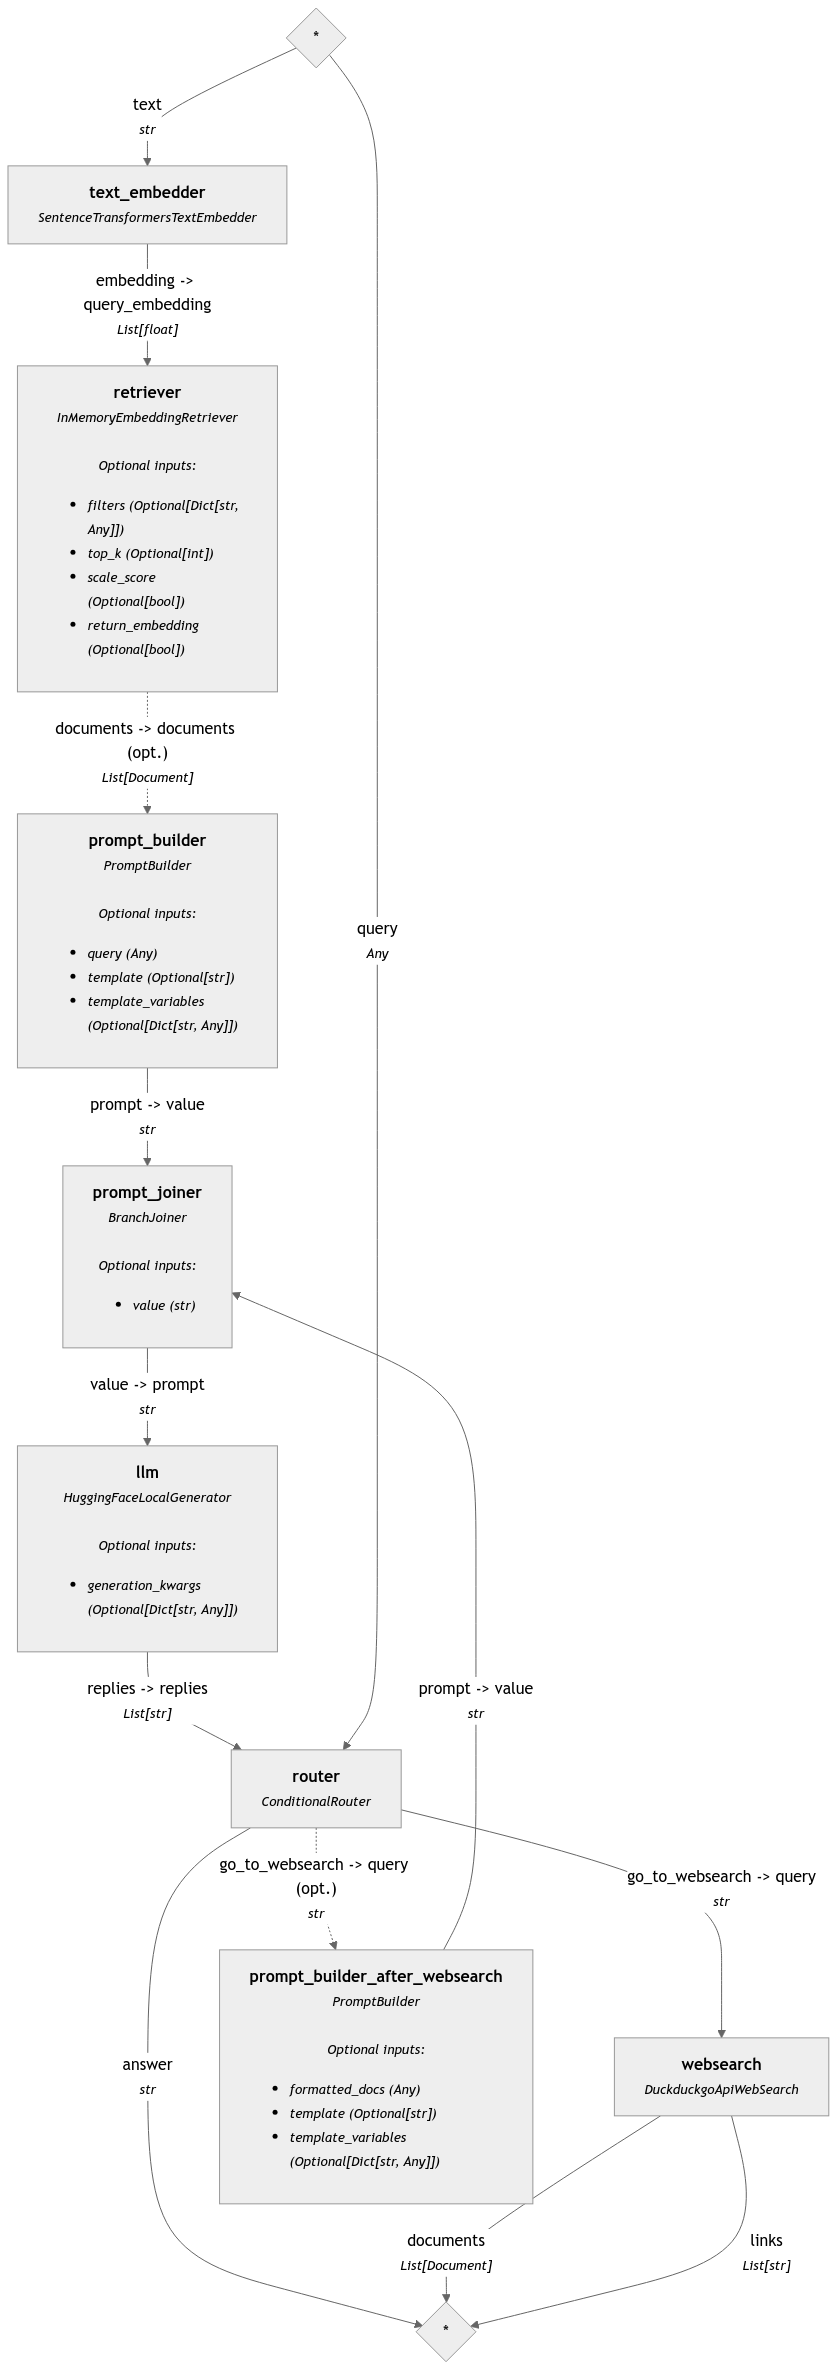

In [20]:
pipe.show()

## Agentic RAG in action! 🔎

In [21]:
# # Updated `get_answer` function to correctly retrieve the answer from router output
# def get_answer(query):
#     result = pipe.run({"text_embedder": {"text": query}, "prompt_builder": {"query": query}})
#     # Access answer from router
#     return result.get("router.answer", "No answer found.")

In [22]:
# # Gradio chatbot interface setup
# import gradio as gr
# def vanilla_chatbot(message, history):
#     answer = get_answer(message)
#     history = history + [(message, answer)]
#     return answer, history

# demo_chatbot = gr.ChatInterface(vanilla_chatbot, title="Vanilla Chatbot", description="Enter text to start chatting.")
# demo_chatbot.launch()

In [23]:
def get_answer(query):
  result = pipe.run({"text_embedder": {"text": query}, "prompt_builder": {"query": query}, "router": {"query": query}})
  return result["router"]["answer"]

In [ ]:
query = "Why did people build Great Pyramid of Giza?"

get_answer(query)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


In [ ]:
print(get_answer(query))

In [ ]:
query = "Where is Munich?"

get_answer(query)

In [ ]:
print(get_answer(query))

In [ ]:
import gradio as gr

def vanilla_chatbot(message, history):
    return get_answer(message)

demo_chatbot = gr.ChatInterface(vanilla_chatbot, title="Vanilla Chatbot", description="Enter text to start chatting.")

demo_chatbot.launch()

In [ ]:
# query = "Where is Munich?"

# get_answer(query)

In [ ]:
# print(get_answer(query))

In [ ]:
# query = "What does Rhodes Statue look like?"

# get_answer(query)

In [ ]:
# query = "Was the the Tower of Pisa part of the 7 wonders of the ancient world?"

# get_answer(query)

In [ ]:
# query = "Who was general Muawiyah?"

# get_answer(query)

*(Notebook by [Stefano Fiorucci](https://github.com/anakin87))*